<a href="https://colab.research.google.com/github/PhiloAmgad/CVD-19-Diagnosis-using-ML/blob/main/Labelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install vaderSentiment
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 13.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 97.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 103.8 MB/s eta 0:00:00


In [8]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [9]:
df = pd.read_csv('/content/drive/MyDrive/NLP/all-data.csv' ,engine="python", encoding = "ISO-8859-1")

In [10]:
df

,Sentiment,Sentence
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...
...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...
4844,negative,Net sales of the Paper segment decreased to EU...


In [11]:
sentimentActual = df.get(['Sentiment'])
sentimentActual

,Sentiment
0,neutral
1,neutral
2,negative
3,positive
4,positive
...,...
4841,negative
4842,neutral
4843,negative
4844,negative


In [12]:
df= df.drop(['Sentiment'], axis=1)
df

,Sentence
0,"According to Gran , the company has no plans t..."
1,Technopolis plans to develop in stages an area...
2,The international electronic industry company ...
3,With the new production plant the company woul...
4,According to the company 's updated strategy f...
...,...
4841,LONDON MarketWatch -- Share prices ended lower...
4842,Rinkuskiai 's beer sales fell by 6.5 per cent ...
4843,Operating profit fell to EUR 35.4 mn from EUR ...
4844,Net sales of the Paper segment decreased to EU...


In [68]:
sentimentActual = sentimentActual.to_numpy()

VADER


In [6]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each article
sentiments = []
for article in df['Sentence']:
    # Get sentiment scores for the article
    scores = sid.polarity_scores(article)
    
    # Classify the sentiment based on the compound score
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

In [7]:
sentimentVADER = np.array(sentiments)


In [59]:
sentimentVADER

array(['Negative', 'Negative', 'Neutral', ..., 'Positive', 'Positive',
       'Neutral'], dtype='<U8')

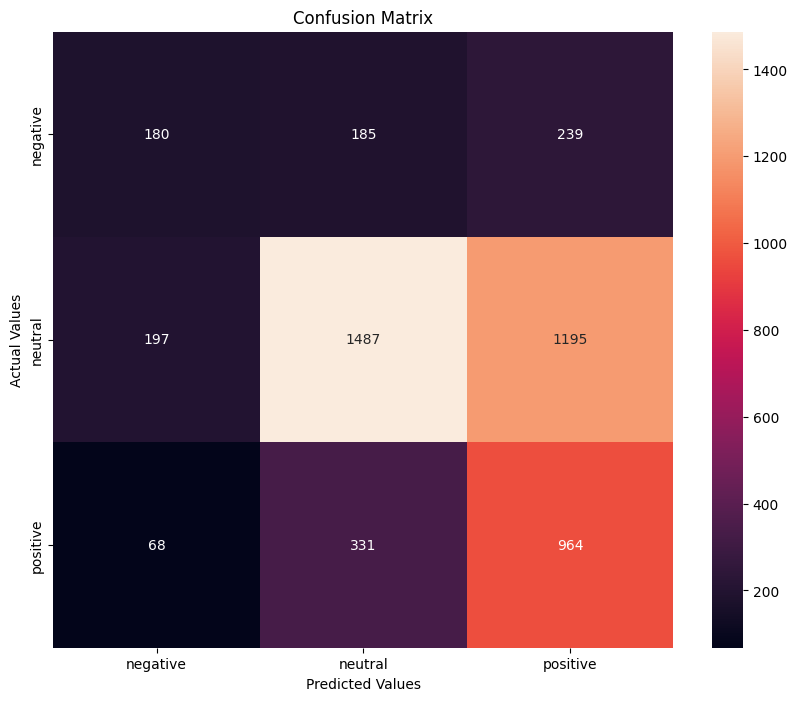

In [66]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentVADER)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

K-Means Clustering

In [18]:


# Perform TF-IDF vectorization on the articles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Sentence'])

# Perform clustering using K-means
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign sentiment labels based on cluster analysis
sentiments = []
for i in range(len(df)):
    article = df.loc[i, 'Sentence']
    cluster_label = kmeans.labels_[i]
    
    # # Get sentiment scores for the article
    # scores = sid.polarity_scores(article)
    
    # # Classify the sentiment based on the compound score
    # if scores['compound'] >= 0.05:
    #     sentiment = 'positive'
    # elif scores['compound'] <= -0.05:
    #     sentiment = 'negative'
    # else:
    #     sentiment = 'neutral'
    
    # Assign sentiment label based on the cluster
    if cluster_label == 0:
        sentiment = 'positive'
    elif cluster_label == 1:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

In [19]:
sentimentKMeans1 = np.array(sentiments)
sentimentKMeans1

array(['neutral', 'neutral', 'neutral', ..., 'negative', 'negative',
       'positive'], dtype='<U8')

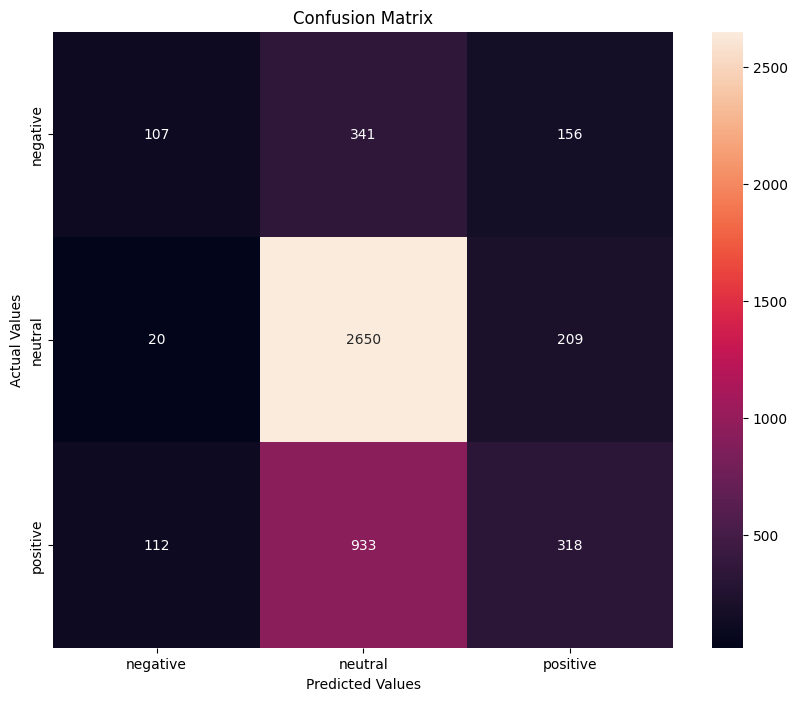

In [20]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentKMeans1)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [25]:


# Perform TF-IDF vectorization on the articles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Sentence'])

# Perform clustering using K-means
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign sentiment labels based on cluster analysis
sentiments = []
for i in range(len(df)):
    article = df.loc[i, 'Sentence']
    cluster_label = kmeans.labels_[i]

    
    # Assign sentiment label based on the cluster
    if cluster_label == 0:
        sentiment = 'negative'
    elif cluster_label == 1:
        sentiment = 'positive'
    else:
        sentiment = 'neutral'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:

sentimentKMeans2 = np.array(sentiments)
sentimentKMeans2

array(['neutral', 'neutral', 'neutral', ..., 'positive', 'positive',
       'negative'], dtype='<U8')

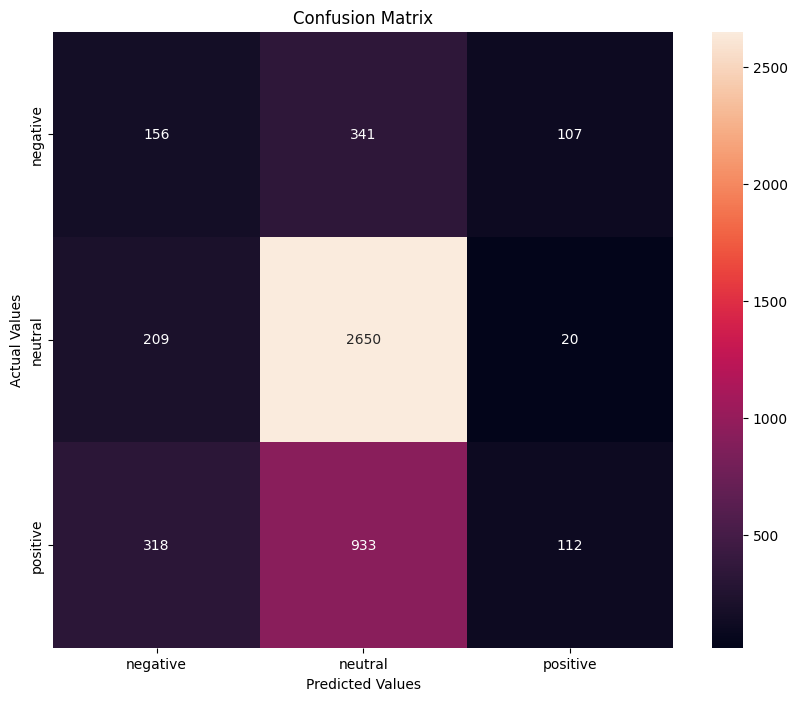

In [27]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentKMeans2)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Hugging Face's Transformers for Zero-shot Learning

In [31]:


# List of financial news articles
articles = df.get(['Sentiment'])
articles = df.values.tolist()

# Sentiment categories
sentiment_categories = ['positive', 'negative', 'neutral']

# Load the zero-shot sentiment classification model
classifier = pipeline('zero-shot-classification')

# Perform zero-shot sentiment classification
results = classifier(articles, sentiment_categories)

# Print the sentiment predictions for each article
for i, result in enumerate(results):
    article_sentiment = result['labels'][0]
    article_score = result['scores'][0]
    print(f"Article {i+1}: Sentiment: {article_sentiment}, Score: {article_score}")


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Article 1: Sentiment: neutral, Score: 0.4504142105579376
Article 2: Sentiment: positive, Score: 0.6061084270477295
Article 3: Sentiment: negative, Score: 0.8693140149116516
Article 4: Sentiment: positive, Score: 0.9576666951179504
Article 5: Sentiment: negative, Score: 0.5404679179191589
Article 6: Sentiment: positive, Score: 0.831034779548645
Article 7: Sentiment: negative, Score: 0.6255212426185608
Article 8: Sentiment: positive, Score: 0.88263338804245
Article 9: Sentiment: positive, Score: 0.9224558472633362
Article 10: Sentiment: positive, Score: 0.8982006311416626
Article 11: Sentiment: positive, Score: 0.8328537344932556
Article 12: Sentiment: positive, Score: 0.9386559128761292
Article 13: Sentiment: positive, Score: 0.7347118854522705
Article 14: Sentiment: positive, Score: 0.8811840415000916
Article 15: Sentiment: positive, Score: 0.9227839708328247
Article 16: Sentiment: positive, Score: 0.5232287049293518
Article 17: Sentiment: positive, Score: 0.9691659212112427
Article 18

In [2]:
zeroShotResults = """ 
rticle 1: Sentiment: neutral, Score: 0.4504142105579376
Article 2: Sentiment: positive, Score: 0.6061084270477295
Article 3: Sentiment: negative, Score: 0.8693140149116516
Article 4: Sentiment: positive, Score: 0.9576666951179504
Article 5: Sentiment: negative, Score: 0.5404679179191589
Article 6: Sentiment: positive, Score: 0.831034779548645
Article 7: Sentiment: negative, Score: 0.6255212426185608
Article 8: Sentiment: positive, Score: 0.88263338804245
Article 9: Sentiment: positive, Score: 0.9224558472633362
Article 10: Sentiment: positive, Score: 0.8982006311416626
Article 11: Sentiment: positive, Score: 0.8328537344932556
Article 12: Sentiment: positive, Score: 0.9386559128761292
Article 13: Sentiment: positive, Score: 0.7347118854522705
Article 14: Sentiment: positive, Score: 0.8811840415000916
Article 15: Sentiment: positive, Score: 0.9227839708328247
Article 16: Sentiment: positive, Score: 0.5232287049293518
Article 17: Sentiment: positive, Score: 0.9691659212112427
Article 18: Sentiment: positive, Score: 0.9506658911705017
Article 19: Sentiment: positive, Score: 0.9103105068206787
Article 20: Sentiment: positive, Score: 0.7393947243690491
Article 21: Sentiment: positive, Score: 0.9240713715553284
Article 22: Sentiment: positive, Score: 0.49051716923713684
Article 23: Sentiment: positive, Score: 0.8818390369415283
Article 24: Sentiment: positive, Score: 0.9640066027641296
Article 25: Sentiment: positive, Score: 0.8148766160011292
Article 26: Sentiment: positive, Score: 0.8894253969192505
Article 27: Sentiment: positive, Score: 0.8230701088905334
Article 28: Sentiment: positive, Score: 0.858199954032898
Article 29: Sentiment: positive, Score: 0.9125175476074219
Article 30: Sentiment: positive, Score: 0.8682376146316528
Article 31: Sentiment: positive, Score: 0.7523423433303833
Article 32: Sentiment: positive, Score: 0.8485780358314514
Article 33: Sentiment: positive, Score: 0.5301824808120728
Article 34: Sentiment: positive, Score: 0.9657885432243347
Article 35: Sentiment: positive, Score: 0.954801619052887
Article 36: Sentiment: positive, Score: 0.7183273434638977
Article 37: Sentiment: positive, Score: 0.9288592338562012
Article 38: Sentiment: positive, Score: 0.6708471179008484
Article 39: Sentiment: positive, Score: 0.9614512324333191
Article 40: Sentiment: positive, Score: 0.8232017755508423
Article 41: Sentiment: positive, Score: 0.9216455221176147
Article 42: Sentiment: positive, Score: 0.9202766418457031
Article 43: Sentiment: positive, Score: 0.5819973945617676
Article 44: Sentiment: positive, Score: 0.7347351908683777
Article 45: Sentiment: positive, Score: 0.9385048151016235
Article 46: Sentiment: positive, Score: 0.9571887254714966
Article 47: Sentiment: positive, Score: 0.9775978922843933
Article 48: Sentiment: positive, Score: 0.5761224627494812
Article 49: Sentiment: positive, Score: 0.9378618597984314
Article 50: Sentiment: positive, Score: 0.8439200520515442
Article 51: Sentiment: positive, Score: 0.7745627760887146
Article 52: Sentiment: positive, Score: 0.7835285067558289
Article 53: Sentiment: positive, Score: 0.6516620516777039
Article 54: Sentiment: positive, Score: 0.7913715839385986
Article 55: Sentiment: positive, Score: 0.9478191137313843
Article 56: Sentiment: positive, Score: 0.9037497639656067
Article 57: Sentiment: positive, Score: 0.7901132106781006
Article 58: Sentiment: positive, Score: 0.4662018418312073
Article 59: Sentiment: neutral, Score: 0.3803684413433075
Article 60: Sentiment: negative, Score: 0.6751198172569275
Article 61: Sentiment: positive, Score: 0.8541545271873474
Article 62: Sentiment: positive, Score: 0.7896865606307983
Article 63: Sentiment: positive, Score: 0.39082297682762146
Article 64: Sentiment: positive, Score: 0.7255336046218872
Article 65: Sentiment: negative, Score: 0.527207612991333
Article 66: Sentiment: negative, Score: 0.4196091890335083
Article 67: Sentiment: positive, Score: 0.542334794998169
Article 68: Sentiment: positive, Score: 0.7751274108886719
Article 69: Sentiment: positive, Score: 0.6875733137130737
Article 70: Sentiment: positive, Score: 0.5550205707550049
Article 71: Sentiment: positive, Score: 0.8487030267715454
Article 72: Sentiment: positive, Score: 0.6181241273880005
Article 73: Sentiment: positive, Score: 0.4404524862766266
Article 74: Sentiment: positive, Score: 0.7524372935295105
Article 75: Sentiment: positive, Score: 0.5734111070632935
Article 76: Sentiment: positive, Score: 0.5706140995025635
Article 77: Sentiment: positive, Score: 0.6329836249351501
Article 78: Sentiment: positive, Score: 0.9371270537376404
Article 79: Sentiment: negative, Score: 0.4541381299495697
Article 80: Sentiment: negative, Score: 0.4541381299495697
Article 81: Sentiment: positive, Score: 0.505821943283081
Article 82: Sentiment: positive, Score: 0.45096731185913086
Article 83: Sentiment: positive, Score: 0.688694953918457
Article 84: Sentiment: positive, Score: 0.8244365453720093
Article 85: Sentiment: positive, Score: 0.9057580828666687
Article 86: Sentiment: positive, Score: 0.9511722326278687
Article 87: Sentiment: negative, Score: 0.45394760370254517
Article 88: Sentiment: positive, Score: 0.9791237115859985
Article 89: Sentiment: positive, Score: 0.8656034469604492
Article 90: Sentiment: positive, Score: 0.7024940252304077
Article 91: Sentiment: positive, Score: 0.9310902953147888
Article 92: Sentiment: positive, Score: 0.705948531627655
Article 93: Sentiment: positive, Score: 0.8911555409431458
Article 94: Sentiment: positive, Score: 0.9093418121337891
Article 95: Sentiment: positive, Score: 0.907423198223114
Article 96: Sentiment: positive, Score: 0.8951383233070374
Article 97: Sentiment: positive, Score: 0.8875263929367065
Article 98: Sentiment: positive, Score: 0.8776153326034546
Article 99: Sentiment: positive, Score: 0.9404107928276062
Article 100: Sentiment: positive, Score: 0.934103786945343
Article 101: Sentiment: positive, Score: 0.9605879187583923
Article 102: Sentiment: positive, Score: 0.9123152494430542
Article 103: Sentiment: positive, Score: 0.9468838572502136
Article 104: Sentiment: positive, Score: 0.811534583568573
Article 105: Sentiment: positive, Score: 0.8063119649887085
Article 106: Sentiment: positive, Score: 0.9156983494758606
Article 107: Sentiment: positive, Score: 0.8867549896240234
Article 108: Sentiment: positive, Score: 0.8642545938491821
Article 109: Sentiment: positive, Score: 0.8221530318260193
Article 110: Sentiment: positive, Score: 0.9218249320983887
Article 111: Sentiment: positive, Score: 0.7157583236694336
Article 112: Sentiment: positive, Score: 0.8581628799438477
Article 113: Sentiment: positive, Score: 0.7862733006477356
Article 114: Sentiment: positive, Score: 0.8945642709732056
Article 115: Sentiment: positive, Score: 0.7472328543663025
Article 116: Sentiment: negative, Score: 0.5227749347686768
Article 117: Sentiment: positive, Score: 0.9288870096206665
Article 118: Sentiment: positive, Score: 0.915681004524231
Article 119: Sentiment: positive, Score: 0.94379723072052
Article 120: Sentiment: positive, Score: 0.916785478591919
Article 121: Sentiment: positive, Score: 0.9274232387542725
Article 122: Sentiment: positive, Score: 0.7583240270614624
Article 123: Sentiment: positive, Score: 0.7353337407112122
Article 124: Sentiment: positive, Score: 0.6090813279151917
Article 125: Sentiment: positive, Score: 0.9707245826721191
Article 126: Sentiment: positive, Score: 0.9403183460235596
Article 127: Sentiment: positive, Score: 0.8501104116439819
Article 128: Sentiment: positive, Score: 0.8952901363372803
Article 129: Sentiment: positive, Score: 0.8617351651191711
Article 130: Sentiment: positive, Score: 0.9194210171699524
Article 131: Sentiment: positive, Score: 0.8565450310707092
Article 132: Sentiment: positive, Score: 0.9720207452774048
Article 133: Sentiment: positive, Score: 0.8566831946372986
Article 134: Sentiment: positive, Score: 0.9871003031730652
Article 135: Sentiment: positive, Score: 0.8765186071395874
Article 136: Sentiment: positive, Score: 0.7874395847320557
Article 137: Sentiment: positive, Score: 0.5881567597389221
Article 138: Sentiment: positive, Score: 0.7295677065849304
Article 139: Sentiment: positive, Score: 0.729113757610321
Article 140: Sentiment: positive, Score: 0.5785577893257141
Article 141: Sentiment: positive, Score: 0.9198731780052185
Article 142: Sentiment: positive, Score: 0.6591910123825073
Article 143: Sentiment: positive, Score: 0.9094421863555908
Article 144: Sentiment: positive, Score: 0.8641594052314758
Article 145: Sentiment: positive, Score: 0.9559748768806458
Article 146: Sentiment: positive, Score: 0.9430555701255798
Article 147: Sentiment: positive, Score: 0.6788645386695862
Article 148: Sentiment: positive, Score: 0.8251774311065674
Article 149: Sentiment: positive, Score: 0.6421056389808655
Article 150: Sentiment: positive, Score: 0.6096300482749939
Article 151: Sentiment: positive, Score: 0.596197783946991
Article 152: Sentiment: positive, Score: 0.8008707761764526
Article 153: Sentiment: positive, Score: 0.7784449458122253
Article 154: Sentiment: positive, Score: 0.5999936461448669
Article 155: Sentiment: positive, Score: 0.8945467472076416
Article 156: Sentiment: positive, Score: 0.8805797100067139
Article 157: Sentiment: positive, Score: 0.9675190448760986
Article 158: Sentiment: positive, Score: 0.9079357981681824
Article 159: Sentiment: positive, Score: 0.8957734107971191
Article 160: Sentiment: positive, Score: 0.6634055972099304
Article 161: Sentiment: positive, Score: 0.8203313946723938
Article 162: Sentiment: positive, Score: 0.9620268940925598
Article 163: Sentiment: positive, Score: 0.9616184234619141
Article 164: Sentiment: positive, Score: 0.9522839188575745
Article 165: Sentiment: positive, Score: 0.9479767680168152
Article 166: Sentiment: positive, Score: 0.9540603756904602
Article 167: Sentiment: positive, Score: 0.9565575122833252
Article 168: Sentiment: positive, Score: 0.9587345719337463
Article 169: Sentiment: positive, Score: 0.9598029851913452
Article 170: Sentiment: positive, Score: 0.9576793313026428
Article 171: Sentiment: positive, Score: 0.9615310430526733
Article 172: Sentiment: positive, Score: 0.9495982527732849
Article 173: Sentiment: positive, Score: 0.9647654891014099
Article 174: Sentiment: positive, Score: 0.9599518179893494
Article 175: Sentiment: positive, Score: 0.9562424421310425
Article 176: Sentiment: positive, Score: 0.961961030960083
Article 177: Sentiment: positive, Score: 0.8837504386901855
Article 178: Sentiment: positive, Score: 0.8259708881378174
Article 179: Sentiment: positive, Score: 0.8067445158958435
Article 180: Sentiment: positive, Score: 0.8311571478843689
Article 181: Sentiment: positive, Score: 0.6828238368034363
Article 182: Sentiment: positive, Score: 0.7512456178665161
Article 183: Sentiment: positive, Score: 0.7873774766921997
Article 184: Sentiment: positive, Score: 0.7790762186050415
Article 185: Sentiment: positive, Score: 0.7699794769287109
Article 186: Sentiment: positive, Score: 0.9701812863349915
Article 187: Sentiment: negative, Score: 0.6173185706138611
Article 188: Sentiment: negative, Score: 0.5081833004951477
Article 189: Sentiment: positive, Score: 0.7732975482940674
Article 190: Sentiment: positive, Score: 0.6976957321166992
Article 191: Sentiment: positive, Score: 0.7306196689605713
Article 192: Sentiment: positive, Score: 0.6285510659217834
Article 193: Sentiment: positive, Score: 0.8284347057342529
Article 194: Sentiment: positive, Score: 0.8686144948005676
Article 195: Sentiment: positive, Score: 0.8648316264152527
Article 196: Sentiment: positive, Score: 0.6288703680038452
Article 197: Sentiment: positive, Score: 0.8948144316673279
Article 198: Sentiment: positive, Score: 0.8491109013557434
Article 199: Sentiment: positive, Score: 0.835493803024292
Article 200: Sentiment: positive, Score: 0.865075945854187
Article 201: Sentiment: positive, Score: 0.7562420964241028
Article 202: Sentiment: positive, Score: 0.9128980040550232
Article 203: Sentiment: positive, Score: 0.7247020602226257
Article 204: Sentiment: positive, Score: 0.792974054813385
Article 205: Sentiment: positive, Score: 0.8922556042671204
Article 206: Sentiment: positive, Score: 0.7931286096572876
Article 207: Sentiment: positive, Score: 0.7616583108901978
Article 208: Sentiment: positive, Score: 0.7584179043769836
Article 209: Sentiment: positive, Score: 0.8632168173789978
Article 210: Sentiment: positive, Score: 0.9556037783622742
Article 211: Sentiment: positive, Score: 0.7203070521354675
Article 212: Sentiment: positive, Score: 0.7055579423904419
Article 213: Sentiment: positive, Score: 0.5914812088012695
Article 214: Sentiment: positive, Score: 0.8655862212181091
Article 215: Sentiment: positive, Score: 0.8926921486854553
Article 216: Sentiment: positive, Score: 0.8948870897293091
Article 217: Sentiment: positive, Score: 0.9623180031776428
Article 218: Sentiment: positive, Score: 0.8854570388793945
Article 219: Sentiment: positive, Score: 0.8330444693565369
Article 220: Sentiment: positive, Score: 0.944563090801239
Article 221: Sentiment: positive, Score: 0.9451502561569214
Article 222: Sentiment: positive, Score: 0.5710105299949646
Article 223: Sentiment: positive, Score: 0.8194305300712585
Article 224: Sentiment: positive, Score: 0.5659162402153015
Article 225: Sentiment: positive, Score: 0.8601632714271545
Article 226: Sentiment: positive, Score: 0.9176146984100342
Article 227: Sentiment: positive, Score: 0.9414735436439514
Article 228: Sentiment: positive, Score: 0.7414324879646301
Article 229: Sentiment: positive, Score: 0.7323659062385559
Article 230: Sentiment: positive, Score: 0.7939490675926208
Article 231: Sentiment: positive, Score: 0.7594521641731262
Article 232: Sentiment: positive, Score: 0.7966505289077759
Article 233: Sentiment: positive, Score: 0.8676548004150391
Article 234: Sentiment: positive, Score: 0.6846067309379578
Article 235: Sentiment: positive, Score: 0.5477551221847534
Article 236: Sentiment: positive, Score: 0.8888134956359863
Article 237: Sentiment: positive, Score: 0.8665422797203064
Article 238: Sentiment: positive, Score: 0.8539676666259766
Article 239: Sentiment: positive, Score: 0.8964506387710571
Article 240: Sentiment: positive, Score: 0.8613560795783997
Article 241: Sentiment: positive, Score: 0.9069945812225342
Article 242: Sentiment: positive, Score: 0.9491108059883118
Article 243: Sentiment: positive, Score: 0.9313222169876099
Article 244: Sentiment: positive, Score: 0.8464893698692322
Article 245: Sentiment: positive, Score: 0.91446453332901
Article 246: Sentiment: positive, Score: 0.9038942456245422
Article 247: Sentiment: positive, Score: 0.934380054473877
Article 248: Sentiment: positive, Score: 0.938371479511261
Article 249: Sentiment: positive, Score: 0.9164854288101196
Article 250: Sentiment: positive, Score: 0.9447977542877197
Article 251: Sentiment: positive, Score: 0.9026069045066833
Article 252: Sentiment: positive, Score: 0.8612619638442993
Article 253: Sentiment: positive, Score: 0.9414495825767517
Article 254: Sentiment: positive, Score: 0.7815036773681641
Article 255: Sentiment: positive, Score: 0.9475820660591125
Article 256: Sentiment: positive, Score: 0.7546983361244202
Article 257: Sentiment: positive, Score: 0.9343698024749756
Article 258: Sentiment: positive, Score: 0.9242908358573914
Article 259: Sentiment: positive, Score: 0.9042665362358093
Article 260: Sentiment: positive, Score: 0.9594810605049133
Article 261: Sentiment: positive, Score: 0.9232314825057983
Article 262: Sentiment: positive, Score: 0.9458574056625366
Article 263: Sentiment: positive, Score: 0.9278016090393066
Article 264: Sentiment: positive, Score: 0.8470001816749573
Article 265: Sentiment: positive, Score: 0.4568551480770111
Article 266: Sentiment: positive, Score: 0.8712547421455383
Article 267: Sentiment: positive, Score: 0.7669345736503601
Article 268: Sentiment: positive, Score: 0.9077881574630737
Article 269: Sentiment: positive, Score: 0.8786430358886719
Article 270: Sentiment: positive, Score: 0.5781812071800232
Article 271: Sentiment: negative, Score: 0.7568191885948181
Article 272: Sentiment: positive, Score: 0.9623375535011292
Article 273: Sentiment: positive, Score: 0.9726781845092773
Article 274: Sentiment: positive, Score: 0.9722273349761963
Article 275: Sentiment: positive, Score: 0.9011350274085999
Article 276: Sentiment: positive, Score: 0.6173660755157471
Article 277: Sentiment: positive, Score: 0.8848395347595215
Article 278: Sentiment: positive, Score: 0.6526512503623962
Article 279: Sentiment: positive, Score: 0.9583699107170105
Article 280: Sentiment: positive, Score: 0.9168483018875122
Article 281: Sentiment: positive, Score: 0.8924522995948792
Article 282: Sentiment: positive, Score: 0.8665387630462646
Article 283: Sentiment: positive, Score: 0.8535218238830566
Article 284: Sentiment: positive, Score: 0.9239698052406311
Article 285: Sentiment: positive, Score: 0.8669005036354065
Article 286: Sentiment: positive, Score: 0.7115685939788818
Article 287: Sentiment: positive, Score: 0.8805969953536987
Article 288: Sentiment: positive, Score: 0.9073840975761414
Article 289: Sentiment: positive, Score: 0.8482698202133179
Article 290: Sentiment: positive, Score: 0.63944011926651
Article 291: Sentiment: positive, Score: 0.7645694613456726
Article 292: Sentiment: negative, Score: 0.48622414469718933
Article 293: Sentiment: positive, Score: 0.9515116810798645
Article 294: Sentiment: positive, Score: 0.8927141427993774
Article 295: Sentiment: positive, Score: 0.7094942927360535
Article 296: Sentiment: positive, Score: 0.6642176508903503
Article 297: Sentiment: positive, Score: 0.540671706199646
Article 298: Sentiment: positive, Score: 0.659188449382782
Article 299: Sentiment: positive, Score: 0.693962574005127
Article 300: Sentiment: positive, Score: 0.962486743927002
Article 301: Sentiment: positive, Score: 0.8698490262031555
Article 302: Sentiment: positive, Score: 0.8925161957740784
Article 303: Sentiment: positive, Score: 0.9404836893081665
Article 304: Sentiment: positive, Score: 0.9200530648231506
Article 305: Sentiment: positive, Score: 0.8280393481254578
Article 306: Sentiment: positive, Score: 0.8416202068328857
Article 307: Sentiment: positive, Score: 0.8358944058418274
Article 308: Sentiment: positive, Score: 0.9021503329277039
Article 309: Sentiment: positive, Score: 0.9576756358146667
Article 310: Sentiment: positive, Score: 0.54531329870224
Article 311: Sentiment: positive, Score: 0.913425624370575
Article 312: Sentiment: positive, Score: 0.8173274397850037
Article 313: Sentiment: positive, Score: 0.7199830412864685
Article 314: Sentiment: positive, Score: 0.8011682629585266
Article 315: Sentiment: positive, Score: 0.6112932562828064
Article 316: Sentiment: positive, Score: 0.9546555876731873
Article 317: Sentiment: positive, Score: 0.8987150192260742
Article 318: Sentiment: positive, Score: 0.9754043817520142
Article 319: Sentiment: positive, Score: 0.8061248064041138
Article 320: Sentiment: positive, Score: 0.6821617484092712
Article 321: Sentiment: positive, Score: 0.671101450920105
Article 322: Sentiment: positive, Score: 0.8978561162948608
Article 323: Sentiment: positive, Score: 0.9253813624382019
Article 324: Sentiment: positive, Score: 0.916130781173706
Article 325: Sentiment: positive, Score: 0.7947379946708679
Article 326: Sentiment: positive, Score: 0.8870258331298828
Article 327: Sentiment: positive, Score: 0.8225465416908264
Article 328: Sentiment: positive, Score: 0.8688666820526123
Article 329: Sentiment: positive, Score: 0.9081850051879883
Article 330: Sentiment: positive, Score: 0.8874030113220215
Article 331: Sentiment: positive, Score: 0.9170320630073547
Article 332: Sentiment: positive, Score: 0.9261344075202942
Article 333: Sentiment: positive, Score: 0.9293228387832642
Article 334: Sentiment: positive, Score: 0.7806915640830994
Article 335: Sentiment: positive, Score: 0.8151828050613403
Article 336: Sentiment: positive, Score: 0.6757870316505432
Article 337: Sentiment: positive, Score: 0.5566049814224243
Article 338: Sentiment: positive, Score: 0.4818689525127411
Article 339: Sentiment: positive, Score: 0.9400312900543213
Article 340: Sentiment: positive, Score: 0.8065788745880127
Article 341: Sentiment: positive, Score: 0.8923880457878113
Article 342: Sentiment: positive, Score: 0.8415995836257935
Article 343: Sentiment: positive, Score: 0.8930380344390869
Article 344: Sentiment: positive, Score: 0.838422417640686
Article 345: Sentiment: positive, Score: 0.8433560729026794
Article 346: Sentiment: positive, Score: 0.6206308007240295
Article 347: Sentiment: positive, Score: 0.9109609127044678
Article 348: Sentiment: positive, Score: 0.9627791047096252
Article 349: Sentiment: positive, Score: 0.48221299052238464
Article 350: Sentiment: positive, Score: 0.8975306749343872
Article 351: Sentiment: positive, Score: 0.9580519795417786
Article 352: Sentiment: positive, Score: 0.8963220715522766
Article 353: Sentiment: positive, Score: 0.7303890585899353
Article 354: Sentiment: positive, Score: 0.9344027042388916
Article 355: Sentiment: positive, Score: 0.81270432472229
Article 356: Sentiment: positive, Score: 0.956604540348053
Article 357: Sentiment: positive, Score: 0.9783776998519897
Article 358: Sentiment: positive, Score: 0.8491414785385132
Article 359: Sentiment: positive, Score: 0.8783218264579773
Article 360: Sentiment: positive, Score: 0.7979622483253479
Article 361: Sentiment: positive, Score: 0.9806581139564514
Article 362: Sentiment: positive, Score: 0.9519739151000977
Article 363: Sentiment: positive, Score: 0.9236239194869995
Article 364: Sentiment: positive, Score: 0.6953214406967163
Article 365: Sentiment: positive, Score: 0.5247876644134521
Article 366: Sentiment: positive, Score: 0.9677150249481201
Article 367: Sentiment: positive, Score: 0.5869073271751404
Article 368: Sentiment: positive, Score: 0.7873826026916504
Article 369: Sentiment: positive, Score: 0.8496196269989014
Article 370: Sentiment: positive, Score: 0.9116626977920532
Article 371: Sentiment: positive, Score: 0.9534245729446411
Article 372: Sentiment: positive, Score: 0.8626351952552795
Article 373: Sentiment: positive, Score: 0.7896367907524109
Article 374: Sentiment: positive, Score: 0.9706277847290039
Article 375: Sentiment: positive, Score: 0.5923793315887451
Article 376: Sentiment: positive, Score: 0.9131326079368591
Article 377: Sentiment: positive, Score: 0.9511530995368958
Article 378: Sentiment: positive, Score: 0.8006814122200012
Article 379: Sentiment: positive, Score: 0.9203165769577026
Article 380: Sentiment: positive, Score: 0.7269673943519592
Article 381: Sentiment: positive, Score: 0.8469136953353882
Article 382: Sentiment: positive, Score: 0.9420152306556702
Article 383: Sentiment: positive, Score: 0.925230085849762
Article 384: Sentiment: positive, Score: 0.8985546231269836
Article 385: Sentiment: positive, Score: 0.8982085585594177
Article 386: Sentiment: positive, Score: 0.5333259105682373
Article 387: Sentiment: positive, Score: 0.8995512127876282
Article 388: Sentiment: positive, Score: 0.9701886773109436
Article 389: Sentiment: positive, Score: 0.9017635583877563
Article 390: Sentiment: positive, Score: 0.7165946960449219
Article 391: Sentiment: positive, Score: 0.5771416425704956
Article 392: Sentiment: positive, Score: 0.7282139658927917
Article 393: Sentiment: positive, Score: 0.598979651927948
Article 394: Sentiment: negative, Score: 0.565646231174469
Article 395: Sentiment: positive, Score: 0.6057467460632324
Article 396: Sentiment: positive, Score: 0.6842222213745117
Article 397: Sentiment: positive, Score: 0.4711863100528717
Article 398: Sentiment: positive, Score: 0.46627160906791687
Article 399: Sentiment: positive, Score: 0.9301044940948486
Article 400: Sentiment: positive, Score: 0.5349074006080627
Article 401: Sentiment: positive, Score: 0.8185994029045105
Article 402: Sentiment: positive, Score: 0.9592931270599365
Article 403: Sentiment: negative, Score: 0.6288864016532898
Article 404: Sentiment: positive, Score: 0.4649476110935211
Article 405: Sentiment: positive, Score: 0.7569666504859924
Article 406: Sentiment: positive, Score: 0.5913347005844116
Article 407: Sentiment: positive, Score: 0.5697782635688782
Article 408: Sentiment: positive, Score: 0.7549111843109131
Article 409: Sentiment: positive, Score: 0.8244906663894653
Article 410: Sentiment: positive, Score: 0.8295211791992188
Article 411: Sentiment: negative, Score: 0.5080074071884155
Article 412: Sentiment: positive, Score: 0.5998627543449402
Article 413: Sentiment: positive, Score: 0.4731222093105316
Article 414: Sentiment: positive, Score: 0.4901007115840912
Article 415: Sentiment: neutral, Score: 0.36915427446365356
Article 416: Sentiment: negative, Score: 0.9300291538238525
Article 417: Sentiment: positive, Score: 0.5584620237350464
Article 418: Sentiment: positive, Score: 0.5898931622505188
Article 419: Sentiment: positive, Score: 0.6324006915092468
Article 420: Sentiment: positive, Score: 0.555694043636322
Article 421: Sentiment: positive, Score: 0.5647299289703369
Article 422: Sentiment: negative, Score: 0.8782062530517578
Article 423: Sentiment: negative, Score: 0.8828322887420654
Article 424: Sentiment: negative, Score: 0.884749174118042
Article 425: Sentiment: positive, Score: 0.5398070812225342
Article 426: Sentiment: positive, Score: 0.6808643341064453
Article 427: Sentiment: positive, Score: 0.6134066581726074
Article 428: Sentiment: negative, Score: 0.4508667290210724
Article 429: Sentiment: positive, Score: 0.4614564776420593
Article 430: Sentiment: positive, Score: 0.7576727867126465
Article 431: Sentiment: positive, Score: 0.6060426235198975
Article 432: Sentiment: negative, Score: 0.4083188772201538
Article 433: Sentiment: positive, Score: 0.7182079553604126
Article 434: Sentiment: positive, Score: 0.4844304323196411
Article 435: Sentiment: positive, Score: 0.7336884140968323
Article 436: Sentiment: positive, Score: 0.48403245210647583
Article 437: Sentiment: positive, Score: 0.6446191072463989
Article 438: Sentiment: positive, Score: 0.577655553817749
Article 439: Sentiment: positive, Score: 0.55121910572052
Article 440: Sentiment: positive, Score: 0.41142064332962036
Article 441: Sentiment: positive, Score: 0.7333773374557495
Article 442: Sentiment: positive, Score: 0.5508527755737305
Article 443: Sentiment: positive, Score: 0.5212456583976746
Article 444: Sentiment: positive, Score: 0.5936105847358704
Article 445: Sentiment: positive, Score: 0.8339958190917969
Article 446: Sentiment: positive, Score: 0.6399979591369629
Article 447: Sentiment: positive, Score: 0.9553515315055847
Article 448: Sentiment: positive, Score: 0.7376393675804138
Article 449: Sentiment: positive, Score: 0.5404785871505737
Article 450: Sentiment: negative, Score: 0.4564193785190582
Article 451: Sentiment: positive, Score: 0.5416167974472046
Article 452: Sentiment: positive, Score: 0.8412972092628479
Article 453: Sentiment: positive, Score: 0.6256754994392395
Article 454: Sentiment: positive, Score: 0.5957505106925964
Article 455: Sentiment: positive, Score: 0.583679735660553
Article 456: Sentiment: positive, Score: 0.5075985789299011
Article 457: Sentiment: positive, Score: 0.6926764845848083
Article 458: Sentiment: positive, Score: 0.6445907950401306
Article 459: Sentiment: positive, Score: 0.7195022106170654
Article 460: Sentiment: positive, Score: 0.4194602966308594
Article 461: Sentiment: positive, Score: 0.9700363278388977
Article 462: Sentiment: positive, Score: 0.5309441089630127
Article 463: Sentiment: negative, Score: 0.6642662882804871
Article 464: Sentiment: positive, Score: 0.6871669292449951
Article 465: Sentiment: positive, Score: 0.5470048785209656
Article 466: Sentiment: positive, Score: 0.5288732051849365
Article 467: Sentiment: positive, Score: 0.7170447111129761
Article 468: Sentiment: positive, Score: 0.9546138644218445
Article 469: Sentiment: positive, Score: 0.8739739656448364
Article 470: Sentiment: positive, Score: 0.9090766906738281
Article 471: Sentiment: positive, Score: 0.8772938251495361
Article 472: Sentiment: positive, Score: 0.5863919258117676
Article 473: Sentiment: positive, Score: 0.8358636498451233
Article 474: Sentiment: positive, Score: 0.6817954778671265
Article 475: Sentiment: positive, Score: 0.43336862325668335
Article 476: Sentiment: positive, Score: 0.5094215869903564
Article 477: Sentiment: positive, Score: 0.679663360118866
Article 478: Sentiment: positive, Score: 0.8274526596069336
Article 479: Sentiment: positive, Score: 0.743726372718811
Article 480: Sentiment: positive, Score: 0.639552116394043
Article 481: Sentiment: positive, Score: 0.5633772015571594
Article 482: Sentiment: positive, Score: 0.5438597798347473
Article 483: Sentiment: positive, Score: 0.7516547441482544
Article 484: Sentiment: positive, Score: 0.7391926646232605
Article 485: Sentiment: negative, Score: 0.4116327166557312
Article 486: Sentiment: positive, Score: 0.5958496332168579
Article 487: Sentiment: positive, Score: 0.8426931500434875
Article 488: Sentiment: positive, Score: 0.8315681219100952
Article 489: Sentiment: negative, Score: 0.4924204349517822
Article 490: Sentiment: positive, Score: 0.5201342701911926
Article 491: Sentiment: negative, Score: 0.4183134138584137
Article 492: Sentiment: positive, Score: 0.7391682863235474
Article 493: Sentiment: positive, Score: 0.6446579098701477
Article 494: Sentiment: positive, Score: 0.6909998059272766
Article 495: Sentiment: positive, Score: 0.5322836637496948
Article 496: Sentiment: positive, Score: 0.9877121448516846
Article 497: Sentiment: positive, Score: 0.7093684077262878
Article 498: Sentiment: positive, Score: 0.5494674444198608
Article 499: Sentiment: positive, Score: 0.8000791668891907
Article 500: Sentiment: negative, Score: 0.6129626035690308
Article 501: Sentiment: negative, Score: 0.8071467876434326
Article 502: Sentiment: positive, Score: 0.49615955352783203
Article 503: Sentiment: positive, Score: 0.7081890106201172
Article 504: Sentiment: positive, Score: 0.7822190523147583
Article 505: Sentiment: positive, Score: 0.45352140069007874
Article 506: Sentiment: positive, Score: 0.6027784943580627
Article 507: Sentiment: positive, Score: 0.6211194396018982
Article 508: Sentiment: positive, Score: 0.4874541759490967
Article 509: Sentiment: negative, Score: 0.4906626343727112
Article 510: Sentiment: positive, Score: 0.7041285634040833
Article 511: Sentiment: positive, Score: 0.6415398120880127
Article 512: Sentiment: positive, Score: 0.5325232744216919
Article 513: Sentiment: positive, Score: 0.524337649345398
Article 514: Sentiment: positive, Score: 0.8761890530586243
Article 515: Sentiment: positive, Score: 0.757056713104248
Article 516: Sentiment: positive, Score: 0.8180152773857117
Article 517: Sentiment: positive, Score: 0.7727815508842468
Article 518: Sentiment: negative, Score: 0.718079686164856
Article 519: Sentiment: positive, Score: 0.8300734162330627
Article 520: Sentiment: positive, Score: 0.7101979851722717
Article 521: Sentiment: positive, Score: 0.8372438549995422
Article 522: Sentiment: positive, Score: 0.6774904131889343
Article 523: Sentiment: positive, Score: 0.6475622653961182
Article 524: Sentiment: positive, Score: 0.8015062212944031
Article 525: Sentiment: negative, Score: 0.652044951915741
Article 526: Sentiment: positive, Score: 0.7957738041877747
Article 527: Sentiment: positive, Score: 0.9003692269325256
Article 528: Sentiment: positive, Score: 0.9048012495040894
Article 529: Sentiment: positive, Score: 0.7757582664489746
Article 530: Sentiment: positive, Score: 0.6484160423278809
Article 531: Sentiment: positive, Score: 0.636712908744812
Article 532: Sentiment: negative, Score: 0.4767683148384094
Article 533: Sentiment: negative, Score: 0.34256500005722046
Article 534: Sentiment: positive, Score: 0.4993697702884674
Article 535: Sentiment: positive, Score: 0.5892168283462524
Article 536: Sentiment: positive, Score: 0.802962064743042
Article 537: Sentiment: positive, Score: 0.8191070556640625
Article 538: Sentiment: positive, Score: 0.7504453659057617
Article 539: Sentiment: positive, Score: 0.5808959007263184
Article 540: Sentiment: negative, Score: 0.9548858404159546
Article 541: Sentiment: positive, Score: 0.7916219830513
Article 542: Sentiment: positive, Score: 0.9189490675926208
Article 543: Sentiment: negative, Score: 0.9045271873474121
Article 544: Sentiment: negative, Score: 0.9089155197143555
Article 545: Sentiment: negative, Score: 0.7013081908226013
Article 546: Sentiment: positive, Score: 0.963733971118927
Article 547: Sentiment: positive, Score: 0.3565222918987274
Article 548: Sentiment: positive, Score: 0.6918111443519592
Article 549: Sentiment: positive, Score: 0.897745668888092
Article 550: Sentiment: positive, Score: 0.9475268125534058
Article 551: Sentiment: positive, Score: 0.9453609585762024
Article 552: Sentiment: positive, Score: 0.5290859937667847
Article 553: Sentiment: positive, Score: 0.560424268245697
Article 554: Sentiment: positive, Score: 0.8048322796821594
Article 555: Sentiment: positive, Score: 0.6598913669586182
Article 556: Sentiment: positive, Score: 0.609775185585022
Article 557: Sentiment: positive, Score: 0.7589179277420044
Article 558: Sentiment: positive, Score: 0.9850476384162903
Article 559: Sentiment: positive, Score: 0.7175747156143188
Article 560: Sentiment: positive, Score: 0.956827700138092
Article 561: Sentiment: positive, Score: 0.5630077123641968
Article 562: Sentiment: positive, Score: 0.9268217086791992
Article 563: Sentiment: positive, Score: 0.7161716222763062
Article 564: Sentiment: positive, Score: 0.7518770098686218
Article 565: Sentiment: positive, Score: 0.9793062210083008
Article 566: Sentiment: positive, Score: 0.9345982670783997
Article 567: Sentiment: positive, Score: 0.9883533120155334
Article 568: Sentiment: positive, Score: 0.8253055810928345
Article 569: Sentiment: positive, Score: 0.8639381527900696
Article 570: Sentiment: positive, Score: 0.710287868976593
Article 571: Sentiment: positive, Score: 0.796480655670166
Article 572: Sentiment: positive, Score: 0.890098512172699
Article 573: Sentiment: positive, Score: 0.5493187308311462
Article 574: Sentiment: positive, Score: 0.41447848081588745
Article 575: Sentiment: negative, Score: 0.5511438250541687
Article 576: Sentiment: positive, Score: 0.8865293860435486
Article 577: Sentiment: positive, Score: 0.5435172319412231
Article 578: Sentiment: positive, Score: 0.8260641098022461
Article 579: Sentiment: positive, Score: 0.5900613069534302
Article 580: Sentiment: positive, Score: 0.8591323494911194
Article 581: Sentiment: positive, Score: 0.8094769716262817
Article 582: Sentiment: positive, Score: 0.6293822526931763
Article 583: Sentiment: positive, Score: 0.5256882309913635
Article 584: Sentiment: positive, Score: 0.9397825598716736
Article 585: Sentiment: positive, Score: 0.9437561631202698
Article 586: Sentiment: positive, Score: 0.9517082571983337
Article 587: Sentiment: positive, Score: 0.9697306752204895
Article 588: Sentiment: positive, Score: 0.9231680631637573
Article 589: Sentiment: positive, Score: 0.798069953918457
Article 590: Sentiment: positive, Score: 0.6147283315658569
Article 591: Sentiment: positive, Score: 0.9566088914871216
Article 592: Sentiment: positive, Score: 0.6364063620567322
Article 593: Sentiment: positive, Score: 0.759787380695343
Article 594: Sentiment: positive, Score: 0.7673810124397278
Article 595: Sentiment: positive, Score: 0.9497578144073486
Article 596: Sentiment: positive, Score: 0.8616955280303955
Article 597: Sentiment: positive, Score: 0.9427897930145264
Article 598: Sentiment: positive, Score: 0.93012535572052
Article 599: Sentiment: positive, Score: 0.8070593476295471
Article 600: Sentiment: positive, Score: 0.9910265803337097
Article 601: Sentiment: positive, Score: 0.9153951406478882
Article 602: Sentiment: positive, Score: 0.8080678582191467
Article 603: Sentiment: positive, Score: 0.8224459886550903
Article 604: Sentiment: positive, Score: 0.9735627174377441
Article 605: Sentiment: positive, Score: 0.9095596075057983
Article 606: Sentiment: positive, Score: 0.8054527044296265
Article 607: Sentiment: positive, Score: 0.6261541843414307
Article 608: Sentiment: positive, Score: 0.8418148756027222
Article 609: Sentiment: positive, Score: 0.9029301404953003
Article 610: Sentiment: positive, Score: 0.8361207246780396
Article 611: Sentiment: positive, Score: 0.9073085784912109
Article 612: Sentiment: positive, Score: 0.736323356628418
Article 613: Sentiment: positive, Score: 0.5813892483711243
Article 614: Sentiment: positive, Score: 0.8174961805343628
Article 615: Sentiment: positive, Score: 0.9098235964775085
Article 616: Sentiment: positive, Score: 0.5669289231300354
Article 617: Sentiment: positive, Score: 0.8840696811676025
Article 618: Sentiment: positive, Score: 0.9370036125183105
Article 619: Sentiment: positive, Score: 0.7632253766059875
Article 620: Sentiment: positive, Score: 0.858583390712738
Article 621: Sentiment: positive, Score: 0.8927445411682129
Article 622: Sentiment: positive, Score: 0.6547796726226807
Article 623: Sentiment: positive, Score: 0.6208499073982239
Article 624: Sentiment: positive, Score: 0.4004766643047333
Article 625: Sentiment: positive, Score: 0.9909343719482422
Article 626: Sentiment: positive, Score: 0.8709553480148315
Article 627: Sentiment: positive, Score: 0.8858159780502319
Article 628: Sentiment: negative, Score: 0.4105386435985565
Article 629: Sentiment: positive, Score: 0.6220394968986511
Article 630: Sentiment: positive, Score: 0.5076236724853516
Article 631: Sentiment: positive, Score: 0.8270923495292664
Article 632: Sentiment: positive, Score: 0.5556106567382812
Article 633: Sentiment: positive, Score: 0.9337780475616455
Article 634: Sentiment: positive, Score: 0.6600082516670227
Article 635: Sentiment: positive, Score: 0.7555069923400879
Article 636: Sentiment: positive, Score: 0.6571298241615295
Article 637: Sentiment: positive, Score: 0.9253969788551331
Article 638: Sentiment: positive, Score: 0.6135050058364868
Article 639: Sentiment: positive, Score: 0.9401826858520508
Article 640: Sentiment: positive, Score: 0.914631187915802
Article 641: Sentiment: negative, Score: 0.7817948460578918
Article 642: Sentiment: negative, Score: 0.8486006259918213
Article 643: Sentiment: negative, Score: 0.8756027817726135
Article 644: Sentiment: negative, Score: 0.6889820694923401
Article 645: Sentiment: negative, Score: 0.7192199230194092
Article 646: Sentiment: negative, Score: 0.7522350549697876
Article 647: Sentiment: negative, Score: 0.8987577557563782
Article 648: Sentiment: negative, Score: 0.8821061253547668
Article 649: Sentiment: negative, Score: 0.8811739087104797
Article 650: Sentiment: negative, Score: 0.9097884893417358
Article 651: Sentiment: negative, Score: 0.7751144170761108
Article 652: Sentiment: positive, Score: 0.8211014270782471
Article 653: Sentiment: negative, Score: 0.818562924861908
Article 654: Sentiment: negative, Score: 0.7496020793914795
Article 655: Sentiment: negative, Score: 0.929134726524353
Article 656: Sentiment: negative, Score: 0.907515287399292
Article 657: Sentiment: negative, Score: 0.6969505548477173
Article 658: Sentiment: negative, Score: 0.6351144909858704
Article 659: Sentiment: negative, Score: 0.8620537519454956
Article 660: Sentiment: negative, Score: 0.8841293454170227
Article 661: Sentiment: negative, Score: 0.4714362323284149
Article 662: Sentiment: negative, Score: 0.9284442663192749
Article 663: Sentiment: positive, Score: 0.7626193761825562
Article 664: Sentiment: positive, Score: 0.6960849165916443
Article 665: Sentiment: positive, Score: 0.752051830291748
Article 666: Sentiment: negative, Score: 0.8377757668495178
Article 667: Sentiment: negative, Score: 0.4583855867385864
Article 668: Sentiment: negative, Score: 0.9129160642623901
Article 669: Sentiment: positive, Score: 0.4539637863636017
Article 670: Sentiment: negative, Score: 0.953497052192688
Article 671: Sentiment: negative, Score: 0.9582335948944092
Article 672: Sentiment: negative, Score: 0.9407989382743835
Article 673: Sentiment: negative, Score: 0.9916238784790039
Article 674: Sentiment: negative, Score: 0.9462506771087646
Article 675: Sentiment: negative, Score: 0.9920185804367065
Article 676: Sentiment: negative, Score: 0.9208973050117493
Article 677: Sentiment: negative, Score: 0.9872387647628784
Article 678: Sentiment: negative, Score: 0.9383121132850647
Article 679: Sentiment: negative, Score: 0.9652710556983948
Article 680: Sentiment: negative, Score: 0.972654402256012
Article 681: Sentiment: negative, Score: 0.8851078152656555
Article 682: Sentiment: negative, Score: 0.878919780254364
Article 683: Sentiment: negative, Score: 0.940923273563385
Article 684: Sentiment: negative, Score: 0.9004587531089783
Article 685: Sentiment: negative, Score: 0.9469545483589172
Article 686: Sentiment: positive, Score: 0.7602339386940002
Article 687: Sentiment: positive, Score: 0.8868241906166077
Article 688: Sentiment: positive, Score: 0.4492272734642029
Article 689: Sentiment: positive, Score: 0.9434418678283691
Article 690: Sentiment: positive, Score: 0.8781430125236511
Article 691: Sentiment: positive, Score: 0.827964723110199
Article 692: Sentiment: positive, Score: 0.8045129179954529
Article 693: Sentiment: positive, Score: 0.9442577958106995
Article 694: Sentiment: negative, Score: 0.9403738975524902
Article 695: Sentiment: positive, Score: 0.4806128144264221
Article 696: Sentiment: negative, Score: 0.39107033610343933
Article 697: Sentiment: negative, Score: 0.9715659022331238
Article 698: Sentiment: negative, Score: 0.9784544706344604
Article 699: Sentiment: negative, Score: 0.9726043343544006
Article 700: Sentiment: negative, Score: 0.811795711517334
Article 701: Sentiment: negative, Score: 0.9901801943778992
Article 702: Sentiment: positive, Score: 0.9316338300704956
Article 703: Sentiment: positive, Score: 0.9520611763000488
Article 704: Sentiment: positive, Score: 0.9632667303085327
Article 705: Sentiment: positive, Score: 0.6372437477111816
Article 706: Sentiment: positive, Score: 0.8926247954368591
Article 707: Sentiment: positive, Score: 0.9372649788856506
Article 708: Sentiment: positive, Score: 0.8668506741523743
Article 709: Sentiment: positive, Score: 0.6820598244667053
Article 710: Sentiment: positive, Score: 0.7684341669082642
Article 711: Sentiment: positive, Score: 0.5555222034454346
Article 712: Sentiment: positive, Score: 0.855972170829773
Article 713: Sentiment: negative, Score: 0.9711289405822754
Article 714: Sentiment: positive, Score: 0.7625332474708557
Article 715: Sentiment: positive, Score: 0.9446468353271484
Article 716: Sentiment: negative, Score: 0.47682568430900574
Article 717: Sentiment: negative, Score: 0.46722412109375
Article 718: Sentiment: positive, Score: 0.9101826548576355
Article 719: Sentiment: positive, Score: 0.968887209892273
Article 720: Sentiment: positive, Score: 0.8038231730461121
Article 721: Sentiment: positive, Score: 0.9011871814727783
Article 722: Sentiment: negative, Score: 0.5841690897941589
Article 723: Sentiment: positive, Score: 0.966192901134491
Article 724: Sentiment: negative, Score: 0.6227259039878845
Article 725: Sentiment: positive, Score: 0.947079062461853
Article 726: Sentiment: positive, Score: 0.9483253359794617
Article 727: Sentiment: positive, Score: 0.5005578994750977
Article 728: Sentiment: positive, Score: 0.7516835927963257
Article 729: Sentiment: positive, Score: 0.7891574501991272
Article 730: Sentiment: positive, Score: 0.9784690141677856
Article 731: Sentiment: negative, Score: 0.45900610089302063
Article 732: Sentiment: negative, Score: 0.9716030955314636
Article 733: Sentiment: negative, Score: 0.9147164225578308
Article 734: Sentiment: negative, Score: 0.9099392294883728
Article 735: Sentiment: negative, Score: 0.9911113977432251
Article 736: Sentiment: negative, Score: 0.9879894256591797
Article 737: Sentiment: negative, Score: 0.7793795466423035
Article 738: Sentiment: positive, Score: 0.9540082216262817
Article 739: Sentiment: positive, Score: 0.9041587114334106
Article 740: Sentiment: positive, Score: 0.9632440209388733
Article 741: Sentiment: positive, Score: 0.8375025987625122
Article 742: Sentiment: positive, Score: 0.907954752445221
Article 743: Sentiment: positive, Score: 0.9334770441055298
Article 744: Sentiment: positive, Score: 0.8872575163841248
Article 745: Sentiment: positive, Score: 0.7946057319641113
Article 746: Sentiment: positive, Score: 0.9282820224761963
Article 747: Sentiment: positive, Score: 0.9171003103256226
Article 748: Sentiment: positive, Score: 0.9013320803642273
Article 749: Sentiment: positive, Score: 0.9935426712036133
Article 750: Sentiment: positive, Score: 0.7933270931243896
Article 751: Sentiment: negative, Score: 0.8935306668281555
Article 752: Sentiment: positive, Score: 0.9363538026809692
Article 753: Sentiment: positive, Score: 0.9703303575515747
Article 754: Sentiment: positive, Score: 0.9577212929725647
Article 755: Sentiment: positive, Score: 0.892917275428772
Article 756: Sentiment: positive, Score: 0.8906786441802979
Article 757: Sentiment: positive, Score: 0.7780681848526001
Article 758: Sentiment: positive, Score: 0.8121890425682068
Article 759: Sentiment: positive, Score: 0.989678680896759
Article 760: Sentiment: positive, Score: 0.9695351123809814
Article 761: Sentiment: positive, Score: 0.44652482867240906
Article 762: Sentiment: positive, Score: 0.44883644580841064
Article 763: Sentiment: positive, Score: 0.8596985340118408
Article 764: Sentiment: positive, Score: 0.5973320603370667
Article 765: Sentiment: positive, Score: 0.551228404045105
Article 766: Sentiment: positive, Score: 0.7875835299491882
Article 767: Sentiment: positive, Score: 0.605897843837738
Article 768: Sentiment: positive, Score: 0.9425532221794128
Article 769: Sentiment: positive, Score: 0.8228263854980469
Article 770: Sentiment: positive, Score: 0.9415134191513062
Article 771: Sentiment: positive, Score: 0.9896873831748962
Article 772: Sentiment: positive, Score: 0.957177996635437
Article 773: Sentiment: positive, Score: 0.9251717925071716
Article 774: Sentiment: positive, Score: 0.9939178824424744
Article 775: Sentiment: positive, Score: 0.9437827467918396
Article 776: Sentiment: positive, Score: 0.9932397603988647
Article 777: Sentiment: positive, Score: 0.985917866230011
Article 778: Sentiment: positive, Score: 0.9481955170631409
Article 779: Sentiment: positive, Score: 0.9489048719406128
Article 780: Sentiment: positive, Score: 0.9853824973106384
Article 781: Sentiment: positive, Score: 0.9714311957359314
Article 782: Sentiment: positive, Score: 0.8778931498527527
Article 783: Sentiment: positive, Score: 0.9854776859283447
Article 784: Sentiment: positive, Score: 0.9635305404663086
Article 785: Sentiment: positive, Score: 0.9058821201324463
Article 786: Sentiment: positive, Score: 0.7318964004516602
Article 787: Sentiment: positive, Score: 0.9788047075271606
Article 788: Sentiment: positive, Score: 0.6928316354751587
Article 789: Sentiment: positive, Score: 0.8446072936058044
Article 790: Sentiment: positive, Score: 0.8446072936058044
Article 791: Sentiment: positive, Score: 0.6251592040061951
Article 792: Sentiment: positive, Score: 0.7390061616897583
Article 793: Sentiment: positive, Score: 0.9932075142860413
Article 794: Sentiment: positive, Score: 0.9007429480552673
Article 795: Sentiment: positive, Score: 0.826317548751831
Article 796: Sentiment: positive, Score: 0.780264139175415
Article 797: Sentiment: positive, Score: 0.9835177063941956
Article 798: Sentiment: positive, Score: 0.9858020544052124
Article 799: Sentiment: positive, Score: 0.9729561805725098
Article 800: Sentiment: positive, Score: 0.7251324653625488
Article 801: Sentiment: positive, Score: 0.48798897862434387
Article 802: Sentiment: positive, Score: 0.5423237085342407
Article 803: Sentiment: positive, Score: 0.5354495048522949
Article 804: Sentiment: positive, Score: 0.5781212449073792
Article 805: Sentiment: positive, Score: 0.6635785102844238
Article 806: Sentiment: positive, Score: 0.44079431891441345
Article 807: Sentiment: positive, Score: 0.6558613777160645
Article 808: Sentiment: positive, Score: 0.5320137143135071
Article 809: Sentiment: positive, Score: 0.8573850989341736
Article 810: Sentiment: positive, Score: 0.7137962579727173
Article 811: Sentiment: positive, Score: 0.5877364873886108
Article 812: Sentiment: positive, Score: 0.6402671337127686
Article 813: Sentiment: positive, Score: 0.9663188457489014
Article 814: Sentiment: positive, Score: 0.9249906539916992
Article 815: Sentiment: positive, Score: 0.9417767524719238
Article 816: Sentiment: positive, Score: 0.45518574118614197
Article 817: Sentiment: positive, Score: 0.982989490032196
Article 818: Sentiment: positive, Score: 0.9452189207077026
Article 819: Sentiment: positive, Score: 0.5554952621459961
Article 820: Sentiment: positive, Score: 0.5451857447624207
Article 821: Sentiment: positive, Score: 0.6293850541114807
Article 822: Sentiment: positive, Score: 0.9612691402435303
Article 823: Sentiment: positive, Score: 0.6899937987327576
Article 824: Sentiment: positive, Score: 0.966471791267395
Article 825: Sentiment: positive, Score: 0.6702264547348022
Article 826: Sentiment: positive, Score: 0.6216057538986206
Article 827: Sentiment: positive, Score: 0.9430772066116333
Article 828: Sentiment: positive, Score: 0.9702538251876831
Article 829: Sentiment: positive, Score: 0.8577587604522705
Article 830: Sentiment: positive, Score: 0.7245528697967529
Article 831: Sentiment: positive, Score: 0.7892554402351379
Article 832: Sentiment: positive, Score: 0.9524275064468384
Article 833: Sentiment: positive, Score: 0.5608640909194946
Article 834: Sentiment: positive, Score: 0.7248421311378479
Article 835: Sentiment: positive, Score: 0.6917820572853088
Article 836: Sentiment: positive, Score: 0.5541640520095825
Article 837: Sentiment: positive, Score: 0.5076779723167419
Article 838: Sentiment: positive, Score: 0.6346937417984009
Article 839: Sentiment: positive, Score: 0.7321090698242188
Article 840: Sentiment: positive, Score: 0.4502248167991638
Article 841: Sentiment: positive, Score: 0.8190371990203857
Article 842: Sentiment: positive, Score: 0.6236108541488647
Article 843: Sentiment: positive, Score: 0.9732402563095093
Article 844: Sentiment: positive, Score: 0.9802230596542358
Article 845: Sentiment: positive, Score: 0.6151261925697327
Article 846: Sentiment: positive, Score: 0.847182035446167
Article 847: Sentiment: positive, Score: 0.5539201498031616
Article 848: Sentiment: positive, Score: 0.5725255012512207
Article 849: Sentiment: negative, Score: 0.4156849980354309
Article 850: Sentiment: positive, Score: 0.9653255343437195
Article 851: Sentiment: positive, Score: 0.6093505024909973
Article 852: Sentiment: positive, Score: 0.8120079040527344
Article 853: Sentiment: positive, Score: 0.6712689995765686
Article 854: Sentiment: positive, Score: 0.5472058653831482
Article 855: Sentiment: positive, Score: 0.9619898796081543
Article 856: Sentiment: positive, Score: 0.9369948506355286
Article 857: Sentiment: positive, Score: 0.8907367587089539
Article 858: Sentiment: positive, Score: 0.6373910307884216
Article 859: Sentiment: positive, Score: 0.8242955803871155
Article 860: Sentiment: positive, Score: 0.8895663619041443
Article 861: Sentiment: positive, Score: 0.4858751595020294
Article 862: Sentiment: positive, Score: 0.8167669773101807
Article 863: Sentiment: positive, Score: 0.43856796622276306
Article 864: Sentiment: positive, Score: 0.5287400484085083
Article 865: Sentiment: positive, Score: 0.8528827428817749
Article 866: Sentiment: positive, Score: 0.6805711388587952
Article 867: Sentiment: positive, Score: 0.8789450526237488
Article 868: Sentiment: positive, Score: 0.5946436524391174
Article 869: Sentiment: positive, Score: 0.9001768827438354
Article 870: Sentiment: positive, Score: 0.7391240000724792
Article 871: Sentiment: positive, Score: 0.7918069958686829
Article 872: Sentiment: positive, Score: 0.9337198138237
Article 873: Sentiment: positive, Score: 0.9307857751846313
Article 874: Sentiment: positive, Score: 0.5385954976081848
Article 875: Sentiment: positive, Score: 0.676845133304596
Article 876: Sentiment: positive, Score: 0.9331581592559814
Article 877: Sentiment: positive, Score: 0.8993765115737915
Article 878: Sentiment: positive, Score: 0.762032687664032
Article 879: Sentiment: positive, Score: 0.973261833190918
Article 880: Sentiment: positive, Score: 0.9437268376350403
Article 881: Sentiment: positive, Score: 0.5765838623046875
Article 882: Sentiment: positive, Score: 0.9540949463844299
Article 883: Sentiment: positive, Score: 0.4445144236087799
Article 884: Sentiment: positive, Score: 0.9541212916374207
Article 885: Sentiment: positive, Score: 0.975019633769989
Article 886: Sentiment: positive, Score: 0.6217338442802429
Article 887: Sentiment: positive, Score: 0.7084609270095825
Article 888: Sentiment: positive, Score: 0.9743869304656982
Article 889: Sentiment: positive, Score: 0.9696090221405029
Article 890: Sentiment: positive, Score: 0.9906018972396851
Article 891: Sentiment: positive, Score: 0.9915415048599243
Article 892: Sentiment: positive, Score: 0.9270918369293213
Article 893: Sentiment: positive, Score: 0.6957951784133911
Article 894: Sentiment: positive, Score: 0.9599062204360962
Article 895: Sentiment: positive, Score: 0.8053786158561707
Article 896: Sentiment: positive, Score: 0.8025298118591309
Article 897: Sentiment: positive, Score: 0.9731050729751587
Article 898: Sentiment: positive, Score: 0.7218772768974304
Article 899: Sentiment: positive, Score: 0.7558526396751404
Article 900: Sentiment: positive, Score: 0.9322265982627869
Article 901: Sentiment: positive, Score: 0.6695057153701782
Article 902: Sentiment: positive, Score: 0.518786609172821
Article 903: Sentiment: positive, Score: 0.7474009394645691
Article 904: Sentiment: positive, Score: 0.8828540444374084
Article 905: Sentiment: positive, Score: 0.9725295901298523
Article 906: Sentiment: positive, Score: 0.89893639087677
Article 907: Sentiment: positive, Score: 0.948249340057373
Article 908: Sentiment: positive, Score: 0.7370956540107727
Article 909: Sentiment: positive, Score: 0.9238808155059814
Article 910: Sentiment: positive, Score: 0.8585033416748047
Article 911: Sentiment: positive, Score: 0.9688271284103394
Article 912: Sentiment: positive, Score: 0.7486006021499634
Article 913: Sentiment: positive, Score: 0.9842453002929688
Article 914: Sentiment: positive, Score: 0.869401752948761
Article 915: Sentiment: positive, Score: 0.9817786812782288
Article 916: Sentiment: positive, Score: 0.9379492998123169
Article 917: Sentiment: positive, Score: 0.8544941544532776
Article 918: Sentiment: positive, Score: 0.4295988082885742
Article 919: Sentiment: positive, Score: 0.9697614908218384
Article 920: Sentiment: positive, Score: 0.5498759746551514
Article 921: Sentiment: positive, Score: 0.9715928435325623
Article 922: Sentiment: positive, Score: 0.9708543419837952
Article 923: Sentiment: positive, Score: 0.9425225853919983
Article 924: Sentiment: positive, Score: 0.9788172841072083
Article 925: Sentiment: positive, Score: 0.9587894082069397
Article 926: Sentiment: positive, Score: 0.9118343591690063
Article 927: Sentiment: positive, Score: 0.7961926460266113
Article 928: Sentiment: positive, Score: 0.9262787699699402
Article 929: Sentiment: positive, Score: 0.9643810987472534
Article 930: Sentiment: positive, Score: 0.9294165968894958
Article 931: Sentiment: positive, Score: 0.9849761128425598
Article 932: Sentiment: positive, Score: 0.9036322236061096
Article 933: Sentiment: positive, Score: 0.9378214478492737
Article 934: Sentiment: positive, Score: 0.6037026643753052
Article 935: Sentiment: positive, Score: 0.938414990901947
Article 936: Sentiment: positive, Score: 0.795331597328186
Article 937: Sentiment: positive, Score: 0.9348287582397461
Article 938: Sentiment: positive, Score: 0.8708066940307617
Article 939: Sentiment: positive, Score: 0.5758915543556213
Article 940: Sentiment: positive, Score: 0.6100899577140808
Article 941: Sentiment: positive, Score: 0.8004854917526245
Article 942: Sentiment: positive, Score: 0.7351400256156921
Article 943: Sentiment: positive, Score: 0.6846001148223877
Article 944: Sentiment: positive, Score: 0.9645459055900574
Article 945: Sentiment: positive, Score: 0.7937020659446716
Article 946: Sentiment: positive, Score: 0.8769962191581726
Article 947: Sentiment: positive, Score: 0.9370614290237427
Article 948: Sentiment: positive, Score: 0.6824493408203125
Article 949: Sentiment: positive, Score: 0.9769766926765442
Article 950: Sentiment: positive, Score: 0.775403618812561
Article 951: Sentiment: positive, Score: 0.5967519283294678
Article 952: Sentiment: negative, Score: 0.46342164278030396
Article 953: Sentiment: positive, Score: 0.4556765854358673
Article 954: Sentiment: positive, Score: 0.9253219962120056
Article 955: Sentiment: positive, Score: 0.5305495262145996
Article 956: Sentiment: positive, Score: 0.4484257102012634
Article 957: Sentiment: positive, Score: 0.9442278146743774
Article 958: Sentiment: positive, Score: 0.8495614528656006
Article 959: Sentiment: positive, Score: 0.9822121858596802
Article 960: Sentiment: positive, Score: 0.9592475295066833
Article 961: Sentiment: positive, Score: 0.9581565856933594
Article 962: Sentiment: positive, Score: 0.9533969163894653
Article 963: Sentiment: positive, Score: 0.9581493139266968
Article 964: Sentiment: positive, Score: 0.9328404664993286
Article 965: Sentiment: positive, Score: 0.8395970463752747
Article 966: Sentiment: positive, Score: 0.9870436191558838
Article 967: Sentiment: positive, Score: 0.478922575712204
Article 968: Sentiment: positive, Score: 0.9392245411872864
Article 969: Sentiment: positive, Score: 0.7783624529838562
Article 970: Sentiment: positive, Score: 0.982300341129303
Article 971: Sentiment: positive, Score: 0.9446601271629333
Article 972: Sentiment: positive, Score: 0.8326873779296875
Article 973: Sentiment: positive, Score: 0.9702266454696655
Article 974: Sentiment: positive, Score: 0.9746355414390564
Article 975: Sentiment: positive, Score: 0.7432907223701477
Article 976: Sentiment: positive, Score: 0.9809638857841492
Article 977: Sentiment: positive, Score: 0.8318048715591431
Article 978: Sentiment: positive, Score: 0.8987693190574646
Article 979: Sentiment: negative, Score: 0.6449865698814392
Article 980: Sentiment: positive, Score: 0.8622356057167053
Article 981: Sentiment: positive, Score: 0.8479562401771545
Article 982: Sentiment: positive, Score: 0.6069920659065247
Article 983: Sentiment: positive, Score: 0.9698953032493591
Article 984: Sentiment: positive, Score: 0.9534597396850586
Article 985: Sentiment: positive, Score: 0.9190650582313538
Article 986: Sentiment: positive, Score: 0.948432207107544
Article 987: Sentiment: positive, Score: 0.5063256621360779
Article 988: Sentiment: positive, Score: 0.8272027969360352
Article 989: Sentiment: positive, Score: 0.9647296071052551
Article 990: Sentiment: positive, Score: 0.9176842570304871
Article 991: Sentiment: positive, Score: 0.49942103028297424
Article 992: Sentiment: positive, Score: 0.9412415623664856
Article 993: Sentiment: positive, Score: 0.9693909883499146
Article 994: Sentiment: positive, Score: 0.9864031672477722
Article 995: Sentiment: positive, Score: 0.6434097290039062
Article 996: Sentiment: positive, Score: 0.8244761228561401
Article 997: Sentiment: positive, Score: 0.9181435108184814
Article 998: Sentiment: positive, Score: 0.9113669991493225
Article 999: Sentiment: positive, Score: 0.6664021611213684
Article 1000: Sentiment: positive, Score: 0.6898255348205566
Article 1001: Sentiment: positive, Score: 0.7151504755020142
Article 1002: Sentiment: negative, Score: 0.6051271557807922
Article 1003: Sentiment: positive, Score: 0.47618594765663147
Article 1004: Sentiment: positive, Score: 0.6110187768936157
Article 1005: Sentiment: positive, Score: 0.9081540703773499
Article 1006: Sentiment: positive, Score: 0.6760804653167725
Article 1007: Sentiment: positive, Score: 0.8273975253105164
Article 1008: Sentiment: positive, Score: 0.6018012762069702
Article 1009: Sentiment: positive, Score: 0.8739755749702454
Article 1010: Sentiment: positive, Score: 0.9705110192298889
Article 1011: Sentiment: positive, Score: 0.8887550830841064
Article 1012: Sentiment: positive, Score: 0.9850967526435852
Article 1013: Sentiment: negative, Score: 0.9405516386032104
Article 1014: Sentiment: positive, Score: 0.6003075242042542
Article 1015: Sentiment: positive, Score: 0.588542103767395
Article 1016: Sentiment: positive, Score: 0.5247806310653687
Article 1017: Sentiment: positive, Score: 0.5692387819290161
Article 1018: Sentiment: positive, Score: 0.4494972825050354
Article 1019: Sentiment: negative, Score: 0.5050419569015503
Article 1020: Sentiment: positive, Score: 0.9434683322906494
Article 1021: Sentiment: positive, Score: 0.6658134460449219
Article 1022: Sentiment: positive, Score: 0.5848658680915833
Article 1023: Sentiment: positive, Score: 0.5290817022323608
Article 1024: Sentiment: positive, Score: 0.821866512298584
Article 1025: Sentiment: positive, Score: 0.6324471235275269
Article 1026: Sentiment: positive, Score: 0.486123263835907
Article 1027: Sentiment: positive, Score: 0.4033394157886505
Article 1028: Sentiment: positive, Score: 0.5176879167556763
Article 1029: Sentiment: positive, Score: 0.8294098377227783
Article 1030: Sentiment: positive, Score: 0.5794468522071838
Article 1031: Sentiment: positive, Score: 0.8148214221000671
Article 1032: Sentiment: negative, Score: 0.48880958557128906
Article 1033: Sentiment: neutral, Score: 0.41903966665267944
Article 1034: Sentiment: positive, Score: 0.5982944965362549
Article 1035: Sentiment: negative, Score: 0.40934836864471436
Article 1036: Sentiment: positive, Score: 0.5803013443946838
Article 1037: Sentiment: neutral, Score: 0.35920435190200806
Article 1038: Sentiment: positive, Score: 0.8919715881347656
Article 1039: Sentiment: positive, Score: 0.5977268218994141
Article 1040: Sentiment: negative, Score: 0.4282534420490265
Article 1041: Sentiment: positive, Score: 0.946882963180542
Article 1042: Sentiment: negative, Score: 0.8016179203987122
Article 1043: Sentiment: positive, Score: 0.6775181293487549
Article 1044: Sentiment: negative, Score: 0.7874665856361389
Article 1045: Sentiment: positive, Score: 0.4910787045955658
Article 1046: Sentiment: positive, Score: 0.3724777102470398
Article 1047: Sentiment: positive, Score: 0.664076030254364
Article 1048: Sentiment: positive, Score: 0.9516043066978455
Article 1049: Sentiment: positive, Score: 0.37655970454216003
Article 1050: Sentiment: positive, Score: 0.6465087532997131
Article 1051: Sentiment: positive, Score: 0.9669609069824219
Article 1052: Sentiment: positive, Score: 0.568901538848877
Article 1053: Sentiment: negative, Score: 0.5388694405555725
Article 1054: Sentiment: positive, Score: 0.42915284633636475
Article 1055: Sentiment: positive, Score: 0.669532835483551
Article 1056: Sentiment: positive, Score: 0.6099861860275269
Article 1057: Sentiment: positive, Score: 0.61452317237854
Article 1058: Sentiment: positive, Score: 0.8327080607414246
Article 1059: Sentiment: positive, Score: 0.781657874584198
Article 1060: Sentiment: positive, Score: 0.9608539342880249
Article 1061: Sentiment: negative, Score: 0.4287046790122986
Article 1062: Sentiment: positive, Score: 0.9209076762199402
Article 1063: Sentiment: positive, Score: 0.5579515099525452
Article 1064: Sentiment: neutral, Score: 0.3924373984336853
Article 1065: Sentiment: positive, Score: 0.6574201583862305
Article 1066: Sentiment: positive, Score: 0.5854449272155762
Article 1067: Sentiment: positive, Score: 0.7518765926361084
Article 1068: Sentiment: positive, Score: 0.9906299710273743
Article 1069: Sentiment: positive, Score: 0.7175803184509277
Article 1070: Sentiment: positive, Score: 0.9184297919273376
Article 1071: Sentiment: positive, Score: 0.7551929354667664
Article 1072: Sentiment: positive, Score: 0.6196457147598267
Article 1073: Sentiment: positive, Score: 0.7353761196136475
Article 1074: Sentiment: neutral, Score: 0.3532180190086365
Article 1075: Sentiment: positive, Score: 0.6170275211334229
Article 1076: Sentiment: positive, Score: 0.5925372242927551
Article 1077: Sentiment: positive, Score: 0.8117002844810486
Article 1078: Sentiment: positive, Score: 0.4761607050895691
Article 1079: Sentiment: positive, Score: 0.5526559352874756
Article 1080: Sentiment: positive, Score: 0.49102282524108887
Article 1081: Sentiment: positive, Score: 0.42053213715553284
Article 1082: Sentiment: positive, Score: 0.5296032428741455
Article 1083: Sentiment: positive, Score: 0.6369579434394836
Article 1084: Sentiment: negative, Score: 0.4744825065135956
Article 1085: Sentiment: positive, Score: 0.6784439086914062
Article 1086: Sentiment: positive, Score: 0.5623626708984375
Article 1087: Sentiment: positive, Score: 0.7247441411018372
Article 1088: Sentiment: positive, Score: 0.9766636490821838
Article 1089: Sentiment: positive, Score: 0.5240862965583801
Article 1090: Sentiment: positive, Score: 0.612836480140686
Article 1091: Sentiment: positive, Score: 0.6127147674560547
Article 1092: Sentiment: positive, Score: 0.7636560201644897
Article 1093: Sentiment: positive, Score: 0.5057037472724915
Article 1094: Sentiment: neutral, Score: 0.44134435057640076
Article 1095: Sentiment: positive, Score: 0.7746210098266602
Article 1096: Sentiment: positive, Score: 0.603297233581543
Article 1097: Sentiment: positive, Score: 0.6499842405319214
Article 1098: Sentiment: positive, Score: 0.7160863876342773
Article 1099: Sentiment: positive, Score: 0.4638859033584595
Article 1100: Sentiment: positive, Score: 0.4638859033584595
Article 1101: Sentiment: positive, Score: 0.5477187633514404
Article 1102: Sentiment: positive, Score: 0.5874611735343933
Article 1103: Sentiment: positive, Score: 0.9073879718780518
Article 1104: Sentiment: positive, Score: 0.5407844185829163
Article 1105: Sentiment: negative, Score: 0.513678252696991
Article 1106: Sentiment: positive, Score: 0.7110571265220642
Article 1107: Sentiment: positive, Score: 0.7026359438896179
Article 1108: Sentiment: negative, Score: 0.39542749524116516
Article 1109: Sentiment: positive, Score: 0.604375958442688
Article 1110: Sentiment: positive, Score: 0.8074626326560974
Article 1111: Sentiment: positive, Score: 0.5119263529777527
Article 1112: Sentiment: positive, Score: 0.725114643573761
Article 1113: Sentiment: positive, Score: 0.826919674873352
Article 1114: Sentiment: positive, Score: 0.9116646647453308
Article 1115: Sentiment: positive, Score: 0.9912521243095398
Article 1116: Sentiment: positive, Score: 0.38251444697380066
Article 1117: Sentiment: positive, Score: 0.9834741950035095
Article 1118: Sentiment: positive, Score: 0.8828571438789368
Article 1119: Sentiment: positive, Score: 0.5625633597373962
Article 1120: Sentiment: positive, Score: 0.9762498736381531
Article 1121: Sentiment: positive, Score: 0.4943210184574127
Article 1122: Sentiment: positive, Score: 0.6358193755149841
Article 1123: Sentiment: positive, Score: 0.7104616761207581
Article 1124: Sentiment: positive, Score: 0.9728203415870667
Article 1125: Sentiment: positive, Score: 0.4797692894935608
Article 1126: Sentiment: negative, Score: 0.9583761692047119
Article 1127: Sentiment: positive, Score: 0.5277803540229797
Article 1128: Sentiment: positive, Score: 0.9317854046821594
Article 1129: Sentiment: positive, Score: 0.8452944755554199
Article 1130: Sentiment: positive, Score: 0.962162971496582
Article 1131: Sentiment: positive, Score: 0.9350489974021912
Article 1132: Sentiment: negative, Score: 0.7260690331459045
Article 1133: Sentiment: negative, Score: 0.8223872780799866
Article 1134: Sentiment: positive, Score: 0.46631962060928345
Article 1135: Sentiment: positive, Score: 0.5326630473136902
Article 1136: Sentiment: positive, Score: 0.6516153812408447
Article 1137: Sentiment: positive, Score: 0.8294628262519836
Article 1138: Sentiment: positive, Score: 0.7105363011360168
Article 1139: Sentiment: positive, Score: 0.5952659249305725
Article 1140: Sentiment: positive, Score: 0.7236028909683228
Article 1141: Sentiment: positive, Score: 0.5992461442947388
Article 1142: Sentiment: positive, Score: 0.6770647168159485
Article 1143: Sentiment: positive, Score: 0.7219274640083313
Article 1144: Sentiment: negative, Score: 0.5996271967887878
Article 1145: Sentiment: positive, Score: 0.6191519498825073
Article 1146: Sentiment: positive, Score: 0.8437663912773132
Article 1147: Sentiment: positive, Score: 0.5069385766983032
Article 1148: Sentiment: negative, Score: 0.552550196647644
Article 1149: Sentiment: negative, Score: 0.896652340888977
Article 1150: Sentiment: positive, Score: 0.43909066915512085
Article 1151: Sentiment: negative, Score: 0.6310941576957703
Article 1152: Sentiment: positive, Score: 0.7315000295639038
Article 1153: Sentiment: neutral, Score: 0.5452144145965576
Article 1154: Sentiment: negative, Score: 0.7421444654464722
Article 1155: Sentiment: positive, Score: 0.5899877548217773
Article 1156: Sentiment: negative, Score: 0.4912756383419037
Article 1157: Sentiment: negative, Score: 0.3740973174571991
Article 1158: Sentiment: negative, Score: 0.7170643210411072
Article 1159: Sentiment: positive, Score: 0.7841498255729675
Article 1160: Sentiment: positive, Score: 0.7922963500022888
Article 1161: Sentiment: negative, Score: 0.8398867249488831
Article 1162: Sentiment: positive, Score: 0.7195461392402649
Article 1163: Sentiment: positive, Score: 0.9740139245986938
Article 1164: Sentiment: positive, Score: 0.746843159198761
Article 1165: Sentiment: positive, Score: 0.4499615728855133
Article 1166: Sentiment: neutral, Score: 0.41923221945762634
Article 1167: Sentiment: neutral, Score: 0.42259764671325684
Article 1168: Sentiment: neutral, Score: 0.4517863392829895
Article 1169: Sentiment: positive, Score: 0.7757766842842102
Article 1170: Sentiment: positive, Score: 0.8901718258857727
Article 1171: Sentiment: positive, Score: 0.8600804209709167
Article 1172: Sentiment: positive, Score: 0.9379534721374512
Article 1173: Sentiment: positive, Score: 0.6404936909675598
Article 1174: Sentiment: positive, Score: 0.5729975700378418
Article 1175: Sentiment: positive, Score: 0.5266566872596741
Article 1176: Sentiment: positive, Score: 0.5503721833229065
Article 1177: Sentiment: positive, Score: 0.821780800819397
Article 1178: Sentiment: positive, Score: 0.5744462609291077
Article 1179: Sentiment: positive, Score: 0.6750237941741943
Article 1180: Sentiment: negative, Score: 0.9569575786590576
Article 1181: Sentiment: positive, Score: 0.5626056790351868
Article 1182: Sentiment: positive, Score: 0.7626113295555115
Article 1183: Sentiment: positive, Score: 0.9215270280838013
Article 1184: Sentiment: negative, Score: 0.33954453468322754
Article 1185: Sentiment: positive, Score: 0.6300499439239502
Article 1186: Sentiment: positive, Score: 0.5567818880081177
Article 1187: Sentiment: positive, Score: 0.6249650120735168
Article 1188: Sentiment: positive, Score: 0.7955916523933411
Article 1189: Sentiment: positive, Score: 0.5584288835525513
Article 1190: Sentiment: positive, Score: 0.7058953642845154
Article 1191: Sentiment: positive, Score: 0.7713186740875244
Article 1192: Sentiment: positive, Score: 0.44712990522384644
Article 1193: Sentiment: positive, Score: 0.702572762966156
Article 1194: Sentiment: positive, Score: 0.8121050596237183
Article 1195: Sentiment: positive, Score: 0.7811752557754517
Article 1196: Sentiment: neutral, Score: 0.37555018067359924
Article 1197: Sentiment: negative, Score: 0.5705059170722961
Article 1198: Sentiment: positive, Score: 0.5859283804893494
Article 1199: Sentiment: negative, Score: 0.5443050265312195
Article 1200: Sentiment: positive, Score: 0.5854588747024536
Article 1201: Sentiment: negative, Score: 0.3919375538825989
Article 1202: Sentiment: positive, Score: 0.403298944234848
Article 1203: Sentiment: positive, Score: 0.925484836101532
Article 1204: Sentiment: positive, Score: 0.9642055630683899
Article 1205: Sentiment: positive, Score: 0.7594842314720154
Article 1206: Sentiment: positive, Score: 0.9150934815406799
Article 1207: Sentiment: positive, Score: 0.786922037601471
Article 1208: Sentiment: positive, Score: 0.5506397485733032
Article 1209: Sentiment: positive, Score: 0.7735558152198792
Article 1210: Sentiment: positive, Score: 0.6977803707122803
Article 1211: Sentiment: positive, Score: 0.7416472434997559
Article 1212: Sentiment: positive, Score: 0.3929765820503235
Article 1213: Sentiment: positive, Score: 0.5697934627532959
Article 1214: Sentiment: positive, Score: 0.5094294548034668
Article 1215: Sentiment: positive, Score: 0.9319635033607483
Article 1216: Sentiment: positive, Score: 0.8225875496864319
Article 1217: Sentiment: negative, Score: 0.6349655985832214
Article 1218: Sentiment: negative, Score: 0.5774220824241638
Article 1219: Sentiment: positive, Score: 0.5956932306289673
Article 1220: Sentiment: positive, Score: 0.6471433043479919
Article 1221: Sentiment: negative, Score: 0.4216872751712799
Article 1222: Sentiment: negative, Score: 0.3960217535495758
Article 1223: Sentiment: positive, Score: 0.46254822611808777
Article 1224: Sentiment: negative, Score: 0.3945153057575226
Article 1225: Sentiment: positive, Score: 0.4730471968650818
Article 1226: Sentiment: negative, Score: 0.41535475850105286
Article 1227: Sentiment: negative, Score: 0.41716402769088745
Article 1228: Sentiment: positive, Score: 0.7425981163978577
Article 1229: Sentiment: positive, Score: 0.9684464335441589
Article 1230: Sentiment: positive, Score: 0.667160153388977
Article 1231: Sentiment: positive, Score: 0.8544300198554993
Article 1232: Sentiment: positive, Score: 0.7965806126594543
Article 1233: Sentiment: positive, Score: 0.801076352596283
Article 1234: Sentiment: positive, Score: 0.45748525857925415
Article 1235: Sentiment: positive, Score: 0.6682617664337158
Article 1236: Sentiment: positive, Score: 0.5435535907745361
Article 1237: Sentiment: positive, Score: 0.5948655605316162
Article 1238: Sentiment: positive, Score: 0.6220916509628296
Article 1239: Sentiment: positive, Score: 0.9538726210594177
Article 1240: Sentiment: negative, Score: 0.5877336859703064
Article 1241: Sentiment: positive, Score: 0.6207616925239563
Article 1242: Sentiment: positive, Score: 0.6771664619445801
Article 1243: Sentiment: positive, Score: 0.7393964529037476
Article 1244: Sentiment: negative, Score: 0.3773646950721741
Article 1245: Sentiment: negative, Score: 0.5097000598907471
Article 1246: Sentiment: positive, Score: 0.724219799041748
Article 1247: Sentiment: positive, Score: 0.7524852156639099
Article 1248: Sentiment: positive, Score: 0.6014666557312012
Article 1249: Sentiment: positive, Score: 0.5703005790710449
Article 1250: Sentiment: positive, Score: 0.47111713886260986
Article 1251: Sentiment: positive, Score: 0.6141147017478943
Article 1252: Sentiment: positive, Score: 0.7175575494766235
Article 1253: Sentiment: positive, Score: 0.5286697745323181
Article 1254: Sentiment: positive, Score: 0.7679095268249512
Article 1255: Sentiment: positive, Score: 0.5689858794212341
Article 1256: Sentiment: positive, Score: 0.4013465642929077
Article 1257: Sentiment: positive, Score: 0.8062793612480164
Article 1258: Sentiment: positive, Score: 0.5798842310905457
Article 1259: Sentiment: positive, Score: 0.8774843215942383
Article 1260: Sentiment: positive, Score: 0.613890528678894
Article 1261: Sentiment: positive, Score: 0.5646716952323914
Article 1262: Sentiment: positive, Score: 0.9885819554328918
Article 1263: Sentiment: positive, Score: 0.4440351724624634
Article 1264: Sentiment: positive, Score: 0.9092223644256592
Article 1265: Sentiment: positive, Score: 0.992992103099823
Article 1266: Sentiment: positive, Score: 0.7358206510543823
Article 1267: Sentiment: positive, Score: 0.8043005466461182
Article 1268: Sentiment: positive, Score: 0.6384323835372925
Article 1269: Sentiment: positive, Score: 0.5900747179985046
Article 1270: Sentiment: negative, Score: 0.6640290021896362
Article 1271: Sentiment: positive, Score: 0.8806737661361694
Article 1272: Sentiment: positive, Score: 0.4997432231903076
Article 1273: Sentiment: positive, Score: 0.4237608313560486
Article 1274: Sentiment: negative, Score: 0.5131521821022034
Article 1275: Sentiment: positive, Score: 0.5081669688224792
Article 1276: Sentiment: positive, Score: 0.65802401304245
Article 1277: Sentiment: negative, Score: 0.6755690574645996
Article 1278: Sentiment: negative, Score: 0.8141118288040161
Article 1279: Sentiment: positive, Score: 0.9452091455459595
Article 1280: Sentiment: positive, Score: 0.6264107823371887
Article 1281: Sentiment: positive, Score: 0.4966270923614502
Article 1282: Sentiment: positive, Score: 0.8693031668663025
Article 1283: Sentiment: positive, Score: 0.9459624886512756
Article 1284: Sentiment: positive, Score: 0.4730110466480255
Article 1285: Sentiment: positive, Score: 0.47731566429138184
Article 1286: Sentiment: positive, Score: 0.907381534576416
Article 1287: Sentiment: positive, Score: 0.6788351535797119
Article 1288: Sentiment: positive, Score: 0.7599231600761414
Article 1289: Sentiment: positive, Score: 0.46221432089805603
Article 1290: Sentiment: positive, Score: 0.7591018080711365
Article 1291: Sentiment: positive, Score: 0.6688588261604309
Article 1292: Sentiment: positive, Score: 0.6897439360618591
Article 1293: Sentiment: positive, Score: 0.7657221555709839
Article 1294: Sentiment: positive, Score: 0.67752605676651
Article 1295: Sentiment: positive, Score: 0.557497501373291
Article 1296: Sentiment: positive, Score: 0.9412791728973389
Article 1297: Sentiment: positive, Score: 0.45297443866729736
Article 1298: Sentiment: positive, Score: 0.6749077439308167
Article 1299: Sentiment: positive, Score: 0.7060313820838928
Article 1300: Sentiment: positive, Score: 0.9257535338401794
Article 1301: Sentiment: positive, Score: 0.7016574740409851
Article 1302: Sentiment: positive, Score: 0.9794036149978638
Article 1303: Sentiment: positive, Score: 0.9910936951637268
Article 1304: Sentiment: positive, Score: 0.5916645526885986
Article 1305: Sentiment: positive, Score: 0.49243664741516113
Article 1306: Sentiment: positive, Score: 0.6403934359550476
Article 1307: Sentiment: positive, Score: 0.8635286688804626
Article 1308: Sentiment: positive, Score: 0.9327136874198914
Article 1309: Sentiment: positive, Score: 0.5644474625587463
Article 1310: Sentiment: positive, Score: 0.6205263137817383
Article 1311: Sentiment: positive, Score: 0.5898557901382446
Article 1312: Sentiment: positive, Score: 0.8586304783821106
Article 1313: Sentiment: neutral, Score: 0.7747395038604736
Article 1314: Sentiment: positive, Score: 0.4378919303417206
Article 1315: Sentiment: positive, Score: 0.6461798548698425
Article 1316: Sentiment: positive, Score: 0.8171882033348083
Article 1317: Sentiment: positive, Score: 0.6498726606369019
Article 1318: Sentiment: positive, Score: 0.5961617827415466
Article 1319: Sentiment: negative, Score: 0.551804780960083
Article 1320: Sentiment: positive, Score: 0.6229118704795837
Article 1321: Sentiment: positive, Score: 0.7924806475639343
Article 1322: Sentiment: positive, Score: 0.6427568793296814
Article 1323: Sentiment: positive, Score: 0.6511361598968506
Article 1324: Sentiment: positive, Score: 0.7120079398155212
Article 1325: Sentiment: positive, Score: 0.43650171160697937
Article 1326: Sentiment: neutral, Score: 0.36560603976249695
Article 1327: Sentiment: positive, Score: 0.7211261987686157
Article 1328: Sentiment: positive, Score: 0.5498132705688477
Article 1329: Sentiment: positive, Score: 0.5987595915794373
Article 1330: Sentiment: positive, Score: 0.6300417184829712
Article 1331: Sentiment: negative, Score: 0.8394321203231812
Article 1332: Sentiment: positive, Score: 0.36642807722091675
Article 1333: Sentiment: positive, Score: 0.7350311875343323
Article 1334: Sentiment: positive, Score: 0.6268198490142822
Article 1335: Sentiment: positive, Score: 0.41975119709968567
Article 1336: Sentiment: positive, Score: 0.4333571493625641
Article 1337: Sentiment: positive, Score: 0.4532420337200165
Article 1338: Sentiment: positive, Score: 0.780234694480896
Article 1339: Sentiment: positive, Score: 0.9728288650512695
Article 1340: Sentiment: positive, Score: 0.6326767206192017
Article 1341: Sentiment: neutral, Score: 0.3752581477165222
Article 1342: Sentiment: positive, Score: 0.5489588379859924
Article 1343: Sentiment: positive, Score: 0.7317310571670532
Article 1344: Sentiment: positive, Score: 0.6291562914848328
Article 1345: Sentiment: positive, Score: 0.46780773997306824
Article 1346: Sentiment: positive, Score: 0.6425606608390808
Article 1347: Sentiment: positive, Score: 0.7537325024604797
Article 1348: Sentiment: positive, Score: 0.8890550136566162
Article 1349: Sentiment: positive, Score: 0.5241279602050781
Article 1350: Sentiment: positive, Score: 0.7138892412185669
Article 1351: Sentiment: positive, Score: 0.37852993607521057
Article 1352: Sentiment: positive, Score: 0.7075971364974976
Article 1353: Sentiment: positive, Score: 0.8309617638587952
Article 1354: Sentiment: positive, Score: 0.8416227698326111
Article 1355: Sentiment: neutral, Score: 0.5095964670181274
Article 1356: Sentiment: positive, Score: 0.8147661089897156
Article 1357: Sentiment: negative, Score: 0.4968438148498535
Article 1358: Sentiment: positive, Score: 0.5747841596603394
Article 1359: Sentiment: positive, Score: 0.4174788296222687
Article 1360: Sentiment: positive, Score: 0.4295065701007843
Article 1361: Sentiment: positive, Score: 0.8724886178970337
Article 1362: Sentiment: positive, Score: 0.868452250957489
Article 1363: Sentiment: positive, Score: 0.8724055886268616
Article 1364: Sentiment: negative, Score: 0.8676465153694153
Article 1365: Sentiment: positive, Score: 0.4645020663738251
Article 1366: Sentiment: positive, Score: 0.4562700688838959
Article 1367: Sentiment: positive, Score: 0.9316481351852417
Article 1368: Sentiment: positive, Score: 0.44933897256851196
Article 1369: Sentiment: positive, Score: 0.5635203719139099
Article 1370: Sentiment: positive, Score: 0.9654637575149536
Article 1371: Sentiment: positive, Score: 0.753105878829956
Article 1372: Sentiment: negative, Score: 0.4204816520214081
Article 1373: Sentiment: positive, Score: 0.6176810264587402
Article 1374: Sentiment: positive, Score: 0.5300224423408508
Article 1375: Sentiment: positive, Score: 0.6340347528457642
Article 1376: Sentiment: positive, Score: 0.8965604901313782
Article 1377: Sentiment: positive, Score: 0.9217967987060547
Article 1378: Sentiment: positive, Score: 0.8232658505439758
Article 1379: Sentiment: negative, Score: 0.8618327975273132
Article 1380: Sentiment: positive, Score: 0.5210742354393005
Article 1381: Sentiment: negative, Score: 0.3998640179634094
Article 1382: Sentiment: positive, Score: 0.5612207055091858
Article 1383: Sentiment: positive, Score: 0.37829262018203735
Article 1384: Sentiment: positive, Score: 0.6284253597259521
Article 1385: Sentiment: negative, Score: 0.5699599981307983
Article 1386: Sentiment: positive, Score: 0.7710379958152771
Article 1387: Sentiment: positive, Score: 0.7720574140548706
Article 1388: Sentiment: positive, Score: 0.7905449867248535
Article 1389: Sentiment: positive, Score: 0.4984928071498871
Article 1390: Sentiment: positive, Score: 0.7643944621086121
Article 1391: Sentiment: positive, Score: 0.8351112604141235
Article 1392: Sentiment: positive, Score: 0.7903470396995544
Article 1393: Sentiment: positive, Score: 0.49947068095207214
Article 1394: Sentiment: positive, Score: 0.6067284345626831
Article 1395: Sentiment: positive, Score: 0.5781556963920593
Article 1396: Sentiment: positive, Score: 0.777035117149353
Article 1397: Sentiment: positive, Score: 0.9232565760612488
Article 1398: Sentiment: positive, Score: 0.6900051236152649
Article 1399: Sentiment: positive, Score: 0.7074189186096191
Article 1400: Sentiment: positive, Score: 0.7337990403175354
Article 1401: Sentiment: positive, Score: 0.6149907112121582
Article 1402: Sentiment: positive, Score: 0.6433858275413513
Article 1403: Sentiment: positive, Score: 0.8497791290283203
Article 1404: Sentiment: positive, Score: 0.6585124731063843
Article 1405: Sentiment: positive, Score: 0.46481409668922424
Article 1406: Sentiment: positive, Score: 0.5985174775123596
Article 1407: Sentiment: positive, Score: 0.504058837890625
Article 1408: Sentiment: positive, Score: 0.7049803733825684
Article 1409: Sentiment: negative, Score: 0.5733286738395691
Article 1410: Sentiment: positive, Score: 0.9736313819885254
Article 1411: Sentiment: positive, Score: 0.9309985041618347
Article 1412: Sentiment: positive, Score: 0.6863555312156677
Article 1413: Sentiment: positive, Score: 0.3980751633644104
Article 1414: Sentiment: positive, Score: 0.7776139378547668
Article 1415: Sentiment: positive, Score: 0.6666756272315979
Article 1416: Sentiment: positive, Score: 0.6051713228225708
Article 1417: Sentiment: positive, Score: 0.6051713228225708
Article 1418: Sentiment: negative, Score: 0.5038073658943176
Article 1419: Sentiment: positive, Score: 0.6119972467422485
Article 1420: Sentiment: positive, Score: 0.5292776226997375
Article 1421: Sentiment: positive, Score: 0.5096831917762756
Article 1422: Sentiment: positive, Score: 0.8570095300674438
Article 1423: Sentiment: negative, Score: 0.932669460773468
Article 1424: Sentiment: positive, Score: 0.6617636680603027
Article 1425: Sentiment: negative, Score: 0.47592034935951233
Article 1426: Sentiment: positive, Score: 0.5257214307785034
Article 1427: Sentiment: positive, Score: 0.8973863124847412
Article 1428: Sentiment: positive, Score: 0.7961593866348267
Article 1429: Sentiment: positive, Score: 0.8081504106521606
Article 1430: Sentiment: positive, Score: 0.6782574653625488
Article 1431: Sentiment: positive, Score: 0.5595999956130981
Article 1432: Sentiment: positive, Score: 0.6622888445854187
Article 1433: Sentiment: positive, Score: 0.5559929609298706
Article 1434: Sentiment: positive, Score: 0.5660315752029419
Article 1435: Sentiment: positive, Score: 0.6782252192497253
Article 1436: Sentiment: positive, Score: 0.5218009948730469
Article 1437: Sentiment: positive, Score: 0.5517830848693848
Article 1438: Sentiment: negative, Score: 0.4608279764652252
Article 1439: Sentiment: positive, Score: 0.504492998123169
Article 1440: Sentiment: positive, Score: 0.5556283593177795
Article 1441: Sentiment: positive, Score: 0.4842120409011841
Article 1442: Sentiment: positive, Score: 0.9001837372779846
Article 1443: Sentiment: positive, Score: 0.9449341297149658
Article 1444: Sentiment: positive, Score: 0.9026346802711487
Article 1445: Sentiment: positive, Score: 0.7939867973327637
Article 1446: Sentiment: positive, Score: 0.40642794966697693
Article 1447: Sentiment: positive, Score: 0.5675222277641296
Article 1448: Sentiment: positive, Score: 0.84381502866745
Article 1449: Sentiment: positive, Score: 0.6418132185935974
Article 1450: Sentiment: negative, Score: 0.8392542600631714
Article 1451: Sentiment: positive, Score: 0.5463735461235046
Article 1452: Sentiment: positive, Score: 0.620013952255249
Article 1453: Sentiment: positive, Score: 0.407681405544281
Article 1454: Sentiment: positive, Score: 0.833774209022522
Article 1455: Sentiment: positive, Score: 0.9196105003356934
Article 1456: Sentiment: negative, Score: 0.6857321858406067
Article 1457: Sentiment: negative, Score: 0.4489145278930664
Article 1458: Sentiment: positive, Score: 0.5491877198219299
Article 1459: Sentiment: negative, Score: 0.478097140789032
Article 1460: Sentiment: positive, Score: 0.832506000995636
Article 1461: Sentiment: positive, Score: 0.7576062679290771
Article 1462: Sentiment: positive, Score: 0.9892173409461975
Article 1463: Sentiment: positive, Score: 0.8875775933265686
Article 1464: Sentiment: positive, Score: 0.9910529255867004
Article 1465: Sentiment: neutral, Score: 0.9341150522232056
Article 1466: Sentiment: positive, Score: 0.9298723340034485
Article 1467: Sentiment: positive, Score: 0.9163697957992554
Article 1468: Sentiment: positive, Score: 0.7543371915817261
Article 1469: Sentiment: negative, Score: 0.6284007430076599
Article 1470: Sentiment: positive, Score: 0.93245530128479
Article 1471: Sentiment: neutral, Score: 0.45636290311813354
Article 1472: Sentiment: positive, Score: 0.5715428590774536
Article 1473: Sentiment: positive, Score: 0.6744861602783203
Article 1474: Sentiment: positive, Score: 0.7854535579681396
Article 1475: Sentiment: positive, Score: 0.933439314365387
Article 1476: Sentiment: positive, Score: 0.7839893698692322
Article 1477: Sentiment: positive, Score: 0.7194886207580566
Article 1478: Sentiment: positive, Score: 0.9525437355041504
Article 1479: Sentiment: positive, Score: 0.8733324408531189
Article 1480: Sentiment: positive, Score: 0.9818459153175354
Article 1481: Sentiment: positive, Score: 0.9168338179588318
Article 1482: Sentiment: negative, Score: 0.4235774278640747
Article 1483: Sentiment: positive, Score: 0.9175648093223572
Article 1484: Sentiment: positive, Score: 0.8646702170372009
Article 1485: Sentiment: positive, Score: 0.8406295776367188
Article 1486: Sentiment: positive, Score: 0.7505848407745361
Article 1487: Sentiment: positive, Score: 0.6441929936408997
Article 1488: Sentiment: positive, Score: 0.9457480311393738
Article 1489: Sentiment: positive, Score: 0.5006367564201355
Article 1490: Sentiment: positive, Score: 0.6041045784950256
Article 1491: Sentiment: positive, Score: 0.6720237731933594
Article 1492: Sentiment: neutral, Score: 0.6986972689628601
Article 1493: Sentiment: positive, Score: 0.5566002130508423
Article 1494: Sentiment: positive, Score: 0.9334589242935181
Article 1495: Sentiment: positive, Score: 0.5236262679100037
Article 1496: Sentiment: positive, Score: 0.5300716757774353
Article 1497: Sentiment: positive, Score: 0.7735645771026611
Article 1498: Sentiment: positive, Score: 0.53822261095047
Article 1499: Sentiment: negative, Score: 0.9029918313026428
Article 1500: Sentiment: positive, Score: 0.4865153133869171
Article 1501: Sentiment: negative, Score: 0.766791582107544
Article 1502: Sentiment: positive, Score: 0.551827609539032
Article 1503: Sentiment: positive, Score: 0.669126033782959
Article 1504: Sentiment: positive, Score: 0.42397022247314453
Article 1505: Sentiment: negative, Score: 0.5233451128005981
Article 1506: Sentiment: positive, Score: 0.6208747625350952
Article 1507: Sentiment: positive, Score: 0.9119067192077637
Article 1508: Sentiment: negative, Score: 0.5240148901939392
Article 1509: Sentiment: negative, Score: 0.41377803683280945
Article 1510: Sentiment: positive, Score: 0.8165362477302551
Article 1511: Sentiment: neutral, Score: 0.3789149820804596
Article 1512: Sentiment: positive, Score: 0.8410037159919739
Article 1513: Sentiment: positive, Score: 0.6364187002182007
Article 1514: Sentiment: negative, Score: 0.5002838373184204
Article 1515: Sentiment: positive, Score: 0.6977877020835876
Article 1516: Sentiment: positive, Score: 0.4542618989944458
Article 1517: Sentiment: positive, Score: 0.7620062232017517
Article 1518: Sentiment: negative, Score: 0.6624290943145752
Article 1519: Sentiment: positive, Score: 0.7662385106086731
Article 1520: Sentiment: positive, Score: 0.7435131072998047
Article 1521: Sentiment: negative, Score: 0.4959113597869873
Article 1522: Sentiment: positive, Score: 0.7020893096923828
Article 1523: Sentiment: negative, Score: 0.36845293641090393
Article 1524: Sentiment: negative, Score: 0.5472944974899292
Article 1525: Sentiment: positive, Score: 0.6837635636329651
Article 1526: Sentiment: negative, Score: 0.6136826872825623
Article 1527: Sentiment: negative, Score: 0.9468928575515747
Article 1528: Sentiment: positive, Score: 0.49445027112960815
Article 1529: Sentiment: positive, Score: 0.8252325057983398
Article 1530: Sentiment: positive, Score: 0.7422345280647278
Article 1531: Sentiment: negative, Score: 0.4990288317203522
Article 1532: Sentiment: negative, Score: 0.6989858150482178
Article 1533: Sentiment: positive, Score: 0.8592538833618164
Article 1534: Sentiment: negative, Score: 0.5971147418022156
Article 1535: Sentiment: positive, Score: 0.5648528337478638
Article 1536: Sentiment: negative, Score: 0.47465771436691284
Article 1537: Sentiment: positive, Score: 0.6893054842948914
Article 1538: Sentiment: positive, Score: 0.6117242574691772
Article 1539: Sentiment: positive, Score: 0.527635931968689
Article 1540: Sentiment: positive, Score: 0.5909456014633179
Article 1541: Sentiment: positive, Score: 0.5775541663169861
Article 1542: Sentiment: positive, Score: 0.36211493611335754
Article 1543: Sentiment: negative, Score: 0.48009783029556274
Article 1544: Sentiment: positive, Score: 0.6998517513275146
Article 1545: Sentiment: positive, Score: 0.8945044875144958
Article 1546: Sentiment: positive, Score: 0.7582294344902039
Article 1547: Sentiment: positive, Score: 0.9557385444641113
Article 1548: Sentiment: positive, Score: 0.5875436067581177
Article 1549: Sentiment: positive, Score: 0.8884190917015076
Article 1550: Sentiment: negative, Score: 0.7200431227684021
Article 1551: Sentiment: positive, Score: 0.8061832785606384
Article 1552: Sentiment: positive, Score: 0.6339148283004761
Article 1553: Sentiment: positive, Score: 0.5607963800430298
Article 1554: Sentiment: positive, Score: 0.9234506487846375
Article 1555: Sentiment: positive, Score: 0.6330159902572632
Article 1556: Sentiment: positive, Score: 0.6215022802352905
Article 1557: Sentiment: positive, Score: 0.41984936594963074
Article 1558: Sentiment: positive, Score: 0.5414584875106812
Article 1559: Sentiment: negative, Score: 0.538861095905304
Article 1560: Sentiment: negative, Score: 0.48316818475723267
Article 1561: Sentiment: positive, Score: 0.555878758430481
Article 1562: Sentiment: positive, Score: 0.9463759064674377
Article 1563: Sentiment: positive, Score: 0.49341318011283875
Article 1564: Sentiment: positive, Score: 0.6231391429901123
Article 1565: Sentiment: positive, Score: 0.710381269454956
Article 1566: Sentiment: positive, Score: 0.38466283679008484
Article 1567: Sentiment: positive, Score: 0.6079840660095215
Article 1568: Sentiment: positive, Score: 0.846225380897522
Article 1569: Sentiment: positive, Score: 0.6401195526123047
Article 1570: Sentiment: positive, Score: 0.4327439069747925
Article 1571: Sentiment: negative, Score: 0.9312319755554199
Article 1572: Sentiment: positive, Score: 0.8702043890953064
Article 1573: Sentiment: positive, Score: 0.6681737303733826
Article 1574: Sentiment: positive, Score: 0.4656456708908081
Article 1575: Sentiment: positive, Score: 0.583306610584259
Article 1576: Sentiment: positive, Score: 0.6547799110412598
Article 1577: Sentiment: positive, Score: 0.4696131944656372
Article 1578: Sentiment: positive, Score: 0.6203716993331909
Article 1579: Sentiment: positive, Score: 0.590606689453125
Article 1580: Sentiment: positive, Score: 0.6149158477783203
Article 1581: Sentiment: positive, Score: 0.6067720651626587
Article 1582: Sentiment: positive, Score: 0.6300303936004639
Article 1583: Sentiment: positive, Score: 0.6181248426437378
Article 1584: Sentiment: positive, Score: 0.6653701066970825
Article 1585: Sentiment: positive, Score: 0.5400323271751404
Article 1586: Sentiment: positive, Score: 0.8912175893783569
Article 1587: Sentiment: positive, Score: 0.6791267991065979
Article 1588: Sentiment: positive, Score: 0.8718042373657227
Article 1589: Sentiment: positive, Score: 0.989828884601593
Article 1590: Sentiment: positive, Score: 0.3786185085773468
Article 1591: Sentiment: negative, Score: 0.515887439250946
Article 1592: Sentiment: negative, Score: 0.4009762406349182
Article 1593: Sentiment: positive, Score: 0.4997037947177887
Article 1594: Sentiment: positive, Score: 0.9731202125549316
Article 1595: Sentiment: positive, Score: 0.589644730091095
Article 1596: Sentiment: positive, Score: 0.7241941094398499
Article 1597: Sentiment: positive, Score: 0.635189950466156
Article 1598: Sentiment: negative, Score: 0.4947402775287628
Article 1599: Sentiment: positive, Score: 0.5656732320785522
Article 1600: Sentiment: positive, Score: 0.6507281064987183
Article 1601: Sentiment: positive, Score: 0.6231681108474731
Article 1602: Sentiment: positive, Score: 0.8500316143035889
Article 1603: Sentiment: positive, Score: 0.4389321804046631
Article 1604: Sentiment: positive, Score: 0.59934401512146
Article 1605: Sentiment: positive, Score: 0.7840752005577087
Article 1606: Sentiment: positive, Score: 0.6982280611991882
Article 1607: Sentiment: positive, Score: 0.7721030116081238
Article 1608: Sentiment: positive, Score: 0.5149407982826233
Article 1609: Sentiment: positive, Score: 0.8821790218353271
Article 1610: Sentiment: positive, Score: 0.6116029024124146
Article 1611: Sentiment: negative, Score: 0.8003174066543579
Article 1612: Sentiment: neutral, Score: 0.4128984808921814
Article 1613: Sentiment: positive, Score: 0.5668287873268127
Article 1614: Sentiment: positive, Score: 0.7878703474998474
Article 1615: Sentiment: negative, Score: 0.8123726844787598
Article 1616: Sentiment: negative, Score: 0.5945256948471069
Article 1617: Sentiment: positive, Score: 0.5033973455429077
Article 1618: Sentiment: positive, Score: 0.7731249332427979
Article 1619: Sentiment: positive, Score: 0.9002217054367065
Article 1620: Sentiment: negative, Score: 0.5193658471107483
Article 1621: Sentiment: positive, Score: 0.8752629160881042
Article 1622: Sentiment: positive, Score: 0.5370193719863892
Article 1623: Sentiment: positive, Score: 0.4987345039844513
Article 1624: Sentiment: positive, Score: 0.5419930219650269
Article 1625: Sentiment: positive, Score: 0.563844621181488
Article 1626: Sentiment: positive, Score: 0.547497570514679
Article 1627: Sentiment: positive, Score: 0.4963090419769287
Article 1628: Sentiment: positive, Score: 0.6264934539794922
Article 1629: Sentiment: positive, Score: 0.9895809292793274
Article 1630: Sentiment: positive, Score: 0.7311131954193115
Article 1631: Sentiment: positive, Score: 0.8663630485534668
Article 1632: Sentiment: positive, Score: 0.5488529205322266
Article 1633: Sentiment: positive, Score: 0.5770941972732544
Article 1634: Sentiment: positive, Score: 0.5464714765548706
Article 1635: Sentiment: positive, Score: 0.9116475582122803
Article 1636: Sentiment: positive, Score: 0.7970617413520813
Article 1637: Sentiment: negative, Score: 0.40454256534576416
Article 1638: Sentiment: positive, Score: 0.7705060839653015
Article 1639: Sentiment: positive, Score: 0.871311604976654
Article 1640: Sentiment: positive, Score: 0.6043729782104492
Article 1641: Sentiment: positive, Score: 0.6230605244636536
Article 1642: Sentiment: positive, Score: 0.6132166981697083
Article 1643: Sentiment: positive, Score: 0.6531848907470703
Article 1644: Sentiment: positive, Score: 0.45172014832496643
Article 1645: Sentiment: positive, Score: 0.7154936790466309
Article 1646: Sentiment: negative, Score: 0.4731859266757965
Article 1647: Sentiment: positive, Score: 0.698545515537262
Article 1648: Sentiment: negative, Score: 0.6764031648635864
Article 1649: Sentiment: positive, Score: 0.9926285147666931
Article 1650: Sentiment: positive, Score: 0.6270421147346497
Article 1651: Sentiment: positive, Score: 0.5826151967048645
Article 1652: Sentiment: positive, Score: 0.6514806747436523
Article 1653: Sentiment: positive, Score: 0.6316514611244202
Article 1654: Sentiment: neutral, Score: 0.6969887018203735
Article 1655: Sentiment: positive, Score: 0.8047119379043579
Article 1656: Sentiment: negative, Score: 0.44761765003204346
Article 1657: Sentiment: positive, Score: 0.610798180103302
Article 1658: Sentiment: positive, Score: 0.5269168615341187
Article 1659: Sentiment: positive, Score: 0.5165858268737793
Article 1660: Sentiment: positive, Score: 0.673396646976471
Article 1661: Sentiment: negative, Score: 0.4460625946521759
Article 1662: Sentiment: negative, Score: 0.44193992018699646
Article 1663: Sentiment: positive, Score: 0.6162312626838684
Article 1664: Sentiment: positive, Score: 0.5564504265785217
Article 1665: Sentiment: positive, Score: 0.587726891040802
Article 1666: Sentiment: positive, Score: 0.8730580806732178
Article 1667: Sentiment: positive, Score: 0.7665674686431885
Article 1668: Sentiment: positive, Score: 0.42500659823417664
Article 1669: Sentiment: positive, Score: 0.6890473961830139
Article 1670: Sentiment: positive, Score: 0.9283677339553833
Article 1671: Sentiment: negative, Score: 0.4450126886367798
Article 1672: Sentiment: positive, Score: 0.5736841559410095
Article 1673: Sentiment: positive, Score: 0.6919589638710022
Article 1674: Sentiment: positive, Score: 0.7780934572219849
Article 1675: Sentiment: positive, Score: 0.804164469242096
Article 1676: Sentiment: positive, Score: 0.829578161239624
Article 1677: Sentiment: positive, Score: 0.5314403176307678
Article 1678: Sentiment: positive, Score: 0.6828093528747559
Article 1679: Sentiment: positive, Score: 0.7942798137664795
Article 1680: Sentiment: positive, Score: 0.489533007144928
Article 1681: Sentiment: positive, Score: 0.8317466974258423
Article 1682: Sentiment: positive, Score: 0.8301827311515808
Article 1683: Sentiment: positive, Score: 0.9895862340927124
Article 1684: Sentiment: positive, Score: 0.5939444899559021
Article 1685: Sentiment: positive, Score: 0.7143060564994812
Article 1686: Sentiment: positive, Score: 0.9942114353179932
Article 1687: Sentiment: positive, Score: 0.9929917454719543
Article 1688: Sentiment: positive, Score: 0.9926595091819763
Article 1689: Sentiment: positive, Score: 0.614094078540802
Article 1690: Sentiment: positive, Score: 0.6940787434577942
Article 1691: Sentiment: positive, Score: 0.9581736922264099
Article 1692: Sentiment: positive, Score: 0.8946981430053711
Article 1693: Sentiment: positive, Score: 0.5630452632904053
Article 1694: Sentiment: positive, Score: 0.5648426413536072
Article 1695: Sentiment: positive, Score: 0.6572058200836182
Article 1696: Sentiment: positive, Score: 0.563356876373291
Article 1697: Sentiment: positive, Score: 0.4900822043418884
Article 1698: Sentiment: positive, Score: 0.44224804639816284
Article 1699: Sentiment: positive, Score: 0.8136767148971558
Article 1700: Sentiment: positive, Score: 0.7225062847137451
Article 1701: Sentiment: positive, Score: 0.6277052760124207
Article 1702: Sentiment: positive, Score: 0.4355233609676361
Article 1703: Sentiment: negative, Score: 0.5805652737617493
Article 1704: Sentiment: negative, Score: 0.5941302180290222
Article 1705: Sentiment: positive, Score: 0.4058510363101959
Article 1706: Sentiment: negative, Score: 0.9298919439315796
Article 1707: Sentiment: negative, Score: 0.9452587366104126
Article 1708: Sentiment: negative, Score: 0.9003151059150696
Article 1709: Sentiment: negative, Score: 0.955955445766449
Article 1710: Sentiment: neutral, Score: 0.5902742147445679
Article 1711: Sentiment: negative, Score: 0.5626364350318909
Article 1712: Sentiment: negative, Score: 0.9005802273750305
Article 1713: Sentiment: positive, Score: 0.506989598274231
Article 1714: Sentiment: negative, Score: 0.9611058235168457
Article 1715: Sentiment: negative, Score: 0.8496454954147339
Article 1716: Sentiment: positive, Score: 0.6511355638504028
Article 1717: Sentiment: positive, Score: 0.97296142578125
Article 1718: Sentiment: positive, Score: 0.7341606616973877
Article 1719: Sentiment: positive, Score: 0.9692935347557068
Article 1720: Sentiment: positive, Score: 0.8593928813934326
Article 1721: Sentiment: positive, Score: 0.879433810710907
Article 1722: Sentiment: positive, Score: 0.9824831485748291
Article 1723: Sentiment: positive, Score: 0.959916353225708
Article 1724: Sentiment: positive, Score: 0.976314127445221
Article 1725: Sentiment: positive, Score: 0.5638713240623474
Article 1726: Sentiment: positive, Score: 0.7767824530601501
Article 1727: Sentiment: positive, Score: 0.6931850910186768
Article 1728: Sentiment: positive, Score: 0.9929157495498657
Article 1729: Sentiment: positive, Score: 0.955640971660614
Article 1730: Sentiment: positive, Score: 0.8053835034370422
Article 1731: Sentiment: positive, Score: 0.9211981892585754
Article 1732: Sentiment: positive, Score: 0.7466626167297363
Article 1733: Sentiment: positive, Score: 0.880061149597168
Article 1734: Sentiment: positive, Score: 0.8750578761100769
Article 1735: Sentiment: positive, Score: 0.9935322999954224
Article 1736: Sentiment: positive, Score: 0.37981101870536804
Article 1737: Sentiment: positive, Score: 0.7653818726539612
Article 1738: Sentiment: positive, Score: 0.9449260830879211
Article 1739: Sentiment: positive, Score: 0.9633023142814636
Article 1740: Sentiment: positive, Score: 0.9545665979385376
Article 1741: Sentiment: positive, Score: 0.9146093726158142
Article 1742: Sentiment: positive, Score: 0.9721086621284485
Article 1743: Sentiment: positive, Score: 0.9701484441757202
Article 1744: Sentiment: positive, Score: 0.9508541822433472
Article 1745: Sentiment: positive, Score: 0.9783095717430115
Article 1746: Sentiment: positive, Score: 0.8057810068130493
Article 1747: Sentiment: positive, Score: 0.7631798386573792
Article 1748: Sentiment: positive, Score: 0.9615532755851746
Article 1749: Sentiment: positive, Score: 0.6501256227493286
Article 1750: Sentiment: positive, Score: 0.909087061882019
Article 1751: Sentiment: positive, Score: 0.9621434211730957
Article 1752: Sentiment: positive, Score: 0.822735071182251
Article 1753: Sentiment: positive, Score: 0.7030555605888367
Article 1754: Sentiment: positive, Score: 0.7034690380096436
Article 1755: Sentiment: positive, Score: 0.9172554016113281
Article 1756: Sentiment: positive, Score: 0.7672737240791321
Article 1757: Sentiment: positive, Score: 0.7238092422485352
Article 1758: Sentiment: positive, Score: 0.958475649356842
Article 1759: Sentiment: positive, Score: 0.744156002998352
Article 1760: Sentiment: positive, Score: 0.7460421919822693
Article 1761: Sentiment: positive, Score: 0.8025479316711426
Article 1762: Sentiment: positive, Score: 0.7000184059143066
Article 1763: Sentiment: positive, Score: 0.9621164202690125
Article 1764: Sentiment: positive, Score: 0.9657741785049438
Article 1765: Sentiment: positive, Score: 0.7165817022323608
Article 1766: Sentiment: positive, Score: 0.907249391078949
Article 1767: Sentiment: positive, Score: 0.6053049564361572
Article 1768: Sentiment: positive, Score: 0.9499512910842896
Article 1769: Sentiment: positive, Score: 0.9492971897125244
Article 1770: Sentiment: positive, Score: 0.9738664031028748
Article 1771: Sentiment: positive, Score: 0.5107404589653015
Article 1772: Sentiment: positive, Score: 0.9544222950935364
Article 1773: Sentiment: positive, Score: 0.9823538064956665
Article 1774: Sentiment: positive, Score: 0.9715608358383179
Article 1775: Sentiment: positive, Score: 0.47003546357154846
Article 1776: Sentiment: positive, Score: 0.6615124344825745
Article 1777: Sentiment: positive, Score: 0.938771665096283
Article 1778: Sentiment: positive, Score: 0.5132532119750977
Article 1779: Sentiment: positive, Score: 0.9465017914772034
Article 1780: Sentiment: positive, Score: 0.7363854646682739
Article 1781: Sentiment: positive, Score: 0.8260585069656372
Article 1782: Sentiment: positive, Score: 0.6754686832427979
Article 1783: Sentiment: positive, Score: 0.9689176678657532
Article 1784: Sentiment: positive, Score: 0.9608970284461975
Article 1785: Sentiment: positive, Score: 0.9590117931365967
Article 1786: Sentiment: positive, Score: 0.9545156955718994
Article 1787: Sentiment: positive, Score: 0.9317224025726318
Article 1788: Sentiment: positive, Score: 0.7487729787826538
Article 1789: Sentiment: positive, Score: 0.9556892514228821
Article 1790: Sentiment: positive, Score: 0.5529975891113281
Article 1791: Sentiment: positive, Score: 0.9268381595611572
Article 1792: Sentiment: positive, Score: 0.8534952402114868
Article 1793: Sentiment: positive, Score: 0.9803261756896973
Article 1794: Sentiment: positive, Score: 0.8931854367256165
Article 1795: Sentiment: positive, Score: 0.8255617022514343
Article 1796: Sentiment: positive, Score: 0.8194941282272339
Article 1797: Sentiment: positive, Score: 0.7575826048851013
Article 1798: Sentiment: positive, Score: 0.9674438238143921
Article 1799: Sentiment: positive, Score: 0.9759939908981323
Article 1800: Sentiment: positive, Score: 0.9627214670181274
Article 1801: Sentiment: negative, Score: 0.9640992879867554
Article 1802: Sentiment: positive, Score: 0.6117410063743591
Article 1803: Sentiment: positive, Score: 0.7108241319656372
Article 1804: Sentiment: positive, Score: 0.38844069838523865
Article 1805: Sentiment: positive, Score: 0.976742148399353
Article 1806: Sentiment: negative, Score: 0.734722375869751
Article 1807: Sentiment: positive, Score: 0.9617908596992493
Article 1808: Sentiment: positive, Score: 0.9368048906326294
Article 1809: Sentiment: positive, Score: 0.812869131565094
Article 1810: Sentiment: positive, Score: 0.7558831572532654
Article 1811: Sentiment: positive, Score: 0.8860198259353638
Article 1812: Sentiment: positive, Score: 0.9725251793861389
Article 1813: Sentiment: positive, Score: 0.8754516839981079
Article 1814: Sentiment: positive, Score: 0.6040094494819641
Article 1815: Sentiment: positive, Score: 0.6471861004829407
Article 1816: Sentiment: positive, Score: 0.7140413522720337
Article 1817: Sentiment: positive, Score: 0.5826503038406372
Article 1818: Sentiment: positive, Score: 0.8500465750694275
Article 1819: Sentiment: positive, Score: 0.8462842106819153
Article 1820: Sentiment: positive, Score: 0.46493667364120483
Article 1821: Sentiment: negative, Score: 0.4228820204734802
Article 1822: Sentiment: positive, Score: 0.9710766673088074
Article 1823: Sentiment: positive, Score: 0.815446674823761
Article 1824: Sentiment: positive, Score: 0.9811771512031555
Article 1825: Sentiment: positive, Score: 0.8863040804862976
Article 1826: Sentiment: positive, Score: 0.8794272541999817
Article 1827: Sentiment: positive, Score: 0.941467821598053
Article 1828: Sentiment: positive, Score: 0.84085613489151
Article 1829: Sentiment: positive, Score: 0.8914393782615662
Article 1830: Sentiment: negative, Score: 0.524678111076355
Article 1831: Sentiment: negative, Score: 0.4487159252166748
Article 1832: Sentiment: positive, Score: 0.5300453305244446
Article 1833: Sentiment: positive, Score: 0.561382532119751
Article 1834: Sentiment: positive, Score: 0.6178843379020691
Article 1835: Sentiment: positive, Score: 0.8309769034385681
Article 1836: Sentiment: positive, Score: 0.756290853023529
Article 1837: Sentiment: neutral, Score: 0.6165359616279602
Article 1838: Sentiment: positive, Score: 0.5435348153114319
Article 1839: Sentiment: positive, Score: 0.9966964721679688
Article 1840: Sentiment: positive, Score: 0.8156259059906006
Article 1841: Sentiment: positive, Score: 0.5803475379943848
Article 1842: Sentiment: positive, Score: 0.8739770650863647
Article 1843: Sentiment: positive, Score: 0.48927411437034607
Article 1844: Sentiment: positive, Score: 0.6497611999511719
Article 1845: Sentiment: negative, Score: 0.4863504469394684
Article 1846: Sentiment: positive, Score: 0.6952210068702698
Article 1847: Sentiment: positive, Score: 0.4188523590564728
Article 1848: Sentiment: positive, Score: 0.9824627637863159
Article 1849: Sentiment: positive, Score: 0.7889831066131592
Article 1850: Sentiment: positive, Score: 0.95682692527771
Article 1851: Sentiment: positive, Score: 0.7808598875999451
Article 1852: Sentiment: positive, Score: 0.9447857141494751
Article 1853: Sentiment: positive, Score: 0.8659259676933289
Article 1854: Sentiment: positive, Score: 0.8648081421852112
Article 1855: Sentiment: positive, Score: 0.6996323466300964
Article 1856: Sentiment: negative, Score: 0.6378932595252991
Article 1857: Sentiment: positive, Score: 0.8778966665267944
Article 1858: Sentiment: positive, Score: 0.8871688842773438
Article 1859: Sentiment: positive, Score: 0.6363016963005066
Article 1860: Sentiment: positive, Score: 0.9493328928947449
Article 1861: Sentiment: positive, Score: 0.9880320429801941
Article 1862: Sentiment: positive, Score: 0.4289283752441406
Article 1863: Sentiment: positive, Score: 0.7622761726379395
Article 1864: Sentiment: positive, Score: 0.5232363939285278
Article 1865: Sentiment: positive, Score: 0.8847162127494812
Article 1866: Sentiment: positive, Score: 0.6006035804748535
Article 1867: Sentiment: positive, Score: 0.7717058658599854
Article 1868: Sentiment: positive, Score: 0.6514768004417419
Article 1869: Sentiment: positive, Score: 0.6744876503944397
Article 1870: Sentiment: positive, Score: 0.4181775152683258
Article 1871: Sentiment: positive, Score: 0.9244204163551331
Article 1872: Sentiment: positive, Score: 0.6404143571853638
Article 1873: Sentiment: negative, Score: 0.7855601906776428
Article 1874: Sentiment: positive, Score: 0.9375642538070679
Article 1875: Sentiment: positive, Score: 0.6965599060058594
Article 1876: Sentiment: positive, Score: 0.9069058299064636
Article 1877: Sentiment: positive, Score: 0.4124939739704132
Article 1878: Sentiment: positive, Score: 0.9674138426780701
Article 1879: Sentiment: positive, Score: 0.9446198344230652
Article 1880: Sentiment: positive, Score: 0.8701109886169434
Article 1881: Sentiment: positive, Score: 0.8656895160675049
Article 1882: Sentiment: positive, Score: 0.9903104305267334
Article 1883: Sentiment: positive, Score: 0.8214788436889648
Article 1884: Sentiment: positive, Score: 0.9047976732254028
Article 1885: Sentiment: positive, Score: 0.8210628032684326
Article 1886: Sentiment: positive, Score: 0.7618353962898254
Article 1887: Sentiment: positive, Score: 0.5672909617424011
Article 1888: Sentiment: positive, Score: 0.9641339778900146
Article 1889: Sentiment: positive, Score: 0.9440950155258179
Article 1890: Sentiment: positive, Score: 0.36119070649147034
Article 1891: Sentiment: positive, Score: 0.6899075508117676
Article 1892: Sentiment: positive, Score: 0.45813700556755066
Article 1893: Sentiment: positive, Score: 0.8131849765777588
Article 1894: Sentiment: neutral, Score: 0.4928908944129944
Article 1895: Sentiment: positive, Score: 0.7879297137260437
Article 1896: Sentiment: positive, Score: 0.9157816171646118
Article 1897: Sentiment: positive, Score: 0.6230273842811584
Article 1898: Sentiment: positive, Score: 0.5429620146751404
Article 1899: Sentiment: positive, Score: 0.8656007647514343
Article 1900: Sentiment: positive, Score: 0.7854917049407959
Article 1901: Sentiment: positive, Score: 0.974902868270874
Article 1902: Sentiment: positive, Score: 0.9318573474884033
Article 1903: Sentiment: positive, Score: 0.9794899821281433
Article 1904: Sentiment: positive, Score: 0.8315901756286621
Article 1905: Sentiment: positive, Score: 0.5292826890945435
Article 1906: Sentiment: positive, Score: 0.6171213984489441
Article 1907: Sentiment: positive, Score: 0.9427130818367004
Article 1908: Sentiment: positive, Score: 0.8844816088676453
Article 1909: Sentiment: positive, Score: 0.8448617458343506
Article 1910: Sentiment: positive, Score: 0.4394155442714691
Article 1911: Sentiment: positive, Score: 0.7381739616394043
Article 1912: Sentiment: positive, Score: 0.8012644052505493
Article 1913: Sentiment: positive, Score: 0.7541034817695618
Article 1914: Sentiment: positive, Score: 0.5987083911895752
Article 1915: Sentiment: positive, Score: 0.9146422743797302
Article 1916: Sentiment: positive, Score: 0.9959296584129333
Article 1917: Sentiment: positive, Score: 0.8379528522491455
Article 1918: Sentiment: positive, Score: 0.6960617899894714
Article 1919: Sentiment: positive, Score: 0.7804277539253235
Article 1920: Sentiment: positive, Score: 0.8803090453147888
Article 1921: Sentiment: positive, Score: 0.8356733322143555
Article 1922: Sentiment: negative, Score: 0.7173301577568054
Article 1923: Sentiment: positive, Score: 0.7772648334503174
Article 1924: Sentiment: positive, Score: 0.5900285840034485
Article 1925: Sentiment: positive, Score: 0.4932155907154083
Article 1926: Sentiment: positive, Score: 0.9037712216377258
Article 1927: Sentiment: positive, Score: 0.6740014553070068
Article 1928: Sentiment: positive, Score: 0.663014829158783
Article 1929: Sentiment: positive, Score: 0.6960020065307617
Article 1930: Sentiment: negative, Score: 0.6389921307563782
Article 1931: Sentiment: positive, Score: 0.858188807964325
Article 1932: Sentiment: positive, Score: 0.6103254556655884
Article 1933: Sentiment: positive, Score: 0.9496006369590759
Article 1934: Sentiment: positive, Score: 0.9862900376319885
Article 1935: Sentiment: positive, Score: 0.5337367653846741
Article 1936: Sentiment: positive, Score: 0.7429748773574829
Article 1937: Sentiment: positive, Score: 0.8457701802253723
Article 1938: Sentiment: negative, Score: 0.9228373765945435
Article 1939: Sentiment: negative, Score: 0.9533350467681885
Article 1940: Sentiment: positive, Score: 0.9063396453857422
Article 1941: Sentiment: positive, Score: 0.9205885529518127
Article 1942: Sentiment: positive, Score: 0.8110496997833252
Article 1943: Sentiment: positive, Score: 0.5291367769241333
Article 1944: Sentiment: positive, Score: 0.964584469795227
Article 1945: Sentiment: positive, Score: 0.680895984172821
Article 1946: Sentiment: negative, Score: 0.5881950855255127
Article 1947: Sentiment: positive, Score: 0.8771795034408569
Article 1948: Sentiment: positive, Score: 0.4716508984565735
Article 1949: Sentiment: positive, Score: 0.9674832224845886
Article 1950: Sentiment: positive, Score: 0.9862117171287537
Article 1951: Sentiment: positive, Score: 0.9795879125595093
Article 1952: Sentiment: positive, Score: 0.867138147354126
Article 1953: Sentiment: positive, Score: 0.9772313237190247
Article 1954: Sentiment: positive, Score: 0.5614744424819946
Article 1955: Sentiment: positive, Score: 0.7724393606185913
Article 1956: Sentiment: positive, Score: 0.7365840673446655
Article 1957: Sentiment: positive, Score: 0.35233402252197266
Article 1958: Sentiment: positive, Score: 0.9716621041297913
Article 1959: Sentiment: positive, Score: 0.7252317070960999
Article 1960: Sentiment: negative, Score: 0.8088192343711853
Article 1961: Sentiment: negative, Score: 0.5004591941833496
Article 1962: Sentiment: positive, Score: 0.901005744934082
Article 1963: Sentiment: positive, Score: 0.8609949946403503
Article 1964: Sentiment: positive, Score: 0.4417364299297333
Article 1965: Sentiment: positive, Score: 0.4474153220653534
Article 1966: Sentiment: negative, Score: 0.9963293075561523
Article 1967: Sentiment: negative, Score: 0.6955944299697876
Article 1968: Sentiment: positive, Score: 0.48836761713027954
Article 1969: Sentiment: negative, Score: 0.6884620189666748
Article 1970: Sentiment: negative, Score: 0.9397942423820496
Article 1971: Sentiment: neutral, Score: 0.369297593832016
Article 1972: Sentiment: negative, Score: 0.7766513824462891
Article 1973: Sentiment: positive, Score: 0.8710180521011353
Article 1974: Sentiment: positive, Score: 0.4970298409461975
Article 1975: Sentiment: negative, Score: 0.804728627204895
Article 1976: Sentiment: negative, Score: 0.64430832862854
Article 1977: Sentiment: positive, Score: 0.629568874835968
Article 1978: Sentiment: negative, Score: 0.5804754495620728
Article 1979: Sentiment: positive, Score: 0.42621320486068726
Article 1980: Sentiment: positive, Score: 0.7578330039978027
Article 1981: Sentiment: negative, Score: 0.5438008904457092
Article 1982: Sentiment: positive, Score: 0.7632632255554199
Article 1983: Sentiment: positive, Score: 0.9406013488769531
Article 1984: Sentiment: negative, Score: 0.705818235874176
Article 1985: Sentiment: positive, Score: 0.7032995223999023
Article 1986: Sentiment: positive, Score: 0.5801566243171692
Article 1987: Sentiment: negative, Score: 0.9642457962036133
Article 1988: Sentiment: positive, Score: 0.7036793231964111
Article 1989: Sentiment: positive, Score: 0.8091400861740112
Article 1990: Sentiment: negative, Score: 0.9069468975067139
Article 1991: Sentiment: negative, Score: 0.9336804151535034
Article 1992: Sentiment: negative, Score: 0.8572058081626892
Article 1993: Sentiment: positive, Score: 0.39323145151138306
Article 1994: Sentiment: negative, Score: 0.7403113842010498
Article 1995: Sentiment: negative, Score: 0.44276827573776245
Article 1996: Sentiment: positive, Score: 0.8866046667098999
Article 1997: Sentiment: negative, Score: 0.8660776615142822
Article 1998: Sentiment: negative, Score: 0.9219596982002258
Article 1999: Sentiment: negative, Score: 0.8761535286903381
Article 2000: Sentiment: positive, Score: 0.851186990737915
Article 2001: Sentiment: positive, Score: 0.5051062107086182
Article 2002: Sentiment: positive, Score: 0.664619505405426
Article 2003: Sentiment: positive, Score: 0.5433629751205444
Article 2004: Sentiment: positive, Score: 0.9605573415756226
Article 2005: Sentiment: positive, Score: 0.6482231616973877
Article 2006: Sentiment: positive, Score: 0.6298155188560486
Article 2007: Sentiment: positive, Score: 0.5908076763153076
Article 2008: Sentiment: positive, Score: 0.7708498239517212
Article 2009: Sentiment: positive, Score: 0.9287645220756531
Article 2010: Sentiment: positive, Score: 0.7269375920295715
Article 2011: Sentiment: positive, Score: 0.6771771907806396
Article 2012: Sentiment: positive, Score: 0.4047389030456543
Article 2013: Sentiment: positive, Score: 0.9352789521217346
Article 2014: Sentiment: positive, Score: 0.9224992990493774
Article 2015: Sentiment: positive, Score: 0.6489072442054749
Article 2016: Sentiment: positive, Score: 0.8153759241104126
Article 2017: Sentiment: positive, Score: 0.6600434184074402
Article 2018: Sentiment: positive, Score: 0.6312530636787415
Article 2019: Sentiment: positive, Score: 0.7094041109085083
Article 2020: Sentiment: positive, Score: 0.8914124965667725
Article 2021: Sentiment: positive, Score: 0.6630533933639526
Article 2022: Sentiment: positive, Score: 0.5685151219367981
Article 2023: Sentiment: positive, Score: 0.8841874003410339
Article 2024: Sentiment: negative, Score: 0.43942058086395264
Article 2025: Sentiment: positive, Score: 0.5640515089035034
Article 2026: Sentiment: positive, Score: 0.6007055044174194
Article 2027: Sentiment: positive, Score: 0.6624260544776917
Article 2028: Sentiment: negative, Score: 0.9707488417625427
Article 2029: Sentiment: positive, Score: 0.48094087839126587
Article 2030: Sentiment: positive, Score: 0.9401512742042542
Article 2031: Sentiment: positive, Score: 0.7514560222625732
Article 2032: Sentiment: negative, Score: 0.9904836416244507
Article 2033: Sentiment: negative, Score: 0.6803508996963501
Article 2034: Sentiment: positive, Score: 0.7549498081207275
Article 2035: Sentiment: positive, Score: 0.9445248246192932
Article 2036: Sentiment: positive, Score: 0.48278918862342834
Article 2037: Sentiment: positive, Score: 0.7477740049362183
Article 2038: Sentiment: positive, Score: 0.5423018336296082
Article 2039: Sentiment: positive, Score: 0.6224367022514343
Article 2040: Sentiment: positive, Score: 0.8372709155082703
Article 2041: Sentiment: positive, Score: 0.5910650491714478
Article 2042: Sentiment: positive, Score: 0.7010304927825928
Article 2043: Sentiment: positive, Score: 0.6200743317604065
Article 2044: Sentiment: positive, Score: 0.5702827572822571
Article 2045: Sentiment: positive, Score: 0.4198192358016968
Article 2046: Sentiment: positive, Score: 0.8840410709381104
Article 2047: Sentiment: positive, Score: 0.6482793092727661
Article 2048: Sentiment: positive, Score: 0.745483934879303
Article 2049: Sentiment: positive, Score: 0.4704282879829407
Article 2050: Sentiment: positive, Score: 0.9103540182113647
Article 2051: Sentiment: negative, Score: 0.9471519589424133
Article 2052: Sentiment: positive, Score: 0.9178206324577332
Article 2053: Sentiment: positive, Score: 0.9367343187332153
Article 2054: Sentiment: positive, Score: 0.6581783890724182
Article 2055: Sentiment: positive, Score: 0.7877772450447083
Article 2056: Sentiment: positive, Score: 0.5266044735908508
Article 2057: Sentiment: positive, Score: 0.6350588202476501
Article 2058: Sentiment: positive, Score: 0.8961248397827148
Article 2059: Sentiment: positive, Score: 0.40691372752189636
Article 2060: Sentiment: positive, Score: 0.7584354877471924
Article 2061: Sentiment: positive, Score: 0.9777439832687378
Article 2062: Sentiment: positive, Score: 0.9149527549743652
Article 2063: Sentiment: positive, Score: 0.9955270886421204
Article 2064: Sentiment: positive, Score: 0.7120441198348999
Article 2065: Sentiment: positive, Score: 0.7437223792076111
Article 2066: Sentiment: positive, Score: 0.9931826591491699
Article 2067: Sentiment: positive, Score: 0.45866659283638
Article 2068: Sentiment: positive, Score: 0.6093598008155823
Article 2069: Sentiment: positive, Score: 0.5341505408287048
Article 2070: Sentiment: positive, Score: 0.6419547200202942
Article 2071: Sentiment: negative, Score: 0.5264202356338501
Article 2072: Sentiment: positive, Score: 0.6842167377471924
Article 2073: Sentiment: positive, Score: 0.8002368807792664
Article 2074: Sentiment: positive, Score: 0.6298643350601196
Article 2075: Sentiment: positive, Score: 0.5637294054031372
Article 2076: Sentiment: positive, Score: 0.9090164303779602
Article 2077: Sentiment: positive, Score: 0.5890437960624695
Article 2078: Sentiment: positive, Score: 0.8085507750511169
Article 2079: Sentiment: positive, Score: 0.945026695728302
Article 2080: Sentiment: positive, Score: 0.6896589398384094
Article 2081: Sentiment: negative, Score: 0.5327134728431702
Article 2082: Sentiment: positive, Score: 0.6135665774345398
Article 2083: Sentiment: positive, Score: 0.6891334652900696
Article 2084: Sentiment: positive, Score: 0.6367476582527161
Article 2085: Sentiment: positive, Score: 0.6765401363372803
Article 2086: Sentiment: positive, Score: 0.9641962647438049
Article 2087: Sentiment: positive, Score: 0.4516497552394867
Article 2088: Sentiment: positive, Score: 0.7312698364257812
Article 2089: Sentiment: positive, Score: 0.756538450717926
Article 2090: Sentiment: positive, Score: 0.5327507853507996
Article 2091: Sentiment: positive, Score: 0.5118968486785889
Article 2092: Sentiment: negative, Score: 0.9684553742408752
Article 2093: Sentiment: positive, Score: 0.5971657037734985
Article 2094: Sentiment: positive, Score: 0.6911051273345947
Article 2095: Sentiment: positive, Score: 0.7395846247673035
Article 2096: Sentiment: positive, Score: 0.8924132585525513
Article 2097: Sentiment: positive, Score: 0.4820992648601532
Article 2098: Sentiment: positive, Score: 0.40360572934150696
Article 2099: Sentiment: positive, Score: 0.43485867977142334
Article 2100: Sentiment: positive, Score: 0.6570430397987366
Article 2101: Sentiment: positive, Score: 0.5134779214859009
Article 2102: Sentiment: positive, Score: 0.46786758303642273
Article 2103: Sentiment: positive, Score: 0.47062984108924866
Article 2104: Sentiment: negative, Score: 0.4814988672733307
Article 2105: Sentiment: positive, Score: 0.5573002696037292
Article 2106: Sentiment: negative, Score: 0.467172771692276
Article 2107: Sentiment: positive, Score: 0.46291816234588623
Article 2108: Sentiment: positive, Score: 0.579632043838501
Article 2109: Sentiment: positive, Score: 0.484785258769989
Article 2110: Sentiment: negative, Score: 0.7322016954421997
Article 2111: Sentiment: positive, Score: 0.7644532322883606
Article 2112: Sentiment: positive, Score: 0.6985539197921753
Article 2113: Sentiment: positive, Score: 0.5498283505439758
Article 2114: Sentiment: negative, Score: 0.4565354287624359
Article 2115: Sentiment: positive, Score: 0.8618518114089966
Article 2116: Sentiment: negative, Score: 0.6954161524772644
Article 2117: Sentiment: positive, Score: 0.7873525023460388
Article 2118: Sentiment: positive, Score: 0.7982230186462402
Article 2119: Sentiment: positive, Score: 0.7401154637336731
Article 2120: Sentiment: positive, Score: 0.6460899710655212
Article 2121: Sentiment: positive, Score: 0.5050039291381836
Article 2122: Sentiment: positive, Score: 0.8487399816513062
Article 2123: Sentiment: positive, Score: 0.44560277462005615
Article 2124: Sentiment: negative, Score: 0.56911301612854
Article 2125: Sentiment: positive, Score: 0.7418639063835144
Article 2126: Sentiment: positive, Score: 0.6517753601074219
Article 2127: Sentiment: positive, Score: 0.8909508585929871
Article 2128: Sentiment: positive, Score: 0.7387336492538452
Article 2129: Sentiment: positive, Score: 0.6849000453948975
Article 2130: Sentiment: positive, Score: 0.9128373861312866
Article 2131: Sentiment: positive, Score: 0.7389681339263916
Article 2132: Sentiment: negative, Score: 0.4527480900287628
Article 2133: Sentiment: positive, Score: 0.7040297985076904
Article 2134: Sentiment: positive, Score: 0.857216477394104
Article 2135: Sentiment: positive, Score: 0.647911548614502
Article 2136: Sentiment: negative, Score: 0.4060739576816559
Article 2137: Sentiment: positive, Score: 0.9421451091766357
Article 2138: Sentiment: positive, Score: 0.7712048888206482
Article 2139: Sentiment: positive, Score: 0.9878811240196228
Article 2140: Sentiment: positive, Score: 0.780137300491333
Article 2141: Sentiment: positive, Score: 0.7970396280288696
Article 2142: Sentiment: positive, Score: 0.842277467250824
Article 2143: Sentiment: positive, Score: 0.9307029843330383
Article 2144: Sentiment: positive, Score: 0.7094451785087585
Article 2145: Sentiment: negative, Score: 0.5207751989364624
Article 2146: Sentiment: negative, Score: 0.4606417417526245
Article 2147: Sentiment: positive, Score: 0.8508135676383972
Article 2148: Sentiment: positive, Score: 0.6892859935760498
Article 2149: Sentiment: positive, Score: 0.7143095135688782
Article 2150: Sentiment: positive, Score: 0.6620669960975647
Article 2151: Sentiment: positive, Score: 0.8836955428123474
Article 2152: Sentiment: positive, Score: 0.9086504578590393
Article 2153: Sentiment: positive, Score: 0.6652880907058716
Article 2154: Sentiment: negative, Score: 0.6023947596549988
Article 2155: Sentiment: positive, Score: 0.7428915500640869
Article 2156: Sentiment: positive, Score: 0.791996955871582
Article 2157: Sentiment: positive, Score: 0.688318133354187
Article 2158: Sentiment: positive, Score: 0.7548084259033203
Article 2159: Sentiment: neutral, Score: 0.7861809730529785
Article 2160: Sentiment: positive, Score: 0.5624200105667114
Article 2161: Sentiment: positive, Score: 0.48469188809394836
Article 2162: Sentiment: positive, Score: 0.9500284194946289
Article 2163: Sentiment: positive, Score: 0.882699191570282
Article 2164: Sentiment: neutral, Score: 0.8389066457748413
Article 2165: Sentiment: negative, Score: 0.38714075088500977
Article 2166: Sentiment: positive, Score: 0.44012051820755005
Article 2167: Sentiment: positive, Score: 0.5655181407928467
Article 2168: Sentiment: positive, Score: 0.4375385046005249
Article 2169: Sentiment: positive, Score: 0.6587002873420715
Article 2170: Sentiment: positive, Score: 0.6176195740699768
Article 2171: Sentiment: negative, Score: 0.9784764051437378
Article 2172: Sentiment: positive, Score: 0.555144727230072
Article 2173: Sentiment: positive, Score: 0.7658182978630066
Article 2174: Sentiment: positive, Score: 0.9012535214424133
Article 2175: Sentiment: negative, Score: 0.9570156931877136
Article 2176: Sentiment: positive, Score: 0.7832708954811096
Article 2177: Sentiment: positive, Score: 0.9544941782951355
Article 2178: Sentiment: positive, Score: 0.77254319190979
Article 2179: Sentiment: positive, Score: 0.3767525553703308
Article 2180: Sentiment: positive, Score: 0.4949322044849396
Article 2181: Sentiment: positive, Score: 0.871832013130188
Article 2182: Sentiment: positive, Score: 0.7095778584480286
Article 2183: Sentiment: positive, Score: 0.8347170948982239
Article 2184: Sentiment: negative, Score: 0.5857546329498291
Article 2185: Sentiment: positive, Score: 0.6653288006782532
Article 2186: Sentiment: positive, Score: 0.9641143083572388
Article 2187: Sentiment: neutral, Score: 0.5902398824691772
Article 2188: Sentiment: positive, Score: 0.5566348433494568
Article 2189: Sentiment: positive, Score: 0.5233476758003235
Article 2190: Sentiment: positive, Score: 0.5573171973228455
Article 2191: Sentiment: positive, Score: 0.5742089152336121
Article 2192: Sentiment: positive, Score: 0.7467899918556213
Article 2193: Sentiment: positive, Score: 0.9241304397583008
Article 2194: Sentiment: positive, Score: 0.813422679901123
Article 2195: Sentiment: positive, Score: 0.8911867737770081
Article 2196: Sentiment: positive, Score: 0.48657581210136414
Article 2197: Sentiment: positive, Score: 0.7373567223548889
Article 2198: Sentiment: positive, Score: 0.6549689173698425
Article 2199: Sentiment: positive, Score: 0.692102313041687
Article 2200: Sentiment: positive, Score: 0.876642644405365
Article 2201: Sentiment: positive, Score: 0.770953893661499
Article 2202: Sentiment: neutral, Score: 0.5059320330619812
Article 2203: Sentiment: positive, Score: 0.9317814707756042
Article 2204: Sentiment: positive, Score: 0.6812409162521362
Article 2205: Sentiment: positive, Score: 0.7310464382171631
Article 2206: Sentiment: negative, Score: 0.8766345977783203
Article 2207: Sentiment: negative, Score: 0.6448173522949219
Article 2208: Sentiment: positive, Score: 0.4735075533390045
Article 2209: Sentiment: positive, Score: 0.5827397108078003
Article 2210: Sentiment: positive, Score: 0.9507841467857361
Article 2211: Sentiment: positive, Score: 0.8734632730484009
Article 2212: Sentiment: positive, Score: 0.9839898943901062
Article 2213: Sentiment: negative, Score: 0.9830945134162903
Article 2214: Sentiment: positive, Score: 0.6768450140953064
Article 2215: Sentiment: positive, Score: 0.6548227667808533
Article 2216: Sentiment: positive, Score: 0.7524797320365906
Article 2217: Sentiment: positive, Score: 0.6283919215202332
Article 2218: Sentiment: positive, Score: 0.5966551303863525
Article 2219: Sentiment: positive, Score: 0.46114489436149597
Article 2220: Sentiment: positive, Score: 0.5976260900497437
Article 2221: Sentiment: positive, Score: 0.5626888275146484
Article 2222: Sentiment: positive, Score: 0.48500195145606995
Article 2223: Sentiment: positive, Score: 0.6509935259819031
Article 2224: Sentiment: positive, Score: 0.49261215329170227
Article 2225: Sentiment: positive, Score: 0.6349158883094788
Article 2226: Sentiment: positive, Score: 0.9106426239013672
Article 2227: Sentiment: positive, Score: 0.5117141008377075
Article 2228: Sentiment: positive, Score: 0.6002011895179749
Article 2229: Sentiment: positive, Score: 0.6071481108665466
Article 2230: Sentiment: positive, Score: 0.7360806465148926
Article 2231: Sentiment: positive, Score: 0.6133928298950195
Article 2232: Sentiment: positive, Score: 0.6129350066184998
Article 2233: Sentiment: positive, Score: 0.8131518363952637
Article 2234: Sentiment: positive, Score: 0.9748088121414185
Article 2235: Sentiment: positive, Score: 0.9823819398880005
Article 2236: Sentiment: positive, Score: 0.7215554118156433
Article 2237: Sentiment: negative, Score: 0.6973816752433777
Article 2238: Sentiment: positive, Score: 0.8013537526130676
Article 2239: Sentiment: positive, Score: 0.6566034555435181
Article 2240: Sentiment: positive, Score: 0.9394707679748535
Article 2241: Sentiment: positive, Score: 0.9209309220314026
Article 2242: Sentiment: positive, Score: 0.9420594573020935
Article 2243: Sentiment: positive, Score: 0.5658631920814514
Article 2244: Sentiment: positive, Score: 0.8795173764228821
Article 2245: Sentiment: positive, Score: 0.7433169484138489
Article 2246: Sentiment: positive, Score: 0.8517237305641174
Article 2247: Sentiment: positive, Score: 0.8761643767356873
Article 2248: Sentiment: positive, Score: 0.9443547129631042
Article 2249: Sentiment: positive, Score: 0.6680486798286438
Article 2250: Sentiment: positive, Score: 0.7093810439109802
Article 2251: Sentiment: positive, Score: 0.7086350917816162
Article 2252: Sentiment: positive, Score: 0.6483142971992493
Article 2253: Sentiment: positive, Score: 0.5509495139122009
Article 2254: Sentiment: positive, Score: 0.6872916221618652
Article 2255: Sentiment: positive, Score: 0.7242799401283264
Article 2256: Sentiment: positive, Score: 0.8810611367225647
Article 2257: Sentiment: positive, Score: 0.774852454662323
Article 2258: Sentiment: positive, Score: 0.6468832492828369
Article 2259: Sentiment: positive, Score: 0.7490977048873901
Article 2260: Sentiment: positive, Score: 0.6162304878234863
Article 2261: Sentiment: positive, Score: 0.5765618085861206
Article 2262: Sentiment: positive, Score: 0.9204198718070984
Article 2263: Sentiment: positive, Score: 0.9370329976081848
Article 2264: Sentiment: positive, Score: 0.7602857947349548
Article 2265: Sentiment: positive, Score: 0.8755812048912048
Article 2266: Sentiment: positive, Score: 0.7833786606788635
Article 2267: Sentiment: positive, Score: 0.7399379014968872
Article 2268: Sentiment: positive, Score: 0.8189460039138794
Article 2269: Sentiment: positive, Score: 0.803952693939209
Article 2270: Sentiment: positive, Score: 0.6365407705307007
Article 2271: Sentiment: positive, Score: 0.6182383894920349
Article 2272: Sentiment: positive, Score: 0.6112877726554871
Article 2273: Sentiment: positive, Score: 0.8828867077827454
Article 2274: Sentiment: positive, Score: 0.755321204662323
Article 2275: Sentiment: positive, Score: 0.8596259355545044
Article 2276: Sentiment: positive, Score: 0.5846742391586304
Article 2277: Sentiment: positive, Score: 0.9156836867332458
Article 2278: Sentiment: positive, Score: 0.9090721011161804
Article 2279: Sentiment: positive, Score: 0.9085697531700134
Article 2280: Sentiment: positive, Score: 0.9426775574684143
Article 2281: Sentiment: positive, Score: 0.9235809445381165
Article 2282: Sentiment: positive, Score: 0.47994208335876465
Article 2283: Sentiment: positive, Score: 0.9661875367164612
Article 2284: Sentiment: positive, Score: 0.875819742679596
Article 2285: Sentiment: positive, Score: 0.9097692370414734
Article 2286: Sentiment: positive, Score: 0.9930334091186523
Article 2287: Sentiment: positive, Score: 0.6644913554191589
Article 2288: Sentiment: positive, Score: 0.856395423412323
Article 2289: Sentiment: positive, Score: 0.7798996567726135
Article 2290: Sentiment: positive, Score: 0.870988667011261
Article 2291: Sentiment: positive, Score: 0.7506074905395508
Article 2292: Sentiment: positive, Score: 0.7591493725776672
Article 2293: Sentiment: negative, Score: 0.458728164434433
Article 2294: Sentiment: positive, Score: 0.8897610902786255
Article 2295: Sentiment: positive, Score: 0.7158828973770142
Article 2296: Sentiment: negative, Score: 0.5071734189987183
Article 2297: Sentiment: positive, Score: 0.9449117183685303
Article 2298: Sentiment: neutral, Score: 0.392540842294693
Article 2299: Sentiment: positive, Score: 0.9015021920204163
Article 2300: Sentiment: positive, Score: 0.9481794238090515
Article 2301: Sentiment: positive, Score: 0.9184103012084961
Article 2302: Sentiment: positive, Score: 0.822629451751709
Article 2303: Sentiment: positive, Score: 0.8083744049072266
Article 2304: Sentiment: positive, Score: 0.8072266578674316
Article 2305: Sentiment: positive, Score: 0.9525904655456543
Article 2306: Sentiment: positive, Score: 0.8733428716659546
Article 2307: Sentiment: positive, Score: 0.709263265132904
Article 2308: Sentiment: positive, Score: 0.6544736623764038
Article 2309: Sentiment: positive, Score: 0.5512276291847229
Article 2310: Sentiment: positive, Score: 0.5001643896102905
Article 2311: Sentiment: positive, Score: 0.8876184821128845
Article 2312: Sentiment: negative, Score: 0.5991198420524597
Article 2313: Sentiment: negative, Score: 0.46494463086128235
Article 2314: Sentiment: positive, Score: 0.9100202322006226
Article 2315: Sentiment: positive, Score: 0.6844409108161926
Article 2316: Sentiment: positive, Score: 0.8143116235733032
Article 2317: Sentiment: positive, Score: 0.9904456734657288
Article 2318: Sentiment: positive, Score: 0.9912468791007996
Article 2319: Sentiment: positive, Score: 0.8888287544250488
Article 2320: Sentiment: positive, Score: 0.8288644552230835
Article 2321: Sentiment: positive, Score: 0.7111262679100037
Article 2322: Sentiment: positive, Score: 0.6428244709968567
Article 2323: Sentiment: negative, Score: 0.6730666160583496
Article 2324: Sentiment: positive, Score: 0.5976978540420532
Article 2325: Sentiment: negative, Score: 0.45341813564300537
Article 2326: Sentiment: positive, Score: 0.6410828232765198
Article 2327: Sentiment: positive, Score: 0.4903169572353363
Article 2328: Sentiment: positive, Score: 0.590008556842804
Article 2329: Sentiment: positive, Score: 0.45231035351753235
Article 2330: Sentiment: positive, Score: 0.42473751306533813
Article 2331: Sentiment: positive, Score: 0.42524370551109314
Article 2332: Sentiment: positive, Score: 0.47485268115997314
Article 2333: Sentiment: negative, Score: 0.40443873405456543
Article 2334: Sentiment: positive, Score: 0.6470773816108704
Article 2335: Sentiment: positive, Score: 0.530666708946228
Article 2336: Sentiment: positive, Score: 0.524702787399292
Article 2337: Sentiment: positive, Score: 0.43889933824539185
Article 2338: Sentiment: positive, Score: 0.4247070848941803
Article 2339: Sentiment: positive, Score: 0.5377811193466187
Article 2340: Sentiment: positive, Score: 0.48797059059143066
Article 2341: Sentiment: positive, Score: 0.6214474439620972
Article 2342: Sentiment: negative, Score: 0.9516767859458923
Article 2343: Sentiment: positive, Score: 0.6383230686187744
Article 2344: Sentiment: positive, Score: 0.4575706720352173
Article 2345: Sentiment: positive, Score: 0.8002009987831116
Article 2346: Sentiment: positive, Score: 0.42832890152931213
Article 2347: Sentiment: positive, Score: 0.5317519903182983
Article 2348: Sentiment: positive, Score: 0.6597352027893066
Article 2349: Sentiment: positive, Score: 0.3802126348018646
Article 2350: Sentiment: positive, Score: 0.4109632968902588
Article 2351: Sentiment: positive, Score: 0.5819386839866638
Article 2352: Sentiment: positive, Score: 0.42593249678611755
Article 2353: Sentiment: negative, Score: 0.42621126770973206
Article 2354: Sentiment: negative, Score: 0.8204795122146606
Article 2355: Sentiment: positive, Score: 0.8832210302352905
Article 2356: Sentiment: negative, Score: 0.8624305129051208
Article 2357: Sentiment: positive, Score: 0.7884534597396851
Article 2358: Sentiment: negative, Score: 0.4878843128681183
Article 2359: Sentiment: positive, Score: 0.4146333336830139
Article 2360: Sentiment: positive, Score: 0.5083181858062744
Article 2361: Sentiment: negative, Score: 0.47188153862953186
Article 2362: Sentiment: positive, Score: 0.47912999987602234
Article 2363: Sentiment: positive, Score: 0.49035805463790894
Article 2364: Sentiment: positive, Score: 0.49188709259033203
Article 2365: Sentiment: positive, Score: 0.4189872741699219
Article 2366: Sentiment: positive, Score: 0.5892176032066345
Article 2367: Sentiment: positive, Score: 0.7009092569351196
Article 2368: Sentiment: positive, Score: 0.4092554450035095
Article 2369: Sentiment: negative, Score: 0.5803874135017395
Article 2370: Sentiment: negative, Score: 0.7855886816978455
Article 2371: Sentiment: positive, Score: 0.4025043845176697
Article 2372: Sentiment: negative, Score: 0.5610935091972351
Article 2373: Sentiment: positive, Score: 0.47804203629493713
Article 2374: Sentiment: negative, Score: 0.4961656630039215
Article 2375: Sentiment: negative, Score: 0.8590472340583801
Article 2376: Sentiment: positive, Score: 0.4579950273036957
Article 2377: Sentiment: positive, Score: 0.585047721862793
Article 2378: Sentiment: negative, Score: 0.8170742988586426
Article 2379: Sentiment: negative, Score: 0.44722631573677063
Article 2380: Sentiment: positive, Score: 0.5849102735519409
Article 2381: Sentiment: negative, Score: 0.6139575242996216
Article 2382: Sentiment: negative, Score: 0.6749454736709595
Article 2383: Sentiment: positive, Score: 0.4165908098220825
Article 2384: Sentiment: positive, Score: 0.4827946722507477
Article 2385: Sentiment: positive, Score: 0.4579993486404419
Article 2386: Sentiment: positive, Score: 0.6680658459663391
Article 2387: Sentiment: negative, Score: 0.5995180606842041
Article 2388: Sentiment: negative, Score: 0.4901130795478821
Article 2389: Sentiment: negative, Score: 0.6201082468032837
Article 2390: Sentiment: positive, Score: 0.5484410524368286
Article 2391: Sentiment: positive, Score: 0.4176875054836273
Article 2392: Sentiment: positive, Score: 0.7086178064346313
Article 2393: Sentiment: positive, Score: 0.701359212398529
Article 2394: Sentiment: negative, Score: 0.4172898232936859
Article 2395: Sentiment: positive, Score: 0.6340206861495972
Article 2396: Sentiment: positive, Score: 0.7166394591331482
Article 2397: Sentiment: positive, Score: 0.7166394591331482
Article 2398: Sentiment: negative, Score: 0.4680957794189453
Article 2399: Sentiment: positive, Score: 0.5812441110610962
Article 2400: Sentiment: neutral, Score: 0.4419638514518738
Article 2401: Sentiment: positive, Score: 0.6058186292648315
Article 2402: Sentiment: positive, Score: 0.5193755626678467
Article 2403: Sentiment: positive, Score: 0.581261157989502
Article 2404: Sentiment: positive, Score: 0.6194989681243896
Article 2405: Sentiment: positive, Score: 0.9139648675918579
Article 2406: Sentiment: negative, Score: 0.4974438548088074
Article 2407: Sentiment: negative, Score: 0.4684937298297882
Article 2408: Sentiment: negative, Score: 0.8291732668876648
Article 2409: Sentiment: positive, Score: 0.6066782474517822
Article 2410: Sentiment: positive, Score: 0.5568289160728455
Article 2411: Sentiment: negative, Score: 0.5009891986846924
Article 2412: Sentiment: negative, Score: 0.7409151196479797
Article 2413: Sentiment: negative, Score: 0.7357270121574402
Article 2414: Sentiment: positive, Score: 0.4202008843421936
Article 2415: Sentiment: positive, Score: 0.45099514722824097
Article 2416: Sentiment: positive, Score: 0.5843909382820129
Article 2417: Sentiment: positive, Score: 0.4003108739852905
Article 2418: Sentiment: negative, Score: 0.5322283506393433
Article 2419: Sentiment: negative, Score: 0.9737271070480347
Article 2420: Sentiment: positive, Score: 0.4149990379810333
Article 2421: Sentiment: negative, Score: 0.729597270488739
Article 2422: Sentiment: positive, Score: 0.7623424530029297
Article 2423: Sentiment: positive, Score: 0.5036783218383789
Article 2424: Sentiment: positive, Score: 0.6432519555091858
Article 2425: Sentiment: negative, Score: 0.4322274625301361
Article 2426: Sentiment: positive, Score: 0.46794402599334717
Article 2427: Sentiment: positive, Score: 0.5032802820205688
Article 2428: Sentiment: positive, Score: 0.7338243722915649
Article 2429: Sentiment: positive, Score: 0.6515859961509705
Article 2430: Sentiment: positive, Score: 0.39656490087509155
Article 2431: Sentiment: positive, Score: 0.4909256398677826
Article 2432: Sentiment: positive, Score: 0.648810088634491
Article 2433: Sentiment: positive, Score: 0.35750049352645874
Article 2434: Sentiment: negative, Score: 0.4856882095336914
Article 2435: Sentiment: positive, Score: 0.7042308449745178
Article 2436: Sentiment: positive, Score: 0.38099393248558044
Article 2437: Sentiment: positive, Score: 0.510765552520752
Article 2438: Sentiment: positive, Score: 0.42496970295906067
Article 2439: Sentiment: negative, Score: 0.4273282289505005
Article 2440: Sentiment: negative, Score: 0.93878573179245
Article 2441: Sentiment: negative, Score: 0.9789458513259888
Article 2442: Sentiment: positive, Score: 0.7125694751739502
Article 2443: Sentiment: positive, Score: 0.5988636016845703
Article 2444: Sentiment: positive, Score: 0.38468605279922485
Article 2445: Sentiment: positive, Score: 0.41170692443847656
Article 2446: Sentiment: positive, Score: 0.7770199775695801
Article 2447: Sentiment: negative, Score: 0.557878851890564
Article 2448: Sentiment: positive, Score: 0.6622136235237122
Article 2449: Sentiment: positive, Score: 0.6516597867012024
Article 2450: Sentiment: positive, Score: 0.5565632581710815
Article 2451: Sentiment: positive, Score: 0.44778972864151
Article 2452: Sentiment: positive, Score: 0.8586180806159973
Article 2453: Sentiment: positive, Score: 0.4951573312282562
Article 2454: Sentiment: neutral, Score: 0.6262495517730713
Article 2455: Sentiment: positive, Score: 0.9041635990142822
Article 2456: Sentiment: positive, Score: 0.4804908335208893
Article 2457: Sentiment: positive, Score: 0.5368505120277405
Article 2458: Sentiment: negative, Score: 0.37611672282218933
Article 2459: Sentiment: positive, Score: 0.4356991946697235
Article 2460: Sentiment: positive, Score: 0.45706143975257874
Article 2461: Sentiment: positive, Score: 0.5034107565879822
Article 2462: Sentiment: negative, Score: 0.7253192067146301
Article 2463: Sentiment: negative, Score: 0.4272753596305847
Article 2464: Sentiment: positive, Score: 0.48536571860313416
Article 2465: Sentiment: positive, Score: 0.44393986463546753
Article 2466: Sentiment: positive, Score: 0.6247381567955017
Article 2467: Sentiment: positive, Score: 0.7010586857795715
Article 2468: Sentiment: positive, Score: 0.6362828612327576
Article 2469: Sentiment: negative, Score: 0.4424895942211151
Article 2470: Sentiment: positive, Score: 0.9870680570602417
Article 2471: Sentiment: positive, Score: 0.5875625610351562
Article 2472: Sentiment: positive, Score: 0.5194361805915833
Article 2473: Sentiment: positive, Score: 0.4408861994743347
Article 2474: Sentiment: positive, Score: 0.4990587532520294
Article 2475: Sentiment: negative, Score: 0.7362836003303528
Article 2476: Sentiment: positive, Score: 0.6274628043174744
Article 2477: Sentiment: negative, Score: 0.7571574449539185
Article 2478: Sentiment: positive, Score: 0.4627676010131836
Article 2479: Sentiment: negative, Score: 0.9505834579467773
Article 2480: Sentiment: negative, Score: 0.523122251033783
Article 2481: Sentiment: negative, Score: 0.9549906253814697
Article 2482: Sentiment: positive, Score: 0.5866466760635376
Article 2483: Sentiment: negative, Score: 0.875028669834137
Article 2484: Sentiment: positive, Score: 0.4887086749076843
Article 2485: Sentiment: positive, Score: 0.5954416394233704
Article 2486: Sentiment: positive, Score: 0.5575236082077026
Article 2487: Sentiment: positive, Score: 0.6644613146781921
Article 2488: Sentiment: positive, Score: 0.46633732318878174
Article 2489: Sentiment: positive, Score: 0.8719914555549622
Article 2490: Sentiment: positive, Score: 0.5587294697761536
Article 2491: Sentiment: positive, Score: 0.49232515692710876
Article 2492: Sentiment: positive, Score: 0.5818386077880859
Article 2493: Sentiment: positive, Score: 0.6093788146972656
Article 2494: Sentiment: positive, Score: 0.652511715888977
Article 2495: Sentiment: positive, Score: 0.6394631862640381
Article 2496: Sentiment: positive, Score: 0.41358470916748047
Article 2497: Sentiment: negative, Score: 0.548444926738739
Article 2498: Sentiment: positive, Score: 0.5111662149429321
Article 2499: Sentiment: positive, Score: 0.5269941687583923
Article 2500: Sentiment: positive, Score: 0.5276951193809509
Article 2501: Sentiment: positive, Score: 0.6479063630104065
Article 2502: Sentiment: positive, Score: 0.6003164649009705
Article 2503: Sentiment: negative, Score: 0.6452042460441589
Article 2504: Sentiment: positive, Score: 0.35738253593444824
Article 2505: Sentiment: positive, Score: 0.7430166602134705
Article 2506: Sentiment: negative, Score: 0.617775559425354
Article 2507: Sentiment: positive, Score: 0.6998338103294373
Article 2508: Sentiment: negative, Score: 0.7203168272972107
Article 2509: Sentiment: positive, Score: 0.4228270351886749
Article 2510: Sentiment: positive, Score: 0.5748414993286133
Article 2511: Sentiment: positive, Score: 0.5923759937286377
Article 2512: Sentiment: positive, Score: 0.8909887075424194
Article 2513: Sentiment: positive, Score: 0.660599946975708
Article 2514: Sentiment: positive, Score: 0.43725788593292236
Article 2515: Sentiment: positive, Score: 0.8813748359680176
Article 2516: Sentiment: negative, Score: 0.7700768709182739
Article 2517: Sentiment: negative, Score: 0.9595741629600525
Article 2518: Sentiment: positive, Score: 0.4342738389968872
Article 2519: Sentiment: positive, Score: 0.8243048191070557
Article 2520: Sentiment: negative, Score: 0.8338705897331238
Article 2521: Sentiment: negative, Score: 0.5324317812919617
Article 2522: Sentiment: neutral, Score: 0.6733906865119934
Article 2523: Sentiment: neutral, Score: 0.5052465796470642
Article 2524: Sentiment: neutral, Score: 0.6641560792922974
Article 2525: Sentiment: negative, Score: 0.9373389482498169
Article 2526: Sentiment: negative, Score: 0.5326212644577026
Article 2527: Sentiment: neutral, Score: 0.683380126953125
Article 2528: Sentiment: positive, Score: 0.7500602602958679
Article 2529: Sentiment: positive, Score: 0.41798606514930725
Article 2530: Sentiment: positive, Score: 0.3820079267024994
Article 2531: Sentiment: neutral, Score: 0.44559288024902344
Article 2532: Sentiment: positive, Score: 0.4977099597454071
Article 2533: Sentiment: negative, Score: 0.9827443361282349
Article 2534: Sentiment: negative, Score: 0.5518509745597839
Article 2535: Sentiment: positive, Score: 0.7524197697639465
Article 2536: Sentiment: positive, Score: 0.4251292049884796
Article 2537: Sentiment: positive, Score: 0.8246452212333679
Article 2538: Sentiment: positive, Score: 0.8282163739204407
Article 2539: Sentiment: positive, Score: 0.6890439987182617
Article 2540: Sentiment: positive, Score: 0.8481559157371521
Article 2541: Sentiment: positive, Score: 0.5592764019966125
Article 2542: Sentiment: positive, Score: 0.4322754740715027
Article 2543: Sentiment: positive, Score: 0.6934923529624939
Article 2544: Sentiment: positive, Score: 0.517699122428894
Article 2545: Sentiment: positive, Score: 0.5962326526641846
Article 2546: Sentiment: positive, Score: 0.5292795300483704
Article 2547: Sentiment: positive, Score: 0.6005042195320129
Article 2548: Sentiment: positive, Score: 0.4601379632949829
Article 2549: Sentiment: positive, Score: 0.46572867035865784
Article 2550: Sentiment: negative, Score: 0.9022911787033081
Article 2551: Sentiment: positive, Score: 0.8363639712333679
Article 2552: Sentiment: positive, Score: 0.4195481538772583
Article 2553: Sentiment: positive, Score: 0.46905621886253357
Article 2554: Sentiment: positive, Score: 0.6767980456352234
Article 2555: Sentiment: negative, Score: 0.5398783683776855
Article 2556: Sentiment: neutral, Score: 0.4251527488231659
Article 2557: Sentiment: negative, Score: 0.43608152866363525
Article 2558: Sentiment: positive, Score: 0.5132473111152649
Article 2559: Sentiment: positive, Score: 0.587234616279602
Article 2560: Sentiment: positive, Score: 0.40049687027931213
Article 2561: Sentiment: positive, Score: 0.5121843814849854
Article 2562: Sentiment: positive, Score: 0.45357057452201843
Article 2563: Sentiment: positive, Score: 0.5476956963539124
Article 2564: Sentiment: positive, Score: 0.6122836470603943
Article 2565: Sentiment: positive, Score: 0.41738879680633545
Article 2566: Sentiment: positive, Score: 0.7186892628669739
Article 2567: Sentiment: positive, Score: 0.5336695909500122
Article 2568: Sentiment: positive, Score: 0.5336695909500122
Article 2569: Sentiment: positive, Score: 0.8440108895301819
Article 2570: Sentiment: positive, Score: 0.8716458678245544
Article 2571: Sentiment: positive, Score: 0.5281725525856018
Article 2572: Sentiment: positive, Score: 0.45546746253967285
Article 2573: Sentiment: positive, Score: 0.8088428378105164
Article 2574: Sentiment: positive, Score: 0.5266256928443909
Article 2575: Sentiment: negative, Score: 0.5812273025512695
Article 2576: Sentiment: positive, Score: 0.44245728850364685
Article 2577: Sentiment: positive, Score: 0.705560564994812
Article 2578: Sentiment: positive, Score: 0.747795820236206
Article 2579: Sentiment: positive, Score: 0.3835999071598053
Article 2580: Sentiment: positive, Score: 0.6729739308357239
Article 2581: Sentiment: positive, Score: 0.6680581569671631
Article 2582: Sentiment: positive, Score: 0.5191810131072998
Article 2583: Sentiment: positive, Score: 0.47348931431770325
Article 2584: Sentiment: neutral, Score: 0.5273156762123108
Article 2585: Sentiment: neutral, Score: 0.45114144682884216
Article 2586: Sentiment: positive, Score: 0.5728058815002441
Article 2587: Sentiment: positive, Score: 0.4255012273788452
Article 2588: Sentiment: negative, Score: 0.44335514307022095
Article 2589: Sentiment: positive, Score: 0.4002685546875
Article 2590: Sentiment: positive, Score: 0.3759571313858032
Article 2591: Sentiment: positive, Score: 0.6238569617271423
Article 2592: Sentiment: positive, Score: 0.47996217012405396
Article 2593: Sentiment: positive, Score: 0.6502540111541748
Article 2594: Sentiment: negative, Score: 0.7869200706481934
Article 2595: Sentiment: positive, Score: 0.6690796613693237
Article 2596: Sentiment: positive, Score: 0.5747661590576172
Article 2597: Sentiment: negative, Score: 0.5097819566726685
Article 2598: Sentiment: positive, Score: 0.6895751953125
Article 2599: Sentiment: positive, Score: 0.4223044812679291
Article 2600: Sentiment: negative, Score: 0.8207906484603882
Article 2601: Sentiment: positive, Score: 0.5700247287750244
Article 2602: Sentiment: negative, Score: 0.4330361485481262
Article 2603: Sentiment: positive, Score: 0.5416324734687805
Article 2604: Sentiment: positive, Score: 0.6140520572662354
Article 2605: Sentiment: positive, Score: 0.5746182799339294
Article 2606: Sentiment: negative, Score: 0.5278010964393616
Article 2607: Sentiment: negative, Score: 0.4469790458679199
Article 2608: Sentiment: negative, Score: 0.42479485273361206
Article 2609: Sentiment: positive, Score: 0.4914720356464386
Article 2610: Sentiment: positive, Score: 0.5930885672569275
Article 2611: Sentiment: positive, Score: 0.4059707224369049
Article 2612: Sentiment: positive, Score: 0.3951566517353058
Article 2613: Sentiment: positive, Score: 0.49810534715652466
Article 2614: Sentiment: positive, Score: 0.49153295159339905
Article 2615: Sentiment: positive, Score: 0.7405093312263489
Article 2616: Sentiment: positive, Score: 0.5523990392684937
Article 2617: Sentiment: positive, Score: 0.45587825775146484
Article 2618: Sentiment: positive, Score: 0.7383889555931091
Article 2619: Sentiment: positive, Score: 0.38222917914390564
Article 2620: Sentiment: positive, Score: 0.562911331653595
Article 2621: Sentiment: positive, Score: 0.904724657535553
Article 2622: Sentiment: positive, Score: 0.6040142178535461
Article 2623: Sentiment: positive, Score: 0.6731414794921875
Article 2624: Sentiment: neutral, Score: 0.8430106043815613
Article 2625: Sentiment: positive, Score: 0.4420551359653473
Article 2626: Sentiment: positive, Score: 0.6584280729293823
Article 2627: Sentiment: positive, Score: 0.5418137907981873
Article 2628: Sentiment: negative, Score: 0.42150047421455383
Article 2629: Sentiment: positive, Score: 0.636024534702301
Article 2630: Sentiment: positive, Score: 0.6837747693061829
Article 2631: Sentiment: positive, Score: 0.651076078414917
Article 2632: Sentiment: positive, Score: 0.49725857377052307
Article 2633: Sentiment: positive, Score: 0.5158541798591614
Article 2634: Sentiment: positive, Score: 0.506240725517273
Article 2635: Sentiment: positive, Score: 0.728116512298584
Article 2636: Sentiment: positive, Score: 0.41599389910697937
Article 2637: Sentiment: positive, Score: 0.4518038034439087
Article 2638: Sentiment: positive, Score: 0.6474676728248596
Article 2639: Sentiment: positive, Score: 0.5311030149459839
Article 2640: Sentiment: positive, Score: 0.5567254424095154
Article 2641: Sentiment: positive, Score: 0.5131392478942871
Article 2642: Sentiment: negative, Score: 0.7045515775680542
Article 2643: Sentiment: positive, Score: 0.3604956269264221
Article 2644: Sentiment: positive, Score: 0.34955257177352905
Article 2645: Sentiment: negative, Score: 0.925234854221344
Article 2646: Sentiment: positive, Score: 0.39264804124832153
Article 2647: Sentiment: negative, Score: 0.7087989449501038
Article 2648: Sentiment: positive, Score: 0.4500781297683716
Article 2649: Sentiment: negative, Score: 0.4240703880786896
Article 2650: Sentiment: positive, Score: 0.42029333114624023
Article 2651: Sentiment: negative, Score: 0.8449004292488098
Article 2652: Sentiment: positive, Score: 0.6532780528068542
Article 2653: Sentiment: positive, Score: 0.39649665355682373
Article 2654: Sentiment: negative, Score: 0.4592915177345276
Article 2655: Sentiment: negative, Score: 0.5949196219444275
Article 2656: Sentiment: positive, Score: 0.5137322545051575
Article 2657: Sentiment: negative, Score: 0.46785467863082886
Article 2658: Sentiment: positive, Score: 0.5776622295379639
Article 2659: Sentiment: negative, Score: 0.435975044965744
Article 2660: Sentiment: positive, Score: 0.6202498078346252
Article 2661: Sentiment: positive, Score: 0.5267581939697266
Article 2662: Sentiment: positive, Score: 0.45649251341819763
Article 2663: Sentiment: positive, Score: 0.523010790348053
Article 2664: Sentiment: negative, Score: 0.4111393988132477
Article 2665: Sentiment: neutral, Score: 0.4751811921596527
Article 2666: Sentiment: positive, Score: 0.4155900776386261
Article 2667: Sentiment: positive, Score: 0.43202924728393555
Article 2668: Sentiment: positive, Score: 0.5041000247001648
Article 2669: Sentiment: positive, Score: 0.40721049904823303
Article 2670: Sentiment: negative, Score: 0.37282702326774597
Article 2671: Sentiment: positive, Score: 0.49343007802963257
Article 2672: Sentiment: negative, Score: 0.42858487367630005
Article 2673: Sentiment: positive, Score: 0.4816727936267853
Article 2674: Sentiment: positive, Score: 0.5117689371109009
Article 2675: Sentiment: neutral, Score: 0.7631059885025024
Article 2676: Sentiment: positive, Score: 0.6611952781677246
Article 2677: Sentiment: positive, Score: 0.3615545928478241
Article 2678: Sentiment: negative, Score: 0.4240446388721466
Article 2679: Sentiment: negative, Score: 0.45809406042099
Article 2680: Sentiment: positive, Score: 0.5074862241744995
Article 2681: Sentiment: positive, Score: 0.7042280435562134
Article 2682: Sentiment: positive, Score: 0.4871460497379303
Article 2683: Sentiment: positive, Score: 0.5288313031196594
Article 2684: Sentiment: neutral, Score: 0.5383656024932861
Article 2685: Sentiment: negative, Score: 0.5818555951118469
Article 2686: Sentiment: positive, Score: 0.44740498065948486
Article 2687: Sentiment: negative, Score: 0.432784765958786
Article 2688: Sentiment: positive, Score: 0.5819876790046692
Article 2689: Sentiment: positive, Score: 0.6563398838043213
Article 2690: Sentiment: neutral, Score: 0.38038647174835205
Article 2691: Sentiment: positive, Score: 0.46680036187171936
Article 2692: Sentiment: negative, Score: 0.43352600932121277
Article 2693: Sentiment: neutral, Score: 0.4840058982372284
Article 2694: Sentiment: positive, Score: 0.641857922077179
Article 2695: Sentiment: positive, Score: 0.4868626594543457
Article 2696: Sentiment: positive, Score: 0.6612921357154846
Article 2697: Sentiment: positive, Score: 0.6613675951957703
Article 2698: Sentiment: positive, Score: 0.36369654536247253
Article 2699: Sentiment: positive, Score: 0.6459395289421082
Article 2700: Sentiment: negative, Score: 0.8375879526138306
Article 2701: Sentiment: positive, Score: 0.4297501742839813
Article 2702: Sentiment: positive, Score: 0.6205348372459412
Article 2703: Sentiment: positive, Score: 0.5051164031028748
Article 2704: Sentiment: positive, Score: 0.600568413734436
Article 2705: Sentiment: positive, Score: 0.8131037950515747
Article 2706: Sentiment: negative, Score: 0.47909101843833923
Article 2707: Sentiment: neutral, Score: 0.3717268407344818
Article 2708: Sentiment: positive, Score: 0.6090914607048035
Article 2709: Sentiment: positive, Score: 0.5780032277107239
Article 2710: Sentiment: positive, Score: 0.5462988615036011
Article 2711: Sentiment: positive, Score: 0.5809569358825684
Article 2712: Sentiment: negative, Score: 0.9034669399261475
Article 2713: Sentiment: positive, Score: 0.5237594842910767
Article 2714: Sentiment: positive, Score: 0.595754086971283
Article 2715: Sentiment: positive, Score: 0.5011781454086304
Article 2716: Sentiment: positive, Score: 0.9040246605873108
Article 2717: Sentiment: positive, Score: 0.8186372518539429
Article 2718: Sentiment: neutral, Score: 0.6652216911315918
Article 2719: Sentiment: negative, Score: 0.648982048034668
Article 2720: Sentiment: positive, Score: 0.6486750841140747
Article 2721: Sentiment: negative, Score: 0.6783468127250671
Article 2722: Sentiment: positive, Score: 0.7725133299827576
Article 2723: Sentiment: positive, Score: 0.7757231593132019
Article 2724: Sentiment: positive, Score: 0.8515112400054932
Article 2725: Sentiment: negative, Score: 0.49508875608444214
Article 2726: Sentiment: positive, Score: 0.8347402215003967
Article 2727: Sentiment: neutral, Score: 0.41483399271965027
Article 2728: Sentiment: negative, Score: 0.5719967484474182
Article 2729: Sentiment: positive, Score: 0.3707524836063385
Article 2730: Sentiment: positive, Score: 0.46956297755241394
Article 2731: Sentiment: positive, Score: 0.43023741245269775
Article 2732: Sentiment: negative, Score: 0.8862994909286499
Article 2733: Sentiment: positive, Score: 0.6527261137962341
Article 2734: Sentiment: negative, Score: 0.5237195491790771
Article 2735: Sentiment: negative, Score: 0.8732377290725708
Article 2736: Sentiment: negative, Score: 0.9451267719268799
Article 2737: Sentiment: negative, Score: 0.5267062187194824
Article 2738: Sentiment: negative, Score: 0.6511625051498413
Article 2739: Sentiment: positive, Score: 0.5134684443473816
Article 2740: Sentiment: positive, Score: 0.6184432506561279
Article 2741: Sentiment: positive, Score: 0.6272963881492615
Article 2742: Sentiment: negative, Score: 0.5989112854003906
Article 2743: Sentiment: positive, Score: 0.6646225452423096
Article 2744: Sentiment: negative, Score: 0.9420344233512878
Article 2745: Sentiment: negative, Score: 0.37887680530548096
Article 2746: Sentiment: neutral, Score: 0.4325841963291168
Article 2747: Sentiment: positive, Score: 0.4963287115097046
Article 2748: Sentiment: negative, Score: 0.39763855934143066
Article 2749: Sentiment: neutral, Score: 0.5857558846473694
Article 2750: Sentiment: negative, Score: 0.46107545495033264
Article 2751: Sentiment: positive, Score: 0.42149364948272705
Article 2752: Sentiment: positive, Score: 0.6240479350090027
Article 2753: Sentiment: negative, Score: 0.8519043922424316
Article 2754: Sentiment: negative, Score: 0.9224387407302856
Article 2755: Sentiment: positive, Score: 0.6426320672035217
Article 2756: Sentiment: negative, Score: 0.9553501605987549
Article 2757: Sentiment: negative, Score: 0.8439319133758545
Article 2758: Sentiment: positive, Score: 0.3708987236022949
Article 2759: Sentiment: positive, Score: 0.5782153010368347
Article 2760: Sentiment: positive, Score: 0.5585403442382812
Article 2761: Sentiment: positive, Score: 0.7091667652130127
Article 2762: Sentiment: positive, Score: 0.3797816038131714
Article 2763: Sentiment: positive, Score: 0.5462373495101929
Article 2764: Sentiment: positive, Score: 0.41060173511505127
Article 2765: Sentiment: negative, Score: 0.4215453863143921
Article 2766: Sentiment: negative, Score: 0.8499712347984314
Article 2767: Sentiment: positive, Score: 0.43926677107810974
Article 2768: Sentiment: positive, Score: 0.6466745138168335
Article 2769: Sentiment: negative, Score: 0.9568578600883484
Article 2770: Sentiment: positive, Score: 0.7036721706390381
Article 2771: Sentiment: positive, Score: 0.4630812108516693
Article 2772: Sentiment: positive, Score: 0.6895588636398315
Article 2773: Sentiment: positive, Score: 0.7502903342247009
Article 2774: Sentiment: negative, Score: 0.7978576421737671
Article 2775: Sentiment: positive, Score: 0.5252928137779236
Article 2776: Sentiment: positive, Score: 0.6770484447479248
Article 2777: Sentiment: positive, Score: 0.4669129550457001
Article 2778: Sentiment: negative, Score: 0.4627470076084137
Article 2779: Sentiment: negative, Score: 0.6641421318054199
Article 2780: Sentiment: positive, Score: 0.5476099848747253
Article 2781: Sentiment: positive, Score: 0.6805766224861145
Article 2782: Sentiment: neutral, Score: 0.38207393884658813
Article 2783: Sentiment: positive, Score: 0.8047311305999756
Article 2784: Sentiment: positive, Score: 0.5771564245223999
Article 2785: Sentiment: positive, Score: 0.40807047486305237
Article 2786: Sentiment: positive, Score: 0.40366995334625244
Article 2787: Sentiment: positive, Score: 0.38614654541015625
Article 2788: Sentiment: positive, Score: 0.4199017584323883
Article 2789: Sentiment: positive, Score: 0.4091518223285675
Article 2790: Sentiment: positive, Score: 0.5221980214118958
Article 2791: Sentiment: positive, Score: 0.42758187651634216
Article 2792: Sentiment: positive, Score: 0.4262915849685669
Article 2793: Sentiment: positive, Score: 0.5141363739967346
Article 2794: Sentiment: positive, Score: 0.4919542968273163
Article 2795: Sentiment: positive, Score: 0.7286662459373474
Article 2796: Sentiment: positive, Score: 0.6159106492996216
Article 2797: Sentiment: negative, Score: 0.48651742935180664
Article 2798: Sentiment: negative, Score: 0.951092541217804
Article 2799: Sentiment: positive, Score: 0.6062180995941162
Article 2800: Sentiment: positive, Score: 0.45907068252563477
Article 2801: Sentiment: positive, Score: 0.5916441082954407
Article 2802: Sentiment: positive, Score: 0.6327161192893982
Article 2803: Sentiment: negative, Score: 0.5583394169807434
Article 2804: Sentiment: negative, Score: 0.7032432556152344
Article 2805: Sentiment: negative, Score: 0.5282875299453735
Article 2806: Sentiment: positive, Score: 0.6435184478759766
Article 2807: Sentiment: negative, Score: 0.911745548248291
Article 2808: Sentiment: positive, Score: 0.5457682609558105
Article 2809: Sentiment: negative, Score: 0.5199031829833984
Article 2810: Sentiment: negative, Score: 0.9023119807243347
Article 2811: Sentiment: negative, Score: 0.9445762038230896
Article 2812: Sentiment: negative, Score: 0.8084955811500549
Article 2813: Sentiment: negative, Score: 0.9475061297416687
Article 2814: Sentiment: neutral, Score: 0.3811422884464264
Article 2815: Sentiment: positive, Score: 0.5454157590866089
Article 2816: Sentiment: negative, Score: 0.6061817407608032
Article 2817: Sentiment: negative, Score: 0.5866534113883972
Article 2818: Sentiment: neutral, Score: 0.3942040503025055
Article 2819: Sentiment: positive, Score: 0.7739396095275879
Article 2820: Sentiment: negative, Score: 0.5494117736816406
Article 2821: Sentiment: positive, Score: 0.7764566540718079
Article 2822: Sentiment: positive, Score: 0.5433981418609619
Article 2823: Sentiment: negative, Score: 0.6849181652069092
Article 2824: Sentiment: positive, Score: 0.6266505122184753
Article 2825: Sentiment: positive, Score: 0.5913469791412354
Article 2826: Sentiment: positive, Score: 0.7768594026565552
Article 2827: Sentiment: positive, Score: 0.8382881283760071
Article 2828: Sentiment: positive, Score: 0.4860561490058899
Article 2829: Sentiment: positive, Score: 0.4037562608718872
Article 2830: Sentiment: positive, Score: 0.6086288690567017
Article 2831: Sentiment: positive, Score: 0.6310226321220398
Article 2832: Sentiment: positive, Score: 0.6519631147384644
Article 2833: Sentiment: negative, Score: 0.7505358457565308
Article 2834: Sentiment: positive, Score: 0.6865048408508301
Article 2835: Sentiment: positive, Score: 0.5322480797767639
Article 2836: Sentiment: positive, Score: 0.5862178206443787
Article 2837: Sentiment: positive, Score: 0.5028845071792603
Article 2838: Sentiment: positive, Score: 0.48645806312561035
Article 2839: Sentiment: positive, Score: 0.4715968370437622
Article 2840: Sentiment: positive, Score: 0.3878384828567505
Article 2841: Sentiment: positive, Score: 0.45767515897750854
Article 2842: Sentiment: positive, Score: 0.8064330220222473
Article 2843: Sentiment: positive, Score: 0.6623900532722473
Article 2844: Sentiment: negative, Score: 0.6724587678909302
Article 2845: Sentiment: positive, Score: 0.8629204034805298
Article 2846: Sentiment: positive, Score: 0.5785068869590759
Article 2847: Sentiment: neutral, Score: 0.39513099193573
Article 2848: Sentiment: positive, Score: 0.8025193214416504
Article 2849: Sentiment: positive, Score: 0.6039313673973083
Article 2850: Sentiment: positive, Score: 0.5932366251945496
Article 2851: Sentiment: positive, Score: 0.6008614301681519
Article 2852: Sentiment: neutral, Score: 0.41482052206993103
Article 2853: Sentiment: positive, Score: 0.7572399377822876
Article 2854: Sentiment: positive, Score: 0.7539205551147461
Article 2855: Sentiment: positive, Score: 0.6208616495132446
Article 2856: Sentiment: positive, Score: 0.8099309802055359
Article 2857: Sentiment: positive, Score: 0.38940903544425964
Article 2858: Sentiment: negative, Score: 0.38904106616973877
Article 2859: Sentiment: positive, Score: 0.6046615839004517
Article 2860: Sentiment: positive, Score: 0.5658571720123291
Article 2861: Sentiment: positive, Score: 0.548622727394104
Article 2862: Sentiment: positive, Score: 0.7663082480430603
Article 2863: Sentiment: positive, Score: 0.589682936668396
Article 2864: Sentiment: positive, Score: 0.7023830413818359
Article 2865: Sentiment: positive, Score: 0.49466291069984436
Article 2866: Sentiment: positive, Score: 0.4789927303791046
Article 2867: Sentiment: negative, Score: 0.3714686632156372
Article 2868: Sentiment: positive, Score: 0.48844072222709656
Article 2869: Sentiment: positive, Score: 0.5157181024551392
Article 2870: Sentiment: positive, Score: 0.5501226782798767
Article 2871: Sentiment: negative, Score: 0.44730573892593384
Article 2872: Sentiment: positive, Score: 0.766112744808197
Article 2873: Sentiment: negative, Score: 0.911432147026062
Article 2874: Sentiment: negative, Score: 0.5376545190811157
Article 2875: Sentiment: negative, Score: 0.41529518365859985
Article 2876: Sentiment: positive, Score: 0.7008885145187378
Article 2877: Sentiment: positive, Score: 0.5357428193092346
Article 2878: Sentiment: positive, Score: 0.4456159472465515
Article 2879: Sentiment: negative, Score: 0.4733049273490906
Article 2880: Sentiment: positive, Score: 0.5730222463607788
Article 2881: Sentiment: positive, Score: 0.49967053532600403
Article 2882: Sentiment: positive, Score: 0.5172510743141174
Article 2883: Sentiment: positive, Score: 0.5044970512390137
Article 2884: Sentiment: positive, Score: 0.5010080933570862
Article 2885: Sentiment: positive, Score: 0.7025914788246155
Article 2886: Sentiment: negative, Score: 0.5455913543701172
Article 2887: Sentiment: positive, Score: 0.7662891745567322
Article 2888: Sentiment: negative, Score: 0.6852644085884094
Article 2889: Sentiment: positive, Score: 0.44769951701164246
Article 2890: Sentiment: neutral, Score: 0.5616914629936218
Article 2891: Sentiment: neutral, Score: 0.7111483812332153
Article 2892: Sentiment: neutral, Score: 0.44883954524993896
Article 2893: Sentiment: neutral, Score: 0.6187918782234192
Article 2894: Sentiment: positive, Score: 0.48067477345466614
Article 2895: Sentiment: negative, Score: 0.9287539720535278
Article 2896: Sentiment: negative, Score: 0.47716593742370605
Article 2897: Sentiment: negative, Score: 0.5094576478004456
Article 2898: Sentiment: positive, Score: 0.6037150621414185
Article 2899: Sentiment: negative, Score: 0.66941237449646
Article 2900: Sentiment: negative, Score: 0.8665152192115784
Article 2901: Sentiment: positive, Score: 0.41612809896469116
Article 2902: Sentiment: positive, Score: 0.451527863740921
Article 2903: Sentiment: positive, Score: 0.5534065961837769
Article 2904: Sentiment: negative, Score: 0.551515519618988
Article 2905: Sentiment: positive, Score: 0.6719165444374084
Article 2906: Sentiment: negative, Score: 0.3725998103618622
Article 2907: Sentiment: positive, Score: 0.49778521060943604
Article 2908: Sentiment: negative, Score: 0.4140503704547882
Article 2909: Sentiment: positive, Score: 0.8519890904426575
Article 2910: Sentiment: neutral, Score: 0.4907677471637726
Article 2911: Sentiment: positive, Score: 0.5080413222312927
Article 2912: Sentiment: positive, Score: 0.5943766236305237
Article 2913: Sentiment: positive, Score: 0.3859264552593231
Article 2914: Sentiment: positive, Score: 0.39281535148620605
Article 2915: Sentiment: positive, Score: 0.42771655321121216
Article 2916: Sentiment: negative, Score: 0.791317880153656
Article 2917: Sentiment: positive, Score: 0.6107123494148254
Article 2918: Sentiment: positive, Score: 0.7020938396453857
Article 2919: Sentiment: positive, Score: 0.7110205888748169
Article 2920: Sentiment: negative, Score: 0.734833300113678
Article 2921: Sentiment: positive, Score: 0.6250231266021729
Article 2922: Sentiment: negative, Score: 0.6536111831665039
Article 2923: Sentiment: positive, Score: 0.411403089761734
Article 2924: Sentiment: positive, Score: 0.7572027444839478
Article 2925: Sentiment: positive, Score: 0.7386416792869568
Article 2926: Sentiment: positive, Score: 0.6099359393119812
Article 2927: Sentiment: positive, Score: 0.6009454727172852
Article 2928: Sentiment: positive, Score: 0.5384685397148132
Article 2929: Sentiment: negative, Score: 0.9465211033821106
Article 2930: Sentiment: positive, Score: 0.49283456802368164
Article 2931: Sentiment: positive, Score: 0.4672568440437317
Article 2932: Sentiment: positive, Score: 0.5799340009689331
Article 2933: Sentiment: positive, Score: 0.6975268721580505
Article 2934: Sentiment: neutral, Score: 0.44270560145378113
Article 2935: Sentiment: positive, Score: 0.5164161920547485
Article 2936: Sentiment: negative, Score: 0.42700302600860596
Article 2937: Sentiment: positive, Score: 0.5056220293045044
Article 2938: Sentiment: positive, Score: 0.8158416748046875
Article 2939: Sentiment: negative, Score: 0.48070260882377625
Article 2940: Sentiment: negative, Score: 0.4975227415561676
Article 2941: Sentiment: positive, Score: 0.6558124423027039
Article 2942: Sentiment: positive, Score: 0.6853909492492676
Article 2943: Sentiment: negative, Score: 0.3984098434448242
Article 2944: Sentiment: positive, Score: 0.40894728899002075
Article 2945: Sentiment: positive, Score: 0.5988015532493591
Article 2946: Sentiment: negative, Score: 0.6018235087394714
Article 2947: Sentiment: positive, Score: 0.3674262464046478
Article 2948: Sentiment: negative, Score: 0.4499267339706421
Article 2949: Sentiment: positive, Score: 0.5781975388526917
Article 2950: Sentiment: negative, Score: 0.424799382686615
Article 2951: Sentiment: positive, Score: 0.41041022539138794
Article 2952: Sentiment: negative, Score: 0.4869503378868103
Article 2953: Sentiment: positive, Score: 0.8763107061386108
Article 2954: Sentiment: negative, Score: 0.4539221227169037
Article 2955: Sentiment: positive, Score: 0.8751071691513062
Article 2956: Sentiment: positive, Score: 0.5478145480155945
Article 2957: Sentiment: positive, Score: 0.48688679933547974
Article 2958: Sentiment: positive, Score: 0.6957114338874817
Article 2959: Sentiment: negative, Score: 0.8985317945480347
Article 2960: Sentiment: neutral, Score: 0.52386474609375
Article 2961: Sentiment: negative, Score: 0.43789398670196533
Article 2962: Sentiment: negative, Score: 0.3821145296096802
Article 2963: Sentiment: positive, Score: 0.7241211533546448
Article 2964: Sentiment: positive, Score: 0.5922878980636597
Article 2965: Sentiment: positive, Score: 0.4416033625602722
Article 2966: Sentiment: positive, Score: 0.5304931998252869
Article 2967: Sentiment: positive, Score: 0.42694956064224243
Article 2968: Sentiment: positive, Score: 0.5856086611747742
Article 2969: Sentiment: positive, Score: 0.4829532206058502
Article 2970: Sentiment: positive, Score: 0.5703723430633545
Article 2971: Sentiment: positive, Score: 0.7392004728317261
Article 2972: Sentiment: positive, Score: 0.5196702480316162
Article 2973: Sentiment: neutral, Score: 0.6280803680419922
Article 2974: Sentiment: positive, Score: 0.4500056803226471
Article 2975: Sentiment: negative, Score: 0.4644889831542969
Article 2976: Sentiment: positive, Score: 0.6402323246002197
Article 2977: Sentiment: positive, Score: 0.6679103374481201
Article 2978: Sentiment: positive, Score: 0.5724961161613464
Article 2979: Sentiment: positive, Score: 0.845944344997406
Article 2980: Sentiment: positive, Score: 0.704410195350647
Article 2981: Sentiment: positive, Score: 0.6416590809822083
Article 2982: Sentiment: positive, Score: 0.4947758913040161
Article 2983: Sentiment: positive, Score: 0.9365545511245728
Article 2984: Sentiment: negative, Score: 0.8922466039657593
Article 2985: Sentiment: positive, Score: 0.421074241399765
Article 2986: Sentiment: positive, Score: 0.4046197235584259
Article 2987: Sentiment: positive, Score: 0.7780682444572449
Article 2988: Sentiment: positive, Score: 0.6082908511161804
Article 2989: Sentiment: positive, Score: 0.3676283359527588
Article 2990: Sentiment: positive, Score: 0.6654127836227417
Article 2991: Sentiment: positive, Score: 0.5884475111961365
Article 2992: Sentiment: negative, Score: 0.9210384488105774
Article 2993: Sentiment: negative, Score: 0.8248289227485657
Article 2994: Sentiment: positive, Score: 0.6615229249000549
Article 2995: Sentiment: positive, Score: 0.5086300373077393
Article 2996: Sentiment: negative, Score: 0.37196093797683716
Article 2997: Sentiment: positive, Score: 0.8090611696243286
Article 2998: Sentiment: negative, Score: 0.7850531339645386
Article 2999: Sentiment: negative, Score: 0.9625388383865356
Article 3000: Sentiment: negative, Score: 0.4392739236354828
Article 3001: Sentiment: positive, Score: 0.6117928624153137
Article 3002: Sentiment: positive, Score: 0.6358218789100647
Article 3003: Sentiment: positive, Score: 0.36671483516693115
Article 3004: Sentiment: positive, Score: 0.4102267920970917
Article 3005: Sentiment: positive, Score: 0.5486239790916443
Article 3006: Sentiment: positive, Score: 0.4999183416366577
Article 3007: Sentiment: positive, Score: 0.5448150634765625
Article 3008: Sentiment: positive, Score: 0.4368855059146881
Article 3009: Sentiment: positive, Score: 0.37898287177085876
Article 3010: Sentiment: positive, Score: 0.7888065576553345
Article 3011: Sentiment: positive, Score: 0.539982259273529
Article 3012: Sentiment: positive, Score: 0.7161716818809509
Article 3013: Sentiment: neutral, Score: 0.5548700094223022
Article 3014: Sentiment: positive, Score: 0.48819103837013245
Article 3015: Sentiment: positive, Score: 0.5429892539978027
Article 3016: Sentiment: positive, Score: 0.5678398013114929
Article 3017: Sentiment: positive, Score: 0.4186754822731018
Article 3018: Sentiment: negative, Score: 0.5058242082595825
Article 3019: Sentiment: negative, Score: 0.4029942452907562
Article 3020: Sentiment: positive, Score: 0.5280283093452454
Article 3021: Sentiment: positive, Score: 0.6000465154647827
Article 3022: Sentiment: positive, Score: 0.6285818219184875
Article 3023: Sentiment: positive, Score: 0.5339820384979248
Article 3024: Sentiment: neutral, Score: 0.4104083776473999
Article 3025: Sentiment: positive, Score: 0.7490345239639282
Article 3026: Sentiment: positive, Score: 0.6331690549850464
Article 3027: Sentiment: negative, Score: 0.5843736529350281
Article 3028: Sentiment: positive, Score: 0.7666953206062317
Article 3029: Sentiment: negative, Score: 0.736717939376831
Article 3030: Sentiment: negative, Score: 0.8833432793617249
Article 3031: Sentiment: negative, Score: 0.799879789352417
Article 3032: Sentiment: negative, Score: 0.8425415754318237
Article 3033: Sentiment: negative, Score: 0.6901429295539856
Article 3034: Sentiment: positive, Score: 0.4809834659099579
Article 3035: Sentiment: positive, Score: 0.4013775587081909
Article 3036: Sentiment: positive, Score: 0.537444531917572
Article 3037: Sentiment: positive, Score: 0.39365068078041077
Article 3038: Sentiment: positive, Score: 0.45421886444091797
Article 3039: Sentiment: negative, Score: 0.6334223747253418
Article 3040: Sentiment: negative, Score: 0.8580735325813293
Article 3041: Sentiment: negative, Score: 0.8609108328819275
Article 3042: Sentiment: negative, Score: 0.9178071618080139
Article 3043: Sentiment: negative, Score: 0.4696164131164551
Article 3044: Sentiment: positive, Score: 0.39113375544548035
Article 3045: Sentiment: positive, Score: 0.513485312461853
Article 3046: Sentiment: neutral, Score: 0.7770774364471436
Article 3047: Sentiment: positive, Score: 0.7153913974761963
Article 3048: Sentiment: positive, Score: 0.5732561945915222
Article 3049: Sentiment: neutral, Score: 0.860435962677002
Article 3050: Sentiment: negative, Score: 0.4856855571269989
Article 3051: Sentiment: negative, Score: 0.5305346250534058
Article 3052: Sentiment: neutral, Score: 0.6988637447357178
Article 3053: Sentiment: neutral, Score: 0.5389297008514404
Article 3054: Sentiment: neutral, Score: 0.4271900951862335
Article 3055: Sentiment: negative, Score: 0.41504424810409546
Article 3056: Sentiment: positive, Score: 0.427386075258255
Article 3057: Sentiment: negative, Score: 0.713105320930481
Article 3058: Sentiment: positive, Score: 0.6253960728645325
Article 3059: Sentiment: positive, Score: 0.6559538245201111
Article 3060: Sentiment: positive, Score: 0.4961155354976654
Article 3061: Sentiment: positive, Score: 0.5022907257080078
Article 3062: Sentiment: neutral, Score: 0.6633419990539551
Article 3063: Sentiment: negative, Score: 0.762804388999939
Article 3064: Sentiment: positive, Score: 0.6452476382255554
Article 3065: Sentiment: positive, Score: 0.5921692848205566
Article 3066: Sentiment: positive, Score: 0.4555359482765198
Article 3067: Sentiment: negative, Score: 0.4126614034175873
Article 3068: Sentiment: positive, Score: 0.7750850915908813
Article 3069: Sentiment: positive, Score: 0.5668129324913025
Article 3070: Sentiment: positive, Score: 0.49590641260147095
Article 3071: Sentiment: neutral, Score: 0.3539828658103943
Article 3072: Sentiment: positive, Score: 0.6832793951034546
Article 3073: Sentiment: negative, Score: 0.5294345021247864
Article 3074: Sentiment: negative, Score: 0.42780882120132446
Article 3075: Sentiment: positive, Score: 0.5185107588768005
Article 3076: Sentiment: negative, Score: 0.5099071860313416
Article 3077: Sentiment: positive, Score: 0.7366460561752319
Article 3078: Sentiment: positive, Score: 0.6633553504943848
Article 3079: Sentiment: positive, Score: 0.6245023608207703
Article 3080: Sentiment: neutral, Score: 0.4148506224155426
Article 3081: Sentiment: positive, Score: 0.47978028655052185
Article 3082: Sentiment: positive, Score: 0.5008082985877991
Article 3083: Sentiment: negative, Score: 0.6455475687980652
Article 3084: Sentiment: negative, Score: 0.3826138973236084
Article 3085: Sentiment: positive, Score: 0.6060971617698669
Article 3086: Sentiment: positive, Score: 0.4699476659297943
Article 3087: Sentiment: positive, Score: 0.5011854767799377
Article 3088: Sentiment: positive, Score: 0.5056430101394653
Article 3089: Sentiment: negative, Score: 0.5072252750396729
Article 3090: Sentiment: positive, Score: 0.5062557458877563
Article 3091: Sentiment: negative, Score: 0.5706656575202942
Article 3092: Sentiment: positive, Score: 0.4090414047241211
Article 3093: Sentiment: positive, Score: 0.6535471081733704
Article 3094: Sentiment: negative, Score: 0.6298920512199402
Article 3095: Sentiment: negative, Score: 0.6298920512199402
Article 3096: Sentiment: positive, Score: 0.6222842335700989
Article 3097: Sentiment: positive, Score: 0.6514279842376709
Article 3098: Sentiment: positive, Score: 0.5896908640861511
Article 3099: Sentiment: positive, Score: 0.7142900228500366
Article 3100: Sentiment: negative, Score: 0.6376416683197021
Article 3101: Sentiment: positive, Score: 0.47707414627075195
Article 3102: Sentiment: positive, Score: 0.5087088346481323
Article 3103: Sentiment: positive, Score: 0.4096568822860718
Article 3104: Sentiment: negative, Score: 0.6588717103004456
Article 3105: Sentiment: positive, Score: 0.49372598528862
Article 3106: Sentiment: negative, Score: 0.6938662528991699
Article 3107: Sentiment: positive, Score: 0.531510591506958
Article 3108: Sentiment: positive, Score: 0.3585760295391083
Article 3109: Sentiment: positive, Score: 0.48715993762016296
Article 3110: Sentiment: positive, Score: 0.5807122588157654
Article 3111: Sentiment: positive, Score: 0.4346252977848053
Article 3112: Sentiment: positive, Score: 0.5173503756523132
Article 3113: Sentiment: positive, Score: 0.517128586769104
Article 3114: Sentiment: positive, Score: 0.42573440074920654
Article 3115: Sentiment: negative, Score: 0.6915982961654663
Article 3116: Sentiment: positive, Score: 0.47810351848602295
Article 3117: Sentiment: positive, Score: 0.4481557011604309
Article 3118: Sentiment: positive, Score: 0.6428009867668152
Article 3119: Sentiment: neutral, Score: 0.39277318120002747
Article 3120: Sentiment: positive, Score: 0.5688272714614868
Article 3121: Sentiment: positive, Score: 0.6943168044090271
Article 3122: Sentiment: positive, Score: 0.3985918164253235
Article 3123: Sentiment: positive, Score: 0.6798717975616455
Article 3124: Sentiment: neutral, Score: 0.3872619569301605
Article 3125: Sentiment: positive, Score: 0.6921352744102478
Article 3126: Sentiment: positive, Score: 0.5167281031608582
Article 3127: Sentiment: negative, Score: 0.8245948553085327
Article 3128: Sentiment: positive, Score: 0.6580882668495178
Article 3129: Sentiment: positive, Score: 0.5631870031356812
Article 3130: Sentiment: positive, Score: 0.3950137495994568
Article 3131: Sentiment: positive, Score: 0.6578884124755859
Article 3132: Sentiment: positive, Score: 0.5887399911880493
Article 3133: Sentiment: positive, Score: 0.4001128077507019
Article 3134: Sentiment: positive, Score: 0.44053205847740173
Article 3135: Sentiment: negative, Score: 0.9195882081985474
Article 3136: Sentiment: positive, Score: 0.4594883322715759
Article 3137: Sentiment: positive, Score: 0.6757633686065674
Article 3138: Sentiment: positive, Score: 0.6677883267402649
Article 3139: Sentiment: positive, Score: 0.5672526955604553
Article 3140: Sentiment: positive, Score: 0.7661174535751343
Article 3141: Sentiment: positive, Score: 0.6565968990325928
Article 3142: Sentiment: negative, Score: 0.43803858757019043
Article 3143: Sentiment: positive, Score: 0.5425691604614258
Article 3144: Sentiment: positive, Score: 0.6697126030921936
Article 3145: Sentiment: positive, Score: 0.8220939636230469
Article 3146: Sentiment: positive, Score: 0.739351212978363
Article 3147: Sentiment: positive, Score: 0.822514533996582
Article 3148: Sentiment: positive, Score: 0.6761537790298462
Article 3149: Sentiment: negative, Score: 0.7845367789268494
Article 3150: Sentiment: positive, Score: 0.7169995903968811
Article 3151: Sentiment: neutral, Score: 0.4084929823875427
Article 3152: Sentiment: neutral, Score: 0.574310839176178
Article 3153: Sentiment: positive, Score: 0.9350968599319458
Article 3154: Sentiment: positive, Score: 0.4999295473098755
Article 3155: Sentiment: negative, Score: 0.43709319829940796
Article 3156: Sentiment: positive, Score: 0.7198854088783264
Article 3157: Sentiment: positive, Score: 0.42055046558380127
Article 3158: Sentiment: positive, Score: 0.8429252505302429
Article 3159: Sentiment: positive, Score: 0.4837372899055481
Article 3160: Sentiment: positive, Score: 0.37198272347450256
Article 3161: Sentiment: positive, Score: 0.4801079034805298
Article 3162: Sentiment: positive, Score: 0.48036065697669983
Article 3163: Sentiment: neutral, Score: 0.8395338654518127
Article 3164: Sentiment: positive, Score: 0.649305522441864
Article 3165: Sentiment: negative, Score: 0.6067866683006287
Article 3166: Sentiment: negative, Score: 0.4095265865325928
Article 3167: Sentiment: positive, Score: 0.43787941336631775
Article 3168: Sentiment: positive, Score: 0.548857569694519
Article 3169: Sentiment: positive, Score: 0.7353591918945312
Article 3170: Sentiment: positive, Score: 0.5949537754058838
Article 3171: Sentiment: negative, Score: 0.4307892620563507
Article 3172: Sentiment: positive, Score: 0.6416583061218262
Article 3173: Sentiment: positive, Score: 0.7856815457344055
Article 3174: Sentiment: positive, Score: 0.688045084476471
Article 3175: Sentiment: negative, Score: 0.7069584727287292
Article 3176: Sentiment: positive, Score: 0.5250949859619141
Article 3177: Sentiment: neutral, Score: 0.6394608616828918
Article 3178: Sentiment: negative, Score: 0.4076232612133026
Article 3179: Sentiment: positive, Score: 0.8523336052894592
Article 3180: Sentiment: positive, Score: 0.7054250836372375
Article 3181: Sentiment: positive, Score: 0.7098285555839539
Article 3182: Sentiment: positive, Score: 0.5876202583312988
Article 3183: Sentiment: positive, Score: 0.5498348474502563
Article 3184: Sentiment: negative, Score: 0.6325947046279907
Article 3185: Sentiment: neutral, Score: 0.4033135175704956
Article 3186: Sentiment: positive, Score: 0.6431041359901428
Article 3187: Sentiment: neutral, Score: 0.4358139634132385
Article 3188: Sentiment: neutral, Score: 0.523500382900238
Article 3189: Sentiment: positive, Score: 0.4418107271194458
Article 3190: Sentiment: positive, Score: 0.5281136631965637
Article 3191: Sentiment: negative, Score: 0.7800599336624146
Article 3192: Sentiment: positive, Score: 0.7174157500267029
Article 3193: Sentiment: positive, Score: 0.5699957609176636
Article 3194: Sentiment: negative, Score: 0.36368995904922485
Article 3195: Sentiment: positive, Score: 0.44846147298812866
Article 3196: Sentiment: positive, Score: 0.5596215128898621
Article 3197: Sentiment: positive, Score: 0.8155287504196167
Article 3198: Sentiment: positive, Score: 0.605315625667572
Article 3199: Sentiment: negative, Score: 0.8585032820701599
Article 3200: Sentiment: positive, Score: 0.605734646320343
Article 3201: Sentiment: positive, Score: 0.5629897713661194
Article 3202: Sentiment: positive, Score: 0.5829590559005737
Article 3203: Sentiment: neutral, Score: 0.5026867985725403
Article 3204: Sentiment: negative, Score: 0.6787777543067932
Article 3205: Sentiment: positive, Score: 0.60075443983078
Article 3206: Sentiment: positive, Score: 0.7203366160392761
Article 3207: Sentiment: positive, Score: 0.7203366160392761
Article 3208: Sentiment: negative, Score: 0.6065852642059326
Article 3209: Sentiment: negative, Score: 0.9225544929504395
Article 3210: Sentiment: positive, Score: 0.5931070446968079
Article 3211: Sentiment: positive, Score: 0.48991891741752625
Article 3212: Sentiment: negative, Score: 0.8837297558784485
Article 3213: Sentiment: positive, Score: 0.812233567237854
Article 3214: Sentiment: positive, Score: 0.4347379207611084
Article 3215: Sentiment: positive, Score: 0.5104495286941528
Article 3216: Sentiment: negative, Score: 0.39180976152420044
Article 3217: Sentiment: positive, Score: 0.4996448755264282
Article 3218: Sentiment: positive, Score: 0.4884246289730072
Article 3219: Sentiment: positive, Score: 0.5155697464942932
Article 3220: Sentiment: positive, Score: 0.5729601383209229
Article 3221: Sentiment: positive, Score: 0.728095293045044
Article 3222: Sentiment: negative, Score: 0.39853808283805847
Article 3223: Sentiment: positive, Score: 0.38128265738487244
Article 3224: Sentiment: positive, Score: 0.4467328190803528
Article 3225: Sentiment: negative, Score: 0.9172390699386597
Article 3226: Sentiment: negative, Score: 0.8705750703811646
Article 3227: Sentiment: positive, Score: 0.4983643591403961
Article 3228: Sentiment: positive, Score: 0.7161679267883301
Article 3229: Sentiment: positive, Score: 0.4566388726234436
Article 3230: Sentiment: positive, Score: 0.5891577005386353
Article 3231: Sentiment: negative, Score: 0.8972781896591187
Article 3232: Sentiment: negative, Score: 0.5634570121765137
Article 3233: Sentiment: negative, Score: 0.5104982256889343
Article 3234: Sentiment: negative, Score: 0.49435684084892273
Article 3235: Sentiment: negative, Score: 0.4918036162853241
Article 3236: Sentiment: negative, Score: 0.7335845232009888
Article 3237: Sentiment: positive, Score: 0.5667364597320557
Article 3238: Sentiment: positive, Score: 0.5039902925491333
Article 3239: Sentiment: negative, Score: 0.4576556980609894
Article 3240: Sentiment: positive, Score: 0.5114618539810181
Article 3241: Sentiment: positive, Score: 0.7727206945419312
Article 3242: Sentiment: negative, Score: 0.7544152140617371
Article 3243: Sentiment: negative, Score: 0.7407283782958984
Article 3244: Sentiment: positive, Score: 0.4390179216861725
Article 3245: Sentiment: positive, Score: 0.46472933888435364
Article 3246: Sentiment: positive, Score: 0.5809556245803833
Article 3247: Sentiment: neutral, Score: 0.4361964464187622
Article 3248: Sentiment: neutral, Score: 0.5023630857467651
Article 3249: Sentiment: positive, Score: 0.39249393343925476
Article 3250: Sentiment: positive, Score: 0.5349516272544861
Article 3251: Sentiment: positive, Score: 0.6107404232025146
Article 3252: Sentiment: positive, Score: 0.45350903272628784
Article 3253: Sentiment: negative, Score: 0.5988237261772156
Article 3254: Sentiment: positive, Score: 0.46413561701774597
Article 3255: Sentiment: positive, Score: 0.6847262382507324
Article 3256: Sentiment: positive, Score: 0.6845754981040955
Article 3257: Sentiment: negative, Score: 0.6688916683197021
Article 3258: Sentiment: negative, Score: 0.4962332546710968
Article 3259: Sentiment: positive, Score: 0.6854785084724426
Article 3260: Sentiment: positive, Score: 0.5656716227531433
Article 3261: Sentiment: positive, Score: 0.4943218231201172
Article 3262: Sentiment: negative, Score: 0.5283627510070801
Article 3263: Sentiment: positive, Score: 0.649944007396698
Article 3264: Sentiment: positive, Score: 0.5714129209518433
Article 3265: Sentiment: positive, Score: 0.45000526309013367
Article 3266: Sentiment: positive, Score: 0.6498854160308838
Article 3267: Sentiment: negative, Score: 0.436602383852005
Article 3268: Sentiment: positive, Score: 0.6089870929718018
Article 3269: Sentiment: positive, Score: 0.5590775012969971
Article 3270: Sentiment: positive, Score: 0.5110219120979309
Article 3271: Sentiment: negative, Score: 0.5320068001747131
Article 3272: Sentiment: negative, Score: 0.5151140093803406
Article 3273: Sentiment: negative, Score: 0.5828433632850647
Article 3274: Sentiment: positive, Score: 0.584021270275116
Article 3275: Sentiment: negative, Score: 0.7864147424697876
Article 3276: Sentiment: negative, Score: 0.7414039373397827
Article 3277: Sentiment: positive, Score: 0.7493541836738586
Article 3278: Sentiment: positive, Score: 0.610608696937561
Article 3279: Sentiment: positive, Score: 0.6817230582237244
Article 3280: Sentiment: positive, Score: 0.561475396156311
Article 3281: Sentiment: positive, Score: 0.4581974446773529
Article 3282: Sentiment: negative, Score: 0.5982354879379272
Article 3283: Sentiment: positive, Score: 0.38847461342811584
Article 3284: Sentiment: positive, Score: 0.41027602553367615
Article 3285: Sentiment: positive, Score: 0.41443267464637756
Article 3286: Sentiment: positive, Score: 0.41391584277153015
Article 3287: Sentiment: negative, Score: 0.5740187168121338
Article 3288: Sentiment: negative, Score: 0.38981714844703674
Article 3289: Sentiment: negative, Score: 0.4694537818431854
Article 3290: Sentiment: negative, Score: 0.909130334854126
Article 3291: Sentiment: positive, Score: 0.5491064786911011
Article 3292: Sentiment: positive, Score: 0.6821641325950623
Article 3293: Sentiment: positive, Score: 0.5786174535751343
Article 3294: Sentiment: negative, Score: 0.49980998039245605
Article 3295: Sentiment: positive, Score: 0.464393675327301
Article 3296: Sentiment: positive, Score: 0.46903088688850403
Article 3297: Sentiment: positive, Score: 0.8985163569450378
Article 3298: Sentiment: positive, Score: 0.9095240235328674
Article 3299: Sentiment: positive, Score: 0.46751853823661804
Article 3300: Sentiment: neutral, Score: 0.4245176613330841
Article 3301: Sentiment: positive, Score: 0.3515492081642151
Article 3302: Sentiment: negative, Score: 0.9013733267784119
Article 3303: Sentiment: positive, Score: 0.6770386099815369
Article 3304: Sentiment: negative, Score: 0.9234193563461304
Article 3305: Sentiment: positive, Score: 0.6556289196014404
Article 3306: Sentiment: positive, Score: 0.5216897130012512
Article 3307: Sentiment: negative, Score: 0.4556475877761841
Article 3308: Sentiment: negative, Score: 0.41341739892959595
Article 3309: Sentiment: positive, Score: 0.4811677932739258
Article 3310: Sentiment: positive, Score: 0.839540958404541
Article 3311: Sentiment: negative, Score: 0.41640904545783997
Article 3312: Sentiment: negative, Score: 0.7938381433486938
Article 3313: Sentiment: negative, Score: 0.3718837797641754
Article 3314: Sentiment: positive, Score: 0.4421832859516144
Article 3315: Sentiment: negative, Score: 0.6221753358840942
Article 3316: Sentiment: positive, Score: 0.4947119355201721
Article 3317: Sentiment: positive, Score: 0.7246142029762268
Article 3318: Sentiment: negative, Score: 0.9132450222969055
Article 3319: Sentiment: positive, Score: 0.9374620318412781
Article 3320: Sentiment: positive, Score: 0.6469907760620117
Article 3321: Sentiment: positive, Score: 0.5587068200111389
Article 3322: Sentiment: positive, Score: 0.5686942338943481
Article 3323: Sentiment: positive, Score: 0.6797761917114258
Article 3324: Sentiment: positive, Score: 0.404670387506485
Article 3325: Sentiment: positive, Score: 0.65732741355896
Article 3326: Sentiment: positive, Score: 0.7432509660720825
Article 3327: Sentiment: positive, Score: 0.8003588318824768
Article 3328: Sentiment: positive, Score: 0.6559911966323853
Article 3329: Sentiment: positive, Score: 0.5117560625076294
Article 3330: Sentiment: positive, Score: 0.4605986177921295
Article 3331: Sentiment: negative, Score: 0.45650479197502136
Article 3332: Sentiment: negative, Score: 0.8896436095237732
Article 3333: Sentiment: negative, Score: 0.44255292415618896
Article 3334: Sentiment: positive, Score: 0.6129810810089111
Article 3335: Sentiment: negative, Score: 0.8606470227241516
Article 3336: Sentiment: negative, Score: 0.4007757306098938
Article 3337: Sentiment: positive, Score: 0.5858449935913086
Article 3338: Sentiment: positive, Score: 0.47167423367500305
Article 3339: Sentiment: negative, Score: 0.5073590278625488
Article 3340: Sentiment: neutral, Score: 0.4821547567844391
Article 3341: Sentiment: negative, Score: 0.9159238338470459
Article 3342: Sentiment: negative, Score: 0.5852364897727966
Article 3343: Sentiment: negative, Score: 0.6669118404388428
Article 3344: Sentiment: negative, Score: 0.6285186409950256
Article 3345: Sentiment: negative, Score: 0.450478732585907
Article 3346: Sentiment: positive, Score: 0.6660469770431519
Article 3347: Sentiment: neutral, Score: 0.4191703498363495
Article 3348: Sentiment: positive, Score: 0.7514674663543701
Article 3349: Sentiment: negative, Score: 0.5835184454917908
Article 3350: Sentiment: neutral, Score: 0.4865890145301819
Article 3351: Sentiment: neutral, Score: 0.5918681621551514
Article 3352: Sentiment: positive, Score: 0.8944535255432129
Article 3353: Sentiment: positive, Score: 0.4283945560455322
Article 3354: Sentiment: positive, Score: 0.6055737137794495
Article 3355: Sentiment: negative, Score: 0.9337323904037476
Article 3356: Sentiment: negative, Score: 0.5380781888961792
Article 3357: Sentiment: negative, Score: 0.585545539855957
Article 3358: Sentiment: negative, Score: 0.4187527894973755
Article 3359: Sentiment: positive, Score: 0.5527061820030212
Article 3360: Sentiment: positive, Score: 0.6192843317985535
Article 3361: Sentiment: positive, Score: 0.6980265378952026
Article 3362: Sentiment: negative, Score: 0.43030813336372375
Article 3363: Sentiment: negative, Score: 0.4140744209289551
Article 3364: Sentiment: neutral, Score: 0.417782723903656
Article 3365: Sentiment: positive, Score: 0.5845256447792053
Article 3366: Sentiment: neutral, Score: 0.493767112493515
Article 3367: Sentiment: positive, Score: 0.8837113976478577
Article 3368: Sentiment: positive, Score: 0.43609708547592163
Article 3369: Sentiment: positive, Score: 0.8667657375335693
Article 3370: Sentiment: positive, Score: 0.6605044007301331
Article 3371: Sentiment: negative, Score: 0.4287048578262329
Article 3372: Sentiment: positive, Score: 0.5149155855178833
Article 3373: Sentiment: positive, Score: 0.6117761731147766
Article 3374: Sentiment: positive, Score: 0.5219020247459412
Article 3375: Sentiment: positive, Score: 0.7778610587120056
Article 3376: Sentiment: positive, Score: 0.608791172504425
Article 3377: Sentiment: positive, Score: 0.5069583058357239
Article 3378: Sentiment: negative, Score: 0.7097418904304504
Article 3379: Sentiment: positive, Score: 0.7555164098739624
Article 3380: Sentiment: positive, Score: 0.54525226354599
Article 3381: Sentiment: positive, Score: 0.7988072633743286
Article 3382: Sentiment: positive, Score: 0.7769946455955505
Article 3383: Sentiment: negative, Score: 0.4451148509979248
Article 3384: Sentiment: negative, Score: 0.4602833688259125
Article 3385: Sentiment: positive, Score: 0.5845568776130676
Article 3386: Sentiment: positive, Score: 0.4036996066570282
Article 3387: Sentiment: positive, Score: 0.5305463075637817
Article 3388: Sentiment: positive, Score: 0.41830217838287354
Article 3389: Sentiment: positive, Score: 0.6804836988449097
Article 3390: Sentiment: positive, Score: 0.5926107168197632
Article 3391: Sentiment: positive, Score: 0.7940325140953064
Article 3392: Sentiment: positive, Score: 0.7522963881492615
Article 3393: Sentiment: positive, Score: 0.6206418871879578
Article 3394: Sentiment: positive, Score: 0.7473723292350769
Article 3395: Sentiment: positive, Score: 0.8147833943367004
Article 3396: Sentiment: positive, Score: 0.7588843703269958
Article 3397: Sentiment: positive, Score: 0.7540510892868042
Article 3398: Sentiment: positive, Score: 0.6896144151687622
Article 3399: Sentiment: positive, Score: 0.7488452792167664
Article 3400: Sentiment: positive, Score: 0.8837502002716064
Article 3401: Sentiment: positive, Score: 0.8988386392593384
Article 3402: Sentiment: positive, Score: 0.7182205319404602
Article 3403: Sentiment: positive, Score: 0.5866736173629761
Article 3404: Sentiment: positive, Score: 0.6113049983978271
Article 3405: Sentiment: positive, Score: 0.8119749426841736
Article 3406: Sentiment: positive, Score: 0.6996601819992065
Article 3407: Sentiment: positive, Score: 0.5843612551689148
Article 3408: Sentiment: positive, Score: 0.8729174137115479
Article 3409: Sentiment: positive, Score: 0.895743727684021
Article 3410: Sentiment: negative, Score: 0.6245772242546082
Article 3411: Sentiment: negative, Score: 0.8546513915061951
Article 3412: Sentiment: negative, Score: 0.8039178252220154
Article 3413: Sentiment: positive, Score: 0.46779951453208923
Article 3414: Sentiment: negative, Score: 0.9406862854957581
Article 3415: Sentiment: positive, Score: 0.7264845371246338
Article 3416: Sentiment: positive, Score: 0.7694255709648132
Article 3417: Sentiment: positive, Score: 0.5929871797561646
Article 3418: Sentiment: positive, Score: 0.6498266458511353
Article 3419: Sentiment: positive, Score: 0.6249284744262695
Article 3420: Sentiment: negative, Score: 0.6199531555175781
Article 3421: Sentiment: negative, Score: 0.5305931568145752
Article 3422: Sentiment: positive, Score: 0.6735376715660095
Article 3423: Sentiment: positive, Score: 0.4831632375717163
Article 3424: Sentiment: negative, Score: 0.4685286581516266
Article 3425: Sentiment: positive, Score: 0.6948629021644592
Article 3426: Sentiment: negative, Score: 0.6259101629257202
Article 3427: Sentiment: negative, Score: 0.3981349468231201
Article 3428: Sentiment: positive, Score: 0.5589310526847839
Article 3429: Sentiment: positive, Score: 0.6041192412376404
Article 3430: Sentiment: positive, Score: 0.5570005178451538
Article 3431: Sentiment: positive, Score: 0.6262832283973694
Article 3432: Sentiment: positive, Score: 0.5762276649475098
Article 3433: Sentiment: positive, Score: 0.46529722213745117
Article 3434: Sentiment: positive, Score: 0.4271170496940613
Article 3435: Sentiment: negative, Score: 0.5762742757797241
Article 3436: Sentiment: negative, Score: 0.7638139724731445
Article 3437: Sentiment: positive, Score: 0.6880343556404114
Article 3438: Sentiment: positive, Score: 0.5210610032081604
Article 3439: Sentiment: positive, Score: 0.6919052004814148
Article 3440: Sentiment: positive, Score: 0.7227453589439392
Article 3441: Sentiment: negative, Score: 0.8372750878334045
Article 3442: Sentiment: negative, Score: 0.5361699461936951
Article 3443: Sentiment: positive, Score: 0.6631618142127991
Article 3444: Sentiment: positive, Score: 0.8525179624557495
Article 3445: Sentiment: positive, Score: 0.60992830991745
Article 3446: Sentiment: positive, Score: 0.6784254908561707
Article 3447: Sentiment: positive, Score: 0.5314269661903381
Article 3448: Sentiment: positive, Score: 0.4989040791988373
Article 3449: Sentiment: positive, Score: 0.5081143379211426
Article 3450: Sentiment: positive, Score: 0.6951434016227722
Article 3451: Sentiment: neutral, Score: 0.4994651973247528
Article 3452: Sentiment: negative, Score: 0.8162472248077393
Article 3453: Sentiment: positive, Score: 0.5050048232078552
Article 3454: Sentiment: positive, Score: 0.8785309791564941
Article 3455: Sentiment: negative, Score: 0.9475194811820984
Article 3456: Sentiment: positive, Score: 0.838955283164978
Article 3457: Sentiment: positive, Score: 0.7276545763015747
Article 3458: Sentiment: negative, Score: 0.5223730802536011
Article 3459: Sentiment: positive, Score: 0.6748296022415161
Article 3460: Sentiment: positive, Score: 0.632698118686676
Article 3461: Sentiment: positive, Score: 0.45809343457221985
Article 3462: Sentiment: positive, Score: 0.6254207491874695
Article 3463: Sentiment: positive, Score: 0.5603158473968506
Article 3464: Sentiment: positive, Score: 0.469075471162796
Article 3465: Sentiment: positive, Score: 0.7912825345993042
Article 3466: Sentiment: positive, Score: 0.4156056344509125
Article 3467: Sentiment: negative, Score: 0.9641638398170471
Article 3468: Sentiment: positive, Score: 0.7246565818786621
Article 3469: Sentiment: negative, Score: 0.87119060754776
Article 3470: Sentiment: positive, Score: 0.7852513790130615
Article 3471: Sentiment: positive, Score: 0.46955588459968567
Article 3472: Sentiment: negative, Score: 0.8792522549629211
Article 3473: Sentiment: negative, Score: 0.8184142112731934
Article 3474: Sentiment: positive, Score: 0.6911324262619019
Article 3475: Sentiment: positive, Score: 0.6586199402809143
Article 3476: Sentiment: positive, Score: 0.9129804968833923
Article 3477: Sentiment: positive, Score: 0.5800228118896484
Article 3478: Sentiment: neutral, Score: 0.4453851580619812
Article 3479: Sentiment: positive, Score: 0.7935100793838501
Article 3480: Sentiment: positive, Score: 0.6465873122215271
Article 3481: Sentiment: positive, Score: 0.5472422242164612
Article 3482: Sentiment: positive, Score: 0.968680202960968
Article 3483: Sentiment: positive, Score: 0.6922049522399902
Article 3484: Sentiment: positive, Score: 0.9118996858596802
Article 3485: Sentiment: positive, Score: 0.7936490774154663
Article 3486: Sentiment: positive, Score: 0.8837647438049316
Article 3487: Sentiment: positive, Score: 0.48620378971099854
Article 3488: Sentiment: positive, Score: 0.5281692147254944
Article 3489: Sentiment: positive, Score: 0.6612796783447266
Article 3490: Sentiment: positive, Score: 0.41781431436538696
Article 3491: Sentiment: positive, Score: 0.4347221851348877
Article 3492: Sentiment: negative, Score: 0.7770354747772217
Article 3493: Sentiment: positive, Score: 0.4623209834098816
Article 3494: Sentiment: positive, Score: 0.8742031455039978
Article 3495: Sentiment: neutral, Score: 0.38396894931793213
Article 3496: Sentiment: positive, Score: 0.9815413951873779
Article 3497: Sentiment: negative, Score: 0.6043441891670227
Article 3498: Sentiment: positive, Score: 0.5653025507926941
Article 3499: Sentiment: negative, Score: 0.9395487904548645
Article 3500: Sentiment: positive, Score: 0.5769493579864502
Article 3501: Sentiment: positive, Score: 0.7616878747940063
Article 3502: Sentiment: positive, Score: 0.48997607827186584
Article 3503: Sentiment: positive, Score: 0.6971920132637024
Article 3504: Sentiment: positive, Score: 0.4392676055431366
Article 3505: Sentiment: neutral, Score: 0.38416168093681335
Article 3506: Sentiment: positive, Score: 0.419497013092041
Article 3507: Sentiment: positive, Score: 0.6856415867805481
Article 3508: Sentiment: negative, Score: 0.7414309978485107
Article 3509: Sentiment: negative, Score: 0.4411154091358185
Article 3510: Sentiment: negative, Score: 0.6950942277908325
Article 3511: Sentiment: positive, Score: 0.49293819069862366
Article 3512: Sentiment: positive, Score: 0.6017586588859558
Article 3513: Sentiment: positive, Score: 0.6785428524017334
Article 3514: Sentiment: positive, Score: 0.6749398708343506
Article 3515: Sentiment: positive, Score: 0.5435594320297241
Article 3516: Sentiment: positive, Score: 0.645933210849762
Article 3517: Sentiment: negative, Score: 0.5345557928085327
Article 3518: Sentiment: positive, Score: 0.6776480674743652
Article 3519: Sentiment: positive, Score: 0.6433395147323608
Article 3520: Sentiment: negative, Score: 0.36159151792526245
Article 3521: Sentiment: positive, Score: 0.5951483249664307
Article 3522: Sentiment: negative, Score: 0.44268515706062317
Article 3523: Sentiment: positive, Score: 0.6583238840103149
Article 3524: Sentiment: positive, Score: 0.657483696937561
Article 3525: Sentiment: positive, Score: 0.6589367985725403
Article 3526: Sentiment: positive, Score: 0.4752768278121948
Article 3527: Sentiment: neutral, Score: 0.5181060433387756
Article 3528: Sentiment: positive, Score: 0.5582894086837769
Article 3529: Sentiment: negative, Score: 0.6230407357215881
Article 3530: Sentiment: positive, Score: 0.44339719414711
Article 3531: Sentiment: negative, Score: 0.9195645451545715
Article 3532: Sentiment: negative, Score: 0.8348453640937805
Article 3533: Sentiment: negative, Score: 0.7713775634765625
Article 3534: Sentiment: negative, Score: 0.9193815588951111
Article 3535: Sentiment: positive, Score: 0.6524521708488464
Article 3536: Sentiment: neutral, Score: 0.37854093313217163
Article 3537: Sentiment: positive, Score: 0.4930245578289032
Article 3538: Sentiment: positive, Score: 0.5915557146072388
Article 3539: Sentiment: neutral, Score: 0.3553454577922821
Article 3540: Sentiment: positive, Score: 0.675186812877655
Article 3541: Sentiment: positive, Score: 0.5556252002716064
Article 3542: Sentiment: positive, Score: 0.5609358549118042
Article 3543: Sentiment: positive, Score: 0.4813520312309265
Article 3544: Sentiment: negative, Score: 0.8960131406784058
Article 3545: Sentiment: negative, Score: 0.44471368193626404
Article 3546: Sentiment: negative, Score: 0.8405457735061646
Article 3547: Sentiment: positive, Score: 0.5283441543579102
Article 3548: Sentiment: neutral, Score: 0.3601701557636261
Article 3549: Sentiment: positive, Score: 0.7461932897567749
Article 3550: Sentiment: positive, Score: 0.5845367908477783
Article 3551: Sentiment: positive, Score: 0.688396692276001
Article 3552: Sentiment: positive, Score: 0.6258047223091125
Article 3553: Sentiment: positive, Score: 0.5845905542373657
Article 3554: Sentiment: positive, Score: 0.6179009079933167
Article 3555: Sentiment: negative, Score: 0.6405954957008362
Article 3556: Sentiment: positive, Score: 0.8788869976997375
Article 3557: Sentiment: positive, Score: 0.5766606330871582
Article 3558: Sentiment: positive, Score: 0.9442408680915833
Article 3559: Sentiment: positive, Score: 0.5319404602050781
Article 3560: Sentiment: positive, Score: 0.5359116196632385
Article 3561: Sentiment: positive, Score: 0.43559545278549194
Article 3562: Sentiment: positive, Score: 0.42654144763946533
Article 3563: Sentiment: positive, Score: 0.592848002910614
Article 3564: Sentiment: positive, Score: 0.34800729155540466
Article 3565: Sentiment: positive, Score: 0.6236500144004822
Article 3566: Sentiment: positive, Score: 0.48616963624954224
Article 3567: Sentiment: positive, Score: 0.4947299659252167
Article 3568: Sentiment: positive, Score: 0.5802590250968933
Article 3569: Sentiment: positive, Score: 0.347473680973053
Article 3570: Sentiment: positive, Score: 0.5264153480529785
Article 3571: Sentiment: positive, Score: 0.5327803492546082
Article 3572: Sentiment: positive, Score: 0.461957186460495
Article 3573: Sentiment: negative, Score: 0.9805334806442261
Article 3574: Sentiment: negative, Score: 0.9740396738052368
Article 3575: Sentiment: positive, Score: 0.6401259303092957
Article 3576: Sentiment: negative, Score: 0.5546650886535645
Article 3577: Sentiment: positive, Score: 0.389055073261261
Article 3578: Sentiment: positive, Score: 0.6353443264961243
Article 3579: Sentiment: positive, Score: 0.3990635275840759
Article 3580: Sentiment: positive, Score: 0.6325243711471558
Article 3581: Sentiment: positive, Score: 0.7121628522872925
Article 3582: Sentiment: positive, Score: 0.8202421069145203
Article 3583: Sentiment: positive, Score: 0.5788178443908691
Article 3584: Sentiment: positive, Score: 0.5231557488441467
Article 3585: Sentiment: negative, Score: 0.6151972413063049
Article 3586: Sentiment: positive, Score: 0.4867033362388611
Article 3587: Sentiment: negative, Score: 0.9617117047309875
Article 3588: Sentiment: negative, Score: 0.9474518895149231
Article 3589: Sentiment: positive, Score: 0.5518261790275574
Article 3590: Sentiment: positive, Score: 0.5309152603149414
Article 3591: Sentiment: negative, Score: 0.9185248613357544
Article 3592: Sentiment: positive, Score: 0.5857022404670715
Article 3593: Sentiment: positive, Score: 0.5137566328048706
Article 3594: Sentiment: positive, Score: 0.5945549607276917
Article 3595: Sentiment: positive, Score: 0.4804824888706207
Article 3596: Sentiment: negative, Score: 0.45017480850219727
Article 3597: Sentiment: negative, Score: 0.4937926232814789
Article 3598: Sentiment: positive, Score: 0.8218125700950623
Article 3599: Sentiment: positive, Score: 0.41780680418014526
Article 3600: Sentiment: positive, Score: 0.45492714643478394
Article 3601: Sentiment: positive, Score: 0.5418545603752136
Article 3602: Sentiment: positive, Score: 0.550183117389679
Article 3603: Sentiment: positive, Score: 0.5373935103416443
Article 3604: Sentiment: negative, Score: 0.950245201587677
Article 3605: Sentiment: positive, Score: 0.6616365909576416
Article 3606: Sentiment: positive, Score: 0.7812409996986389
Article 3607: Sentiment: positive, Score: 0.4148593246936798
Article 3608: Sentiment: positive, Score: 0.6420160531997681
Article 3609: Sentiment: positive, Score: 0.6133366227149963
Article 3610: Sentiment: positive, Score: 0.5964230895042419
Article 3611: Sentiment: negative, Score: 0.8820825219154358
Article 3612: Sentiment: positive, Score: 0.6045571565628052
Article 3613: Sentiment: positive, Score: 0.639712393283844
Article 3614: Sentiment: negative, Score: 0.4765211045742035
Article 3615: Sentiment: positive, Score: 0.6345507502555847
Article 3616: Sentiment: negative, Score: 0.4611341953277588
Article 3617: Sentiment: positive, Score: 0.5122236013412476
Article 3618: Sentiment: negative, Score: 0.44953790307044983
Article 3619: Sentiment: positive, Score: 0.5715433955192566
Article 3620: Sentiment: positive, Score: 0.8461587429046631
Article 3621: Sentiment: negative, Score: 0.4518391191959381
Article 3622: Sentiment: positive, Score: 0.574648380279541
Article 3623: Sentiment: negative, Score: 0.918595016002655
Article 3624: Sentiment: positive, Score: 0.6138013005256653
Article 3625: Sentiment: positive, Score: 0.6007323861122131
Article 3626: Sentiment: positive, Score: 0.7718661427497864
Article 3627: Sentiment: positive, Score: 0.4206849932670593
Article 3628: Sentiment: positive, Score: 0.6835262775421143
Article 3629: Sentiment: positive, Score: 0.7370878458023071
Article 3630: Sentiment: positive, Score: 0.5546496510505676
Article 3631: Sentiment: neutral, Score: 0.5425936579704285
Article 3632: Sentiment: positive, Score: 0.7457917928695679
Article 3633: Sentiment: negative, Score: 0.5001790523529053
Article 3634: Sentiment: negative, Score: 0.6055951714515686
Article 3635: Sentiment: negative, Score: 0.7178550362586975
Article 3636: Sentiment: negative, Score: 0.7943002581596375
Article 3637: Sentiment: positive, Score: 0.4004172086715698
Article 3638: Sentiment: positive, Score: 0.7765406966209412
Article 3639: Sentiment: positive, Score: 0.6839699745178223
Article 3640: Sentiment: negative, Score: 0.6331441402435303
Article 3641: Sentiment: negative, Score: 0.8935787677764893
Article 3642: Sentiment: negative, Score: 0.8209360241889954
Article 3643: Sentiment: positive, Score: 0.49224480986595154
Article 3644: Sentiment: negative, Score: 0.6095426678657532
Article 3645: Sentiment: positive, Score: 0.5017192363739014
Article 3646: Sentiment: positive, Score: 0.7155458331108093
Article 3647: Sentiment: positive, Score: 0.6020408868789673
Article 3648: Sentiment: positive, Score: 0.7401590943336487
Article 3649: Sentiment: positive, Score: 0.7870200276374817
Article 3650: Sentiment: positive, Score: 0.4884375333786011
Article 3651: Sentiment: positive, Score: 0.61427241563797
Article 3652: Sentiment: positive, Score: 0.8394550085067749
Article 3653: Sentiment: negative, Score: 0.44651728868484497
Article 3654: Sentiment: negative, Score: 0.5664548277854919
Article 3655: Sentiment: negative, Score: 0.5029581785202026
Article 3656: Sentiment: negative, Score: 0.5158107280731201
Article 3657: Sentiment: positive, Score: 0.49131709337234497
Article 3658: Sentiment: negative, Score: 0.567738950252533
Article 3659: Sentiment: positive, Score: 0.4876987636089325
Article 3660: Sentiment: negative, Score: 0.8282402157783508
Article 3661: Sentiment: positive, Score: 0.45575031638145447
Article 3662: Sentiment: positive, Score: 0.7308887243270874
Article 3663: Sentiment: positive, Score: 0.6372249126434326
Article 3664: Sentiment: positive, Score: 0.6994364857673645
Article 3665: Sentiment: positive, Score: 0.6605784893035889
Article 3666: Sentiment: positive, Score: 0.6425880193710327
Article 3667: Sentiment: negative, Score: 0.48238250613212585
Article 3668: Sentiment: positive, Score: 0.5791223049163818
Article 3669: Sentiment: positive, Score: 0.3703923225402832
Article 3670: Sentiment: positive, Score: 0.546256959438324
Article 3671: Sentiment: negative, Score: 0.9091840386390686
Article 3672: Sentiment: positive, Score: 0.6053760051727295
Article 3673: Sentiment: positive, Score: 0.7506151795387268
Article 3674: Sentiment: negative, Score: 0.649759829044342
Article 3675: Sentiment: positive, Score: 0.6980478167533875
Article 3676: Sentiment: negative, Score: 0.7232763171195984
Article 3677: Sentiment: positive, Score: 0.6596708297729492
Article 3678: Sentiment: positive, Score: 0.5293701887130737
Article 3679: Sentiment: positive, Score: 0.6354208588600159
Article 3680: Sentiment: negative, Score: 0.44313639402389526
Article 3681: Sentiment: positive, Score: 0.6801409125328064
Article 3682: Sentiment: negative, Score: 0.6351178288459778
Article 3683: Sentiment: positive, Score: 0.6490073800086975
Article 3684: Sentiment: positive, Score: 0.4663547873497009
Article 3685: Sentiment: positive, Score: 0.5513083934783936
Article 3686: Sentiment: positive, Score: 0.43512821197509766
Article 3687: Sentiment: positive, Score: 0.4754277169704437
Article 3688: Sentiment: negative, Score: 0.7604854106903076
Article 3689: Sentiment: positive, Score: 0.4631178677082062
Article 3690: Sentiment: negative, Score: 0.8586974143981934
Article 3691: Sentiment: negative, Score: 0.6586759090423584
Article 3692: Sentiment: positive, Score: 0.5509267449378967
Article 3693: Sentiment: positive, Score: 0.9224674105644226
Article 3694: Sentiment: neutral, Score: 0.5915835499763489
Article 3695: Sentiment: neutral, Score: 0.4727635681629181
Article 3696: Sentiment: neutral, Score: 0.8107777833938599
Article 3697: Sentiment: negative, Score: 0.6832412481307983
Article 3698: Sentiment: neutral, Score: 0.770423173904419
Article 3699: Sentiment: negative, Score: 0.4521677494049072
Article 3700: Sentiment: negative, Score: 0.84327632188797
Article 3701: Sentiment: positive, Score: 0.4371452331542969
Article 3702: Sentiment: positive, Score: 0.531521737575531
Article 3703: Sentiment: positive, Score: 0.5727651715278625
Article 3704: Sentiment: negative, Score: 0.6215134859085083
Article 3705: Sentiment: positive, Score: 0.8195540904998779
Article 3706: Sentiment: positive, Score: 0.4962572455406189
Article 3707: Sentiment: positive, Score: 0.5866012573242188
Article 3708: Sentiment: negative, Score: 0.37692582607269287
Article 3709: Sentiment: positive, Score: 0.6289781928062439
Article 3710: Sentiment: positive, Score: 0.7375243306159973
Article 3711: Sentiment: positive, Score: 0.8016647696495056
Article 3712: Sentiment: positive, Score: 0.8040130138397217
Article 3713: Sentiment: positive, Score: 0.6684144735336304
Article 3714: Sentiment: negative, Score: 0.41288867592811584
Article 3715: Sentiment: negative, Score: 0.4409027397632599
Article 3716: Sentiment: positive, Score: 0.5309572219848633
Article 3717: Sentiment: positive, Score: 0.8832444548606873
Article 3718: Sentiment: negative, Score: 0.9621080160140991
Article 3719: Sentiment: negative, Score: 0.7627924084663391
Article 3720: Sentiment: negative, Score: 0.38784265518188477
Article 3721: Sentiment: negative, Score: 0.786655604839325
Article 3722: Sentiment: positive, Score: 0.5013282895088196
Article 3723: Sentiment: positive, Score: 0.4766214191913605
Article 3724: Sentiment: positive, Score: 0.4743928909301758
Article 3725: Sentiment: neutral, Score: 0.4729759991168976
Article 3726: Sentiment: neutral, Score: 0.5194430351257324
Article 3727: Sentiment: positive, Score: 0.8822391629219055
Article 3728: Sentiment: positive, Score: 0.6205484867095947
Article 3729: Sentiment: positive, Score: 0.628220796585083
Article 3730: Sentiment: positive, Score: 0.47023826837539673
Article 3731: Sentiment: positive, Score: 0.7063507437705994
Article 3732: Sentiment: positive, Score: 0.44328275322914124
Article 3733: Sentiment: positive, Score: 0.41207048296928406
Article 3734: Sentiment: positive, Score: 0.7761543393135071
Article 3735: Sentiment: negative, Score: 0.46333205699920654
Article 3736: Sentiment: positive, Score: 0.6397078037261963
Article 3737: Sentiment: positive, Score: 0.5435851216316223
Article 3738: Sentiment: positive, Score: 0.49276143312454224
Article 3739: Sentiment: positive, Score: 0.554876446723938
Article 3740: Sentiment: positive, Score: 0.5861203670501709
Article 3741: Sentiment: positive, Score: 0.45111218094825745
Article 3742: Sentiment: positive, Score: 0.3364143967628479
Article 3743: Sentiment: positive, Score: 0.44006267189979553
Article 3744: Sentiment: negative, Score: 0.5878867506980896
Article 3745: Sentiment: positive, Score: 0.49109017848968506
Article 3746: Sentiment: positive, Score: 0.4105793535709381
Article 3747: Sentiment: positive, Score: 0.6856807470321655
Article 3748: Sentiment: positive, Score: 0.525924801826477
Article 3749: Sentiment: positive, Score: 0.4412223994731903
Article 3750: Sentiment: positive, Score: 0.43492162227630615
Article 3751: Sentiment: positive, Score: 0.552298367023468
Article 3752: Sentiment: positive, Score: 0.5261361598968506
Article 3753: Sentiment: positive, Score: 0.7299571633338928
Article 3754: Sentiment: positive, Score: 0.7411267161369324
Article 3755: Sentiment: positive, Score: 0.5206238031387329
Article 3756: Sentiment: negative, Score: 0.4307177662849426
Article 3757: Sentiment: positive, Score: 0.5832656621932983
Article 3758: Sentiment: positive, Score: 0.934171736240387
Article 3759: Sentiment: positive, Score: 0.6087687015533447
Article 3760: Sentiment: positive, Score: 0.7481206059455872
Article 3761: Sentiment: positive, Score: 0.8835887908935547
Article 3762: Sentiment: positive, Score: 0.800693690776825
Article 3763: Sentiment: positive, Score: 0.6881613731384277
Article 3764: Sentiment: positive, Score: 0.7083365321159363
Article 3765: Sentiment: positive, Score: 0.7058643102645874
Article 3766: Sentiment: positive, Score: 0.781191349029541
Article 3767: Sentiment: positive, Score: 0.6696506142616272
Article 3768: Sentiment: positive, Score: 0.5463624596595764
Article 3769: Sentiment: negative, Score: 0.8556970357894897
Article 3770: Sentiment: positive, Score: 0.8687929511070251
Article 3771: Sentiment: positive, Score: 0.5098927617073059
Article 3772: Sentiment: positive, Score: 0.5648499131202698
Article 3773: Sentiment: positive, Score: 0.433244913816452
Article 3774: Sentiment: positive, Score: 0.6211092472076416
Article 3775: Sentiment: positive, Score: 0.5790148973464966
Article 3776: Sentiment: positive, Score: 0.7149823904037476
Article 3777: Sentiment: positive, Score: 0.452553927898407
Article 3778: Sentiment: positive, Score: 0.5058684945106506
Article 3779: Sentiment: positive, Score: 0.4774778187274933
Article 3780: Sentiment: neutral, Score: 0.7409408092498779
Article 3781: Sentiment: positive, Score: 0.6784785985946655
Article 3782: Sentiment: positive, Score: 0.489791601896286
Article 3783: Sentiment: positive, Score: 0.664354681968689
Article 3784: Sentiment: positive, Score: 0.4427087604999542
Article 3785: Sentiment: negative, Score: 0.7599388957023621
Article 3786: Sentiment: positive, Score: 0.6023426651954651
Article 3787: Sentiment: negative, Score: 0.63454669713974
Article 3788: Sentiment: positive, Score: 0.5686150789260864
Article 3789: Sentiment: positive, Score: 0.6856760382652283
Article 3790: Sentiment: positive, Score: 0.743218183517456
Article 3791: Sentiment: negative, Score: 0.6609174013137817
Article 3792: Sentiment: negative, Score: 0.90120530128479
Article 3793: Sentiment: neutral, Score: 0.536160945892334
Article 3794: Sentiment: positive, Score: 0.5919583439826965
Article 3795: Sentiment: positive, Score: 0.6345973014831543
Article 3796: Sentiment: negative, Score: 0.5597264170646667
Article 3797: Sentiment: positive, Score: 0.6629024744033813
Article 3798: Sentiment: positive, Score: 0.5046854615211487
Article 3799: Sentiment: positive, Score: 0.6280771493911743
Article 3800: Sentiment: positive, Score: 0.5645679235458374
Article 3801: Sentiment: positive, Score: 0.6194612383842468
Article 3802: Sentiment: positive, Score: 0.6055629849433899
Article 3803: Sentiment: positive, Score: 0.6663877964019775
Article 3804: Sentiment: positive, Score: 0.4951156675815582
Article 3805: Sentiment: negative, Score: 0.4593268632888794
Article 3806: Sentiment: positive, Score: 0.5594973564147949
Article 3807: Sentiment: positive, Score: 0.7396389842033386
Article 3808: Sentiment: negative, Score: 0.5766578316688538
Article 3809: Sentiment: positive, Score: 0.7412669658660889
Article 3810: Sentiment: positive, Score: 0.44542908668518066
Article 3811: Sentiment: positive, Score: 0.869255542755127
Article 3812: Sentiment: positive, Score: 0.5930494070053101
Article 3813: Sentiment: positive, Score: 0.7746809720993042
Article 3814: Sentiment: positive, Score: 0.6276769042015076
Article 3815: Sentiment: positive, Score: 0.5790348649024963
Article 3816: Sentiment: positive, Score: 0.5842557549476624
Article 3817: Sentiment: positive, Score: 0.5223121643066406
Article 3818: Sentiment: neutral, Score: 0.40874022245407104
Article 3819: Sentiment: positive, Score: 0.6032137274742126
Article 3820: Sentiment: positive, Score: 0.9039291739463806
Article 3821: Sentiment: negative, Score: 0.8973075151443481
Article 3822: Sentiment: negative, Score: 0.4569377899169922
Article 3823: Sentiment: positive, Score: 0.46625903248786926
Article 3824: Sentiment: positive, Score: 0.4078323543071747
Article 3825: Sentiment: positive, Score: 0.4843870997428894
Article 3826: Sentiment: negative, Score: 0.5098822116851807
Article 3827: Sentiment: negative, Score: 0.4249759018421173
Article 3828: Sentiment: positive, Score: 0.6457867622375488
Article 3829: Sentiment: positive, Score: 0.5069644451141357
Article 3830: Sentiment: positive, Score: 0.5624417662620544
Article 3831: Sentiment: positive, Score: 0.44899502396583557
Article 3832: Sentiment: negative, Score: 0.5346580743789673
Article 3833: Sentiment: negative, Score: 0.5637951493263245
Article 3834: Sentiment: positive, Score: 0.6875430941581726
Article 3835: Sentiment: negative, Score: 0.5564526915550232
Article 3836: Sentiment: negative, Score: 0.7698301672935486
Article 3837: Sentiment: negative, Score: 0.4384082853794098
Article 3838: Sentiment: positive, Score: 0.8596522808074951
Article 3839: Sentiment: positive, Score: 0.755998432636261
Article 3840: Sentiment: positive, Score: 0.4690587520599365
Article 3841: Sentiment: positive, Score: 0.5908256769180298
Article 3842: Sentiment: positive, Score: 0.7243602871894836
Article 3843: Sentiment: positive, Score: 0.5879013538360596
Article 3844: Sentiment: positive, Score: 0.9012691378593445
Article 3845: Sentiment: positive, Score: 0.6011413335800171
Article 3846: Sentiment: positive, Score: 0.5634682178497314
Article 3847: Sentiment: positive, Score: 0.5146917104721069
Article 3848: Sentiment: positive, Score: 0.6113454699516296
Article 3849: Sentiment: positive, Score: 0.5139319896697998
Article 3850: Sentiment: positive, Score: 0.6743609309196472
Article 3851: Sentiment: neutral, Score: 0.5358775854110718
Article 3852: Sentiment: positive, Score: 0.49030235409736633
Article 3853: Sentiment: positive, Score: 0.3938900828361511
Article 3854: Sentiment: positive, Score: 0.3682783842086792
Article 3855: Sentiment: positive, Score: 0.6945044994354248
Article 3856: Sentiment: positive, Score: 0.8928132057189941
Article 3857: Sentiment: negative, Score: 0.7282112240791321
Article 3858: Sentiment: negative, Score: 0.6795525550842285
Article 3859: Sentiment: negative, Score: 0.41578587889671326
Article 3860: Sentiment: negative, Score: 0.45488280057907104
Article 3861: Sentiment: positive, Score: 0.6126708388328552
Article 3862: Sentiment: positive, Score: 0.4902963638305664
Article 3863: Sentiment: positive, Score: 0.51805180311203
Article 3864: Sentiment: negative, Score: 0.5373819470405579
Article 3865: Sentiment: positive, Score: 0.5660001635551453
Article 3866: Sentiment: positive, Score: 0.5537716746330261
Article 3867: Sentiment: negative, Score: 0.5620534420013428
Article 3868: Sentiment: positive, Score: 0.7776288986206055
Article 3869: Sentiment: positive, Score: 0.5804079174995422
Article 3870: Sentiment: positive, Score: 0.8124454021453857
Article 3871: Sentiment: positive, Score: 0.7233828902244568
Article 3872: Sentiment: positive, Score: 0.9275183081626892
Article 3873: Sentiment: negative, Score: 0.7074620127677917
Article 3874: Sentiment: positive, Score: 0.42754796147346497
Article 3875: Sentiment: positive, Score: 0.7176103591918945
Article 3876: Sentiment: negative, Score: 0.5964470505714417
Article 3877: Sentiment: positive, Score: 0.7262513041496277
Article 3878: Sentiment: positive, Score: 0.6121270060539246
Article 3879: Sentiment: positive, Score: 0.3868120610713959
Article 3880: Sentiment: positive, Score: 0.5354368686676025
Article 3881: Sentiment: positive, Score: 0.6703015565872192
Article 3882: Sentiment: positive, Score: 0.5968295931816101
Article 3883: Sentiment: positive, Score: 0.4898213744163513
Article 3884: Sentiment: positive, Score: 0.5936748385429382
Article 3885: Sentiment: positive, Score: 0.48516184091567993
Article 3886: Sentiment: positive, Score: 0.4029269516468048
Article 3887: Sentiment: positive, Score: 0.4484616219997406
Article 3888: Sentiment: negative, Score: 0.4225408434867859
Article 3889: Sentiment: positive, Score: 0.7909684181213379
Article 3890: Sentiment: positive, Score: 0.8100127577781677
Article 3891: Sentiment: positive, Score: 0.8130075335502625
Article 3892: Sentiment: negative, Score: 0.3974545896053314
Article 3893: Sentiment: positive, Score: 0.8653926253318787
Article 3894: Sentiment: negative, Score: 0.36531275510787964
Article 3895: Sentiment: negative, Score: 0.7559574842453003
Article 3896: Sentiment: negative, Score: 0.4614003002643585
Article 3897: Sentiment: positive, Score: 0.5701647400856018
Article 3898: Sentiment: negative, Score: 0.9913403391838074
Article 3899: Sentiment: positive, Score: 0.8182375431060791
Article 3900: Sentiment: negative, Score: 0.9704862833023071
Article 3901: Sentiment: positive, Score: 0.49845194816589355
Article 3902: Sentiment: positive, Score: 0.5624897480010986
Article 3903: Sentiment: positive, Score: 0.5467552542686462
Article 3904: Sentiment: negative, Score: 0.45399194955825806
Article 3905: Sentiment: positive, Score: 0.8088385462760925
Article 3906: Sentiment: positive, Score: 0.7015926241874695
Article 3907: Sentiment: negative, Score: 0.8178374767303467
Article 3908: Sentiment: positive, Score: 0.7602643966674805
Article 3909: Sentiment: positive, Score: 0.37609121203422546
Article 3910: Sentiment: negative, Score: 0.6074291467666626
Article 3911: Sentiment: negative, Score: 0.8994564414024353
Article 3912: Sentiment: positive, Score: 0.45279988646507263
Article 3913: Sentiment: positive, Score: 0.6785683631896973
Article 3914: Sentiment: neutral, Score: 0.40876537561416626
Article 3915: Sentiment: positive, Score: 0.9641804099082947
Article 3916: Sentiment: positive, Score: 0.4873112440109253
Article 3917: Sentiment: positive, Score: 0.7363891005516052
Article 3918: Sentiment: positive, Score: 0.5505171418190002
Article 3919: Sentiment: negative, Score: 0.8108471632003784
Article 3920: Sentiment: positive, Score: 0.5691408514976501
Article 3921: Sentiment: positive, Score: 0.5165604948997498
Article 3922: Sentiment: positive, Score: 0.5628357529640198
Article 3923: Sentiment: negative, Score: 0.5656589269638062
Article 3924: Sentiment: positive, Score: 0.7471686005592346
Article 3925: Sentiment: positive, Score: 0.7720509171485901
Article 3926: Sentiment: positive, Score: 0.6322157382965088
Article 3927: Sentiment: positive, Score: 0.7323293685913086
Article 3928: Sentiment: positive, Score: 0.8328359723091125
Article 3929: Sentiment: positive, Score: 0.5083737373352051
Article 3930: Sentiment: positive, Score: 0.6905233263969421
Article 3931: Sentiment: positive, Score: 0.6458876132965088
Article 3932: Sentiment: positive, Score: 0.6686908006668091
Article 3933: Sentiment: positive, Score: 0.44450339674949646
Article 3934: Sentiment: positive, Score: 0.6049726605415344
Article 3935: Sentiment: positive, Score: 0.7118295431137085
Article 3936: Sentiment: positive, Score: 0.7386805415153503
Article 3937: Sentiment: neutral, Score: 0.4866056442260742
Article 3938: Sentiment: positive, Score: 0.5226165652275085
Article 3939: Sentiment: neutral, Score: 0.5001976490020752
Article 3940: Sentiment: positive, Score: 0.8779196739196777
Article 3941: Sentiment: positive, Score: 0.7011851668357849
Article 3942: Sentiment: positive, Score: 0.6425830721855164
Article 3943: Sentiment: positive, Score: 0.6851744055747986
Article 3944: Sentiment: positive, Score: 0.5849636197090149
Article 3945: Sentiment: negative, Score: 0.8816210031509399
Article 3946: Sentiment: positive, Score: 0.48395785689353943
Article 3947: Sentiment: negative, Score: 0.46773961186408997
Article 3948: Sentiment: positive, Score: 0.639954149723053
Article 3949: Sentiment: negative, Score: 0.5440354943275452
Article 3950: Sentiment: positive, Score: 0.6671121120452881
Article 3951: Sentiment: neutral, Score: 0.5554976463317871
Article 3952: Sentiment: positive, Score: 0.9408132433891296
Article 3953: Sentiment: positive, Score: 0.9550053477287292
Article 3954: Sentiment: positive, Score: 0.7464519143104553
Article 3955: Sentiment: negative, Score: 0.4519183337688446
Article 3956: Sentiment: positive, Score: 0.5811137557029724
Article 3957: Sentiment: positive, Score: 0.6404168605804443
Article 3958: Sentiment: positive, Score: 0.6212860345840454
Article 3959: Sentiment: positive, Score: 0.6767308115959167
Article 3960: Sentiment: positive, Score: 0.6462578773498535
Article 3961: Sentiment: negative, Score: 0.8303127288818359
Article 3962: Sentiment: negative, Score: 0.4714495539665222
Article 3963: Sentiment: negative, Score: 0.4630429744720459
Article 3964: Sentiment: positive, Score: 0.7297687530517578
Article 3965: Sentiment: positive, Score: 0.5268620848655701
Article 3966: Sentiment: positive, Score: 0.6038041114807129
Article 3967: Sentiment: negative, Score: 0.4477311372756958
Article 3968: Sentiment: positive, Score: 0.5148756504058838
Article 3969: Sentiment: negative, Score: 0.4504978060722351
Article 3970: Sentiment: negative, Score: 0.6201617121696472
Article 3971: Sentiment: negative, Score: 0.634626567363739
Article 3972: Sentiment: positive, Score: 0.5954545736312866
Article 3973: Sentiment: positive, Score: 0.8055959939956665
Article 3974: Sentiment: positive, Score: 0.6639525890350342
Article 3975: Sentiment: positive, Score: 0.8356754779815674
Article 3976: Sentiment: positive, Score: 0.4855806231498718
Article 3977: Sentiment: positive, Score: 0.9207219481468201
Article 3978: Sentiment: positive, Score: 0.9219448566436768
Article 3979: Sentiment: positive, Score: 0.5273923873901367
Article 3980: Sentiment: neutral, Score: 0.3901207149028778
Article 3981: Sentiment: positive, Score: 0.7907666563987732
Article 3982: Sentiment: positive, Score: 0.4953466057777405
Article 3983: Sentiment: positive, Score: 0.4572981894016266
Article 3984: Sentiment: positive, Score: 0.7047630548477173
Article 3985: Sentiment: positive, Score: 0.38329634070396423
Article 3986: Sentiment: negative, Score: 0.5309454202651978
Article 3987: Sentiment: positive, Score: 0.6852731704711914
Article 3988: Sentiment: negative, Score: 0.8366369009017944
Article 3989: Sentiment: positive, Score: 0.6772754788398743
Article 3990: Sentiment: negative, Score: 0.9895350933074951
Article 3991: Sentiment: negative, Score: 0.9542010426521301
Article 3992: Sentiment: negative, Score: 0.9428545832633972
Article 3993: Sentiment: negative, Score: 0.9728183150291443
Article 3994: Sentiment: negative, Score: 0.9751346111297607
Article 3995: Sentiment: negative, Score: 0.951419472694397
Article 3996: Sentiment: positive, Score: 0.8734322786331177
Article 3997: Sentiment: negative, Score: 0.9447519779205322
Article 3998: Sentiment: negative, Score: 0.9916354417800903
Article 3999: Sentiment: negative, Score: 0.9532395601272583
Article 4000: Sentiment: negative, Score: 0.9928880929946899
Article 4001: Sentiment: negative, Score: 0.9301594495773315
Article 4002: Sentiment: positive, Score: 0.5470232963562012
Article 4003: Sentiment: negative, Score: 0.5599409341812134
Article 4004: Sentiment: negative, Score: 0.9781396389007568
Article 4005: Sentiment: negative, Score: 0.9857698082923889
Article 4006: Sentiment: negative, Score: 0.9422897696495056
Article 4007: Sentiment: negative, Score: 0.9584971070289612
Article 4008: Sentiment: negative, Score: 0.9854045510292053
Article 4009: Sentiment: negative, Score: 0.9383120536804199
Article 4010: Sentiment: negative, Score: 0.9069701433181763
Article 4011: Sentiment: negative, Score: 0.9441817402839661
Article 4012: Sentiment: negative, Score: 0.4755260646343231
Article 4013: Sentiment: negative, Score: 0.9771723747253418
Article 4014: Sentiment: negative, Score: 0.9816535115242004
Article 4015: Sentiment: negative, Score: 0.9817274808883667
Article 4016: Sentiment: negative, Score: 0.9855343699455261
Article 4017: Sentiment: negative, Score: 0.8277730345726013
Article 4018: Sentiment: negative, Score: 0.9826173782348633
Article 4019: Sentiment: negative, Score: 0.9692907929420471
Article 4020: Sentiment: negative, Score: 0.9131242632865906
Article 4021: Sentiment: negative, Score: 0.9682560563087463
Article 4022: Sentiment: negative, Score: 0.9701942801475525
Article 4023: Sentiment: negative, Score: 0.9764134287834167
Article 4024: Sentiment: positive, Score: 0.6009328961372375
Article 4025: Sentiment: negative, Score: 0.9750782251358032
Article 4026: Sentiment: negative, Score: 0.9268869161605835
Article 4027: Sentiment: negative, Score: 0.792262852191925
Article 4028: Sentiment: negative, Score: 0.9933653473854065
Article 4029: Sentiment: negative, Score: 0.9881452918052673
Article 4030: Sentiment: negative, Score: 0.9670326709747314
Article 4031: Sentiment: negative, Score: 0.9723578095436096
Article 4032: Sentiment: negative, Score: 0.9849131107330322
Article 4033: Sentiment: negative, Score: 0.9820652604103088
Article 4034: Sentiment: negative, Score: 0.987434983253479
Article 4035: Sentiment: negative, Score: 0.9845097661018372
Article 4036: Sentiment: negative, Score: 0.9867547154426575
Article 4037: Sentiment: negative, Score: 0.9711873531341553
Article 4038: Sentiment: negative, Score: 0.9788522124290466
Article 4039: Sentiment: negative, Score: 0.9838576912879944
Article 4040: Sentiment: negative, Score: 0.9781758189201355
Article 4041: Sentiment: positive, Score: 0.5875709652900696
Article 4042: Sentiment: negative, Score: 0.9750674962997437
Article 4043: Sentiment: negative, Score: 0.9755017161369324
Article 4044: Sentiment: negative, Score: 0.969137966632843
Article 4045: Sentiment: negative, Score: 0.8231373429298401
Article 4046: Sentiment: negative, Score: 0.9875141382217407
Article 4047: Sentiment: positive, Score: 0.48179754614830017
Article 4048: Sentiment: negative, Score: 0.45968544483184814
Article 4049: Sentiment: negative, Score: 0.896686851978302
Article 4050: Sentiment: negative, Score: 0.9738177061080933
Article 4051: Sentiment: negative, Score: 0.9830225706100464
Article 4052: Sentiment: negative, Score: 0.5351668000221252
Article 4053: Sentiment: negative, Score: 0.8121715784072876
Article 4054: Sentiment: negative, Score: 0.9699247479438782
Article 4055: Sentiment: negative, Score: 0.9688842296600342
Article 4056: Sentiment: negative, Score: 0.9884915947914124
Article 4057: Sentiment: negative, Score: 0.9522868990898132
Article 4058: Sentiment: negative, Score: 0.9813213348388672
Article 4059: Sentiment: negative, Score: 0.9791693687438965
Article 4060: Sentiment: negative, Score: 0.9808234572410583
Article 4061: Sentiment: positive, Score: 0.6374848484992981
Article 4062: Sentiment: negative, Score: 0.9848551750183105
Article 4063: Sentiment: negative, Score: 0.9706486463546753
Article 4064: Sentiment: negative, Score: 0.9632599949836731
Article 4065: Sentiment: negative, Score: 0.9867064356803894
Article 4066: Sentiment: negative, Score: 0.9826430678367615
Article 4067: Sentiment: negative, Score: 0.6227405071258545
Article 4068: Sentiment: negative, Score: 0.8822047114372253
Article 4069: Sentiment: negative, Score: 0.9853354096412659
Article 4070: Sentiment: negative, Score: 0.8559902906417847
Article 4071: Sentiment: negative, Score: 0.9831029772758484
Article 4072: Sentiment: negative, Score: 0.9855018258094788
Article 4073: Sentiment: negative, Score: 0.9714332818984985
Article 4074: Sentiment: negative, Score: 0.9880324602127075
Article 4075: Sentiment: negative, Score: 0.8373292088508606
Article 4076: Sentiment: negative, Score: 0.9721378684043884
Article 4077: Sentiment: negative, Score: 0.9866142272949219
Article 4078: Sentiment: negative, Score: 0.9692298769950867
Article 4079: Sentiment: negative, Score: 0.8852448463439941
Article 4080: Sentiment: positive, Score: 0.8520223498344421
Article 4081: Sentiment: positive, Score: 0.9582189917564392
Article 4082: Sentiment: positive, Score: 0.5779226422309875
Article 4083: Sentiment: positive, Score: 0.44462883472442627
Article 4084: Sentiment: negative, Score: 0.5691428780555725
Article 4085: Sentiment: positive, Score: 0.9647194743156433
Article 4086: Sentiment: positive, Score: 0.7128455638885498
Article 4087: Sentiment: positive, Score: 0.8103305697441101
Article 4088: Sentiment: negative, Score: 0.34759581089019775
Article 4089: Sentiment: positive, Score: 0.9555771946907043
Article 4090: Sentiment: positive, Score: 0.9075653553009033
Article 4091: Sentiment: positive, Score: 0.6101925373077393
Article 4092: Sentiment: positive, Score: 0.9487000703811646
Article 4093: Sentiment: negative, Score: 0.8497228622436523
Article 4094: Sentiment: negative, Score: 0.4771841764450073
Article 4095: Sentiment: negative, Score: 0.7580132484436035
Article 4096: Sentiment: positive, Score: 0.7859329581260681
Article 4097: Sentiment: negative, Score: 0.4496929943561554
Article 4098: Sentiment: positive, Score: 0.46072694659233093
Article 4099: Sentiment: positive, Score: 0.6835656762123108
Article 4100: Sentiment: positive, Score: 0.5632520914077759
Article 4101: Sentiment: negative, Score: 0.7951688170433044
Article 4102: Sentiment: positive, Score: 0.9855572581291199
Article 4103: Sentiment: positive, Score: 0.514743447303772
Article 4104: Sentiment: neutral, Score: 0.4782063961029053
Article 4105: Sentiment: negative, Score: 0.51111900806427
Article 4106: Sentiment: negative, Score: 0.8038854002952576
Article 4107: Sentiment: negative, Score: 0.9637641906738281
Article 4108: Sentiment: positive, Score: 0.9394565224647522
Article 4109: Sentiment: negative, Score: 0.9647500514984131
Article 4110: Sentiment: positive, Score: 0.46939146518707275
Article 4111: Sentiment: negative, Score: 0.798991322517395
Article 4112: Sentiment: negative, Score: 0.7701092958450317
Article 4113: Sentiment: negative, Score: 0.9799435138702393
Article 4114: Sentiment: negative, Score: 0.6437845826148987
Article 4115: Sentiment: negative, Score: 0.8484159708023071
Article 4116: Sentiment: negative, Score: 0.9721806645393372
Article 4117: Sentiment: positive, Score: 0.5080114603042603
Article 4118: Sentiment: negative, Score: 0.9956790804862976
Article 4119: Sentiment: positive, Score: 0.4321960508823395
Article 4120: Sentiment: neutral, Score: 0.5664762854576111
Article 4121: Sentiment: negative, Score: 0.5290313959121704
Article 4122: Sentiment: negative, Score: 0.4864942729473114
Article 4123: Sentiment: negative, Score: 0.9279488921165466
Article 4124: Sentiment: positive, Score: 0.48904845118522644
Article 4125: Sentiment: positive, Score: 0.4929317533969879
Article 4126: Sentiment: negative, Score: 0.6569347977638245
Article 4127: Sentiment: negative, Score: 0.7649734616279602
Article 4128: Sentiment: negative, Score: 0.43258267641067505
Article 4129: Sentiment: neutral, Score: 0.5969988703727722
Article 4130: Sentiment: negative, Score: 0.8891494870185852
Article 4131: Sentiment: negative, Score: 0.4751863181591034
Article 4132: Sentiment: negative, Score: 0.8941202163696289
Article 4133: Sentiment: negative, Score: 0.4578685760498047
Article 4134: Sentiment: positive, Score: 0.40549948811531067
Article 4135: Sentiment: positive, Score: 0.5189070105552673
Article 4136: Sentiment: negative, Score: 0.6092234253883362
Article 4137: Sentiment: negative, Score: 0.7146198749542236
Article 4138: Sentiment: positive, Score: 0.3892732262611389
Article 4139: Sentiment: positive, Score: 0.6097413301467896
Article 4140: Sentiment: negative, Score: 0.8327690958976746
Article 4141: Sentiment: positive, Score: 0.38038164377212524
Article 4142: Sentiment: negative, Score: 0.9512224793434143
Article 4143: Sentiment: positive, Score: 0.6290633082389832
Article 4144: Sentiment: positive, Score: 0.45110031962394714
Article 4145: Sentiment: positive, Score: 0.5766042470932007
Article 4146: Sentiment: positive, Score: 0.7591541409492493
Article 4147: Sentiment: negative, Score: 0.6361759901046753
Article 4148: Sentiment: positive, Score: 0.5199843645095825
Article 4149: Sentiment: positive, Score: 0.5318207144737244
Article 4150: Sentiment: positive, Score: 0.3832320272922516
Article 4151: Sentiment: negative, Score: 0.8655067086219788
Article 4152: Sentiment: negative, Score: 0.6485785841941833
Article 4153: Sentiment: negative, Score: 0.8535533547401428
Article 4154: Sentiment: negative, Score: 0.6555505990982056
Article 4155: Sentiment: negative, Score: 0.7098238468170166
Article 4156: Sentiment: positive, Score: 0.4879664182662964
Article 4157: Sentiment: positive, Score: 0.44392457604408264
Article 4158: Sentiment: negative, Score: 0.9242060780525208
Article 4159: Sentiment: negative, Score: 0.4480590224266052
Article 4160: Sentiment: negative, Score: 0.6494441628456116
Article 4161: Sentiment: positive, Score: 0.3543914258480072
Article 4162: Sentiment: negative, Score: 0.90926194190979
Article 4163: Sentiment: negative, Score: 0.8618690371513367
Article 4164: Sentiment: negative, Score: 0.9068896174430847
Article 4165: Sentiment: negative, Score: 0.7543642520904541
Article 4166: Sentiment: negative, Score: 0.913735568523407
Article 4167: Sentiment: negative, Score: 0.6430650353431702
Article 4168: Sentiment: positive, Score: 0.6112086176872253
Article 4169: Sentiment: positive, Score: 0.7581520676612854
Article 4170: Sentiment: positive, Score: 0.4810698628425598
Article 4171: Sentiment: positive, Score: 0.5069740414619446
Article 4172: Sentiment: negative, Score: 0.9474594593048096
Article 4173: Sentiment: negative, Score: 0.8492939472198486
Article 4174: Sentiment: negative, Score: 0.8423222303390503
Article 4175: Sentiment: negative, Score: 0.9829703569412231
Article 4176: Sentiment: negative, Score: 0.6583088040351868
Article 4177: Sentiment: positive, Score: 0.4484911262989044
Article 4178: Sentiment: negative, Score: 0.9778551459312439
Article 4179: Sentiment: positive, Score: 0.4671812951564789
Article 4180: Sentiment: negative, Score: 0.9772683382034302
Article 4181: Sentiment: negative, Score: 0.47617068886756897
Article 4182: Sentiment: positive, Score: 0.523070752620697
Article 4183: Sentiment: positive, Score: 0.4507928192615509
Article 4184: Sentiment: positive, Score: 0.43530625104904175
Article 4185: Sentiment: negative, Score: 0.6200971603393555
Article 4186: Sentiment: negative, Score: 0.6726511120796204
Article 4187: Sentiment: negative, Score: 0.7218258380889893
Article 4188: Sentiment: negative, Score: 0.6435513496398926
Article 4189: Sentiment: negative, Score: 0.6837019324302673
Article 4190: Sentiment: positive, Score: 0.5882028341293335
Article 4191: Sentiment: negative, Score: 0.7428639531135559
Article 4192: Sentiment: negative, Score: 0.4908474087715149
Article 4193: Sentiment: negative, Score: 0.9008669257164001
Article 4194: Sentiment: positive, Score: 0.611093282699585
Article 4195: Sentiment: negative, Score: 0.7377297282218933
Article 4196: Sentiment: negative, Score: 0.40233901143074036
Article 4197: Sentiment: negative, Score: 0.9721965789794922
Article 4198: Sentiment: negative, Score: 0.7519386410713196
Article 4199: Sentiment: negative, Score: 0.5585280656814575
Article 4200: Sentiment: negative, Score: 0.8856924772262573
Article 4201: Sentiment: negative, Score: 0.9742400646209717
Article 4202: Sentiment: negative, Score: 0.8133611679077148
Article 4203: Sentiment: negative, Score: 0.9541358351707458
Article 4204: Sentiment: negative, Score: 0.737629234790802
Article 4205: Sentiment: negative, Score: 0.5300593376159668
Article 4206: Sentiment: negative, Score: 0.9396571516990662
Article 4207: Sentiment: negative, Score: 0.8639093041419983
Article 4208: Sentiment: negative, Score: 0.995698094367981
Article 4209: Sentiment: negative, Score: 0.7690735459327698
Article 4210: Sentiment: negative, Score: 0.8990954756736755
Article 4211: Sentiment: negative, Score: 0.765343427658081
Article 4212: Sentiment: neutral, Score: 0.3898487687110901
Article 4213: Sentiment: negative, Score: 0.89640212059021
Article 4214: Sentiment: negative, Score: 0.9513984322547913
Article 4215: Sentiment: negative, Score: 0.7311093807220459
Article 4216: Sentiment: negative, Score: 0.8696674108505249
Article 4217: Sentiment: negative, Score: 0.8656020164489746
Article 4218: Sentiment: negative, Score: 0.7808716893196106
Article 4219: Sentiment: positive, Score: 0.48725801706314087
Article 4220: Sentiment: negative, Score: 0.9776058197021484
Article 4221: Sentiment: positive, Score: 0.5365974307060242
Article 4222: Sentiment: negative, Score: 0.5029863119125366
Article 4223: Sentiment: positive, Score: 0.40467020869255066
Article 4224: Sentiment: positive, Score: 0.5262206196784973
Article 4225: Sentiment: positive, Score: 0.6041698455810547
Article 4226: Sentiment: negative, Score: 0.9612274765968323
Article 4227: Sentiment: negative, Score: 0.6862689256668091
Article 4228: Sentiment: positive, Score: 0.45406726002693176
Article 4229: Sentiment: positive, Score: 0.7225527167320251
Article 4230: Sentiment: negative, Score: 0.45556822419166565
Article 4231: Sentiment: negative, Score: 0.6576569080352783
Article 4232: Sentiment: negative, Score: 0.7547765374183655
Article 4233: Sentiment: positive, Score: 0.4450625777244568
Article 4234: Sentiment: negative, Score: 0.8150319457054138
Article 4235: Sentiment: negative, Score: 0.7267646193504333
Article 4236: Sentiment: negative, Score: 0.3540155589580536
Article 4237: Sentiment: positive, Score: 0.6154266595840454
Article 4238: Sentiment: negative, Score: 0.6328673362731934
Article 4239: Sentiment: negative, Score: 0.46313977241516113
Article 4240: Sentiment: positive, Score: 0.46249452233314514
Article 4241: Sentiment: negative, Score: 0.4758075773715973
Article 4242: Sentiment: negative, Score: 0.7900080680847168
Article 4243: Sentiment: positive, Score: 0.41456547379493713
Article 4244: Sentiment: negative, Score: 0.6300269961357117
Article 4245: Sentiment: positive, Score: 0.7926382422447205
Article 4246: Sentiment: positive, Score: 0.5122179985046387
Article 4247: Sentiment: negative, Score: 0.49261417984962463
Article 4248: Sentiment: negative, Score: 0.5582422018051147
Article 4249: Sentiment: negative, Score: 0.974076509475708
Article 4250: Sentiment: positive, Score: 0.5430710315704346
Article 4251: Sentiment: negative, Score: 0.5604243874549866
Article 4252: Sentiment: positive, Score: 0.7773023247718811
Article 4253: Sentiment: positive, Score: 0.4471435844898224
Article 4254: Sentiment: negative, Score: 0.63160640001297
Article 4255: Sentiment: negative, Score: 0.3756546676158905
Article 4256: Sentiment: positive, Score: 0.7168664932250977
Article 4257: Sentiment: positive, Score: 0.416864812374115
Article 4258: Sentiment: positive, Score: 0.4353770613670349
Article 4259: Sentiment: negative, Score: 0.7184422016143799
Article 4260: Sentiment: neutral, Score: 0.45597437024116516
Article 4261: Sentiment: negative, Score: 0.8478857278823853
Article 4262: Sentiment: negative, Score: 0.9269121885299683
Article 4263: Sentiment: negative, Score: 0.8051562309265137
Article 4264: Sentiment: negative, Score: 0.965622067451477
Article 4265: Sentiment: negative, Score: 0.5003752708435059
Article 4266: Sentiment: negative, Score: 0.4178979992866516
Article 4267: Sentiment: negative, Score: 0.434131920337677
Article 4268: Sentiment: positive, Score: 0.5223715305328369
Article 4269: Sentiment: positive, Score: 0.41797786951065063
Article 4270: Sentiment: negative, Score: 0.9545428156852722
Article 4271: Sentiment: positive, Score: 0.5140310525894165
Article 4272: Sentiment: negative, Score: 0.897479236125946
Article 4273: Sentiment: negative, Score: 0.9625891447067261
Article 4274: Sentiment: positive, Score: 0.8833059668540955
Article 4275: Sentiment: negative, Score: 0.7671165466308594
Article 4276: Sentiment: negative, Score: 0.6149108409881592
Article 4277: Sentiment: negative, Score: 0.44599494338035583
Article 4278: Sentiment: negative, Score: 0.5890341401100159
Article 4279: Sentiment: negative, Score: 0.6765865087509155
Article 4280: Sentiment: positive, Score: 0.35710856318473816
Article 4281: Sentiment: positive, Score: 0.5206273198127747
Article 4282: Sentiment: positive, Score: 0.5362001657485962
Article 4283: Sentiment: negative, Score: 0.9836279153823853
Article 4284: Sentiment: negative, Score: 0.6113746762275696
Article 4285: Sentiment: negative, Score: 0.9977599382400513
Article 4286: Sentiment: negative, Score: 0.8292394876480103
Article 4287: Sentiment: negative, Score: 0.8717872500419617
Article 4288: Sentiment: negative, Score: 0.5307920575141907
Article 4289: Sentiment: neutral, Score: 0.3861636519432068
Article 4290: Sentiment: negative, Score: 0.8364934325218201
Article 4291: Sentiment: negative, Score: 0.9748063087463379
Article 4292: Sentiment: negative, Score: 0.5181231498718262
Article 4293: Sentiment: negative, Score: 0.576782763004303
Article 4294: Sentiment: positive, Score: 0.7569252848625183
Article 4295: Sentiment: negative, Score: 0.7614217400550842
Article 4296: Sentiment: negative, Score: 0.6266030073165894
Article 4297: Sentiment: negative, Score: 0.9082110524177551
Article 4298: Sentiment: negative, Score: 0.8997129797935486
Article 4299: Sentiment: negative, Score: 0.48109832406044006
Article 4300: Sentiment: negative, Score: 0.9405533075332642
Article 4301: Sentiment: neutral, Score: 0.357147216796875
Article 4302: Sentiment: negative, Score: 0.7951583862304688
Article 4303: Sentiment: negative, Score: 0.8766383528709412
Article 4304: Sentiment: negative, Score: 0.9095972180366516
Article 4305: Sentiment: negative, Score: 0.39192134141921997
Article 4306: Sentiment: negative, Score: 0.7469885945320129
Article 4307: Sentiment: negative, Score: 0.5482434034347534
Article 4308: Sentiment: negative, Score: 0.44634243845939636
Article 4309: Sentiment: negative, Score: 0.9215863943099976
Article 4310: Sentiment: positive, Score: 0.6432016491889954
Article 4311: Sentiment: neutral, Score: 0.42800194025039673
Article 4312: Sentiment: negative, Score: 0.6501238942146301
Article 4313: Sentiment: negative, Score: 0.6076673269271851
Article 4314: Sentiment: negative, Score: 0.49709340929985046
Article 4315: Sentiment: negative, Score: 0.5235719084739685
Article 4316: Sentiment: negative, Score: 0.5932745337486267
Article 4317: Sentiment: positive, Score: 0.5500247478485107
Article 4318: Sentiment: positive, Score: 0.6406792998313904
Article 4319: Sentiment: neutral, Score: 0.47350752353668213
Article 4320: Sentiment: negative, Score: 0.9447274208068848
Article 4321: Sentiment: negative, Score: 0.9666301012039185
Article 4322: Sentiment: negative, Score: 0.8990546464920044
Article 4323: Sentiment: negative, Score: 0.9098514914512634
Article 4324: Sentiment: positive, Score: 0.6610390543937683
Article 4325: Sentiment: negative, Score: 0.7459180951118469
Article 4326: Sentiment: negative, Score: 0.5089886784553528
Article 4327: Sentiment: negative, Score: 0.8543326258659363
Article 4328: Sentiment: negative, Score: 0.6873054504394531
Article 4329: Sentiment: negative, Score: 0.9376170039176941
Article 4330: Sentiment: negative, Score: 0.8831563591957092
Article 4331: Sentiment: negative, Score: 0.5419362783432007
Article 4332: Sentiment: positive, Score: 0.4047214090824127
Article 4333: Sentiment: positive, Score: 0.3906775116920471
Article 4334: Sentiment: negative, Score: 0.9964062571525574
Article 4335: Sentiment: positive, Score: 0.43353691697120667
Article 4336: Sentiment: negative, Score: 0.8804871439933777
Article 4337: Sentiment: negative, Score: 0.4341275095939636
Article 4338: Sentiment: positive, Score: 0.41180986166000366
Article 4339: Sentiment: negative, Score: 0.47403663396835327
Article 4340: Sentiment: positive, Score: 0.5293452143669128
Article 4341: Sentiment: negative, Score: 0.5670945048332214
Article 4342: Sentiment: positive, Score: 0.6500728726387024
Article 4343: Sentiment: negative, Score: 0.6538015604019165
Article 4344: Sentiment: negative, Score: 0.8580383062362671
Article 4345: Sentiment: positive, Score: 0.8260238766670227
Article 4346: Sentiment: negative, Score: 0.38496217131614685
Article 4347: Sentiment: positive, Score: 0.8892710208892822
Article 4348: Sentiment: positive, Score: 0.5220487713813782
Article 4349: Sentiment: negative, Score: 0.47614315152168274
Article 4350: Sentiment: negative, Score: 0.384373277425766
Article 4351: Sentiment: negative, Score: 0.4209209382534027
Article 4352: Sentiment: negative, Score: 0.40014395117759705
Article 4353: Sentiment: negative, Score: 0.4780276119709015
Article 4354: Sentiment: negative, Score: 0.43207690119743347
Article 4355: Sentiment: negative, Score: 0.9024273157119751
Article 4356: Sentiment: positive, Score: 0.4066365957260132
Article 4357: Sentiment: positive, Score: 0.8089486956596375
Article 4358: Sentiment: negative, Score: 0.9643630385398865
Article 4359: Sentiment: negative, Score: 0.8431129455566406
Article 4360: Sentiment: negative, Score: 0.3452129065990448
Article 4361: Sentiment: negative, Score: 0.9131333231925964
Article 4362: Sentiment: negative, Score: 0.5417397022247314
Article 4363: Sentiment: positive, Score: 0.4238872230052948
Article 4364: Sentiment: negative, Score: 0.6990155577659607
Article 4365: Sentiment: negative, Score: 0.8982880115509033
Article 4366: Sentiment: negative, Score: 0.7528276443481445
Article 4367: Sentiment: negative, Score: 0.8707131147384644
Article 4368: Sentiment: positive, Score: 0.4261007308959961
Article 4369: Sentiment: negative, Score: 0.8834696412086487
Article 4370: Sentiment: negative, Score: 0.8169470429420471
Article 4371: Sentiment: negative, Score: 0.7291104793548584
Article 4372: Sentiment: negative, Score: 0.8979959487915039
Article 4373: Sentiment: negative, Score: 0.918245792388916
Article 4374: Sentiment: negative, Score: 0.6453472971916199
Article 4375: Sentiment: negative, Score: 0.4493173062801361
Article 4376: Sentiment: negative, Score: 0.9913813471794128
Article 4377: Sentiment: negative, Score: 0.9177985191345215
Article 4378: Sentiment: negative, Score: 0.9590764045715332
Article 4379: Sentiment: negative, Score: 0.9677909016609192
Article 4380: Sentiment: negative, Score: 0.9700401425361633
Article 4381: Sentiment: negative, Score: 0.3936839699745178
Article 4382: Sentiment: negative, Score: 0.9903362393379211
Article 4383: Sentiment: negative, Score: 0.9257520437240601
Article 4384: Sentiment: negative, Score: 0.93028324842453
Article 4385: Sentiment: negative, Score: 0.9104436039924622
Article 4386: Sentiment: negative, Score: 0.9692773222923279
Article 4387: Sentiment: negative, Score: 0.9116146564483643
Article 4388: Sentiment: negative, Score: 0.8900296092033386
Article 4389: Sentiment: negative, Score: 0.7570565342903137
Article 4390: Sentiment: negative, Score: 0.9504569172859192
Article 4391: Sentiment: negative, Score: 0.9645717144012451
Article 4392: Sentiment: negative, Score: 0.6806632876396179
Article 4393: Sentiment: negative, Score: 0.9466260075569153
Article 4394: Sentiment: negative, Score: 0.6916459202766418
Article 4395: Sentiment: negative, Score: 0.9862362742424011
Article 4396: Sentiment: negative, Score: 0.8228781819343567
Article 4397: Sentiment: negative, Score: 0.710030198097229
Article 4398: Sentiment: negative, Score: 0.5531275868415833
Article 4399: Sentiment: negative, Score: 0.8378558158874512
Article 4400: Sentiment: negative, Score: 0.9856520891189575
Article 4401: Sentiment: negative, Score: 0.91558837890625
Article 4402: Sentiment: negative, Score: 0.9690564274787903
Article 4403: Sentiment: negative, Score: 0.9024680852890015
Article 4404: Sentiment: negative, Score: 0.9148812890052795
Article 4405: Sentiment: negative, Score: 0.7780824303627014
Article 4406: Sentiment: negative, Score: 0.9399408102035522
Article 4407: Sentiment: negative, Score: 0.7683817148208618
Article 4408: Sentiment: negative, Score: 0.9835033416748047
Article 4409: Sentiment: negative, Score: 0.9766881465911865
Article 4410: Sentiment: negative, Score: 0.9568292498588562
Article 4411: Sentiment: negative, Score: 0.9857171177864075
Article 4412: Sentiment: negative, Score: 0.9510927200317383
Article 4413: Sentiment: positive, Score: 0.3694378435611725
Article 4414: Sentiment: negative, Score: 0.9174927473068237
Article 4415: Sentiment: negative, Score: 0.985284686088562
Article 4416: Sentiment: negative, Score: 0.9770221710205078
Article 4417: Sentiment: negative, Score: 0.9053190350532532
Article 4418: Sentiment: negative, Score: 0.7673300504684448
Article 4419: Sentiment: negative, Score: 0.859925389289856
Article 4420: Sentiment: negative, Score: 0.7959173321723938
Article 4421: Sentiment: negative, Score: 0.6306251883506775
Article 4422: Sentiment: negative, Score: 0.9886202812194824
Article 4423: Sentiment: negative, Score: 0.9914310574531555
Article 4424: Sentiment: negative, Score: 0.9649466276168823
Article 4425: Sentiment: negative, Score: 0.9552037715911865
Article 4426: Sentiment: negative, Score: 0.9669666290283203
Article 4427: Sentiment: negative, Score: 0.9928907752037048
Article 4428: Sentiment: negative, Score: 0.9184836745262146
Article 4429: Sentiment: negative, Score: 0.9383617639541626
Article 4430: Sentiment: negative, Score: 0.9386903643608093
Article 4431: Sentiment: negative, Score: 0.9148166179656982
Article 4432: Sentiment: positive, Score: 0.5477102398872375
Article 4433: Sentiment: negative, Score: 0.8794256448745728
Article 4434: Sentiment: negative, Score: 0.9441430568695068
Article 4435: Sentiment: negative, Score: 0.8778080940246582
Article 4436: Sentiment: negative, Score: 0.6272164583206177
Article 4437: Sentiment: negative, Score: 0.9934860467910767
Article 4438: Sentiment: negative, Score: 0.6475134491920471
Article 4439: Sentiment: negative, Score: 0.7715968489646912
Article 4440: Sentiment: positive, Score: 0.4352937638759613
Article 4441: Sentiment: negative, Score: 0.8932152986526489
Article 4442: Sentiment: negative, Score: 0.9471940398216248
Article 4443: Sentiment: negative, Score: 0.9818825125694275
Article 4444: Sentiment: negative, Score: 0.9848182797431946
Article 4445: Sentiment: negative, Score: 0.9803720712661743
Article 4446: Sentiment: negative, Score: 0.993090033531189
Article 4447: Sentiment: negative, Score: 0.9566172361373901
Article 4448: Sentiment: negative, Score: 0.8759320378303528
Article 4449: Sentiment: negative, Score: 0.9829718470573425
Article 4450: Sentiment: negative, Score: 0.89104163646698
Article 4451: Sentiment: negative, Score: 0.9279957413673401
Article 4452: Sentiment: negative, Score: 0.8574629426002502
Article 4453: Sentiment: negative, Score: 0.9932992458343506
Article 4454: Sentiment: negative, Score: 0.934582531452179
Article 4455: Sentiment: negative, Score: 0.8924533724784851
Article 4456: Sentiment: positive, Score: 0.9052284955978394
Article 4457: Sentiment: positive, Score: 0.8219200968742371
Article 4458: Sentiment: positive, Score: 0.985507071018219
Article 4459: Sentiment: positive, Score: 0.9369542002677917
Article 4460: Sentiment: positive, Score: 0.7843591570854187
Article 4461: Sentiment: positive, Score: 0.9655836224555969
Article 4462: Sentiment: positive, Score: 0.9912019968032837
Article 4463: Sentiment: positive, Score: 0.9473094344139099
Article 4464: Sentiment: positive, Score: 0.9778497219085693
Article 4465: Sentiment: positive, Score: 0.9856408834457397
Article 4466: Sentiment: positive, Score: 0.9159692525863647
Article 4467: Sentiment: positive, Score: 0.40669527649879456
Article 4468: Sentiment: positive, Score: 0.9475557208061218
Article 4469: Sentiment: positive, Score: 0.9427112340927124
Article 4470: Sentiment: positive, Score: 0.9764134287834167
Article 4471: Sentiment: positive, Score: 0.9928662180900574
Article 4472: Sentiment: positive, Score: 0.981637716293335
Article 4473: Sentiment: positive, Score: 0.970836341381073
Article 4474: Sentiment: positive, Score: 0.917755663394928
Article 4475: Sentiment: positive, Score: 0.7742577791213989
Article 4476: Sentiment: positive, Score: 0.836917519569397
Article 4477: Sentiment: positive, Score: 0.713320255279541
Article 4478: Sentiment: positive, Score: 0.6911354064941406
Article 4479: Sentiment: positive, Score: 0.9536131024360657
Article 4480: Sentiment: positive, Score: 0.6451448202133179
Article 4481: Sentiment: positive, Score: 0.8364645838737488
Article 4482: Sentiment: positive, Score: 0.8208147883415222
Article 4483: Sentiment: positive, Score: 0.9804718494415283
Article 4484: Sentiment: positive, Score: 0.7440787553787231
Article 4485: Sentiment: positive, Score: 0.7166199684143066
Article 4486: Sentiment: positive, Score: 0.8188629746437073
Article 4487: Sentiment: positive, Score: 0.9712468385696411
Article 4488: Sentiment: positive, Score: 0.9968419671058655
Article 4489: Sentiment: positive, Score: 0.7339946031570435
Article 4490: Sentiment: positive, Score: 0.9624770879745483
Article 4491: Sentiment: positive, Score: 0.5931510329246521
Article 4492: Sentiment: positive, Score: 0.8011088967323303
Article 4493: Sentiment: positive, Score: 0.9815244674682617
Article 4494: Sentiment: positive, Score: 0.960564374923706
Article 4495: Sentiment: negative, Score: 0.972449541091919
Article 4496: Sentiment: positive, Score: 0.9085680842399597
Article 4497: Sentiment: positive, Score: 0.45506033301353455
Article 4498: Sentiment: negative, Score: 0.7895172238349915
Article 4499: Sentiment: positive, Score: 0.9080737233161926
Article 4500: Sentiment: positive, Score: 0.9645472168922424
Article 4501: Sentiment: positive, Score: 0.9501047134399414
Article 4502: Sentiment: positive, Score: 0.7770337462425232
Article 4503: Sentiment: positive, Score: 0.37479549646377563
Article 4504: Sentiment: positive, Score: 0.486285001039505
Article 4505: Sentiment: positive, Score: 0.6059927940368652
Article 4506: Sentiment: positive, Score: 0.44803571701049805
Article 4507: Sentiment: positive, Score: 0.9633417129516602
Article 4508: Sentiment: positive, Score: 0.5412750840187073
Article 4509: Sentiment: positive, Score: 0.6360421180725098
Article 4510: Sentiment: positive, Score: 0.9501355290412903
Article 4511: Sentiment: negative, Score: 0.6834401488304138
Article 4512: Sentiment: negative, Score: 0.4560932219028473
Article 4513: Sentiment: positive, Score: 0.9420868754386902
Article 4514: Sentiment: positive, Score: 0.744517982006073
Article 4515: Sentiment: negative, Score: 0.7296499609947205
Article 4516: Sentiment: positive, Score: 0.8767203688621521
Article 4517: Sentiment: negative, Score: 0.8081350326538086
Article 4518: Sentiment: negative, Score: 0.46657514572143555
Article 4519: Sentiment: positive, Score: 0.5447589159011841
Article 4520: Sentiment: positive, Score: 0.9575155377388
Article 4521: Sentiment: positive, Score: 0.7423278093338013
Article 4522: Sentiment: negative, Score: 0.7228776216506958
Article 4523: Sentiment: positive, Score: 0.6691998243331909
Article 4524: Sentiment: negative, Score: 0.5000045895576477
Article 4525: Sentiment: negative, Score: 0.9830833673477173
Article 4526: Sentiment: negative, Score: 0.793383777141571
Article 4527: Sentiment: negative, Score: 0.45058324933052063
Article 4528: Sentiment: neutral, Score: 0.39312219619750977
Article 4529: Sentiment: positive, Score: 0.8108603954315186
Article 4530: Sentiment: negative, Score: 0.7413102984428406
Article 4531: Sentiment: negative, Score: 0.9638418555259705
Article 4532: Sentiment: negative, Score: 0.9701012969017029
Article 4533: Sentiment: negative, Score: 0.8404723405838013
Article 4534: Sentiment: negative, Score: 0.9902244806289673
Article 4535: Sentiment: positive, Score: 0.6877046227455139
Article 4536: Sentiment: negative, Score: 0.864593505859375
Article 4537: Sentiment: negative, Score: 0.8783358931541443
Article 4538: Sentiment: neutral, Score: 0.4025111496448517
Article 4539: Sentiment: negative, Score: 0.8755205273628235
Article 4540: Sentiment: negative, Score: 0.6856277585029602
Article 4541: Sentiment: negative, Score: 0.9623993635177612
Article 4542: Sentiment: positive, Score: 0.5999395847320557
Article 4543: Sentiment: positive, Score: 0.4869397282600403
Article 4544: Sentiment: negative, Score: 0.8095335960388184
Article 4545: Sentiment: negative, Score: 0.4157651960849762
Article 4546: Sentiment: negative, Score: 0.5825902819633484
Article 4547: Sentiment: positive, Score: 0.6572071313858032
Article 4548: Sentiment: positive, Score: 0.6666220426559448
Article 4549: Sentiment: negative, Score: 0.5195838212966919
Article 4550: Sentiment: negative, Score: 0.9128050804138184
Article 4551: Sentiment: positive, Score: 0.6409482359886169
Article 4552: Sentiment: negative, Score: 0.8620429039001465
Article 4553: Sentiment: negative, Score: 0.9661245346069336
Article 4554: Sentiment: negative, Score: 0.8460314273834229
Article 4555: Sentiment: negative, Score: 0.9808129072189331
Article 4556: Sentiment: negative, Score: 0.7531501054763794
Article 4557: Sentiment: negative, Score: 0.9805291295051575
Article 4558: Sentiment: negative, Score: 0.8812335729598999
Article 4559: Sentiment: negative, Score: 0.9482883214950562
Article 4560: Sentiment: negative, Score: 0.9853290319442749
Article 4561: Sentiment: negative, Score: 0.706017017364502
Article 4562: Sentiment: negative, Score: 0.9782227873802185
Article 4563: Sentiment: negative, Score: 0.9885117411613464
Article 4564: Sentiment: negative, Score: 0.9381694197654724
Article 4565: Sentiment: negative, Score: 0.9238475561141968
Article 4566: Sentiment: negative, Score: 0.7234944701194763
Article 4567: Sentiment: negative, Score: 0.9796689748764038
Article 4568: Sentiment: negative, Score: 0.9582831859588623
Article 4569: Sentiment: positive, Score: 0.9748185276985168
Article 4570: Sentiment: negative, Score: 0.5167153477668762
Article 4571: Sentiment: positive, Score: 0.6584895849227905
Article 4572: Sentiment: positive, Score: 0.5684742331504822
Article 4573: Sentiment: positive, Score: 0.7042964100837708
Article 4574: Sentiment: negative, Score: 0.763297975063324
Article 4575: Sentiment: negative, Score: 0.9382126331329346
Article 4576: Sentiment: positive, Score: 0.7799835205078125
Article 4577: Sentiment: negative, Score: 0.43245843052864075
Article 4578: Sentiment: negative, Score: 0.46223437786102295
Article 4579: Sentiment: positive, Score: 0.50269615650177
Article 4580: Sentiment: negative, Score: 0.8032693862915039
Article 4581: Sentiment: negative, Score: 0.8369131684303284
Article 4582: Sentiment: negative, Score: 0.7981839776039124
Article 4583: Sentiment: negative, Score: 0.773554801940918
Article 4584: Sentiment: negative, Score: 0.7075338959693909
Article 4585: Sentiment: negative, Score: 0.6537192463874817
Article 4586: Sentiment: negative, Score: 0.7896547317504883
Article 4587: Sentiment: negative, Score: 0.8092742562294006
Article 4588: Sentiment: negative, Score: 0.7575141787528992
Article 4589: Sentiment: negative, Score: 0.7525371313095093
Article 4590: Sentiment: negative, Score: 0.7213611006736755
Article 4591: Sentiment: negative, Score: 0.7052039504051208
Article 4592: Sentiment: negative, Score: 0.892082154750824
Article 4593: Sentiment: negative, Score: 0.7390711307525635
Article 4594: Sentiment: negative, Score: 0.9774077534675598
Article 4595: Sentiment: negative, Score: 0.9866481423377991
Article 4596: Sentiment: negative, Score: 0.9854991436004639
Article 4597: Sentiment: negative, Score: 0.9746047258377075
Article 4598: Sentiment: negative, Score: 0.9543753266334534
Article 4599: Sentiment: negative, Score: 0.9915831089019775
Article 4600: Sentiment: negative, Score: 0.5298942923545837
Article 4601: Sentiment: negative, Score: 0.9733263850212097
Article 4602: Sentiment: positive, Score: 0.7382326126098633
Article 4603: Sentiment: positive, Score: 0.5922271013259888
Article 4604: Sentiment: neutral, Score: 0.5607197284698486
Article 4605: Sentiment: neutral, Score: 0.5817610025405884
Article 4606: Sentiment: negative, Score: 0.5767640471458435
Article 4607: Sentiment: negative, Score: 0.39367222785949707
Article 4608: Sentiment: negative, Score: 0.6232830286026001
Article 4609: Sentiment: negative, Score: 0.8229647874832153
Article 4610: Sentiment: negative, Score: 0.9543739557266235
Article 4611: Sentiment: negative, Score: 0.926159143447876
Article 4612: Sentiment: negative, Score: 0.5591681003570557
Article 4613: Sentiment: positive, Score: 0.672723114490509
Article 4614: Sentiment: negative, Score: 0.67108553647995
Article 4615: Sentiment: negative, Score: 0.9568707346916199
Article 4616: Sentiment: positive, Score: 0.8954964280128479
Article 4617: Sentiment: negative, Score: 0.725771963596344
Article 4618: Sentiment: negative, Score: 0.925588846206665
Article 4619: Sentiment: positive, Score: 0.4487648606300354
Article 4620: Sentiment: negative, Score: 0.9670664072036743
Article 4621: Sentiment: negative, Score: 0.8633161187171936
Article 4622: Sentiment: negative, Score: 0.8791194558143616
Article 4623: Sentiment: negative, Score: 0.7580032348632812
Article 4624: Sentiment: negative, Score: 0.8969586491584778
Article 4625: Sentiment: negative, Score: 0.9209322333335876
Article 4626: Sentiment: negative, Score: 0.5499602556228638
Article 4627: Sentiment: negative, Score: 0.8569047451019287
Article 4628: Sentiment: negative, Score: 0.716843843460083
Article 4629: Sentiment: negative, Score: 0.3851604759693146
Article 4630: Sentiment: negative, Score: 0.9397464394569397
Article 4631: Sentiment: negative, Score: 0.8617594838142395
Article 4632: Sentiment: negative, Score: 0.772092878818512
Article 4633: Sentiment: negative, Score: 0.7037689685821533
Article 4634: Sentiment: negative, Score: 0.9495813846588135
Article 4635: Sentiment: negative, Score: 0.9860489964485168
Article 4636: Sentiment: negative, Score: 0.9596254825592041
Article 4637: Sentiment: negative, Score: 0.9393892288208008
Article 4638: Sentiment: negative, Score: 0.950975775718689
Article 4639: Sentiment: negative, Score: 0.9817281365394592
Article 4640: Sentiment: negative, Score: 0.5166276097297668
Article 4641: Sentiment: negative, Score: 0.9625179767608643
Article 4642: Sentiment: negative, Score: 0.9319373965263367
Article 4643: Sentiment: negative, Score: 0.9630501866340637
Article 4644: Sentiment: negative, Score: 0.9003925323486328
Article 4645: Sentiment: negative, Score: 0.8319714069366455
Article 4646: Sentiment: negative, Score: 0.811286211013794
Article 4647: Sentiment: negative, Score: 0.9786074757575989
Article 4648: Sentiment: negative, Score: 0.856440007686615
Article 4649: Sentiment: negative, Score: 0.9432030916213989
Article 4650: Sentiment: negative, Score: 0.9271113872528076
Article 4651: Sentiment: negative, Score: 0.9347293376922607
Article 4652: Sentiment: negative, Score: 0.8709495663642883
Article 4653: Sentiment: negative, Score: 0.8218578696250916
Article 4654: Sentiment: negative, Score: 0.9449346661567688
Article 4655: Sentiment: negative, Score: 0.9467549324035645
Article 4656: Sentiment: negative, Score: 0.9471264481544495
Article 4657: Sentiment: negative, Score: 0.8976141214370728
Article 4658: Sentiment: negative, Score: 0.8645700216293335
Article 4659: Sentiment: negative, Score: 0.9281279444694519
Article 4660: Sentiment: negative, Score: 0.5102325081825256
Article 4661: Sentiment: negative, Score: 0.9579023718833923
Article 4662: Sentiment: negative, Score: 0.8539254665374756
Article 4663: Sentiment: negative, Score: 0.893153965473175
Article 4664: Sentiment: negative, Score: 0.8401312232017517
Article 4665: Sentiment: negative, Score: 0.9561427235603333
Article 4666: Sentiment: negative, Score: 0.9540808200836182
Article 4667: Sentiment: negative, Score: 0.9553577303886414
Article 4668: Sentiment: negative, Score: 0.9260261654853821
Article 4669: Sentiment: negative, Score: 0.8919265270233154
Article 4670: Sentiment: negative, Score: 0.8624230027198792
Article 4671: Sentiment: negative, Score: 0.9527219533920288
Article 4672: Sentiment: negative, Score: 0.9206206798553467
Article 4673: Sentiment: negative, Score: 0.8349454402923584
Article 4674: Sentiment: negative, Score: 0.918186366558075
Article 4675: Sentiment: negative, Score: 0.9623895883560181
Article 4676: Sentiment: negative, Score: 0.9169290661811829
Article 4677: Sentiment: negative, Score: 0.8799043297767639
Article 4678: Sentiment: negative, Score: 0.9485437273979187
Article 4679: Sentiment: negative, Score: 0.9364832043647766
Article 4680: Sentiment: negative, Score: 0.932752251625061
Article 4681: Sentiment: negative, Score: 0.6637928485870361
Article 4682: Sentiment: negative, Score: 0.9147225618362427
Article 4683: Sentiment: negative, Score: 0.9635788798332214
Article 4684: Sentiment: negative, Score: 0.9721379280090332
Article 4685: Sentiment: negative, Score: 0.8560735583305359
Article 4686: Sentiment: negative, Score: 0.8453598022460938
Article 4687: Sentiment: negative, Score: 0.8528222441673279
Article 4688: Sentiment: negative, Score: 0.8774319291114807
Article 4689: Sentiment: negative, Score: 0.8643049597740173
Article 4690: Sentiment: negative, Score: 0.9348414540290833
Article 4691: Sentiment: negative, Score: 0.9041488170623779
Article 4692: Sentiment: negative, Score: 0.9574073553085327
Article 4693: Sentiment: negative, Score: 0.7209895253181458
Article 4694: Sentiment: negative, Score: 0.9479194283485413
Article 4695: Sentiment: negative, Score: 0.9458193182945251
Article 4696: Sentiment: negative, Score: 0.9742474555969238
Article 4697: Sentiment: negative, Score: 0.9588226079940796
Article 4698: Sentiment: negative, Score: 0.936171293258667
Article 4699: Sentiment: negative, Score: 0.9405655264854431
Article 4700: Sentiment: negative, Score: 0.9658409953117371
Article 4701: Sentiment: negative, Score: 0.9359097480773926
Article 4702: Sentiment: negative, Score: 0.9302941560745239
Article 4703: Sentiment: negative, Score: 0.9305352568626404
Article 4704: Sentiment: negative, Score: 0.9463616609573364
Article 4705: Sentiment: negative, Score: 0.7381781339645386
Article 4706: Sentiment: negative, Score: 0.9560694098472595
Article 4707: Sentiment: negative, Score: 0.9401248693466187
Article 4708: Sentiment: negative, Score: 0.9487090110778809
Article 4709: Sentiment: negative, Score: 0.668770432472229
Article 4710: Sentiment: negative, Score: 0.9516092538833618
Article 4711: Sentiment: negative, Score: 0.9645465016365051
Article 4712: Sentiment: negative, Score: 0.8563022613525391
Article 4713: Sentiment: negative, Score: 0.8584471344947815
Article 4714: Sentiment: negative, Score: 0.8402842879295349
Article 4715: Sentiment: negative, Score: 0.9638664722442627
Article 4716: Sentiment: negative, Score: 0.9117224812507629
Article 4717: Sentiment: negative, Score: 0.9261133074760437
Article 4718: Sentiment: negative, Score: 0.7661707401275635
Article 4719: Sentiment: negative, Score: 0.9729238748550415
Article 4720: Sentiment: negative, Score: 0.8727937340736389
Article 4721: Sentiment: negative, Score: 0.8952961564064026
Article 4722: Sentiment: negative, Score: 0.9401720762252808
Article 4723: Sentiment: negative, Score: 0.9552604556083679
Article 4724: Sentiment: negative, Score: 0.984587550163269
Article 4725: Sentiment: negative, Score: 0.9347518682479858
Article 4726: Sentiment: negative, Score: 0.9290462136268616
Article 4727: Sentiment: negative, Score: 0.9637839198112488
Article 4728: Sentiment: negative, Score: 0.9511523842811584
Article 4729: Sentiment: negative, Score: 0.934198260307312
Article 4730: Sentiment: negative, Score: 0.9848455190658569
Article 4731: Sentiment: negative, Score: 0.8946136236190796
Article 4732: Sentiment: negative, Score: 0.8203891515731812
Article 4733: Sentiment: negative, Score: 0.8947447538375854
Article 4734: Sentiment: negative, Score: 0.9673561453819275
Article 4735: Sentiment: negative, Score: 0.913493275642395
Article 4736: Sentiment: negative, Score: 0.9357029795646667
Article 4737: Sentiment: negative, Score: 0.947201132774353
Article 4738: Sentiment: negative, Score: 0.9674222469329834
Article 4739: Sentiment: negative, Score: 0.9469656944274902
Article 4740: Sentiment: negative, Score: 0.9482784867286682
Article 4741: Sentiment: negative, Score: 0.8356854319572449
Article 4742: Sentiment: negative, Score: 0.9535660743713379
Article 4743: Sentiment: negative, Score: 0.9337805509567261
Article 4744: Sentiment: negative, Score: 0.9918134808540344
Article 4745: Sentiment: negative, Score: 0.9865978360176086
Article 4746: Sentiment: negative, Score: 0.8681311011314392
Article 4747: Sentiment: negative, Score: 0.93882817029953
Article 4748: Sentiment: negative, Score: 0.959621787071228
Article 4749: Sentiment: negative, Score: 0.910914957523346
Article 4750: Sentiment: negative, Score: 0.9302834868431091
Article 4751: Sentiment: negative, Score: 0.882332444190979
Article 4752: Sentiment: negative, Score: 0.9493840932846069
Article 4753: Sentiment: negative, Score: 0.9471457004547119
Article 4754: Sentiment: negative, Score: 0.9344737529754639
Article 4755: Sentiment: negative, Score: 0.929547905921936
Article 4756: Sentiment: negative, Score: 0.8976343274116516
Article 4757: Sentiment: negative, Score: 0.8479805588722229
Article 4758: Sentiment: negative, Score: 0.9050115346908569
Article 4759: Sentiment: negative, Score: 0.9802916049957275
Article 4760: Sentiment: negative, Score: 0.9193821549415588
Article 4761: Sentiment: negative, Score: 0.5950844287872314
Article 4762: Sentiment: negative, Score: 0.9380185604095459
Article 4763: Sentiment: negative, Score: 0.9837679266929626
Article 4764: Sentiment: negative, Score: 0.9250892400741577
Article 4765: Sentiment: negative, Score: 0.9103138446807861
Article 4766: Sentiment: negative, Score: 0.9605855941772461
Article 4767: Sentiment: negative, Score: 0.9340984225273132
Article 4768: Sentiment: negative, Score: 0.9343473315238953
Article 4769: Sentiment: negative, Score: 0.968916654586792
Article 4770: Sentiment: positive, Score: 0.5755329728126526
Article 4771: Sentiment: negative, Score: 0.9032012820243835
Article 4772: Sentiment: negative, Score: 0.8851603269577026
Article 4773: Sentiment: negative, Score: 0.9245564341545105
Article 4774: Sentiment: positive, Score: 0.9544936418533325
Article 4775: Sentiment: positive, Score: 0.9827470779418945
Article 4776: Sentiment: positive, Score: 0.9340270757675171
Article 4777: Sentiment: negative, Score: 0.8045617341995239
Article 4778: Sentiment: positive, Score: 0.8461021780967712
Article 4779: Sentiment: positive, Score: 0.9395068883895874
Article 4780: Sentiment: positive, Score: 0.8878523111343384
Article 4781: Sentiment: positive, Score: 0.890288233757019
Article 4782: Sentiment: negative, Score: 0.6807205080986023
Article 4783: Sentiment: negative, Score: 0.9777125120162964
Article 4784: Sentiment: negative, Score: 0.8776238560676575
Article 4785: Sentiment: negative, Score: 0.9187572598457336
Article 4786: Sentiment: negative, Score: 0.9257503151893616
Article 4787: Sentiment: positive, Score: 0.9367104172706604
Article 4788: Sentiment: positive, Score: 0.9755188822746277
Article 4789: Sentiment: negative, Score: 0.8373985886573792
Article 4790: Sentiment: negative, Score: 0.907720148563385
Article 4791: Sentiment: negative, Score: 0.973484218120575
Article 4792: Sentiment: negative, Score: 0.9532195329666138
Article 4793: Sentiment: negative, Score: 0.9755715131759644
Article 4794: Sentiment: negative, Score: 0.832012951374054
Article 4795: Sentiment: neutral, Score: 0.3471575379371643
Article 4796: Sentiment: negative, Score: 0.9753944277763367
Article 4797: Sentiment: negative, Score: 0.9614778161048889
Article 4798: Sentiment: negative, Score: 0.963991641998291
Article 4799: Sentiment: negative, Score: 0.7167315483093262
Article 4800: Sentiment: negative, Score: 0.9267622828483582
Article 4801: Sentiment: negative, Score: 0.9499216079711914
Article 4802: Sentiment: negative, Score: 0.9717100858688354
Article 4803: Sentiment: negative, Score: 0.969160258769989
Article 4804: Sentiment: negative, Score: 0.8600852489471436
Article 4805: Sentiment: neutral, Score: 0.6842746138572693
Article 4806: Sentiment: negative, Score: 0.549195408821106
Article 4807: Sentiment: positive, Score: 0.8475772738456726
Article 4808: Sentiment: positive, Score: 0.7086634635925293
Article 4809: Sentiment: negative, Score: 0.8748018741607666
Article 4810: Sentiment: negative, Score: 0.7686094045639038
Article 4811: Sentiment: negative, Score: 0.9572498202323914
Article 4812: Sentiment: negative, Score: 0.6164129972457886
Article 4813: Sentiment: positive, Score: 0.7552798390388489
Article 4814: Sentiment: negative, Score: 0.9446517825126648
Article 4815: Sentiment: negative, Score: 0.9486289024353027
Article 4816: Sentiment: negative, Score: 0.8004600405693054
Article 4817: Sentiment: negative, Score: 0.8878763914108276
Article 4818: Sentiment: negative, Score: 0.8163877129554749
Article 4819: Sentiment: negative, Score: 0.8257516622543335
Article 4820: Sentiment: negative, Score: 0.919586718082428
Article 4821: Sentiment: neutral, Score: 0.6511539816856384
Article 4822: Sentiment: negative, Score: 0.9051722884178162
Article 4823: Sentiment: positive, Score: 0.8348982930183411
Article 4824: Sentiment: negative, Score: 0.6915233731269836
Article 4825: Sentiment: negative, Score: 0.5517294406890869
Article 4826: Sentiment: negative, Score: 0.6473550200462341
Article 4827: Sentiment: positive, Score: 0.6890493035316467
Article 4828: Sentiment: negative, Score: 0.9704447984695435
Article 4829: Sentiment: negative, Score: 0.9656990766525269
Article 4830: Sentiment: negative, Score: 0.8741867542266846
Article 4831: Sentiment: negative, Score: 0.7995464205741882
Article 4832: Sentiment: negative, Score: 0.9579880237579346
Article 4833: Sentiment: negative, Score: 0.8952696323394775
Article 4834: Sentiment: negative, Score: 0.9786443710327148
Article 4835: Sentiment: negative, Score: 0.9780589938163757
Article 4836: Sentiment: negative, Score: 0.9673901796340942
Article 4837: Sentiment: negative, Score: 0.8477722406387329
Article 4838: Sentiment: negative, Score: 0.9712730050086975
Article 4839: Sentiment: negative, Score: 0.9396809339523315
Article 4840: Sentiment: negative, Score: 0.9602944850921631
Article 4841: Sentiment: negative, Score: 0.959408164024353
Article 4842: Sentiment: negative, Score: 0.8443629145622253
Article 4843: Sentiment: negative, Score: 0.8928978443145752
Article 4844: Sentiment: negative, Score: 0.873961329460144
Article 4845: Sentiment: negative, Score: 0.7415308952331543
Article 4846: Sentiment: negative, Score: 0.9321595430374146"""

In [5]:
zeroShotArray = zeroShotResults.split("\n")
len(zeroShotArray)

4847

In [84]:
zeroShotArray[4846]

'Article 4846: Sentiment: negative, Score: 0.9321595430374146'

In [124]:
sentimentZeroShot = np.array(["neutrale"])
for i in range(len(zeroShotArray)):
  article=zeroShotArray[i].split(" ")
  if(len(article)==6):
    sentimentZeroShot=np.insert(sentimentZeroShot,i,article[3][:-1])

In [128]:
sentimentZeroShot=sentimentZeroShot[1:]
sentimentZeroShot.size

4846

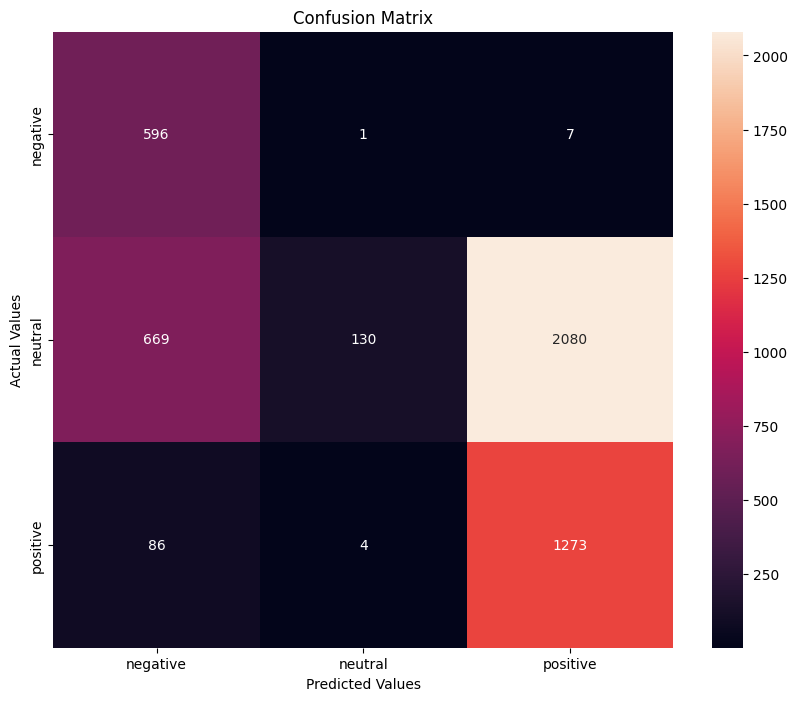

In [129]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentZeroShot)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

Trying Balanced Dataset

In [170]:
df = pd.read_csv('/content/drive/MyDrive/NLP/all-data.csv' ,engine="python", encoding = "ISO-8859-1")
num_entries_to_remove_positive = (df['Sentiment'] == 'positive').sum() - (df['Sentiment'] == 'negative').sum()
num_entries_to_remove_neutral = (df['Sentiment'] == 'neutral').sum() - (df['Sentiment'] == 'negative').sum()
print(num_entries_to_remove_neutral)


indices_to_remove = df[df['Sentiment'] == 'positive'].sample(num_entries_to_remove_positive).index
dfPositive = df[df['Sentiment'] == 'positive'].drop(indices_to_remove)

indices_to_remove = df[df['Sentiment'] == 'neutral'].sample(num_entries_to_remove_neutral).index
dfNeutral = df[df['Sentiment'] == 'neutral'].drop(indices_to_remove)

indices_to_remove = df[df['Sentiment'] == 'negative'].sample(0).index
dfNegative = df[df['Sentiment'] == 'negative'].drop(indices_to_remove)

2275


In [171]:
dfNew = pd.concat((dfNegative, dfNeutral, dfPositive), axis = 0)
dfNew
df = dfNew

<Axes: xlabel='count', ylabel='Sentiment'>

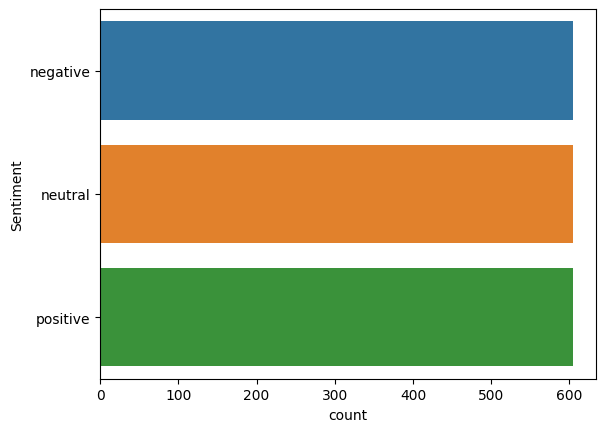

In [172]:
sns.countplot(y="Sentiment",data=df)

In [173]:
sentimentActual = df.get(['Sentiment'])
sentimentActual

,Sentiment
2,negative
415,negative
421,negative
423,negative
500,negative
...,...
4592,positive
4774,positive
4786,positive
4787,positive


In [174]:
df= df.drop(['Sentiment'], axis=1)
df

,Sentence
2,The international electronic industry company ...
415,A tinyurl link takes users to a scamming site ...
421,"Compared with the FTSE 100 index , which rose ..."
423,"Compared with the FTSE 100 index , which rose ..."
500,One of the challenges in the oil production in...
...,...
4592,"In the fourth quarter of 2009 , Atria 's net l..."
4774,`` I am extremely delighted with this project ...
4786,Danske Bank A-S DANSKE DC jumped 3.7 percent t...
4787,Our superior customer centricity and expertise...


In [175]:
sentimentActual = sentimentActual.to_numpy()

VADER


In [176]:
# Initialize the VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each article
sentiments = []
for article in df['Sentence']:
    # Get sentiment scores for the article
    scores = sid.polarity_scores(article)
    
    # Classify the sentiment based on the compound score
    if scores['compound'] >= 0.05:
        sentiment = 'positive'
    elif scores['compound'] <= -0.05:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

In [177]:
sentimentVADER = np.array(sentiments)


In [178]:
sentimentVADER

array(['neutral', 'positive', 'neutral', ..., 'neutral', 'positive',
       'neutral'], dtype='<U8')

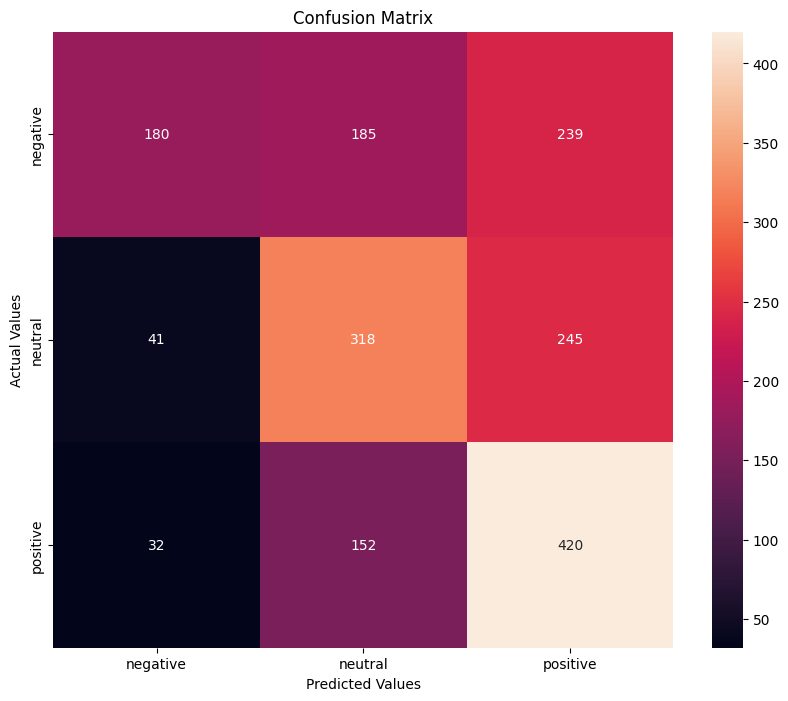

In [179]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentVADER)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [180]:
df

,Sentence,sentiment
2,The international electronic industry company ...,neutral
415,A tinyurl link takes users to a scamming site ...,positive
421,"Compared with the FTSE 100 index , which rose ...",neutral
423,"Compared with the FTSE 100 index , which rose ...",neutral
500,One of the challenges in the oil production in...,positive
...,...,...
4592,"In the fourth quarter of 2009 , Atria 's net l...",negative
4774,`` I am extremely delighted with this project ...,positive
4786,Danske Bank A-S DANSKE DC jumped 3.7 percent t...,neutral
4787,Our superior customer centricity and expertise...,positive


In [181]:
# Perform TF-IDF vectorization on the articles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Sentence'])

# Perform clustering using K-means
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign sentiment labels based on cluster analysis
sentiments = []
for i in range(len(df)):
   # articleI = df.loc[i, 'Sentence']
    cluster_label = kmeans.labels_[i]
    
    # # Get sentiment scores for the article
    # scores = sid.polarity_scores(article)
    
    # # Classify the sentiment based on the compound score
    # if scores['compound'] >= 0.05:
    #     sentiment = 'positive'
    # elif scores['compound'] <= -0.05:
    #     sentiment = 'negative'
    # else:
    #     sentiment = 'neutral'
    
    # Assign sentiment label based on the cluster
    if cluster_label == 0:
        sentiment = 'positive'
    elif cluster_label == 1:
        sentiment = 'negative'
    else:
        sentiment = 'neutral'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [182]:
sentimentKMeans1 = np.array(sentiments)
sentimentKMeans1

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

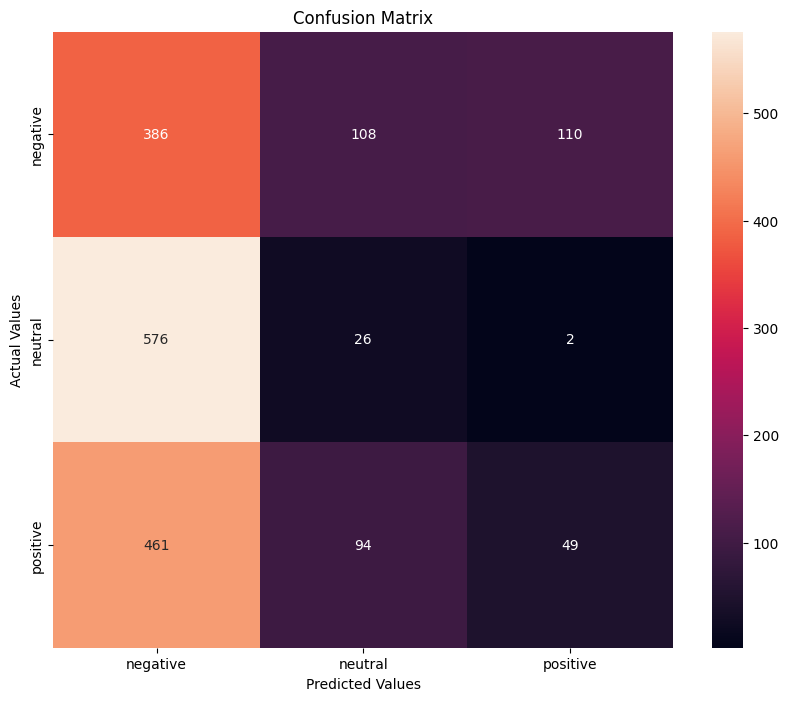

In [183]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentKMeans1)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [184]:


# Perform TF-IDF vectorization on the articles
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df['Sentence'])

# Perform clustering using K-means
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# Assign sentiment labels based on cluster analysis
sentiments = []
for i in range(len(df)):
   # article = df.loc[i, 'Sentence']
    cluster_label = kmeans.labels_[i]

    
    # Assign sentiment label based on the cluster
    if cluster_label == 0:
        sentiment = 'neutral'
    elif cluster_label == 1:
        sentiment = 'negative'
    else:
        sentiment = 'positive'
    
    # Append the sentiment to the list
    sentiments.append(sentiment)

# Add the sentiment column to the DataFrame
df['sentiment'] = sentiments

# Save the DataFrame with sentiment labels to a new CSV file
df.to_csv('financial_news_with_sentiment.csv', index=False)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [185]:

sentimentKMeans2 = np.array(sentiments)
sentimentKMeans2

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype='<U8')

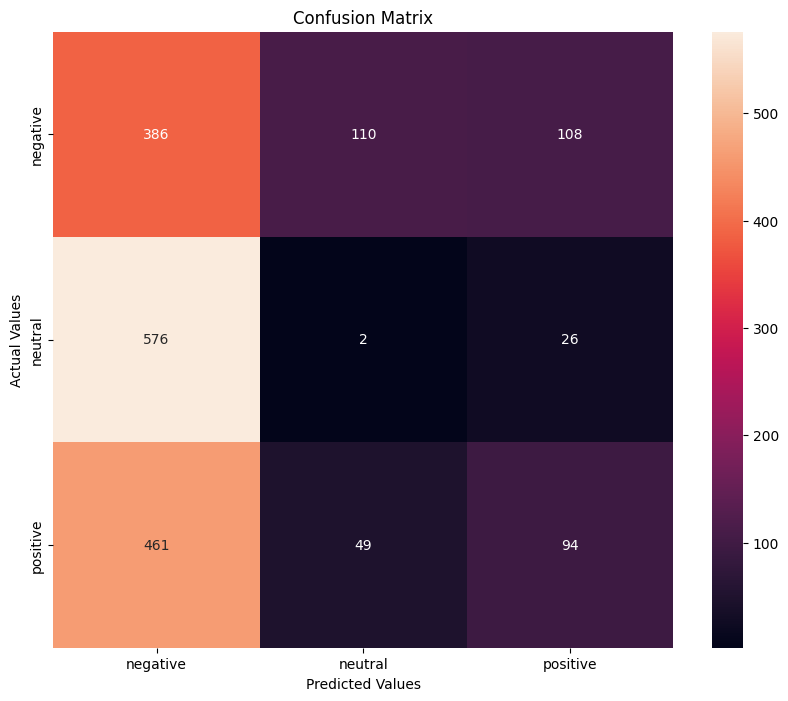

In [186]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentKMeans2)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [187]:


# List of financial news articles
articles = df.get(['Sentiment'])
articles = df.values.tolist()

# Sentiment categories
sentiment_categories = ['positive', 'negative', 'neutral']

# Load the zero-shot sentiment classification model
classifier = pipeline('zero-shot-classification')

# Perform zero-shot sentiment classification
results = classifier(articles, sentiment_categories)

# Print the sentiment predictions for each article
for i, result in enumerate(results):
    article_sentiment = result['labels'][0]
    article_score = result['scores'][0]
    print(f"Article {i+1}: Sentiment: {article_sentiment}, Score: {article_score}")


No model was supplied, defaulted to facebook/bart-large-mnli and revision c626438 (https://huggingface.co/facebook/bart-large-mnli).
Using a pipeline without specifying a model name and revision in production is not recommended.


Article 1: Sentiment: negative, Score: 0.8693140149116516
Article 2: Sentiment: negative, Score: 0.9300291538238525
Article 3: Sentiment: negative, Score: 0.8782062530517578
Article 4: Sentiment: negative, Score: 0.884749174118042
Article 5: Sentiment: negative, Score: 0.8071467876434326
Article 6: Sentiment: negative, Score: 0.9548858404159546
Article 7: Sentiment: negative, Score: 0.9045271873474121
Article 8: Sentiment: negative, Score: 0.9089155197143555
Article 9: Sentiment: negative, Score: 0.7013081908226013
Article 10: Sentiment: negative, Score: 0.953497052192688
Article 11: Sentiment: negative, Score: 0.9582335948944092
Article 12: Sentiment: negative, Score: 0.9407989382743835
Article 13: Sentiment: negative, Score: 0.9916238784790039
Article 14: Sentiment: negative, Score: 0.9462506771087646
Article 15: Sentiment: negative, Score: 0.9920185804367065
Article 16: Sentiment: negative, Score: 0.9208973050117493
Article 17: Sentiment: negative, Score: 0.9872387647628784
Article 

In [201]:
zeroShotString = """
Article 1: Sentiment: negative, Score: 0.8693140149116516
Article 2: Sentiment: negative, Score: 0.9300291538238525
Article 3: Sentiment: negative, Score: 0.8782062530517578
Article 4: Sentiment: negative, Score: 0.884749174118042
Article 5: Sentiment: negative, Score: 0.8071467876434326
Article 6: Sentiment: negative, Score: 0.9548858404159546
Article 7: Sentiment: negative, Score: 0.9045271873474121
Article 8: Sentiment: negative, Score: 0.9089155197143555
Article 9: Sentiment: negative, Score: 0.7013081908226013
Article 10: Sentiment: negative, Score: 0.953497052192688
Article 11: Sentiment: negative, Score: 0.9582335948944092
Article 12: Sentiment: negative, Score: 0.9407989382743835
Article 13: Sentiment: negative, Score: 0.9916238784790039
Article 14: Sentiment: negative, Score: 0.9462506771087646
Article 15: Sentiment: negative, Score: 0.9920185804367065
Article 16: Sentiment: negative, Score: 0.9208973050117493
Article 17: Sentiment: negative, Score: 0.9872387647628784
Article 18: Sentiment: negative, Score: 0.9383121132850647
Article 19: Sentiment: negative, Score: 0.9652710556983948
Article 20: Sentiment: negative, Score: 0.972654402256012
Article 21: Sentiment: negative, Score: 0.8851078152656555
Article 22: Sentiment: negative, Score: 0.878919780254364
Article 23: Sentiment: negative, Score: 0.940923273563385
Article 24: Sentiment: negative, Score: 0.9004587531089783
Article 25: Sentiment: negative, Score: 0.9469545483589172
Article 26: Sentiment: negative, Score: 0.9403738975524902
Article 27: Sentiment: negative, Score: 0.9715659022331238
Article 28: Sentiment: negative, Score: 0.9784544706344604
Article 29: Sentiment: negative, Score: 0.9726043343544006
Article 30: Sentiment: negative, Score: 0.811795711517334
Article 31: Sentiment: negative, Score: 0.9901801943778992
Article 32: Sentiment: negative, Score: 0.9711289405822754
Article 33: Sentiment: negative, Score: 0.9716030955314636
Article 34: Sentiment: negative, Score: 0.9147164225578308
Article 35: Sentiment: negative, Score: 0.9099392294883728
Article 36: Sentiment: negative, Score: 0.9911113977432251
Article 37: Sentiment: negative, Score: 0.9879894256591797
Article 38: Sentiment: negative, Score: 0.7793795466423035
Article 39: Sentiment: negative, Score: 0.896652340888977
Article 40: Sentiment: negative, Score: 0.6310941576957703
Article 41: Sentiment: negative, Score: 0.7170643210411072
Article 42: Sentiment: negative, Score: 0.9569575786590576
Article 43: Sentiment: negative, Score: 0.6136826872825623
Article 44: Sentiment: negative, Score: 0.9312319755554199
Article 45: Sentiment: negative, Score: 0.9298919439315796
Article 46: Sentiment: negative, Score: 0.9452587366104126
Article 47: Sentiment: negative, Score: 0.9003151059150696
Article 48: Sentiment: negative, Score: 0.955955445766449
Article 49: Sentiment: neutral, Score: 0.5902742147445679
Article 50: Sentiment: negative, Score: 0.5626364350318909
Article 51: Sentiment: negative, Score: 0.9005802273750305
Article 52: Sentiment: negative, Score: 0.9611058235168457
Article 53: Sentiment: negative, Score: 0.8496454954147339
Article 54: Sentiment: negative, Score: 0.9640992879867554
Article 55: Sentiment: negative, Score: 0.7173301577568054
Article 56: Sentiment: negative, Score: 0.9228373765945435
Article 57: Sentiment: negative, Score: 0.9533350467681885
Article 58: Sentiment: negative, Score: 0.9963293075561523
Article 59: Sentiment: negative, Score: 0.9397942423820496
Article 60: Sentiment: negative, Score: 0.64430832862854
Article 61: Sentiment: negative, Score: 0.5804754495620728
Article 62: Sentiment: negative, Score: 0.9642457962036133
Article 63: Sentiment: negative, Score: 0.9069468975067139
Article 64: Sentiment: negative, Score: 0.9336804151535034
Article 65: Sentiment: negative, Score: 0.8572058081626892
Article 66: Sentiment: negative, Score: 0.9219596982002258
Article 67: Sentiment: negative, Score: 0.8761535286903381
Article 68: Sentiment: negative, Score: 0.9516767859458923
Article 69: Sentiment: negative, Score: 0.8590472340583801
Article 70: Sentiment: negative, Score: 0.8170742988586426
Article 71: Sentiment: negative, Score: 0.6139575242996216
Article 72: Sentiment: negative, Score: 0.5009891986846924
Article 73: Sentiment: negative, Score: 0.729597270488739
Article 74: Sentiment: negative, Score: 0.5518509745597839
Article 75: Sentiment: negative, Score: 0.925234854221344
Article 76: Sentiment: negative, Score: 0.7087989449501038
Article 77: Sentiment: negative, Score: 0.8862994909286499
Article 78: Sentiment: negative, Score: 0.9420344233512878
Article 79: Sentiment: negative, Score: 0.8519043922424316
Article 80: Sentiment: negative, Score: 0.9553501605987549
Article 81: Sentiment: negative, Score: 0.8439319133758545
Article 82: Sentiment: negative, Score: 0.9568578600883484
Article 83: Sentiment: negative, Score: 0.951092541217804
Article 84: Sentiment: negative, Score: 0.9023119807243347
Article 85: Sentiment: negative, Score: 0.9445762038230896
Article 86: Sentiment: negative, Score: 0.8084955811500549
Article 87: Sentiment: negative, Score: 0.9475061297416687
Article 88: Sentiment: negative, Score: 0.911432147026062
Article 89: Sentiment: negative, Score: 0.9465211033821106
Article 90: Sentiment: negative, Score: 0.4869503378868103
Article 91: Sentiment: negative, Score: 0.8833432793617249
Article 92: Sentiment: negative, Score: 0.8580735325813293
Article 93: Sentiment: negative, Score: 0.9195882081985474
Article 94: Sentiment: negative, Score: 0.7845367789268494
Article 95: Sentiment: negative, Score: 0.9172390699386597
Article 96: Sentiment: negative, Score: 0.8705750703811646
Article 97: Sentiment: negative, Score: 0.8972781896591187
Article 98: Sentiment: negative, Score: 0.909130334854126
Article 99: Sentiment: negative, Score: 0.9013733267784119
Article 100: Sentiment: negative, Score: 0.9132450222969055
Article 101: Sentiment: negative, Score: 0.9159238338470459
Article 102: Sentiment: negative, Score: 0.7770354747772217
Article 103: Sentiment: negative, Score: 0.9395487904548645
Article 104: Sentiment: positive, Score: 0.6524521708488464
Article 105: Sentiment: negative, Score: 0.8960131406784058
Article 106: Sentiment: negative, Score: 0.9185248613357544
Article 107: Sentiment: negative, Score: 0.918595016002655
Article 108: Sentiment: negative, Score: 0.6055951714515686
Article 109: Sentiment: negative, Score: 0.8282402157783508
Article 110: Sentiment: negative, Score: 0.9621080160140991
Article 111: Sentiment: negative, Score: 0.6609174013137817
Article 112: Sentiment: negative, Score: 0.7698301672935486
Article 113: Sentiment: negative, Score: 0.8178374767303467
Article 114: Sentiment: negative, Score: 0.8108471632003784
Article 115: Sentiment: negative, Score: 0.8816210031509399
Article 116: Sentiment: negative, Score: 0.8366369009017944
Article 117: Sentiment: negative, Score: 0.9895350933074951
Article 118: Sentiment: negative, Score: 0.9542010426521301
Article 119: Sentiment: negative, Score: 0.9728183150291443
Article 120: Sentiment: negative, Score: 0.9751346111297607
Article 121: Sentiment: negative, Score: 0.951419472694397
Article 122: Sentiment: positive, Score: 0.8734322786331177
Article 123: Sentiment: negative, Score: 0.9447519779205322
Article 124: Sentiment: negative, Score: 0.9916354417800903
Article 125: Sentiment: negative, Score: 0.9928880929946899
Article 126: Sentiment: negative, Score: 0.9301594495773315
Article 127: Sentiment: negative, Score: 0.5599409341812134
Article 128: Sentiment: negative, Score: 0.9781396389007568
Article 129: Sentiment: negative, Score: 0.9857698082923889
Article 130: Sentiment: negative, Score: 0.9422897696495056
Article 131: Sentiment: negative, Score: 0.9584971070289612
Article 132: Sentiment: negative, Score: 0.9383120536804199
Article 133: Sentiment: negative, Score: 0.9441817402839661
Article 134: Sentiment: negative, Score: 0.4755260646343231
Article 135: Sentiment: negative, Score: 0.9771723747253418
Article 136: Sentiment: negative, Score: 0.9816535115242004
Article 137: Sentiment: negative, Score: 0.9817274808883667
Article 138: Sentiment: negative, Score: 0.9855343699455261
Article 139: Sentiment: negative, Score: 0.8277730345726013
Article 140: Sentiment: negative, Score: 0.9826173782348633
Article 141: Sentiment: negative, Score: 0.9131242632865906
Article 142: Sentiment: negative, Score: 0.9682560563087463
Article 143: Sentiment: negative, Score: 0.9764134287834167
Article 144: Sentiment: negative, Score: 0.9750782251358032
Article 145: Sentiment: negative, Score: 0.9268869161605835
Article 146: Sentiment: negative, Score: 0.792262852191925
Article 147: Sentiment: negative, Score: 0.9933653473854065
Article 148: Sentiment: negative, Score: 0.9881452918052673
Article 149: Sentiment: negative, Score: 0.9670326709747314
Article 150: Sentiment: negative, Score: 0.9849131107330322
Article 151: Sentiment: negative, Score: 0.9820652604103088
Article 152: Sentiment: negative, Score: 0.987434983253479
Article 153: Sentiment: negative, Score: 0.9845097661018372
Article 154: Sentiment: negative, Score: 0.9867547154426575
Article 155: Sentiment: negative, Score: 0.9711873531341553
Article 156: Sentiment: negative, Score: 0.9788522124290466
Article 157: Sentiment: negative, Score: 0.9838576912879944
Article 158: Sentiment: negative, Score: 0.9781758189201355
Article 159: Sentiment: positive, Score: 0.5875709652900696
Article 160: Sentiment: negative, Score: 0.9750674962997437
Article 161: Sentiment: negative, Score: 0.9755017161369324
Article 162: Sentiment: negative, Score: 0.969137966632843
Article 163: Sentiment: negative, Score: 0.8231373429298401
Article 164: Sentiment: negative, Score: 0.9875141382217407
Article 165: Sentiment: negative, Score: 0.45968544483184814
Article 166: Sentiment: negative, Score: 0.896686851978302
Article 167: Sentiment: negative, Score: 0.9738177061080933
Article 168: Sentiment: negative, Score: 0.9830225706100464
Article 169: Sentiment: negative, Score: 0.5351668000221252
Article 170: Sentiment: negative, Score: 0.9699247479438782
Article 171: Sentiment: negative, Score: 0.9688842296600342
Article 172: Sentiment: negative, Score: 0.9884915947914124
Article 173: Sentiment: negative, Score: 0.9522868990898132
Article 174: Sentiment: negative, Score: 0.9813213348388672
Article 175: Sentiment: negative, Score: 0.9791693687438965
Article 176: Sentiment: negative, Score: 0.9808234572410583
Article 177: Sentiment: positive, Score: 0.6374848484992981
Article 178: Sentiment: negative, Score: 0.9848551750183105
Article 179: Sentiment: negative, Score: 0.9706486463546753
Article 180: Sentiment: negative, Score: 0.9632599949836731
Article 181: Sentiment: negative, Score: 0.9867064356803894
Article 182: Sentiment: negative, Score: 0.9826430678367615
Article 183: Sentiment: negative, Score: 0.6227405071258545
Article 184: Sentiment: negative, Score: 0.8822047114372253
Article 185: Sentiment: negative, Score: 0.9853354096412659
Article 186: Sentiment: negative, Score: 0.8559902906417847
Article 187: Sentiment: negative, Score: 0.9831029772758484
Article 188: Sentiment: negative, Score: 0.9855018258094788
Article 189: Sentiment: negative, Score: 0.9714332818984985
Article 190: Sentiment: negative, Score: 0.9880324602127075
Article 191: Sentiment: negative, Score: 0.8373292088508606
Article 192: Sentiment: negative, Score: 0.9721378684043884
Article 193: Sentiment: negative, Score: 0.9866142272949219
Article 194: Sentiment: negative, Score: 0.9692298769950867
Article 195: Sentiment: negative, Score: 0.8852448463439941
Article 196: Sentiment: negative, Score: 0.9637641906738281
Article 197: Sentiment: negative, Score: 0.9647500514984131
Article 198: Sentiment: negative, Score: 0.9721806645393372
Article 199: Sentiment: negative, Score: 0.9956790804862976
Article 200: Sentiment: negative, Score: 0.9279488921165466
Article 201: Sentiment: negative, Score: 0.6569347977638245
Article 202: Sentiment: negative, Score: 0.7649734616279602
Article 203: Sentiment: negative, Score: 0.8891494870185852
Article 204: Sentiment: negative, Score: 0.8941202163696289
Article 205: Sentiment: negative, Score: 0.7146198749542236
Article 206: Sentiment: negative, Score: 0.6485785841941833
Article 207: Sentiment: negative, Score: 0.8535533547401428
Article 208: Sentiment: negative, Score: 0.7098238468170166
Article 209: Sentiment: negative, Score: 0.9242060780525208
Article 210: Sentiment: negative, Score: 0.90926194190979
Article 211: Sentiment: negative, Score: 0.8618690371513367
Article 212: Sentiment: negative, Score: 0.9068896174430847
Article 213: Sentiment: negative, Score: 0.8423222303390503
Article 214: Sentiment: negative, Score: 0.9829703569412231
Article 215: Sentiment: negative, Score: 0.6583088040351868
Article 216: Sentiment: negative, Score: 0.9778551459312439
Article 217: Sentiment: negative, Score: 0.9772683382034302
Article 218: Sentiment: negative, Score: 0.47617068886756897
Article 219: Sentiment: negative, Score: 0.6726511120796204
Article 220: Sentiment: negative, Score: 0.7218258380889893
Article 221: Sentiment: negative, Score: 0.6435513496398926
Article 222: Sentiment: negative, Score: 0.7428639531135559
Article 223: Sentiment: negative, Score: 0.4908474087715149
Article 224: Sentiment: negative, Score: 0.9008669257164001
Article 225: Sentiment: negative, Score: 0.9721965789794922
Article 226: Sentiment: negative, Score: 0.8856924772262573
Article 227: Sentiment: negative, Score: 0.9742400646209717
Article 228: Sentiment: negative, Score: 0.5300593376159668
Article 229: Sentiment: negative, Score: 0.9396571516990662
Article 230: Sentiment: negative, Score: 0.8639093041419983
Article 231: Sentiment: negative, Score: 0.995698094367981
Article 232: Sentiment: negative, Score: 0.7690735459327698
Article 233: Sentiment: negative, Score: 0.8990954756736755
Article 234: Sentiment: negative, Score: 0.89640212059021
Article 235: Sentiment: negative, Score: 0.9513984322547913
Article 236: Sentiment: negative, Score: 0.8696674108505249
Article 237: Sentiment: negative, Score: 0.8656020164489746
Article 238: Sentiment: negative, Score: 0.9776058197021484
Article 239: Sentiment: negative, Score: 0.8150319457054138
Article 240: Sentiment: negative, Score: 0.974076509475708
Article 241: Sentiment: negative, Score: 0.8478857278823853
Article 242: Sentiment: negative, Score: 0.965622067451477
Article 243: Sentiment: negative, Score: 0.9545428156852722
Article 244: Sentiment: negative, Score: 0.897479236125946
Article 245: Sentiment: negative, Score: 0.9625891447067261
Article 246: Sentiment: negative, Score: 0.9836279153823853
Article 247: Sentiment: negative, Score: 0.6113746762275696
Article 248: Sentiment: negative, Score: 0.9977599382400513
Article 249: Sentiment: negative, Score: 0.8717872500419617
Article 250: Sentiment: negative, Score: 0.8364934325218201
Article 251: Sentiment: negative, Score: 0.9748063087463379
Article 252: Sentiment: negative, Score: 0.8997129797935486
Article 253: Sentiment: negative, Score: 0.9405533075332642
Article 254: Sentiment: negative, Score: 0.9095972180366516
Article 255: Sentiment: negative, Score: 0.9215863943099976
Article 256: Sentiment: negative, Score: 0.9447274208068848
Article 257: Sentiment: negative, Score: 0.9666301012039185
Article 258: Sentiment: negative, Score: 0.8990546464920044
Article 259: Sentiment: negative, Score: 0.8543326258659363
Article 260: Sentiment: negative, Score: 0.6873054504394531
Article 261: Sentiment: negative, Score: 0.9376170039176941
Article 262: Sentiment: negative, Score: 0.8831563591957092
Article 263: Sentiment: negative, Score: 0.9964062571525574
Article 264: Sentiment: negative, Score: 0.5670945048332214
Article 265: Sentiment: negative, Score: 0.8580383062362671
Article 266: Sentiment: negative, Score: 0.9024273157119751
Article 267: Sentiment: negative, Score: 0.9131333231925964
Article 268: Sentiment: negative, Score: 0.8982880115509033
Article 269: Sentiment: negative, Score: 0.8169470429420471
Article 270: Sentiment: negative, Score: 0.8979959487915039
Article 271: Sentiment: negative, Score: 0.918245792388916
Article 272: Sentiment: negative, Score: 0.6453472971916199
Article 273: Sentiment: negative, Score: 0.4493173062801361
Article 274: Sentiment: negative, Score: 0.9913813471794128
Article 275: Sentiment: negative, Score: 0.9177985191345215
Article 276: Sentiment: negative, Score: 0.9590764045715332
Article 277: Sentiment: negative, Score: 0.9677909016609192
Article 278: Sentiment: negative, Score: 0.9700401425361633
Article 279: Sentiment: negative, Score: 0.3936839699745178
Article 280: Sentiment: negative, Score: 0.9903362393379211
Article 281: Sentiment: negative, Score: 0.9257520437240601
Article 282: Sentiment: negative, Score: 0.93028324842453
Article 283: Sentiment: negative, Score: 0.9104436039924622
Article 284: Sentiment: negative, Score: 0.9692773222923279
Article 285: Sentiment: negative, Score: 0.9116146564483643
Article 286: Sentiment: negative, Score: 0.8900296092033386
Article 287: Sentiment: negative, Score: 0.7570565342903137
Article 288: Sentiment: negative, Score: 0.9504569172859192
Article 289: Sentiment: negative, Score: 0.9645717144012451
Article 290: Sentiment: negative, Score: 0.6806632876396179
Article 291: Sentiment: negative, Score: 0.9466260075569153
Article 292: Sentiment: negative, Score: 0.6916459202766418
Article 293: Sentiment: negative, Score: 0.9862362742424011
Article 294: Sentiment: negative, Score: 0.8228781819343567
Article 295: Sentiment: negative, Score: 0.710030198097229
Article 296: Sentiment: negative, Score: 0.5531275868415833
Article 297: Sentiment: negative, Score: 0.8378558158874512
Article 298: Sentiment: negative, Score: 0.9856520891189575
Article 299: Sentiment: negative, Score: 0.91558837890625
Article 300: Sentiment: negative, Score: 0.9690564274787903
Article 301: Sentiment: negative, Score: 0.9024680852890015
Article 302: Sentiment: negative, Score: 0.9148812890052795
Article 303: Sentiment: negative, Score: 0.7780824303627014
Article 304: Sentiment: negative, Score: 0.9399408102035522
Article 305: Sentiment: negative, Score: 0.7683817148208618
Article 306: Sentiment: negative, Score: 0.9835033416748047
Article 307: Sentiment: negative, Score: 0.9766881465911865
Article 308: Sentiment: negative, Score: 0.9568292498588562
Article 309: Sentiment: negative, Score: 0.9857171177864075
Article 310: Sentiment: negative, Score: 0.9510927200317383
Article 311: Sentiment: negative, Score: 0.9174927473068237
Article 312: Sentiment: negative, Score: 0.985284686088562
Article 313: Sentiment: negative, Score: 0.9053190350532532
Article 314: Sentiment: negative, Score: 0.7673300504684448
Article 315: Sentiment: negative, Score: 0.859925389289856
Article 316: Sentiment: negative, Score: 0.7959173321723938
Article 317: Sentiment: negative, Score: 0.6306251883506775
Article 318: Sentiment: negative, Score: 0.9886202812194824
Article 319: Sentiment: negative, Score: 0.9914310574531555
Article 320: Sentiment: negative, Score: 0.9649466276168823
Article 321: Sentiment: negative, Score: 0.9552037715911865
Article 322: Sentiment: negative, Score: 0.9669666290283203
Article 323: Sentiment: negative, Score: 0.9928907752037048
Article 324: Sentiment: negative, Score: 0.9184836745262146
Article 325: Sentiment: negative, Score: 0.9383617639541626
Article 326: Sentiment: negative, Score: 0.9386903643608093
Article 327: Sentiment: negative, Score: 0.9148166179656982
Article 328: Sentiment: positive, Score: 0.5477102398872375
Article 329: Sentiment: negative, Score: 0.8794256448745728
Article 330: Sentiment: negative, Score: 0.9441430568695068
Article 331: Sentiment: negative, Score: 0.8778080940246582
Article 332: Sentiment: negative, Score: 0.6272164583206177
Article 333: Sentiment: negative, Score: 0.9934860467910767
Article 334: Sentiment: negative, Score: 0.6475134491920471
Article 335: Sentiment: negative, Score: 0.7715968489646912
Article 336: Sentiment: positive, Score: 0.4352937638759613
Article 337: Sentiment: negative, Score: 0.8932152986526489
Article 338: Sentiment: negative, Score: 0.9471940398216248
Article 339: Sentiment: negative, Score: 0.9818825125694275
Article 340: Sentiment: negative, Score: 0.9848182797431946
Article 341: Sentiment: negative, Score: 0.9803720712661743
Article 342: Sentiment: negative, Score: 0.993090033531189
Article 343: Sentiment: negative, Score: 0.9566172361373901
Article 344: Sentiment: negative, Score: 0.8759320378303528
Article 345: Sentiment: negative, Score: 0.9829718470573425
Article 346: Sentiment: negative, Score: 0.89104163646698
Article 347: Sentiment: negative, Score: 0.9279957413673401
Article 348: Sentiment: negative, Score: 0.8574629426002502
Article 349: Sentiment: negative, Score: 0.9932992458343506
Article 350: Sentiment: negative, Score: 0.934582531452179
Article 351: Sentiment: negative, Score: 0.8924533724784851
Article 352: Sentiment: negative, Score: 0.7296499609947205
Article 353: Sentiment: negative, Score: 0.9830833673477173
Article 354: Sentiment: negative, Score: 0.7413102984428406
Article 355: Sentiment: negative, Score: 0.9638418555259705
Article 356: Sentiment: negative, Score: 0.9701012969017029
Article 357: Sentiment: negative, Score: 0.8404723405838013
Article 358: Sentiment: negative, Score: 0.9902244806289673
Article 359: Sentiment: negative, Score: 0.864593505859375
Article 360: Sentiment: negative, Score: 0.8755205273628235
Article 361: Sentiment: negative, Score: 0.8095335960388184
Article 362: Sentiment: negative, Score: 0.9128050804138184
Article 363: Sentiment: negative, Score: 0.8620429039001465
Article 364: Sentiment: negative, Score: 0.8460314273834229
Article 365: Sentiment: negative, Score: 0.9808129072189331
Article 366: Sentiment: negative, Score: 0.7531501054763794
Article 367: Sentiment: negative, Score: 0.9805291295051575
Article 368: Sentiment: negative, Score: 0.8812335729598999
Article 369: Sentiment: negative, Score: 0.9482883214950562
Article 370: Sentiment: negative, Score: 0.9853290319442749
Article 371: Sentiment: negative, Score: 0.706017017364502
Article 372: Sentiment: negative, Score: 0.9782227873802185
Article 373: Sentiment: negative, Score: 0.9885117411613464
Article 374: Sentiment: negative, Score: 0.9381694197654724
Article 375: Sentiment: negative, Score: 0.9238475561141968
Article 376: Sentiment: negative, Score: 0.7234944701194763
Article 377: Sentiment: negative, Score: 0.9796689748764038
Article 378: Sentiment: negative, Score: 0.9582831859588623
Article 379: Sentiment: negative, Score: 0.763297975063324
Article 380: Sentiment: negative, Score: 0.9382126331329346
Article 381: Sentiment: negative, Score: 0.8032693862915039
Article 382: Sentiment: negative, Score: 0.8369131684303284
Article 383: Sentiment: negative, Score: 0.7981839776039124
Article 384: Sentiment: negative, Score: 0.6537192463874817
Article 385: Sentiment: negative, Score: 0.7896547317504883
Article 386: Sentiment: negative, Score: 0.8092742562294006
Article 387: Sentiment: negative, Score: 0.7575141787528992
Article 388: Sentiment: negative, Score: 0.7525371313095093
Article 389: Sentiment: negative, Score: 0.7213611006736755
Article 390: Sentiment: negative, Score: 0.7052039504051208
Article 391: Sentiment: negative, Score: 0.892082154750824
Article 392: Sentiment: negative, Score: 0.9774077534675598
Article 393: Sentiment: negative, Score: 0.9866481423377991
Article 394: Sentiment: negative, Score: 0.9854991436004639
Article 395: Sentiment: negative, Score: 0.9746047258377075
Article 396: Sentiment: negative, Score: 0.9543753266334534
Article 397: Sentiment: negative, Score: 0.9915831089019775
Article 398: Sentiment: negative, Score: 0.9733263850212097
Article 399: Sentiment: negative, Score: 0.6232830286026001
Article 400: Sentiment: negative, Score: 0.9543739557266235
Article 401: Sentiment: negative, Score: 0.926159143447876
Article 402: Sentiment: negative, Score: 0.67108553647995
Article 403: Sentiment: negative, Score: 0.9568707346916199
Article 404: Sentiment: negative, Score: 0.725771963596344
Article 405: Sentiment: negative, Score: 0.925588846206665
Article 406: Sentiment: negative, Score: 0.9670664072036743
Article 407: Sentiment: negative, Score: 0.8791194558143616
Article 408: Sentiment: negative, Score: 0.7580032348632812
Article 409: Sentiment: negative, Score: 0.8969586491584778
Article 410: Sentiment: negative, Score: 0.9209322333335876
Article 411: Sentiment: negative, Score: 0.8569047451019287
Article 412: Sentiment: negative, Score: 0.9397464394569397
Article 413: Sentiment: negative, Score: 0.8617594838142395
Article 414: Sentiment: negative, Score: 0.772092878818512
Article 415: Sentiment: negative, Score: 0.7037689685821533
Article 416: Sentiment: negative, Score: 0.9495813846588135
Article 417: Sentiment: negative, Score: 0.9860489964485168
Article 418: Sentiment: negative, Score: 0.9596254825592041
Article 419: Sentiment: negative, Score: 0.9393892288208008
Article 420: Sentiment: negative, Score: 0.950975775718689
Article 421: Sentiment: negative, Score: 0.9817281365394592
Article 422: Sentiment: negative, Score: 0.5166276097297668
Article 423: Sentiment: negative, Score: 0.9625179767608643
Article 424: Sentiment: negative, Score: 0.9319373965263367
Article 425: Sentiment: negative, Score: 0.9630501866340637
Article 426: Sentiment: negative, Score: 0.9003925323486328
Article 427: Sentiment: negative, Score: 0.8319714069366455
Article 428: Sentiment: negative, Score: 0.811286211013794
Article 429: Sentiment: negative, Score: 0.9786074757575989
Article 430: Sentiment: negative, Score: 0.856440007686615
Article 431: Sentiment: negative, Score: 0.9432030916213989
Article 432: Sentiment: negative, Score: 0.9271113872528076
Article 433: Sentiment: negative, Score: 0.9347293376922607
Article 434: Sentiment: negative, Score: 0.8709495663642883
Article 435: Sentiment: negative, Score: 0.8218578696250916
Article 436: Sentiment: negative, Score: 0.9449346661567688
Article 437: Sentiment: negative, Score: 0.9467549324035645
Article 438: Sentiment: negative, Score: 0.9471264481544495
Article 439: Sentiment: negative, Score: 0.8976141214370728
Article 440: Sentiment: negative, Score: 0.8645700216293335
Article 441: Sentiment: negative, Score: 0.9281279444694519
Article 442: Sentiment: negative, Score: 0.5102325081825256
Article 443: Sentiment: negative, Score: 0.9579023718833923
Article 444: Sentiment: negative, Score: 0.8539254665374756
Article 445: Sentiment: negative, Score: 0.893153965473175
Article 446: Sentiment: negative, Score: 0.8401312232017517
Article 447: Sentiment: negative, Score: 0.9561427235603333
Article 448: Sentiment: negative, Score: 0.9540808200836182
Article 449: Sentiment: negative, Score: 0.9553577303886414
Article 450: Sentiment: negative, Score: 0.9260261654853821
Article 451: Sentiment: negative, Score: 0.8919265270233154
Article 452: Sentiment: negative, Score: 0.8624230027198792
Article 453: Sentiment: negative, Score: 0.9527219533920288
Article 454: Sentiment: negative, Score: 0.9206206798553467
Article 455: Sentiment: negative, Score: 0.8349454402923584
Article 456: Sentiment: negative, Score: 0.918186366558075
Article 457: Sentiment: negative, Score: 0.9623895883560181
Article 458: Sentiment: negative, Score: 0.9169290661811829
Article 459: Sentiment: negative, Score: 0.8799043297767639
Article 460: Sentiment: negative, Score: 0.9485437273979187
Article 461: Sentiment: negative, Score: 0.9364832043647766
Article 462: Sentiment: negative, Score: 0.932752251625061
Article 463: Sentiment: negative, Score: 0.6637928485870361
Article 464: Sentiment: negative, Score: 0.9147225618362427
Article 465: Sentiment: negative, Score: 0.9635788798332214
Article 466: Sentiment: negative, Score: 0.9721379280090332
Article 467: Sentiment: negative, Score: 0.8560735583305359
Article 468: Sentiment: negative, Score: 0.8453598022460938
Article 469: Sentiment: negative, Score: 0.8528222441673279
Article 470: Sentiment: negative, Score: 0.8774319291114807
Article 471: Sentiment: negative, Score: 0.8643049597740173
Article 472: Sentiment: negative, Score: 0.9348414540290833
Article 473: Sentiment: negative, Score: 0.9041488170623779
Article 474: Sentiment: negative, Score: 0.9574073553085327
Article 475: Sentiment: negative, Score: 0.7209895253181458
Article 476: Sentiment: negative, Score: 0.9479194283485413
Article 477: Sentiment: negative, Score: 0.9458193182945251
Article 478: Sentiment: negative, Score: 0.9742474555969238
Article 479: Sentiment: negative, Score: 0.9588226079940796
Article 480: Sentiment: negative, Score: 0.936171293258667
Article 481: Sentiment: negative, Score: 0.9405655264854431
Article 482: Sentiment: negative, Score: 0.9658409953117371
Article 483: Sentiment: negative, Score: 0.9359097480773926
Article 484: Sentiment: negative, Score: 0.9302941560745239
Article 485: Sentiment: negative, Score: 0.9305352568626404
Article 486: Sentiment: negative, Score: 0.9463616609573364
Article 487: Sentiment: negative, Score: 0.7381781339645386
Article 488: Sentiment: negative, Score: 0.9560694098472595
Article 489: Sentiment: negative, Score: 0.9401248693466187
Article 490: Sentiment: negative, Score: 0.9487090110778809
Article 491: Sentiment: negative, Score: 0.668770432472229
Article 492: Sentiment: negative, Score: 0.9516092538833618
Article 493: Sentiment: negative, Score: 0.9645465016365051
Article 494: Sentiment: negative, Score: 0.8563022613525391
Article 495: Sentiment: negative, Score: 0.8584471344947815
Article 496: Sentiment: negative, Score: 0.8402842879295349
Article 497: Sentiment: negative, Score: 0.9638664722442627
Article 498: Sentiment: negative, Score: 0.9117224812507629
Article 499: Sentiment: negative, Score: 0.9261133074760437
Article 500: Sentiment: negative, Score: 0.7661707401275635
Article 501: Sentiment: negative, Score: 0.9729238748550415
Article 502: Sentiment: negative, Score: 0.8727937340736389
Article 503: Sentiment: negative, Score: 0.8952961564064026
Article 504: Sentiment: negative, Score: 0.9401720762252808
Article 505: Sentiment: negative, Score: 0.9552604556083679
Article 506: Sentiment: negative, Score: 0.984587550163269
Article 507: Sentiment: negative, Score: 0.9347518682479858
Article 508: Sentiment: negative, Score: 0.9290462136268616
Article 509: Sentiment: negative, Score: 0.9637839198112488
Article 510: Sentiment: negative, Score: 0.9511523842811584
Article 511: Sentiment: negative, Score: 0.934198260307312
Article 512: Sentiment: negative, Score: 0.9848455190658569
Article 513: Sentiment: negative, Score: 0.8946136236190796
Article 514: Sentiment: negative, Score: 0.8203891515731812
Article 515: Sentiment: negative, Score: 0.8947447538375854
Article 516: Sentiment: negative, Score: 0.9673561453819275
Article 517: Sentiment: negative, Score: 0.913493275642395
Article 518: Sentiment: negative, Score: 0.9357029795646667
Article 519: Sentiment: negative, Score: 0.947201132774353
Article 520: Sentiment: negative, Score: 0.9674222469329834
Article 521: Sentiment: negative, Score: 0.9469656944274902
Article 522: Sentiment: negative, Score: 0.9482784867286682
Article 523: Sentiment: negative, Score: 0.8356854319572449
Article 524: Sentiment: negative, Score: 0.9535660743713379
Article 525: Sentiment: negative, Score: 0.9337805509567261
Article 526: Sentiment: negative, Score: 0.9918134808540344
Article 527: Sentiment: negative, Score: 0.9865978360176086
Article 528: Sentiment: negative, Score: 0.8681311011314392
Article 529: Sentiment: negative, Score: 0.93882817029953
Article 530: Sentiment: negative, Score: 0.959621787071228
Article 531: Sentiment: negative, Score: 0.910914957523346
Article 532: Sentiment: negative, Score: 0.9302834868431091
Article 533: Sentiment: negative, Score: 0.882332444190979
Article 534: Sentiment: negative, Score: 0.9493840932846069
Article 535: Sentiment: negative, Score: 0.9471457004547119
Article 536: Sentiment: negative, Score: 0.9344737529754639
Article 537: Sentiment: negative, Score: 0.929547905921936
Article 538: Sentiment: negative, Score: 0.8976343274116516
Article 539: Sentiment: negative, Score: 0.8479805588722229
Article 540: Sentiment: negative, Score: 0.9050115346908569
Article 541: Sentiment: negative, Score: 0.9802916049957275
Article 542: Sentiment: negative, Score: 0.9193821549415588
Article 543: Sentiment: negative, Score: 0.5950844287872314
Article 544: Sentiment: negative, Score: 0.9380185604095459
Article 545: Sentiment: negative, Score: 0.9837679266929626
Article 546: Sentiment: negative, Score: 0.9250892400741577
Article 547: Sentiment: negative, Score: 0.9103138446807861
Article 548: Sentiment: negative, Score: 0.9605855941772461
Article 549: Sentiment: negative, Score: 0.9340984225273132
Article 550: Sentiment: negative, Score: 0.9343473315238953
Article 551: Sentiment: negative, Score: 0.968916654586792
Article 552: Sentiment: positive, Score: 0.5755329728126526
Article 553: Sentiment: negative, Score: 0.9032012820243835
Article 554: Sentiment: negative, Score: 0.8851603269577026
Article 555: Sentiment: negative, Score: 0.9245564341545105
Article 556: Sentiment: negative, Score: 0.6807205080986023
Article 557: Sentiment: negative, Score: 0.9777125120162964
Article 558: Sentiment: negative, Score: 0.8776238560676575
Article 559: Sentiment: negative, Score: 0.9187572598457336
Article 560: Sentiment: negative, Score: 0.9257503151893616
Article 561: Sentiment: negative, Score: 0.8373985886573792
Article 562: Sentiment: negative, Score: 0.907720148563385
Article 563: Sentiment: negative, Score: 0.973484218120575
Article 564: Sentiment: negative, Score: 0.9532195329666138
Article 565: Sentiment: negative, Score: 0.9755715131759644
Article 566: Sentiment: negative, Score: 0.832012951374054
Article 567: Sentiment: negative, Score: 0.9753944277763367
Article 568: Sentiment: negative, Score: 0.9614778161048889
Article 569: Sentiment: negative, Score: 0.963991641998291
Article 570: Sentiment: negative, Score: 0.7167315483093262
Article 571: Sentiment: negative, Score: 0.9267622828483582
Article 572: Sentiment: negative, Score: 0.9499216079711914
Article 573: Sentiment: negative, Score: 0.9717100858688354
Article 574: Sentiment: negative, Score: 0.8600852489471436
Article 575: Sentiment: negative, Score: 0.8748018741607666
Article 576: Sentiment: negative, Score: 0.9572498202323914
Article 577: Sentiment: negative, Score: 0.6164129972457886
Article 578: Sentiment: negative, Score: 0.9446517825126648
Article 579: Sentiment: negative, Score: 0.9486289024353027
Article 580: Sentiment: negative, Score: 0.8004600405693054
Article 581: Sentiment: negative, Score: 0.8878763914108276
Article 582: Sentiment: negative, Score: 0.8163877129554749
Article 583: Sentiment: negative, Score: 0.8257516622543335
Article 584: Sentiment: negative, Score: 0.9051722884178162
Article 585: Sentiment: negative, Score: 0.5517294406890869
Article 586: Sentiment: negative, Score: 0.6473550200462341
Article 587: Sentiment: negative, Score: 0.9704447984695435
Article 588: Sentiment: negative, Score: 0.9656990766525269
Article 589: Sentiment: negative, Score: 0.8741867542266846
Article 590: Sentiment: negative, Score: 0.7995464205741882
Article 591: Sentiment: negative, Score: 0.9579880237579346
Article 592: Sentiment: negative, Score: 0.8952696323394775
Article 593: Sentiment: negative, Score: 0.9786443710327148
Article 594: Sentiment: negative, Score: 0.9780589938163757
Article 595: Sentiment: negative, Score: 0.9673901796340942
Article 596: Sentiment: negative, Score: 0.8477722406387329
Article 597: Sentiment: negative, Score: 0.9712730050086975
Article 598: Sentiment: negative, Score: 0.9396809339523315
Article 599: Sentiment: negative, Score: 0.9602944850921631
Article 600: Sentiment: negative, Score: 0.959408164024353
Article 601: Sentiment: negative, Score: 0.8443629145622253
Article 602: Sentiment: negative, Score: 0.873961329460144
Article 603: Sentiment: negative, Score: 0.7415308952331543
Article 604: Sentiment: negative, Score: 0.9321595430374146
Article 605: Sentiment: neutral, Score: 0.3803684413433075
Article 606: Sentiment: negative, Score: 0.6751198172569275
Article 607: Sentiment: positive, Score: 0.8541545271873474
Article 608: Sentiment: positive, Score: 0.7751274108886719
Article 609: Sentiment: positive, Score: 0.5785577893257141
Article 610: Sentiment: positive, Score: 0.8185994029045105
Article 611: Sentiment: positive, Score: 0.5697782635688782
Article 612: Sentiment: negative, Score: 0.5080074071884155
Article 613: Sentiment: positive, Score: 0.4731222093105316
Article 614: Sentiment: positive, Score: 0.5898931622505188
Article 615: Sentiment: positive, Score: 0.555694043636322
Article 616: Sentiment: positive, Score: 0.577655553817749
Article 617: Sentiment: positive, Score: 0.7333773374557495
Article 618: Sentiment: positive, Score: 0.5936105847358704
Article 619: Sentiment: positive, Score: 0.6399979591369629
Article 620: Sentiment: positive, Score: 0.7376393675804138
Article 621: Sentiment: negative, Score: 0.4564193785190582
Article 622: Sentiment: positive, Score: 0.6926764845848083
Article 623: Sentiment: positive, Score: 0.9700363278388977
Article 624: Sentiment: positive, Score: 0.9090766906738281
Article 625: Sentiment: positive, Score: 0.5863919258117676
Article 626: Sentiment: positive, Score: 0.5633772015571594
Article 627: Sentiment: positive, Score: 0.7391926646232605
Article 628: Sentiment: negative, Score: 0.4183134138584137
Article 629: Sentiment: positive, Score: 0.7093684077262878
Article 630: Sentiment: positive, Score: 0.4874541759490967
Article 631: Sentiment: positive, Score: 0.7041285634040833
Article 632: Sentiment: positive, Score: 0.6475622653961182
Article 633: Sentiment: negative, Score: 0.652044951915741
Article 634: Sentiment: positive, Score: 0.5892168283462524
Article 635: Sentiment: positive, Score: 0.9909343719482422
Article 636: Sentiment: negative, Score: 0.8377757668495178
Article 637: Sentiment: positive, Score: 0.4806128144264221
Article 638: Sentiment: positive, Score: 0.6820598244667053
Article 639: Sentiment: positive, Score: 0.6928316354751587
Article 640: Sentiment: positive, Score: 0.9369948506355286
Article 641: Sentiment: positive, Score: 0.7084609270095825
Article 642: Sentiment: negative, Score: 0.6449865698814392
Article 643: Sentiment: positive, Score: 0.6760804653167725
Article 644: Sentiment: positive, Score: 0.6018012762069702
Article 645: Sentiment: positive, Score: 0.8739755749702454
Article 646: Sentiment: positive, Score: 0.9705110192298889
Article 647: Sentiment: positive, Score: 0.9850967526435852
Article 648: Sentiment: positive, Score: 0.4033394157886505
Article 649: Sentiment: positive, Score: 0.5794468522071838
Article 650: Sentiment: positive, Score: 0.5982944965362549
Article 651: Sentiment: positive, Score: 0.5803013443946838
Article 652: Sentiment: neutral, Score: 0.35920435190200806
Article 653: Sentiment: positive, Score: 0.669532835483551
Article 654: Sentiment: positive, Score: 0.5579515099525452
Article 655: Sentiment: neutral, Score: 0.3532180190086365
Article 656: Sentiment: positive, Score: 0.6170275211334229
Article 657: Sentiment: positive, Score: 0.49102282524108887
Article 658: Sentiment: positive, Score: 0.5623626708984375
Article 659: Sentiment: positive, Score: 0.9766636490821838
Article 660: Sentiment: negative, Score: 0.39542749524116516
Article 661: Sentiment: positive, Score: 0.38251444697380066
Article 662: Sentiment: positive, Score: 0.5625633597373962
Article 663: Sentiment: positive, Score: 0.7104616761207581
Article 664: Sentiment: positive, Score: 0.8294628262519836
Article 665: Sentiment: negative, Score: 0.5996271967887878
Article 666: Sentiment: negative, Score: 0.4912756383419037
Article 667: Sentiment: positive, Score: 0.9740139245986938
Article 668: Sentiment: positive, Score: 0.5266566872596741
Article 669: Sentiment: positive, Score: 0.5503721833229065
Article 670: Sentiment: negative, Score: 0.33954453468322754
Article 671: Sentiment: positive, Score: 0.7594842314720154
Article 672: Sentiment: positive, Score: 0.5506397485733032
Article 673: Sentiment: positive, Score: 0.7735558152198792
Article 674: Sentiment: positive, Score: 0.6977803707122803
Article 675: Sentiment: positive, Score: 0.8225875496864319
Article 676: Sentiment: negative, Score: 0.6349655985832214
Article 677: Sentiment: positive, Score: 0.6471433043479919
Article 678: Sentiment: negative, Score: 0.41535475850105286
Article 679: Sentiment: positive, Score: 0.8544300198554993
Article 680: Sentiment: positive, Score: 0.6771664619445801
Article 681: Sentiment: positive, Score: 0.47111713886260986
Article 682: Sentiment: positive, Score: 0.4440351724624634
Article 683: Sentiment: negative, Score: 0.8141118288040161
Article 684: Sentiment: positive, Score: 0.4966270923614502
Article 685: Sentiment: positive, Score: 0.46221432089805603
Article 686: Sentiment: positive, Score: 0.45297443866729736
Article 687: Sentiment: positive, Score: 0.6749077439308167
Article 688: Sentiment: positive, Score: 0.49243664741516113
Article 689: Sentiment: positive, Score: 0.8635286688804626
Article 690: Sentiment: positive, Score: 0.5961617827415466
Article 691: Sentiment: positive, Score: 0.7924806475639343
Article 692: Sentiment: positive, Score: 0.4532420337200165
Article 693: Sentiment: positive, Score: 0.6326767206192017
Article 694: Sentiment: positive, Score: 0.8309617638587952
Article 695: Sentiment: positive, Score: 0.8147661089897156
Article 696: Sentiment: negative, Score: 0.4968438148498535
Article 697: Sentiment: positive, Score: 0.4174788296222687
Article 698: Sentiment: positive, Score: 0.4295065701007843
Article 699: Sentiment: positive, Score: 0.8724055886268616
Article 700: Sentiment: positive, Score: 0.5300224423408508
Article 701: Sentiment: negative, Score: 0.8618327975273132
Article 702: Sentiment: positive, Score: 0.5210742354393005
Article 703: Sentiment: positive, Score: 0.37829262018203735
Article 704: Sentiment: negative, Score: 0.5699599981307983
Article 705: Sentiment: positive, Score: 0.7905449867248535
Article 706: Sentiment: positive, Score: 0.8351112604141235
Article 707: Sentiment: positive, Score: 0.6067284345626831
Article 708: Sentiment: positive, Score: 0.5781556963920593
Article 709: Sentiment: positive, Score: 0.6900051236152649
Article 710: Sentiment: positive, Score: 0.7337990403175354
Article 711: Sentiment: positive, Score: 0.3980751633644104
Article 712: Sentiment: positive, Score: 0.6051713228225708
Article 713: Sentiment: positive, Score: 0.6119972467422485
Article 714: Sentiment: positive, Score: 0.5292776226997375
Article 715: Sentiment: positive, Score: 0.5257214307785034
Article 716: Sentiment: positive, Score: 0.5218009948730469
Article 717: Sentiment: positive, Score: 0.5517830848693848
Article 718: Sentiment: positive, Score: 0.9001837372779846
Article 719: Sentiment: positive, Score: 0.620013952255249
Article 720: Sentiment: positive, Score: 0.833774209022522
Article 721: Sentiment: positive, Score: 0.5491877198219299
Article 722: Sentiment: positive, Score: 0.8875775933265686
Article 723: Sentiment: positive, Score: 0.7854535579681396
Article 724: Sentiment: positive, Score: 0.7839893698692322
Article 725: Sentiment: positive, Score: 0.8646702170372009
Article 726: Sentiment: positive, Score: 0.6441929936408997
Article 727: Sentiment: positive, Score: 0.6041045784950256
Article 728: Sentiment: positive, Score: 0.6720237731933594
Article 729: Sentiment: positive, Score: 0.53822261095047
Article 730: Sentiment: negative, Score: 0.766791582107544
Article 731: Sentiment: neutral, Score: 0.3789149820804596
Article 732: Sentiment: positive, Score: 0.7620062232017517
Article 733: Sentiment: positive, Score: 0.7435131072998047
Article 734: Sentiment: negative, Score: 0.36845293641090393
Article 735: Sentiment: positive, Score: 0.8252325057983398
Article 736: Sentiment: positive, Score: 0.7422345280647278
Article 737: Sentiment: positive, Score: 0.8592538833618164
Article 738: Sentiment: negative, Score: 0.5971147418022156
Article 739: Sentiment: negative, Score: 0.47465771436691284
Article 740: Sentiment: positive, Score: 0.6117242574691772
Article 741: Sentiment: positive, Score: 0.36211493611335754
Article 742: Sentiment: positive, Score: 0.7582294344902039
Article 743: Sentiment: positive, Score: 0.8884190917015076
Article 744: Sentiment: negative, Score: 0.7200431227684021
Article 745: Sentiment: positive, Score: 0.5414584875106812
Article 746: Sentiment: positive, Score: 0.49341318011283875
Article 747: Sentiment: positive, Score: 0.6231391429901123
Article 748: Sentiment: positive, Score: 0.38466283679008484
Article 749: Sentiment: positive, Score: 0.6681737303733826
Article 750: Sentiment: positive, Score: 0.4656456708908081
Article 751: Sentiment: positive, Score: 0.3786185085773468
Article 752: Sentiment: negative, Score: 0.515887439250946
Article 753: Sentiment: positive, Score: 0.5656732320785522
Article 754: Sentiment: positive, Score: 0.6507281064987183
Article 755: Sentiment: positive, Score: 0.7721030116081238
Article 756: Sentiment: positive, Score: 0.5668287873268127
Article 757: Sentiment: positive, Score: 0.547497570514679
Article 758: Sentiment: positive, Score: 0.6264934539794922
Article 759: Sentiment: positive, Score: 0.6132166981697083
Article 760: Sentiment: negative, Score: 0.4731859266757965
Article 761: Sentiment: positive, Score: 0.698545515537262
Article 762: Sentiment: negative, Score: 0.6764031648635864
Article 763: Sentiment: positive, Score: 0.6270421147346497
Article 764: Sentiment: positive, Score: 0.610798180103302
Article 765: Sentiment: positive, Score: 0.5269168615341187
Article 766: Sentiment: negative, Score: 0.4460625946521759
Article 767: Sentiment: positive, Score: 0.587726891040802
Article 768: Sentiment: positive, Score: 0.42500659823417664
Article 769: Sentiment: positive, Score: 0.6919589638710022
Article 770: Sentiment: positive, Score: 0.9895862340927124
Article 771: Sentiment: positive, Score: 0.5939444899559021
Article 772: Sentiment: positive, Score: 0.614094078540802
Article 773: Sentiment: positive, Score: 0.5630452632904053
Article 774: Sentiment: positive, Score: 0.7225062847137451
Article 775: Sentiment: positive, Score: 0.7631798386573792
Article 776: Sentiment: positive, Score: 0.5107404589653015
Article 777: Sentiment: positive, Score: 0.812869131565094
Article 778: Sentiment: positive, Score: 0.7558831572532654
Article 779: Sentiment: positive, Score: 0.6471861004829407
Article 780: Sentiment: positive, Score: 0.8462842106819153
Article 781: Sentiment: positive, Score: 0.7622761726379395
Article 782: Sentiment: positive, Score: 0.6744876503944397
Article 783: Sentiment: positive, Score: 0.9244204163551331
Article 784: Sentiment: positive, Score: 0.8656895160675049
Article 785: Sentiment: positive, Score: 0.8210628032684326
Article 786: Sentiment: positive, Score: 0.45813700556755066
Article 787: Sentiment: positive, Score: 0.6230273842811584
Article 788: Sentiment: positive, Score: 0.5429620146751404
Article 789: Sentiment: positive, Score: 0.9318573474884033
Article 790: Sentiment: positive, Score: 0.8844816088676453
Article 791: Sentiment: positive, Score: 0.4394155442714691
Article 792: Sentiment: positive, Score: 0.7541034817695618
Article 793: Sentiment: positive, Score: 0.5987083911895752
Article 794: Sentiment: positive, Score: 0.4932155907154083
Article 795: Sentiment: positive, Score: 0.858188807964325
Article 796: Sentiment: positive, Score: 0.5337367653846741
Article 797: Sentiment: positive, Score: 0.48836761713027954
Article 798: Sentiment: positive, Score: 0.7578330039978027
Article 799: Sentiment: positive, Score: 0.6298155188560486
Article 800: Sentiment: positive, Score: 0.4047389030456543
Article 801: Sentiment: positive, Score: 0.5640515089035034
Article 802: Sentiment: negative, Score: 0.6803508996963501
Article 803: Sentiment: positive, Score: 0.7549498081207275
Article 804: Sentiment: positive, Score: 0.4704282879829407
Article 805: Sentiment: negative, Score: 0.5264202356338501
Article 806: Sentiment: positive, Score: 0.47062984108924866
Article 807: Sentiment: positive, Score: 0.7873525023460388
Article 808: Sentiment: positive, Score: 0.7094451785087585
Article 809: Sentiment: positive, Score: 0.48469188809394836
Article 810: Sentiment: positive, Score: 0.882699191570282
Article 811: Sentiment: positive, Score: 0.4375385046005249
Article 812: Sentiment: positive, Score: 0.770953893661499
Article 813: Sentiment: positive, Score: 0.8734632730484009
Article 814: Sentiment: positive, Score: 0.6283919215202332
Article 815: Sentiment: positive, Score: 0.6509935259819031
Article 816: Sentiment: positive, Score: 0.49261215329170227
Article 817: Sentiment: positive, Score: 0.5117141008377075
Article 818: Sentiment: positive, Score: 0.6133928298950195
Article 819: Sentiment: positive, Score: 0.6129350066184998
Article 820: Sentiment: positive, Score: 0.6566034555435181
Article 821: Sentiment: positive, Score: 0.5658631920814514
Article 822: Sentiment: positive, Score: 0.6468832492828369
Article 823: Sentiment: positive, Score: 0.47994208335876465
Article 824: Sentiment: positive, Score: 0.42473751306533813
Article 825: Sentiment: negative, Score: 0.40443873405456543
Article 826: Sentiment: positive, Score: 0.43889933824539185
Article 827: Sentiment: positive, Score: 0.42832890152931213
Article 828: Sentiment: positive, Score: 0.3802126348018646
Article 829: Sentiment: positive, Score: 0.4109632968902588
Article 830: Sentiment: positive, Score: 0.5819386839866638
Article 831: Sentiment: positive, Score: 0.8832210302352905
Article 832: Sentiment: negative, Score: 0.47188153862953186
Article 833: Sentiment: positive, Score: 0.49035805463790894
Article 834: Sentiment: negative, Score: 0.5610935091972351
Article 835: Sentiment: positive, Score: 0.5849102735519409
Article 836: Sentiment: positive, Score: 0.4579993486404419
Article 837: Sentiment: positive, Score: 0.7166394591331482
Article 838: Sentiment: positive, Score: 0.5812441110610962
Article 839: Sentiment: neutral, Score: 0.4419638514518738
Article 840: Sentiment: positive, Score: 0.6058186292648315
Article 841: Sentiment: negative, Score: 0.5322283506393433
Article 842: Sentiment: positive, Score: 0.5036783218383789
Article 843: Sentiment: positive, Score: 0.6515859961509705
Article 844: Sentiment: positive, Score: 0.6622136235237122
Article 845: Sentiment: positive, Score: 0.4951573312282562
Article 846: Sentiment: positive, Score: 0.5034107565879822
Article 847: Sentiment: negative, Score: 0.7253192067146301
Article 848: Sentiment: positive, Score: 0.48536571860313416
Article 849: Sentiment: positive, Score: 0.7010586857795715
Article 850: Sentiment: negative, Score: 0.4424895942211151
Article 851: Sentiment: positive, Score: 0.4990587532520294
Article 852: Sentiment: negative, Score: 0.9549906253814697
Article 853: Sentiment: negative, Score: 0.875028669834137
Article 854: Sentiment: positive, Score: 0.4887086749076843
Article 855: Sentiment: positive, Score: 0.5954416394233704
Article 856: Sentiment: positive, Score: 0.5276951193809509
Article 857: Sentiment: negative, Score: 0.6452042460441589
Article 858: Sentiment: negative, Score: 0.7203168272972107
Article 859: Sentiment: positive, Score: 0.4228270351886749
Article 860: Sentiment: positive, Score: 0.5748414993286133
Article 861: Sentiment: positive, Score: 0.660599946975708
Article 862: Sentiment: negative, Score: 0.7700768709182739
Article 863: Sentiment: negative, Score: 0.5324317812919617
Article 864: Sentiment: neutral, Score: 0.6733906865119934
Article 865: Sentiment: neutral, Score: 0.683380126953125
Article 866: Sentiment: positive, Score: 0.7500602602958679
Article 867: Sentiment: neutral, Score: 0.44559288024902344
Article 868: Sentiment: positive, Score: 0.6005042195320129
Article 869: Sentiment: positive, Score: 0.46572867035865784
Article 870: Sentiment: positive, Score: 0.46905621886253357
Article 871: Sentiment: negative, Score: 0.5398783683776855
Article 872: Sentiment: positive, Score: 0.5266256928443909
Article 873: Sentiment: positive, Score: 0.47348931431770325
Article 874: Sentiment: negative, Score: 0.5097819566726685
Article 875: Sentiment: positive, Score: 0.4059707224369049
Article 876: Sentiment: positive, Score: 0.49153295159339905
Article 877: Sentiment: positive, Score: 0.45587825775146484
Article 878: Sentiment: positive, Score: 0.562911331653595
Article 879: Sentiment: positive, Score: 0.6040142178535461
Article 880: Sentiment: positive, Score: 0.6584280729293823
Article 881: Sentiment: positive, Score: 0.636024534702301
Article 882: Sentiment: positive, Score: 0.49725857377052307
Article 883: Sentiment: positive, Score: 0.41599389910697937
Article 884: Sentiment: positive, Score: 0.6474676728248596
Article 885: Sentiment: positive, Score: 0.39649665355682373
Article 886: Sentiment: positive, Score: 0.5137322545051575
Article 887: Sentiment: positive, Score: 0.45649251341819763
Article 888: Sentiment: neutral, Score: 0.4751811921596527
Article 889: Sentiment: negative, Score: 0.42858487367630005
Article 890: Sentiment: positive, Score: 0.4816727936267853
Article 891: Sentiment: positive, Score: 0.6611952781677246
Article 892: Sentiment: positive, Score: 0.5074862241744995
Article 893: Sentiment: neutral, Score: 0.4840058982372284
Article 894: Sentiment: positive, Score: 0.4297501742839813
Article 895: Sentiment: positive, Score: 0.5780032277107239
Article 896: Sentiment: positive, Score: 0.8186372518539429
Article 897: Sentiment: positive, Score: 0.7725133299827576
Article 898: Sentiment: positive, Score: 0.7757231593132019
Article 899: Sentiment: positive, Score: 0.8347402215003967
Article 900: Sentiment: positive, Score: 0.46956297755241394
Article 901: Sentiment: positive, Score: 0.43023741245269775
Article 902: Sentiment: negative, Score: 0.5267062187194824
Article 903: Sentiment: neutral, Score: 0.5857558846473694
Article 904: Sentiment: positive, Score: 0.6240479350090027
Article 905: Sentiment: positive, Score: 0.5585403442382812
Article 906: Sentiment: positive, Score: 0.5462373495101929
Article 907: Sentiment: negative, Score: 0.8499712347984314
Article 908: Sentiment: positive, Score: 0.43926677107810974
Article 909: Sentiment: positive, Score: 0.7036721706390381
Article 910: Sentiment: positive, Score: 0.5252928137779236
Article 911: Sentiment: positive, Score: 0.5771564245223999
Article 912: Sentiment: positive, Score: 0.40807047486305237
Article 913: Sentiment: positive, Score: 0.5221980214118958
Article 914: Sentiment: positive, Score: 0.5916441082954407
Article 915: Sentiment: negative, Score: 0.911745548248291
Article 916: Sentiment: neutral, Score: 0.3942040503025055
Article 917: Sentiment: positive, Score: 0.4037562608718872
Article 918: Sentiment: negative, Score: 0.7505358457565308
Article 919: Sentiment: positive, Score: 0.48645806312561035
Article 920: Sentiment: positive, Score: 0.6623900532722473
Article 921: Sentiment: positive, Score: 0.8629204034805298
Article 922: Sentiment: neutral, Score: 0.39513099193573
Article 923: Sentiment: positive, Score: 0.5658571720123291
Article 924: Sentiment: positive, Score: 0.5157181024551392
Article 925: Sentiment: negative, Score: 0.44730573892593384
Article 926: Sentiment: negative, Score: 0.41529518365859985
Article 927: Sentiment: positive, Score: 0.5044970512390137
Article 928: Sentiment: negative, Score: 0.5455913543701172
Article 929: Sentiment: negative, Score: 0.5094576478004456
Article 930: Sentiment: positive, Score: 0.6037150621414185
Article 931: Sentiment: negative, Score: 0.8665152192115784
Article 932: Sentiment: positive, Score: 0.3859264552593231
Article 933: Sentiment: positive, Score: 0.42771655321121216
Article 934: Sentiment: negative, Score: 0.791317880153656
Article 935: Sentiment: positive, Score: 0.7020938396453857
Article 936: Sentiment: positive, Score: 0.7110205888748169
Article 937: Sentiment: positive, Score: 0.6009454727172852
Article 938: Sentiment: negative, Score: 0.42700302600860596
Article 939: Sentiment: positive, Score: 0.40894728899002075
Article 940: Sentiment: positive, Score: 0.5988015532493591
Article 941: Sentiment: positive, Score: 0.3674262464046478
Article 942: Sentiment: positive, Score: 0.8763107061386108
Article 943: Sentiment: positive, Score: 0.5478145480155945
Article 944: Sentiment: negative, Score: 0.8985317945480347
Article 945: Sentiment: positive, Score: 0.7392004728317261
Article 946: Sentiment: neutral, Score: 0.6280803680419922
Article 947: Sentiment: positive, Score: 0.3676283359527588
Article 948: Sentiment: positive, Score: 0.5086300373077393
Article 949: Sentiment: negative, Score: 0.9625388383865356
Article 950: Sentiment: negative, Score: 0.4392739236354828
Article 951: Sentiment: positive, Score: 0.6358218789100647
Article 952: Sentiment: positive, Score: 0.5486239790916443
Article 953: Sentiment: positive, Score: 0.5448150634765625
Article 954: Sentiment: positive, Score: 0.539982259273529
Article 955: Sentiment: positive, Score: 0.7161716818809509
Article 956: Sentiment: positive, Score: 0.4186754822731018
Article 957: Sentiment: negative, Score: 0.4029942452907562
Article 958: Sentiment: positive, Score: 0.6000465154647827
Article 959: Sentiment: negative, Score: 0.5843736529350281
Article 960: Sentiment: positive, Score: 0.39365068078041077
Article 961: Sentiment: positive, Score: 0.45421886444091797
Article 962: Sentiment: negative, Score: 0.6334223747253418
Article 963: Sentiment: positive, Score: 0.39113375544548035
Article 964: Sentiment: negative, Score: 0.4856855571269989
Article 965: Sentiment: negative, Score: 0.5305346250534058
Article 966: Sentiment: neutral, Score: 0.5389297008514404
Article 967: Sentiment: neutral, Score: 0.4271900951862335
Article 968: Sentiment: positive, Score: 0.427386075258255
Article 969: Sentiment: negative, Score: 0.713105320930481
Article 970: Sentiment: negative, Score: 0.4126614034175873
Article 971: Sentiment: neutral, Score: 0.3539828658103943
Article 972: Sentiment: negative, Score: 0.42780882120132446
Article 973: Sentiment: positive, Score: 0.5185107588768005
Article 974: Sentiment: negative, Score: 0.3826138973236084
Article 975: Sentiment: positive, Score: 0.4699476659297943
Article 976: Sentiment: positive, Score: 0.5056430101394653
Article 977: Sentiment: negative, Score: 0.5072252750396729
Article 978: Sentiment: negative, Score: 0.6298920512199402
Article 979: Sentiment: positive, Score: 0.6514279842376709
Article 980: Sentiment: positive, Score: 0.3585760295391083
Article 981: Sentiment: positive, Score: 0.5173503756523132
Article 982: Sentiment: positive, Score: 0.42573440074920654
Article 983: Sentiment: positive, Score: 0.5688272714614868
Article 984: Sentiment: positive, Score: 0.6943168044090271
Article 985: Sentiment: positive, Score: 0.44053205847740173
Article 986: Sentiment: positive, Score: 0.5425691604614258
Article 987: Sentiment: positive, Score: 0.8220939636230469
Article 988: Sentiment: positive, Score: 0.7353591918945312
Article 989: Sentiment: positive, Score: 0.6416583061218262
Article 990: Sentiment: positive, Score: 0.688045084476471
Article 991: Sentiment: negative, Score: 0.7069584727287292
Article 992: Sentiment: neutral, Score: 0.6394608616828918
Article 993: Sentiment: negative, Score: 0.4076232612133026
Article 994: Sentiment: positive, Score: 0.7054250836372375
Article 995: Sentiment: positive, Score: 0.5281136631965637
Article 996: Sentiment: positive, Score: 0.7174157500267029
Article 997: Sentiment: neutral, Score: 0.5026867985725403
Article 998: Sentiment: negative, Score: 0.6787777543067932
Article 999: Sentiment: positive, Score: 0.5155697464942932
Article 1000: Sentiment: positive, Score: 0.5891577005386353
Article 1001: Sentiment: negative, Score: 0.7544152140617371
Article 1002: Sentiment: positive, Score: 0.4390179216861725
Article 1003: Sentiment: positive, Score: 0.6107404232025146
Article 1004: Sentiment: negative, Score: 0.6688916683197021
Article 1005: Sentiment: positive, Score: 0.6498854160308838
Article 1006: Sentiment: negative, Score: 0.436602383852005
Article 1007: Sentiment: negative, Score: 0.7414039373397827
Article 1008: Sentiment: positive, Score: 0.6817230582237244
Article 1009: Sentiment: positive, Score: 0.38847461342811584
Article 1010: Sentiment: positive, Score: 0.3515492081642151
Article 1011: Sentiment: positive, Score: 0.6770386099815369
Article 1012: Sentiment: negative, Score: 0.9234193563461304
Article 1013: Sentiment: positive, Score: 0.4811677932739258
Article 1014: Sentiment: positive, Score: 0.6469907760620117
Article 1015: Sentiment: positive, Score: 0.7432509660720825
Article 1016: Sentiment: negative, Score: 0.8896436095237732
Article 1017: Sentiment: negative, Score: 0.5073590278625488
Article 1018: Sentiment: neutral, Score: 0.4821547567844391
Article 1019: Sentiment: neutral, Score: 0.4191703498363495
Article 1020: Sentiment: neutral, Score: 0.4865890145301819
Article 1021: Sentiment: positive, Score: 0.4283945560455322
Article 1022: Sentiment: positive, Score: 0.6055737137794495
Article 1023: Sentiment: negative, Score: 0.5380781888961792
Article 1024: Sentiment: positive, Score: 0.5527061820030212
Article 1025: Sentiment: negative, Score: 0.43030813336372375
Article 1026: Sentiment: positive, Score: 0.8837113976478577
Article 1027: Sentiment: positive, Score: 0.43609708547592163
Article 1028: Sentiment: negative, Score: 0.4287048578262329
Article 1029: Sentiment: positive, Score: 0.41830217838287354
Article 1030: Sentiment: positive, Score: 0.8147833943367004
Article 1031: Sentiment: negative, Score: 0.8546513915061951
Article 1032: Sentiment: negative, Score: 0.8039178252220154
Article 1033: Sentiment: negative, Score: 0.5305931568145752
Article 1034: Sentiment: positive, Score: 0.4831632375717163
Article 1035: Sentiment: positive, Score: 0.6262832283973694
Article 1036: Sentiment: positive, Score: 0.5762276649475098
Article 1037: Sentiment: positive, Score: 0.7227453589439392
Article 1038: Sentiment: negative, Score: 0.8372750878334045
Article 1039: Sentiment: positive, Score: 0.6784254908561707
Article 1040: Sentiment: positive, Score: 0.5081143379211426
Article 1041: Sentiment: negative, Score: 0.9475194811820984
Article 1042: Sentiment: negative, Score: 0.5223730802536011
Article 1043: Sentiment: positive, Score: 0.632698118686676
Article 1044: Sentiment: negative, Score: 0.9641638398170471
Article 1045: Sentiment: negative, Score: 0.87119060754776
Article 1046: Sentiment: positive, Score: 0.46955588459968567
Article 1047: Sentiment: negative, Score: 0.8184142112731934
Article 1048: Sentiment: positive, Score: 0.6911324262619019
Article 1049: Sentiment: positive, Score: 0.5800228118896484
Article 1050: Sentiment: positive, Score: 0.6922049522399902
Article 1051: Sentiment: positive, Score: 0.9118996858596802
Article 1052: Sentiment: positive, Score: 0.7936490774154663
Article 1053: Sentiment: positive, Score: 0.5281692147254944
Article 1054: Sentiment: positive, Score: 0.41781431436538696
Article 1055: Sentiment: positive, Score: 0.48997607827186584
Article 1056: Sentiment: positive, Score: 0.4392676055431366
Article 1057: Sentiment: neutral, Score: 0.38416168093681335
Article 1058: Sentiment: positive, Score: 0.6856415867805481
Article 1059: Sentiment: positive, Score: 0.49293819069862366
Article 1060: Sentiment: positive, Score: 0.6017586588859558
Article 1061: Sentiment: positive, Score: 0.645933210849762
Article 1062: Sentiment: negative, Score: 0.5345557928085327
Article 1063: Sentiment: negative, Score: 0.44268515706062317
Article 1064: Sentiment: negative, Score: 0.8348453640937805
Article 1065: Sentiment: neutral, Score: 0.3553454577922821
Article 1066: Sentiment: positive, Score: 0.688396692276001
Article 1067: Sentiment: positive, Score: 0.5845905542373657
Article 1068: Sentiment: positive, Score: 0.6179009079933167
Article 1069: Sentiment: positive, Score: 0.42654144763946533
Article 1070: Sentiment: positive, Score: 0.48616963624954224
Article 1071: Sentiment: positive, Score: 0.5802590250968933
Article 1072: Sentiment: negative, Score: 0.5546650886535645
Article 1073: Sentiment: positive, Score: 0.6353443264961243
Article 1074: Sentiment: positive, Score: 0.5788178443908691
Article 1075: Sentiment: negative, Score: 0.9474518895149231
Article 1076: Sentiment: positive, Score: 0.5518261790275574
Article 1077: Sentiment: positive, Score: 0.5857022404670715
Article 1078: Sentiment: positive, Score: 0.5945549607276917
Article 1079: Sentiment: positive, Score: 0.550183117389679
Article 1080: Sentiment: positive, Score: 0.6133366227149963
Article 1081: Sentiment: positive, Score: 0.639712393283844
Article 1082: Sentiment: negative, Score: 0.4611341953277588
Article 1083: Sentiment: positive, Score: 0.6007323861122131
Article 1084: Sentiment: negative, Score: 0.7943002581596375
Article 1085: Sentiment: negative, Score: 0.8209360241889954
Article 1086: Sentiment: positive, Score: 0.5017192363739014
Article 1087: Sentiment: positive, Score: 0.7401590943336487
Article 1088: Sentiment: positive, Score: 0.5791223049163818
Article 1089: Sentiment: positive, Score: 0.7506151795387268
Article 1090: Sentiment: positive, Score: 0.6980478167533875
Article 1091: Sentiment: negative, Score: 0.7604854106903076
Article 1092: Sentiment: neutral, Score: 0.4727635681629181
Article 1093: Sentiment: negative, Score: 0.84327632188797
Article 1094: Sentiment: negative, Score: 0.37692582607269287
Article 1095: Sentiment: positive, Score: 0.7375243306159973
Article 1096: Sentiment: positive, Score: 0.6684144735336304
Article 1097: Sentiment: negative, Score: 0.786655604839325
Article 1098: Sentiment: negative, Score: 0.46333205699920654
Article 1099: Sentiment: positive, Score: 0.5435851216316223
Article 1100: Sentiment: positive, Score: 0.49276143312454224
Article 1101: Sentiment: positive, Score: 0.3364143967628479
Article 1102: Sentiment: negative, Score: 0.5878867506980896
Article 1103: Sentiment: positive, Score: 0.5832656621932983
Article 1104: Sentiment: positive, Score: 0.800693690776825
Article 1105: Sentiment: positive, Score: 0.5098927617073059
Article 1106: Sentiment: positive, Score: 0.5790148973464966
Article 1107: Sentiment: positive, Score: 0.5058684945106506
Article 1108: Sentiment: positive, Score: 0.489791601896286
Article 1109: Sentiment: positive, Score: 0.5919583439826965
Article 1110: Sentiment: negative, Score: 0.5597264170646667
Article 1111: Sentiment: positive, Score: 0.6629024744033813
Article 1112: Sentiment: positive, Score: 0.5046854615211487
Article 1113: Sentiment: positive, Score: 0.6194612383842468
Article 1114: Sentiment: positive, Score: 0.6055629849433899
Article 1115: Sentiment: neutral, Score: 0.40874022245407104
Article 1116: Sentiment: negative, Score: 0.4569377899169922
Article 1117: Sentiment: negative, Score: 0.4249759018421173
Article 1118: Sentiment: positive, Score: 0.5069644451141357
Article 1119: Sentiment: positive, Score: 0.44899502396583557
Article 1120: Sentiment: positive, Score: 0.9012691378593445
Article 1121: Sentiment: positive, Score: 0.5139319896697998
Article 1122: Sentiment: neutral, Score: 0.5358775854110718
Article 1123: Sentiment: positive, Score: 0.3938900828361511
Article 1124: Sentiment: positive, Score: 0.3682783842086792
Article 1125: Sentiment: positive, Score: 0.8928132057189941
Article 1126: Sentiment: negative, Score: 0.41578587889671326
Article 1127: Sentiment: negative, Score: 0.45488280057907104
Article 1128: Sentiment: positive, Score: 0.51805180311203
Article 1129: Sentiment: negative, Score: 0.5620534420013428
Article 1130: Sentiment: positive, Score: 0.9275183081626892
Article 1131: Sentiment: positive, Score: 0.6121270060539246
Article 1132: Sentiment: negative, Score: 0.3974545896053314
Article 1133: Sentiment: positive, Score: 0.5701647400856018
Article 1134: Sentiment: positive, Score: 0.37609121203422546
Article 1135: Sentiment: negative, Score: 0.8994564414024353
Article 1136: Sentiment: positive, Score: 0.8328359723091125
Article 1137: Sentiment: positive, Score: 0.6686908006668091
Article 1138: Sentiment: positive, Score: 0.8779196739196777
Article 1139: Sentiment: positive, Score: 0.7011851668357849
Article 1140: Sentiment: positive, Score: 0.6851744055747986
Article 1141: Sentiment: positive, Score: 0.5849636197090149
Article 1142: Sentiment: positive, Score: 0.9550053477287292
Article 1143: Sentiment: positive, Score: 0.6212860345840454
Article 1144: Sentiment: positive, Score: 0.5148756504058838
Article 1145: Sentiment: negative, Score: 0.4504978060722351
Article 1146: Sentiment: negative, Score: 0.6201617121696472
Article 1147: Sentiment: positive, Score: 0.5954545736312866
Article 1148: Sentiment: positive, Score: 0.6639525890350342
Article 1149: Sentiment: positive, Score: 0.5470232963562012
Article 1150: Sentiment: negative, Score: 0.9723578095436096
Article 1151: Sentiment: negative, Score: 0.8121715784072876
Article 1152: Sentiment: positive, Score: 0.9647194743156433
Article 1153: Sentiment: positive, Score: 0.46939146518707275
Article 1154: Sentiment: negative, Score: 0.7701092958450317
Article 1155: Sentiment: negative, Score: 0.9799435138702393
Article 1156: Sentiment: negative, Score: 0.8484159708023071
Article 1157: Sentiment: negative, Score: 0.43258267641067505
Article 1158: Sentiment: negative, Score: 0.4578685760498047
Article 1159: Sentiment: positive, Score: 0.7591541409492493
Article 1160: Sentiment: negative, Score: 0.6361759901046753
Article 1161: Sentiment: positive, Score: 0.5318207144737244
Article 1162: Sentiment: positive, Score: 0.4879664182662964
Article 1163: Sentiment: negative, Score: 0.4480590224266052
Article 1164: Sentiment: negative, Score: 0.6430650353431702
Article 1165: Sentiment: positive, Score: 0.6112086176872253
Article 1166: Sentiment: positive, Score: 0.4810698628425598
Article 1167: Sentiment: positive, Score: 0.43530625104904175
Article 1168: Sentiment: negative, Score: 0.7519386410713196
Article 1169: Sentiment: negative, Score: 0.9541358351707458
Article 1170: Sentiment: negative, Score: 0.737629234790802
Article 1171: Sentiment: negative, Score: 0.765343427658081
Article 1172: Sentiment: positive, Score: 0.5365974307060242
Article 1173: Sentiment: positive, Score: 0.5262206196784973
Article 1174: Sentiment: negative, Score: 0.9612274765968323
Article 1175: Sentiment: positive, Score: 0.41456547379493713
Article 1176: Sentiment: positive, Score: 0.7926382422447205
Article 1177: Sentiment: positive, Score: 0.5430710315704346
Article 1178: Sentiment: negative, Score: 0.5604243874549866
Article 1179: Sentiment: positive, Score: 0.7773023247718811
Article 1180: Sentiment: positive, Score: 0.7168664932250977
Article 1181: Sentiment: positive, Score: 0.4353770613670349
Article 1182: Sentiment: negative, Score: 0.7184422016143799
Article 1183: Sentiment: negative, Score: 0.9269121885299683
Article 1184: Sentiment: positive, Score: 0.5140310525894165
Article 1185: Sentiment: positive, Score: 0.5362001657485962
Article 1186: Sentiment: negative, Score: 0.576782763004303
Article 1187: Sentiment: negative, Score: 0.7614217400550842
Article 1188: Sentiment: neutral, Score: 0.47350752353668213
Article 1189: Sentiment: positive, Score: 0.5293452143669128
Article 1190: Sentiment: positive, Score: 0.8089486956596375
Article 1191: Sentiment: negative, Score: 0.8431129455566406
Article 1192: Sentiment: positive, Score: 0.4261007308959961
Article 1193: Sentiment: negative, Score: 0.9770221710205078
Article 1194: Sentiment: positive, Score: 0.6911354064941406
Article 1195: Sentiment: positive, Score: 0.7339946031570435
Article 1196: Sentiment: positive, Score: 0.6360421180725098
Article 1197: Sentiment: positive, Score: 0.9420868754386902
Article 1198: Sentiment: positive, Score: 0.7423278093338013
Article 1199: Sentiment: negative, Score: 0.5195838212966919
Article 1200: Sentiment: positive, Score: 0.6409482359886169
Article 1201: Sentiment: negative, Score: 0.7075338959693909
Article 1202: Sentiment: negative, Score: 0.5298942923545837
Article 1203: Sentiment: positive, Score: 0.7382326126098633
Article 1204: Sentiment: negative, Score: 0.3851604759693146
Article 1205: Sentiment: negative, Score: 0.8045617341995239
Article 1206: Sentiment: negative, Score: 0.969160258769989
Article 1207: Sentiment: positive, Score: 0.6890493035316467
Article 1208: Sentiment: negative, Score: 0.8928978443145752
Article 1209: Sentiment: positive, Score: 0.9576666951179504
Article 1210: Sentiment: negative, Score: 0.5404679179191589
Article 1211: Sentiment: positive, Score: 0.9224558472633362
Article 1212: Sentiment: positive, Score: 0.7347118854522705
Article 1213: Sentiment: positive, Score: 0.8811840415000916
Article 1214: Sentiment: positive, Score: 0.5232287049293518
Article 1215: Sentiment: positive, Score: 0.9506658911705017
Article 1216: Sentiment: positive, Score: 0.8818390369415283
Article 1217: Sentiment: positive, Score: 0.8894253969192505
Article 1218: Sentiment: positive, Score: 0.8682376146316528
Article 1219: Sentiment: positive, Score: 0.7523423433303833
Article 1220: Sentiment: positive, Score: 0.5301824808120728
Article 1221: Sentiment: positive, Score: 0.9657885432243347
Article 1222: Sentiment: positive, Score: 0.954801619052887
Article 1223: Sentiment: positive, Score: 0.5819973945617676
Article 1224: Sentiment: positive, Score: 0.7347351908683777
Article 1225: Sentiment: positive, Score: 0.9571887254714966
Article 1226: Sentiment: positive, Score: 0.7835285067558289
Article 1227: Sentiment: positive, Score: 0.9037497639656067
Article 1228: Sentiment: positive, Score: 0.7901132106781006
Article 1229: Sentiment: positive, Score: 0.7255336046218872
Article 1230: Sentiment: negative, Score: 0.4196091890335083
Article 1231: Sentiment: positive, Score: 0.8487030267715454
Article 1232: Sentiment: positive, Score: 0.9371270537376404
Article 1233: Sentiment: positive, Score: 0.705948531627655
Article 1234: Sentiment: positive, Score: 0.8951383233070374
Article 1235: Sentiment: positive, Score: 0.8776153326034546
Article 1236: Sentiment: positive, Score: 0.934103786945343
Article 1237: Sentiment: positive, Score: 0.9605879187583923
Article 1238: Sentiment: positive, Score: 0.8063119649887085
Article 1239: Sentiment: positive, Score: 0.9156983494758606
Article 1240: Sentiment: positive, Score: 0.8867549896240234
Article 1241: Sentiment: positive, Score: 0.8642545938491821
Article 1242: Sentiment: negative, Score: 0.5227749347686768
Article 1243: Sentiment: positive, Score: 0.915681004524231
Article 1244: Sentiment: positive, Score: 0.916785478591919
Article 1245: Sentiment: positive, Score: 0.7583240270614624
Article 1246: Sentiment: positive, Score: 0.6090813279151917
Article 1247: Sentiment: positive, Score: 0.8952901363372803
Article 1248: Sentiment: positive, Score: 0.9194210171699524
Article 1249: Sentiment: positive, Score: 0.8565450310707092
Article 1250: Sentiment: positive, Score: 0.8566831946372986
Article 1251: Sentiment: positive, Score: 0.7295677065849304
Article 1252: Sentiment: positive, Score: 0.729113757610321
Article 1253: Sentiment: positive, Score: 0.9559748768806458
Article 1254: Sentiment: positive, Score: 0.6421056389808655
Article 1255: Sentiment: positive, Score: 0.6096300482749939
Article 1256: Sentiment: positive, Score: 0.8805797100067139
Article 1257: Sentiment: positive, Score: 0.9675190448760986
Article 1258: Sentiment: positive, Score: 0.8203313946723938
Article 1259: Sentiment: positive, Score: 0.9616184234619141
Article 1260: Sentiment: positive, Score: 0.9522839188575745
Article 1261: Sentiment: positive, Score: 0.9540603756904602
Article 1262: Sentiment: positive, Score: 0.9565575122833252
Article 1263: Sentiment: positive, Score: 0.9587345719337463
Article 1264: Sentiment: positive, Score: 0.9615310430526733
Article 1265: Sentiment: positive, Score: 0.961961030960083
Article 1266: Sentiment: positive, Score: 0.8837504386901855
Article 1267: Sentiment: positive, Score: 0.8259708881378174
Article 1268: Sentiment: positive, Score: 0.8067445158958435
Article 1269: Sentiment: positive, Score: 0.7699794769287109
Article 1270: Sentiment: negative, Score: 0.5081833004951477
Article 1271: Sentiment: positive, Score: 0.7732975482940674
Article 1272: Sentiment: positive, Score: 0.8284347057342529
Article 1273: Sentiment: positive, Score: 0.8686144948005676
Article 1274: Sentiment: positive, Score: 0.8948144316673279
Article 1275: Sentiment: positive, Score: 0.865075945854187
Article 1276: Sentiment: positive, Score: 0.7562420964241028
Article 1277: Sentiment: positive, Score: 0.9128980040550232
Article 1278: Sentiment: positive, Score: 0.7247020602226257
Article 1279: Sentiment: positive, Score: 0.792974054813385
Article 1280: Sentiment: positive, Score: 0.7931286096572876
Article 1281: Sentiment: positive, Score: 0.7055579423904419
Article 1282: Sentiment: positive, Score: 0.8655862212181091
Article 1283: Sentiment: positive, Score: 0.8926921486854553
Article 1284: Sentiment: positive, Score: 0.8948870897293091
Article 1285: Sentiment: positive, Score: 0.9623180031776428
Article 1286: Sentiment: positive, Score: 0.944563090801239
Article 1287: Sentiment: positive, Score: 0.9176146984100342
Article 1288: Sentiment: positive, Score: 0.7966505289077759
Article 1289: Sentiment: positive, Score: 0.8888134956359863
Article 1290: Sentiment: positive, Score: 0.8665422797203064
Article 1291: Sentiment: positive, Score: 0.91446453332901
Article 1292: Sentiment: positive, Score: 0.934380054473877
Article 1293: Sentiment: positive, Score: 0.938371479511261
Article 1294: Sentiment: positive, Score: 0.7546983361244202
Article 1295: Sentiment: positive, Score: 0.9343698024749756
Article 1296: Sentiment: positive, Score: 0.9242908358573914
Article 1297: Sentiment: positive, Score: 0.9594810605049133
Article 1298: Sentiment: positive, Score: 0.9458574056625366
Article 1299: Sentiment: positive, Score: 0.9278016090393066
Article 1300: Sentiment: positive, Score: 0.8786430358886719
Article 1301: Sentiment: positive, Score: 0.5781812071800232
Article 1302: Sentiment: negative, Score: 0.7568191885948181
Article 1303: Sentiment: positive, Score: 0.9726781845092773
Article 1304: Sentiment: positive, Score: 0.9011350274085999
Article 1305: Sentiment: positive, Score: 0.8848395347595215
Article 1306: Sentiment: positive, Score: 0.9583699107170105
Article 1307: Sentiment: positive, Score: 0.8665387630462646
Article 1308: Sentiment: positive, Score: 0.8535218238830566
Article 1309: Sentiment: positive, Score: 0.8805969953536987
Article 1310: Sentiment: positive, Score: 0.9073840975761414
Article 1311: Sentiment: positive, Score: 0.8482698202133179
Article 1312: Sentiment: positive, Score: 0.7645694613456726
Article 1313: Sentiment: positive, Score: 0.9515116810798645
Article 1314: Sentiment: positive, Score: 0.8927141427993774
Article 1315: Sentiment: positive, Score: 0.7094942927360535
Article 1316: Sentiment: positive, Score: 0.540671706199646
Article 1317: Sentiment: positive, Score: 0.659188449382782
Article 1318: Sentiment: positive, Score: 0.962486743927002
Article 1319: Sentiment: positive, Score: 0.9200530648231506
Article 1320: Sentiment: positive, Score: 0.8280393481254578
Article 1321: Sentiment: positive, Score: 0.8358944058418274
Article 1322: Sentiment: positive, Score: 0.913425624370575
Article 1323: Sentiment: positive, Score: 0.9546555876731873
Article 1324: Sentiment: positive, Score: 0.8061248064041138
Article 1325: Sentiment: positive, Score: 0.8978561162948608
Article 1326: Sentiment: positive, Score: 0.9253813624382019
Article 1327: Sentiment: positive, Score: 0.916130781173706
Article 1328: Sentiment: positive, Score: 0.7947379946708679
Article 1329: Sentiment: positive, Score: 0.8688666820526123
Article 1330: Sentiment: positive, Score: 0.9293228387832642
Article 1331: Sentiment: positive, Score: 0.7806915640830994
Article 1332: Sentiment: positive, Score: 0.6757870316505432
Article 1333: Sentiment: positive, Score: 0.5566049814224243
Article 1334: Sentiment: positive, Score: 0.4818689525127411
Article 1335: Sentiment: positive, Score: 0.9400312900543213
Article 1336: Sentiment: positive, Score: 0.8065788745880127
Article 1337: Sentiment: positive, Score: 0.838422417640686
Article 1338: Sentiment: positive, Score: 0.9580519795417786
Article 1339: Sentiment: positive, Score: 0.8963220715522766
Article 1340: Sentiment: positive, Score: 0.956604540348053
Article 1341: Sentiment: positive, Score: 0.9783776998519897
Article 1342: Sentiment: positive, Score: 0.8783218264579773
Article 1343: Sentiment: positive, Score: 0.5247876644134521
Article 1344: Sentiment: positive, Score: 0.5869073271751404
Article 1345: Sentiment: positive, Score: 0.9116626977920532
Article 1346: Sentiment: positive, Score: 0.8626351952552795
Article 1347: Sentiment: positive, Score: 0.7896367907524109
Article 1348: Sentiment: positive, Score: 0.7269673943519592
Article 1349: Sentiment: positive, Score: 0.8985546231269836
Article 1350: Sentiment: positive, Score: 0.9701886773109436
Article 1351: Sentiment: positive, Score: 0.8244906663894653
Article 1352: Sentiment: positive, Score: 0.8295211791992188
Article 1353: Sentiment: positive, Score: 0.6808643341064453
Article 1354: Sentiment: positive, Score: 0.6134066581726074
Article 1355: Sentiment: positive, Score: 0.4614564776420593
Article 1356: Sentiment: positive, Score: 0.7576727867126465
Article 1357: Sentiment: positive, Score: 0.48403245210647583
Article 1358: Sentiment: positive, Score: 0.55121910572052
Article 1359: Sentiment: positive, Score: 0.5508527755737305
Article 1360: Sentiment: positive, Score: 0.8412972092628479
Article 1361: Sentiment: positive, Score: 0.6445907950401306
Article 1362: Sentiment: positive, Score: 0.7195022106170654
Article 1363: Sentiment: positive, Score: 0.5309441089630127
Article 1364: Sentiment: positive, Score: 0.6871669292449951
Article 1365: Sentiment: positive, Score: 0.9546138644218445
Article 1366: Sentiment: positive, Score: 0.8426931500434875
Article 1367: Sentiment: positive, Score: 0.8315681219100952
Article 1368: Sentiment: positive, Score: 0.5201342701911926
Article 1369: Sentiment: positive, Score: 0.5494674444198608
Article 1370: Sentiment: positive, Score: 0.8000791668891907
Article 1371: Sentiment: positive, Score: 0.6027784943580627
Article 1372: Sentiment: positive, Score: 0.6415398120880127
Article 1373: Sentiment: positive, Score: 0.7101979851722717
Article 1374: Sentiment: positive, Score: 0.897745668888092
Article 1375: Sentiment: positive, Score: 0.9453609585762024
Article 1376: Sentiment: positive, Score: 0.5290859937667847
Article 1377: Sentiment: positive, Score: 0.560424268245697
Article 1378: Sentiment: positive, Score: 0.6598913669586182
Article 1379: Sentiment: positive, Score: 0.609775185585022
Article 1380: Sentiment: positive, Score: 0.7589179277420044
Article 1381: Sentiment: positive, Score: 0.9850476384162903
Article 1382: Sentiment: positive, Score: 0.5630077123641968
Article 1383: Sentiment: positive, Score: 0.9345982670783997
Article 1384: Sentiment: positive, Score: 0.8253055810928345
Article 1385: Sentiment: positive, Score: 0.8865293860435486
Article 1386: Sentiment: positive, Score: 0.8094769716262817
Article 1387: Sentiment: positive, Score: 0.6293822526931763
Article 1388: Sentiment: positive, Score: 0.9517082571983337
Article 1389: Sentiment: positive, Score: 0.9697306752204895
Article 1390: Sentiment: positive, Score: 0.6147283315658569
Article 1391: Sentiment: positive, Score: 0.6364063620567322
Article 1392: Sentiment: positive, Score: 0.8616955280303955
Article 1393: Sentiment: positive, Score: 0.8070593476295471
Article 1394: Sentiment: positive, Score: 0.9910265803337097
Article 1395: Sentiment: positive, Score: 0.9153951406478882
Article 1396: Sentiment: positive, Score: 0.8224459886550903
Article 1397: Sentiment: positive, Score: 0.9735627174377441
Article 1398: Sentiment: positive, Score: 0.9095596075057983
Article 1399: Sentiment: positive, Score: 0.8054527044296265
Article 1400: Sentiment: positive, Score: 0.6261541843414307
Article 1401: Sentiment: positive, Score: 0.8418148756027222
Article 1402: Sentiment: positive, Score: 0.8361207246780396
Article 1403: Sentiment: positive, Score: 0.9073085784912109
Article 1404: Sentiment: positive, Score: 0.736323356628418
Article 1405: Sentiment: positive, Score: 0.9370036125183105
Article 1406: Sentiment: positive, Score: 0.7632253766059875
Article 1407: Sentiment: positive, Score: 0.8858159780502319
Article 1408: Sentiment: negative, Score: 0.4105386435985565
Article 1409: Sentiment: positive, Score: 0.8270923495292664
Article 1410: Sentiment: positive, Score: 0.9401826858520508
Article 1411: Sentiment: positive, Score: 0.914631187915802
Article 1412: Sentiment: negative, Score: 0.7817948460578918
Article 1413: Sentiment: negative, Score: 0.8486006259918213
Article 1414: Sentiment: negative, Score: 0.7192199230194092
Article 1415: Sentiment: negative, Score: 0.8811739087104797
Article 1416: Sentiment: negative, Score: 0.7751144170761108
Article 1417: Sentiment: positive, Score: 0.8211014270782471
Article 1418: Sentiment: negative, Score: 0.7496020793914795
Article 1419: Sentiment: negative, Score: 0.907515287399292
Article 1420: Sentiment: negative, Score: 0.8620537519454956
Article 1421: Sentiment: negative, Score: 0.8841293454170227
Article 1422: Sentiment: negative, Score: 0.4714362323284149
Article 1423: Sentiment: negative, Score: 0.9284442663192749
Article 1424: Sentiment: positive, Score: 0.7626193761825562
Article 1425: Sentiment: positive, Score: 0.6960849165916443
Article 1426: Sentiment: negative, Score: 0.4583855867385864
Article 1427: Sentiment: positive, Score: 0.8868241906166077
Article 1428: Sentiment: positive, Score: 0.8781430125236511
Article 1429: Sentiment: positive, Score: 0.827964723110199
Article 1430: Sentiment: positive, Score: 0.9442577958106995
Article 1431: Sentiment: positive, Score: 0.9316338300704956
Article 1432: Sentiment: positive, Score: 0.9632667303085327
Article 1433: Sentiment: positive, Score: 0.6372437477111816
Article 1434: Sentiment: positive, Score: 0.9372649788856506
Article 1435: Sentiment: positive, Score: 0.7684341669082642
Article 1436: Sentiment: positive, Score: 0.5555222034454346
Article 1437: Sentiment: positive, Score: 0.855972170829773
Article 1438: Sentiment: positive, Score: 0.9446468353271484
Article 1439: Sentiment: positive, Score: 0.9101826548576355
Article 1440: Sentiment: positive, Score: 0.8038231730461121
Article 1441: Sentiment: positive, Score: 0.9011871814727783
Article 1442: Sentiment: negative, Score: 0.5841690897941589
Article 1443: Sentiment: positive, Score: 0.966192901134491
Article 1444: Sentiment: positive, Score: 0.9483253359794617
Article 1445: Sentiment: positive, Score: 0.9784690141677856
Article 1446: Sentiment: negative, Score: 0.45900610089302063
Article 1447: Sentiment: positive, Score: 0.9540082216262817
Article 1448: Sentiment: positive, Score: 0.9632440209388733
Article 1449: Sentiment: positive, Score: 0.907954752445221
Article 1450: Sentiment: positive, Score: 0.9334770441055298
Article 1451: Sentiment: positive, Score: 0.9013320803642273
Article 1452: Sentiment: positive, Score: 0.7933270931243896
Article 1453: Sentiment: positive, Score: 0.9363538026809692
Article 1454: Sentiment: positive, Score: 0.9703303575515747
Article 1455: Sentiment: positive, Score: 0.9577212929725647
Article 1456: Sentiment: positive, Score: 0.892917275428772
Article 1457: Sentiment: positive, Score: 0.7780681848526001
Article 1458: Sentiment: positive, Score: 0.8121890425682068
Article 1459: Sentiment: positive, Score: 0.9695351123809814
Article 1460: Sentiment: positive, Score: 0.5973320603370667
Article 1461: Sentiment: positive, Score: 0.9251717925071716
Article 1462: Sentiment: positive, Score: 0.9939178824424744
Article 1463: Sentiment: positive, Score: 0.9854776859283447
Article 1464: Sentiment: positive, Score: 0.9635305404663086
Article 1465: Sentiment: positive, Score: 0.826317548751831
Article 1466: Sentiment: positive, Score: 0.780264139175415
Article 1467: Sentiment: positive, Score: 0.9835177063941956
Article 1468: Sentiment: positive, Score: 0.9729561805725098
Article 1469: Sentiment: positive, Score: 0.48798897862434387
Article 1470: Sentiment: positive, Score: 0.5423237085342407
Article 1471: Sentiment: positive, Score: 0.5781212449073792
Article 1472: Sentiment: positive, Score: 0.6635785102844238
Article 1473: Sentiment: positive, Score: 0.6558613777160645
Article 1474: Sentiment: positive, Score: 0.8573850989341736
Article 1475: Sentiment: positive, Score: 0.5877364873886108
Article 1476: Sentiment: positive, Score: 0.6402671337127686
Article 1477: Sentiment: positive, Score: 0.9663188457489014
Article 1478: Sentiment: positive, Score: 0.9249906539916992
Article 1479: Sentiment: positive, Score: 0.45518574118614197
Article 1480: Sentiment: positive, Score: 0.982989490032196
Article 1481: Sentiment: positive, Score: 0.9452189207077026
Article 1482: Sentiment: positive, Score: 0.5554952621459961
Article 1483: Sentiment: positive, Score: 0.5451857447624207
Article 1484: Sentiment: positive, Score: 0.9612691402435303
Article 1485: Sentiment: positive, Score: 0.966471791267395
Article 1486: Sentiment: positive, Score: 0.9524275064468384
Article 1487: Sentiment: positive, Score: 0.5608640909194946
Article 1488: Sentiment: positive, Score: 0.6917820572853088
Article 1489: Sentiment: positive, Score: 0.5541640520095825
Article 1490: Sentiment: positive, Score: 0.5076779723167419
Article 1491: Sentiment: positive, Score: 0.4502248167991638
Article 1492: Sentiment: positive, Score: 0.6236108541488647
Article 1493: Sentiment: positive, Score: 0.8120079040527344
Article 1494: Sentiment: positive, Score: 0.6712689995765686
Article 1495: Sentiment: positive, Score: 0.6373910307884216
Article 1496: Sentiment: positive, Score: 0.8167669773101807
Article 1497: Sentiment: positive, Score: 0.43856796622276306
Article 1498: Sentiment: positive, Score: 0.5946436524391174
Article 1499: Sentiment: positive, Score: 0.7918069958686829
Article 1500: Sentiment: positive, Score: 0.9337198138237
Article 1501: Sentiment: positive, Score: 0.9307857751846313
Article 1502: Sentiment: positive, Score: 0.5385954976081848
Article 1503: Sentiment: positive, Score: 0.676845133304596
Article 1504: Sentiment: positive, Score: 0.762032687664032
Article 1505: Sentiment: positive, Score: 0.4445144236087799
Article 1506: Sentiment: positive, Score: 0.9906018972396851
Article 1507: Sentiment: positive, Score: 0.9915415048599243
Article 1508: Sentiment: positive, Score: 0.9270918369293213
Article 1509: Sentiment: positive, Score: 0.8053786158561707
Article 1510: Sentiment: positive, Score: 0.9731050729751587
Article 1511: Sentiment: positive, Score: 0.6695057153701782
Article 1512: Sentiment: positive, Score: 0.518786609172821
Article 1513: Sentiment: positive, Score: 0.89893639087677
Article 1514: Sentiment: positive, Score: 0.8585033416748047
Article 1515: Sentiment: positive, Score: 0.7486006021499634
Article 1516: Sentiment: positive, Score: 0.8544941544532776
Article 1517: Sentiment: positive, Score: 0.4295988082885742
Article 1518: Sentiment: positive, Score: 0.5498759746551514
Article 1519: Sentiment: positive, Score: 0.9715928435325623
Article 1520: Sentiment: positive, Score: 0.9587894082069397
Article 1521: Sentiment: positive, Score: 0.9118343591690063
Article 1522: Sentiment: positive, Score: 0.9262787699699402
Article 1523: Sentiment: positive, Score: 0.9294165968894958
Article 1524: Sentiment: positive, Score: 0.9378214478492737
Article 1525: Sentiment: positive, Score: 0.938414990901947
Article 1526: Sentiment: positive, Score: 0.795331597328186
Article 1527: Sentiment: positive, Score: 0.9348287582397461
Article 1528: Sentiment: positive, Score: 0.8708066940307617
Article 1529: Sentiment: positive, Score: 0.6824493408203125
Article 1530: Sentiment: positive, Score: 0.775403618812561
Article 1531: Sentiment: positive, Score: 0.5967519283294678
Article 1532: Sentiment: positive, Score: 0.4556765854358673
Article 1533: Sentiment: positive, Score: 0.4484257102012634
Article 1534: Sentiment: positive, Score: 0.8495614528656006
Article 1535: Sentiment: positive, Score: 0.9592475295066833
Article 1536: Sentiment: positive, Score: 0.9581565856933594
Article 1537: Sentiment: positive, Score: 0.478922575712204
Article 1538: Sentiment: positive, Score: 0.7783624529838562
Article 1539: Sentiment: positive, Score: 0.982300341129303
Article 1540: Sentiment: positive, Score: 0.8326873779296875
Article 1541: Sentiment: positive, Score: 0.9746355414390564
Article 1542: Sentiment: positive, Score: 0.9809638857841492
Article 1543: Sentiment: positive, Score: 0.8987693190574646
Article 1544: Sentiment: positive, Score: 0.9534597396850586
Article 1545: Sentiment: positive, Score: 0.9190650582313538
Article 1546: Sentiment: positive, Score: 0.9647296071052551
Article 1547: Sentiment: positive, Score: 0.9176842570304871
Article 1548: Sentiment: positive, Score: 0.49942103028297424
Article 1549: Sentiment: positive, Score: 0.9412415623664856
Article 1550: Sentiment: positive, Score: 0.6434097290039062
Article 1551: Sentiment: positive, Score: 0.9181435108184814
Article 1552: Sentiment: positive, Score: 0.6898255348205566
Article 1553: Sentiment: positive, Score: 0.568901538848877
Article 1554: Sentiment: positive, Score: 0.4761607050895691
Article 1555: Sentiment: positive, Score: 0.7110571265220642
Article 1556: Sentiment: positive, Score: 0.9912521243095398
Article 1557: Sentiment: positive, Score: 0.8452944755554199
Article 1558: Sentiment: positive, Score: 0.962162971496582
Article 1559: Sentiment: positive, Score: 0.7105363011360168
Article 1560: Sentiment: positive, Score: 0.6770647168159485
Article 1561: Sentiment: positive, Score: 0.6300499439239502
Article 1562: Sentiment: positive, Score: 0.7955916523933411
Article 1563: Sentiment: positive, Score: 0.7811752557754517
Article 1564: Sentiment: positive, Score: 0.9684464335441589
Article 1565: Sentiment: positive, Score: 0.6682617664337158
Article 1566: Sentiment: positive, Score: 0.9538726210594177
Article 1567: Sentiment: positive, Score: 0.7679095268249512
Article 1568: Sentiment: positive, Score: 0.9459624886512756
Article 1569: Sentiment: positive, Score: 0.7599231600761414
Article 1570: Sentiment: positive, Score: 0.9327136874198914
Article 1571: Sentiment: positive, Score: 0.8171882033348083
Article 1572: Sentiment: positive, Score: 0.6498726606369019
Article 1573: Sentiment: positive, Score: 0.6268198490142822
Article 1574: Sentiment: positive, Score: 0.7537325024604797
Article 1575: Sentiment: positive, Score: 0.9316481351852417
Article 1576: Sentiment: positive, Score: 0.9654637575149536
Article 1577: Sentiment: positive, Score: 0.9736313819885254
Article 1578: Sentiment: positive, Score: 0.6782252192497253
Article 1579: Sentiment: positive, Score: 0.6418132185935974
Article 1580: Sentiment: positive, Score: 0.9196105003356934
Article 1581: Sentiment: positive, Score: 0.93245530128479
Article 1582: Sentiment: positive, Score: 0.9175648093223572
Article 1583: Sentiment: positive, Score: 0.8406295776367188
Article 1584: Sentiment: neutral, Score: 0.6986972689628601
Article 1585: Sentiment: positive, Score: 0.6837635636329651
Article 1586: Sentiment: positive, Score: 0.8702043890953064
Article 1587: Sentiment: positive, Score: 0.989828884601593
Article 1588: Sentiment: positive, Score: 0.9926285147666931
Article 1589: Sentiment: negative, Score: 0.4450126886367798
Article 1590: Sentiment: positive, Score: 0.8946981430053711
Article 1591: Sentiment: positive, Score: 0.7341606616973877
Article 1592: Sentiment: positive, Score: 0.879433810710907
Article 1593: Sentiment: positive, Score: 0.9824831485748291
Article 1594: Sentiment: positive, Score: 0.5638713240623474
Article 1595: Sentiment: positive, Score: 0.955640971660614
Article 1596: Sentiment: positive, Score: 0.8053835034370422
Article 1597: Sentiment: positive, Score: 0.880061149597168
Article 1598: Sentiment: positive, Score: 0.8750578761100769
Article 1599: Sentiment: positive, Score: 0.9935322999954224
Article 1600: Sentiment: positive, Score: 0.7653818726539612
Article 1601: Sentiment: positive, Score: 0.9449260830879211
Article 1602: Sentiment: positive, Score: 0.9633023142814636
Article 1603: Sentiment: positive, Score: 0.9545665979385376
Article 1604: Sentiment: positive, Score: 0.9146093726158142
Article 1605: Sentiment: positive, Score: 0.9701484441757202
Article 1606: Sentiment: positive, Score: 0.9783095717430115
Article 1607: Sentiment: positive, Score: 0.8057810068130493
Article 1608: Sentiment: positive, Score: 0.9615532755851746
Article 1609: Sentiment: positive, Score: 0.909087061882019
Article 1610: Sentiment: positive, Score: 0.822735071182251
Article 1611: Sentiment: positive, Score: 0.958475649356842
Article 1612: Sentiment: positive, Score: 0.744156002998352
Article 1613: Sentiment: positive, Score: 0.7000184059143066
Article 1614: Sentiment: positive, Score: 0.9657741785049438
Article 1615: Sentiment: positive, Score: 0.9499512910842896
Article 1616: Sentiment: positive, Score: 0.9492971897125244
Article 1617: Sentiment: positive, Score: 0.9738664031028748
Article 1618: Sentiment: positive, Score: 0.9715608358383179
Article 1619: Sentiment: positive, Score: 0.47003546357154846
Article 1620: Sentiment: positive, Score: 0.6615124344825745
Article 1621: Sentiment: positive, Score: 0.5132532119750977
Article 1622: Sentiment: positive, Score: 0.7363854646682739
Article 1623: Sentiment: positive, Score: 0.6754686832427979
Article 1624: Sentiment: positive, Score: 0.9689176678657532
Article 1625: Sentiment: positive, Score: 0.9590117931365967
Article 1626: Sentiment: positive, Score: 0.9317224025726318
Article 1627: Sentiment: positive, Score: 0.9268381595611572
Article 1628: Sentiment: positive, Score: 0.8534952402114868
Article 1629: Sentiment: positive, Score: 0.9803261756896973
Article 1630: Sentiment: positive, Score: 0.9674438238143921
Article 1631: Sentiment: positive, Score: 0.561382532119751
Article 1632: Sentiment: positive, Score: 0.48927411437034607
Article 1633: Sentiment: positive, Score: 0.95682692527771
Article 1634: Sentiment: positive, Score: 0.6996323466300964
Article 1635: Sentiment: positive, Score: 0.9880320429801941
Article 1636: Sentiment: positive, Score: 0.8847162127494812
Article 1637: Sentiment: positive, Score: 0.6514768004417419
Article 1638: Sentiment: positive, Score: 0.8214788436889648
Article 1639: Sentiment: positive, Score: 0.7879297137260437
Article 1640: Sentiment: positive, Score: 0.9146422743797302
Article 1641: Sentiment: positive, Score: 0.9959296584129333
Article 1642: Sentiment: positive, Score: 0.8379528522491455
Article 1643: Sentiment: positive, Score: 0.9795879125595093
Article 1644: Sentiment: positive, Score: 0.9772313237190247
Article 1645: Sentiment: positive, Score: 0.5614744424819946
Article 1646: Sentiment: positive, Score: 0.7724393606185913
Article 1647: Sentiment: positive, Score: 0.8609949946403503
Article 1648: Sentiment: positive, Score: 0.9406013488769531
Article 1649: Sentiment: positive, Score: 0.39323145151138306
Article 1650: Sentiment: negative, Score: 0.44276827573776245
Article 1651: Sentiment: positive, Score: 0.8866046667098999
Article 1652: Sentiment: positive, Score: 0.851186990737915
Article 1653: Sentiment: positive, Score: 0.664619505405426
Article 1654: Sentiment: positive, Score: 0.5433629751205444
Article 1655: Sentiment: positive, Score: 0.5908076763153076
Article 1656: Sentiment: positive, Score: 0.9287645220756531
Article 1657: Sentiment: positive, Score: 0.6771771907806396
Article 1658: Sentiment: positive, Score: 0.6624260544776917
Article 1659: Sentiment: positive, Score: 0.9445248246192932
Article 1660: Sentiment: positive, Score: 0.7477740049362183
Article 1661: Sentiment: positive, Score: 0.9103540182113647
Article 1662: Sentiment: positive, Score: 0.9367343187332153
Article 1663: Sentiment: positive, Score: 0.6581783890724182
Article 1664: Sentiment: positive, Score: 0.40691372752189636
Article 1665: Sentiment: positive, Score: 0.7584354877471924
Article 1666: Sentiment: positive, Score: 0.9955270886421204
Article 1667: Sentiment: positive, Score: 0.9931826591491699
Article 1668: Sentiment: positive, Score: 0.6093598008155823
Article 1669: Sentiment: positive, Score: 0.5341505408287048
Article 1670: Sentiment: positive, Score: 0.6842167377471924
Article 1671: Sentiment: positive, Score: 0.8002368807792664
Article 1672: Sentiment: positive, Score: 0.6298643350601196
Article 1673: Sentiment: positive, Score: 0.9090164303779602
Article 1674: Sentiment: positive, Score: 0.5890437960624695
Article 1675: Sentiment: positive, Score: 0.945026695728302
Article 1676: Sentiment: positive, Score: 0.6891334652900696
Article 1677: Sentiment: positive, Score: 0.6367476582527161
Article 1678: Sentiment: negative, Score: 0.9684553742408752
Article 1679: Sentiment: positive, Score: 0.8924132585525513
Article 1680: Sentiment: positive, Score: 0.5134779214859009
Article 1681: Sentiment: positive, Score: 0.46786758303642273
Article 1682: Sentiment: positive, Score: 0.579632043838501
Article 1683: Sentiment: positive, Score: 0.7644532322883606
Article 1684: Sentiment: negative, Score: 0.4565354287624359
Article 1685: Sentiment: positive, Score: 0.8487399816513062
Article 1686: Sentiment: positive, Score: 0.8909508585929871
Article 1687: Sentiment: positive, Score: 0.6849000453948975
Article 1688: Sentiment: negative, Score: 0.4527480900287628
Article 1689: Sentiment: positive, Score: 0.7712048888206482
Article 1690: Sentiment: positive, Score: 0.9878811240196228
Article 1691: Sentiment: positive, Score: 0.780137300491333
Article 1692: Sentiment: positive, Score: 0.7970396280288696
Article 1693: Sentiment: negative, Score: 0.5207751989364624
Article 1694: Sentiment: positive, Score: 0.8508135676383972
Article 1695: Sentiment: positive, Score: 0.6892859935760498
Article 1696: Sentiment: positive, Score: 0.9086504578590393
Article 1697: Sentiment: positive, Score: 0.6652880907058716
Article 1698: Sentiment: positive, Score: 0.7548084259033203
Article 1699: Sentiment: positive, Score: 0.9500284194946289
Article 1700: Sentiment: negative, Score: 0.9570156931877136
Article 1701: Sentiment: positive, Score: 0.7832708954811096
Article 1702: Sentiment: positive, Score: 0.4949322044849396
Article 1703: Sentiment: positive, Score: 0.7095778584480286
Article 1704: Sentiment: positive, Score: 0.6653288006782532
Article 1705: Sentiment: positive, Score: 0.9241304397583008
Article 1706: Sentiment: positive, Score: 0.813422679901123
Article 1707: Sentiment: positive, Score: 0.8911867737770081
Article 1708: Sentiment: positive, Score: 0.7373567223548889
Article 1709: Sentiment: positive, Score: 0.876642644405365
Article 1710: Sentiment: positive, Score: 0.9317814707756042
Article 1711: Sentiment: positive, Score: 0.6812409162521362
Article 1712: Sentiment: positive, Score: 0.9507841467857361
Article 1713: Sentiment: positive, Score: 0.5976260900497437
Article 1714: Sentiment: positive, Score: 0.9106426239013672
Article 1715: Sentiment: positive, Score: 0.8013537526130676
Article 1716: Sentiment: positive, Score: 0.9209309220314026
Article 1717: Sentiment: positive, Score: 0.8795173764228821
Article 1718: Sentiment: positive, Score: 0.9443547129631042
Article 1719: Sentiment: positive, Score: 0.6680486798286438
Article 1720: Sentiment: positive, Score: 0.7086350917816162
Article 1721: Sentiment: positive, Score: 0.5509495139122009
Article 1722: Sentiment: positive, Score: 0.8810611367225647
Article 1723: Sentiment: positive, Score: 0.774852454662323
Article 1724: Sentiment: positive, Score: 0.5765618085861206
Article 1725: Sentiment: positive, Score: 0.7602857947349548
Article 1726: Sentiment: positive, Score: 0.8755812048912048
Article 1727: Sentiment: positive, Score: 0.7833786606788635
Article 1728: Sentiment: positive, Score: 0.6365407705307007
Article 1729: Sentiment: positive, Score: 0.6182383894920349
Article 1730: Sentiment: positive, Score: 0.6112877726554871
Article 1731: Sentiment: positive, Score: 0.755321204662323
Article 1732: Sentiment: positive, Score: 0.9156836867332458
Article 1733: Sentiment: positive, Score: 0.9090721011161804
Article 1734: Sentiment: positive, Score: 0.9085697531700134
Article 1735: Sentiment: positive, Score: 0.9426775574684143
Article 1736: Sentiment: positive, Score: 0.9661875367164612
Article 1737: Sentiment: positive, Score: 0.875819742679596
Article 1738: Sentiment: positive, Score: 0.856395423412323
Article 1739: Sentiment: positive, Score: 0.870988667011261
Article 1740: Sentiment: neutral, Score: 0.392540842294693
Article 1741: Sentiment: positive, Score: 0.9015021920204163
Article 1742: Sentiment: positive, Score: 0.8072266578674316
Article 1743: Sentiment: positive, Score: 0.9525904655456543
Article 1744: Sentiment: positive, Score: 0.709263265132904
Article 1745: Sentiment: positive, Score: 0.5001643896102905
Article 1746: Sentiment: positive, Score: 0.6844409108161926
Article 1747: Sentiment: positive, Score: 0.9904456734657288
Article 1748: Sentiment: positive, Score: 0.9912468791007996
Article 1749: Sentiment: positive, Score: 0.8888287544250488
Article 1750: Sentiment: positive, Score: 0.6428244709968567
Article 1751: Sentiment: positive, Score: 0.8813748359680176
Article 1752: Sentiment: positive, Score: 0.7524197697639465
Article 1753: Sentiment: negative, Score: 0.5278010964393616
Article 1754: Sentiment: positive, Score: 0.7386416792869568
Article 1755: Sentiment: positive, Score: 0.6975268721580505
Article 1756: Sentiment: positive, Score: 0.8751071691513062
Article 1757: Sentiment: positive, Score: 0.6679103374481201
Article 1758: Sentiment: negative, Score: 0.7850531339645386
Article 1759: Sentiment: positive, Score: 0.6117928624153137
Article 1760: Sentiment: negative, Score: 0.5058242082595825
Article 1761: Sentiment: positive, Score: 0.4809834659099579
Article 1762: Sentiment: positive, Score: 0.7153913974761963
Article 1763: Sentiment: positive, Score: 0.5668129324913025
Article 1764: Sentiment: positive, Score: 0.3950137495994568
Article 1765: Sentiment: positive, Score: 0.6761537790298462
Article 1766: Sentiment: negative, Score: 0.7407283782958984
Article 1767: Sentiment: positive, Score: 0.8729174137115479
Article 1768: Sentiment: positive, Score: 0.9815413951873779
Article 1769: Sentiment: positive, Score: 0.6345507502555847
Article 1770: Sentiment: positive, Score: 0.7718661427497864
Article 1771: Sentiment: positive, Score: 0.44006267189979553
Article 1772: Sentiment: positive, Score: 0.552298367023468
Article 1773: Sentiment: positive, Score: 0.6881613731384277
Article 1774: Sentiment: positive, Score: 0.6772754788398743
Article 1775: Sentiment: negative, Score: 0.5691428780555725
Article 1776: Sentiment: positive, Score: 0.9487000703811646
Article 1777: Sentiment: negative, Score: 0.8497228622436523
Article 1778: Sentiment: negative, Score: 0.4771841764450073
Article 1779: Sentiment: positive, Score: 0.7859329581260681
Article 1780: Sentiment: positive, Score: 0.5632520914077759
Article 1781: Sentiment: negative, Score: 0.7951688170433044
Article 1782: Sentiment: positive, Score: 0.9855572581291199
Article 1783: Sentiment: positive, Score: 0.514743447303772
Article 1784: Sentiment: positive, Score: 0.8219200968742371
Article 1785: Sentiment: positive, Score: 0.7843591570854187
Article 1786: Sentiment: positive, Score: 0.9856408834457397
Article 1787: Sentiment: positive, Score: 0.9159692525863647
Article 1788: Sentiment: positive, Score: 0.9427112340927124
Article 1789: Sentiment: positive, Score: 0.9764134287834167
Article 1790: Sentiment: positive, Score: 0.9928662180900574
Article 1791: Sentiment: positive, Score: 0.970836341381073
Article 1792: Sentiment: positive, Score: 0.917755663394928
Article 1793: Sentiment: positive, Score: 0.9536131024360657
Article 1794: Sentiment: positive, Score: 0.9815244674682617
Article 1795: Sentiment: positive, Score: 0.960564374923706
Article 1796: Sentiment: positive, Score: 0.9080737233161926
Article 1797: Sentiment: positive, Score: 0.9501047134399414
Article 1798: Sentiment: positive, Score: 0.6059927940368652
Article 1799: Sentiment: positive, Score: 0.44803571701049805
Article 1800: Sentiment: positive, Score: 0.9501355290412903
Article 1801: Sentiment: positive, Score: 0.744517982006073
Article 1802: Sentiment: positive, Score: 0.6691998243331909
Article 1803: Sentiment: positive, Score: 0.6877046227455139
Article 1804: Sentiment: positive, Score: 0.5999395847320557
Article 1805: Sentiment: positive, Score: 0.9748185276985168
Article 1806: Sentiment: negative, Score: 0.5167153477668762
Article 1807: Sentiment: positive, Score: 0.7799835205078125
Article 1808: Sentiment: negative, Score: 0.7390711307525635
Article 1809: Sentiment: positive, Score: 0.9827470779418945
Article 1810: Sentiment: positive, Score: 0.9367104172706604
Article 1811: Sentiment: positive, Score: 0.9755188822746277
Article 1812: Sentiment: positive, Score: 0.8348982930183411"""

In [202]:
zeroShotArray = zeroShotString.split("\n")
len(zeroShotArray)

1813

In [203]:
zeroShotArray[1812]

'Article 1812: Sentiment: positive, Score: 0.8348982930183411'

In [204]:
sentimentZeroShot = np.array(["neutrale"])
for i in range(len(zeroShotArray)):
  article=zeroShotArray[i].split(" ")
  if(len(article)==6):
    sentimentZeroShot=np.insert(sentimentZeroShot,i,article[3][:-1])

In [205]:
sentimentZeroShot=sentimentZeroShot[1:]
sentimentZeroShot.size

1812

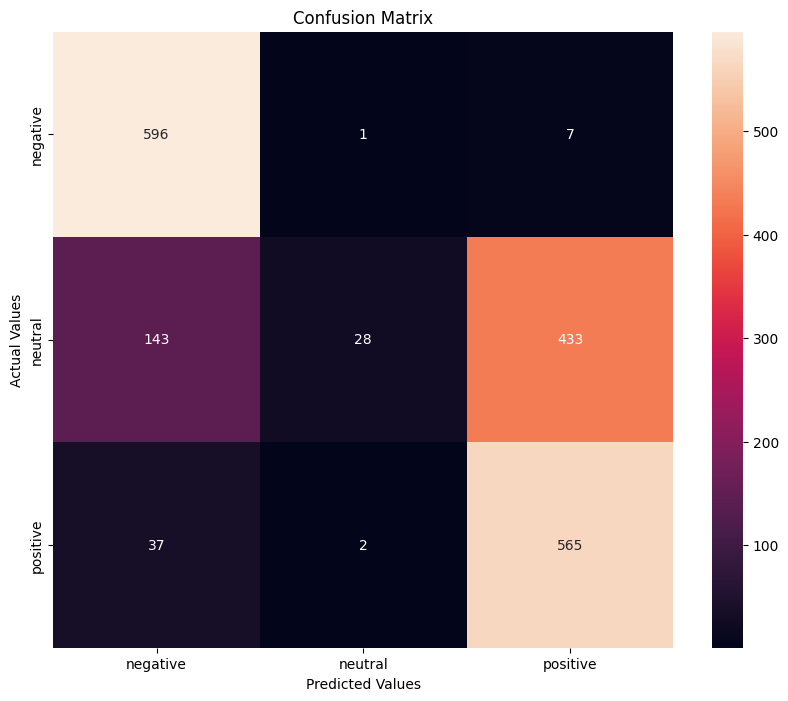

In [206]:
confusion_matrix = metrics.confusion_matrix(sentimentActual, sentimentZeroShot)
cm_df = pd.DataFrame(confusion_matrix,
                     index = ['negative','neutral','positive'], 
                     columns = ['negative','neutral','positive'])
#Plotting the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_df, annot=True,fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [189]:
sentimentZeroShotI = np.array(["neutrale"])
for i, result in enumerate(results):
    article_sentiment = result['labels'][0]
    article_score = result['scores'][0]
    sentimentZeroShot=np.insert(sentimentZeroShot,i,article_sentiment)

In [190]:
sentimentZeroShot.size

1813

In [191]:
sentimentZeroShot=sentimentZeroShot[1:]
sentimentZeroShot.size

1812

In [211]:
correct=0
for i in range(len(sentimentZeroShot)):
  if(sentimentZeroShot[i]==sentimentActual[i]):
    correct+=1
print(f"Accuracy: {(correct/1812)*100}%")    

Accuracy: 65.61810154525386%
